In [1]:
import sys
import seaborn as sns
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

sys.path.insert(0, '..')
import Modules.read_fwf as rfwf
from Modules.plot import DrawGraph
from Modules.summery_stat import SummeryStat, CDF
from Modules.mapping_rcd import get_preg_lengths, get_res_ages

## Read data from fix width formatted file

In [2]:
def ReadFemPreg(dct_file, dat_file):
    """
    reads the NSFG pregnancy data.

    :param dct_file: string file name
    :param dat_file: string file name
    :return: DataFrame
    """
    dct = rfwf.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file)

    return df

In [3]:
pregnancy_data = ReadFemPreg(dct_file='../Data/2017_2019_FemPregSetup.dct',
                             dat_file='../Data/2017_2019_FemPregData.dat')

In [4]:
pregnancy_data

,caseid,pregordr,moscurrp,pregend1,pregend2,hpageend,kidage,hpagelb,paybirth1,paybirth2,...,secu,sest,cmintvw,cmlstyr,cmjan3yr,cmjan4yr,cmjan5yr,quarter,phase,intvwyear
0,88819,1,NaN,6.0,NaN,NaN,7.0,4.0,NaN,NaN,...,2,354,1427,1415,1381,1369,1357,29,1,2018
1,88819,2,NaN,5.0,NaN,NaN,6.0,4.0,NaN,NaN,...,2,354,1427,1415,1381,1369,1357,29,1,2018
2,83055,1,NaN,5.0,NaN,NaN,6.0,4.0,NaN,NaN,...,2,354,1425,1413,1381,1369,1357,29,1,2018
3,83055,2,NaN,5.0,NaN,NaN,6.0,5.0,NaN,NaN,...,2,354,1425,1413,1381,1369,1357,29,1,2018
4,92062,1,NaN,6.0,NaN,NaN,7.0,4.0,NaN,NaN,...,2,354,1426,1414,1381,1369,1357,29,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,91420,4,NaN,6.0,NaN,NaN,6.0,6.0,NaN,NaN,...,1,370,1432,1420,1393,1381,1369,31,1,2019
10211,89157,1,NaN,6.0,NaN,NaN,6.0,3.0,NaN,NaN,...,1,370,1433,1421,1393,1381,1369,31,1,2019
10212,89157,2,NaN,6.0,NaN,NaN,6.0,4.0,NaN,NaN,...,1,370,1433,1421,1393,1381,1369,31,1,2019
10213,89157,3,NaN,5.0,NaN,NaN,5.0,4.0,1.0,2.0,...,1,370,1433,1421,1393,1381,1369,31,1,2019


## Do some cleaning on data (transformation & validation)

In [5]:
na_values = [97, 98, 99]

pregnancy_data['hpagelb'].replace(na_values, np.nan, inplace=True)
pregnancy_data['feelinpg'].replace(na_values, np.nan, inplace=True)
pregnancy_data['cmintvw'] = np.nan

In [100]:
features = ['pregordr', 'hpagelb', 'priorsmk', 'outcome', 'agecon',
            'learnprg', 'pncarewk', 'lbw1', 'postsmks', 'npostsmk', 'gest_lb',
            'gest_othr', 'agepreg', 'ager', 'race', 'pregnum', 'parity', 'poverty',
            'laborfor', 'religion', 'metro']
pregnancy_data[features]

,pregordr,hpagelb,priorsmk,outcome,agecon,learnprg,pncarewk,lbw1,postsmks,npostsmk,...,gest_othr,agepreg,ager,race,pregnum,parity,poverty,laborfor,religion,metro
0,1,4.0,NaN,1,29,NaN,NaN,2.0,NaN,NaN,...,NaN,30.0,43,2,2,2,641,1,1,2
1,2,4.0,NaN,1,31,NaN,NaN,2.0,NaN,NaN,...,NaN,32.0,43,2,2,2,641,1,1,2
2,1,4.0,NaN,1,29,NaN,NaN,2.0,NaN,NaN,...,NaN,30.0,41,2,2,2,498,1,3,2
3,2,5.0,NaN,1,33,NaN,NaN,2.0,NaN,NaN,...,NaN,34.0,41,2,2,2,498,1,3,2
4,1,4.0,NaN,1,27,NaN,NaN,2.0,NaN,NaN,...,NaN,27.0,41,2,3,2,498,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,4,6.0,NaN,1,39,NaN,NaN,2.0,NaN,NaN,...,NaN,40.0,47,3,4,2,275,7,3,2
10211,1,3.0,NaN,1,26,NaN,NaN,1.0,NaN,NaN,...,NaN,27.0,37,3,3,3,90,7,3,2
10212,2,4.0,NaN,1,29,NaN,NaN,1.0,NaN,NaN,...,NaN,30.0,37,3,3,3,90,7,3,2
10213,3,4.0,0.0,1,32,1.0,1.0,1.0,5.0,NaN,...,NaN,32.0,37,3,3,3,90,7,3,2


## validation

In [7]:
val_dict = {}

for feat in features:
    val_dict[feat] = pregnancy_data[feat].value_counts()

In [8]:
val_dict['pregordr']

1     3709
2     2806
3     1776
4      952
5      481
6      227
7      115
8       68
9       35
10      22
11      10
12       7
13       5
14       2
Name: pregordr, dtype: int64

In [9]:
val_dict['outcome']

1    7199
4    1654
2     941
6     193
5     123
3     105
Name: outcome, dtype: int64

In [10]:
val_dict['pregnum']

3     2472
2     2058
4     1884
5     1265
1      903
6      677
7      322
8      271
10     120
9      117
13      39
11      33
14      28
12      24
0        2
Name: pregnum, dtype: int64

## distribution

In [11]:
graphing = DrawGraph(pregnancy_data, figsize=[12, 6], dpi=300)

- ### pregordr

Pregnancy order (number)<br><br>
most common values is one, most of them have less that five pregnancies

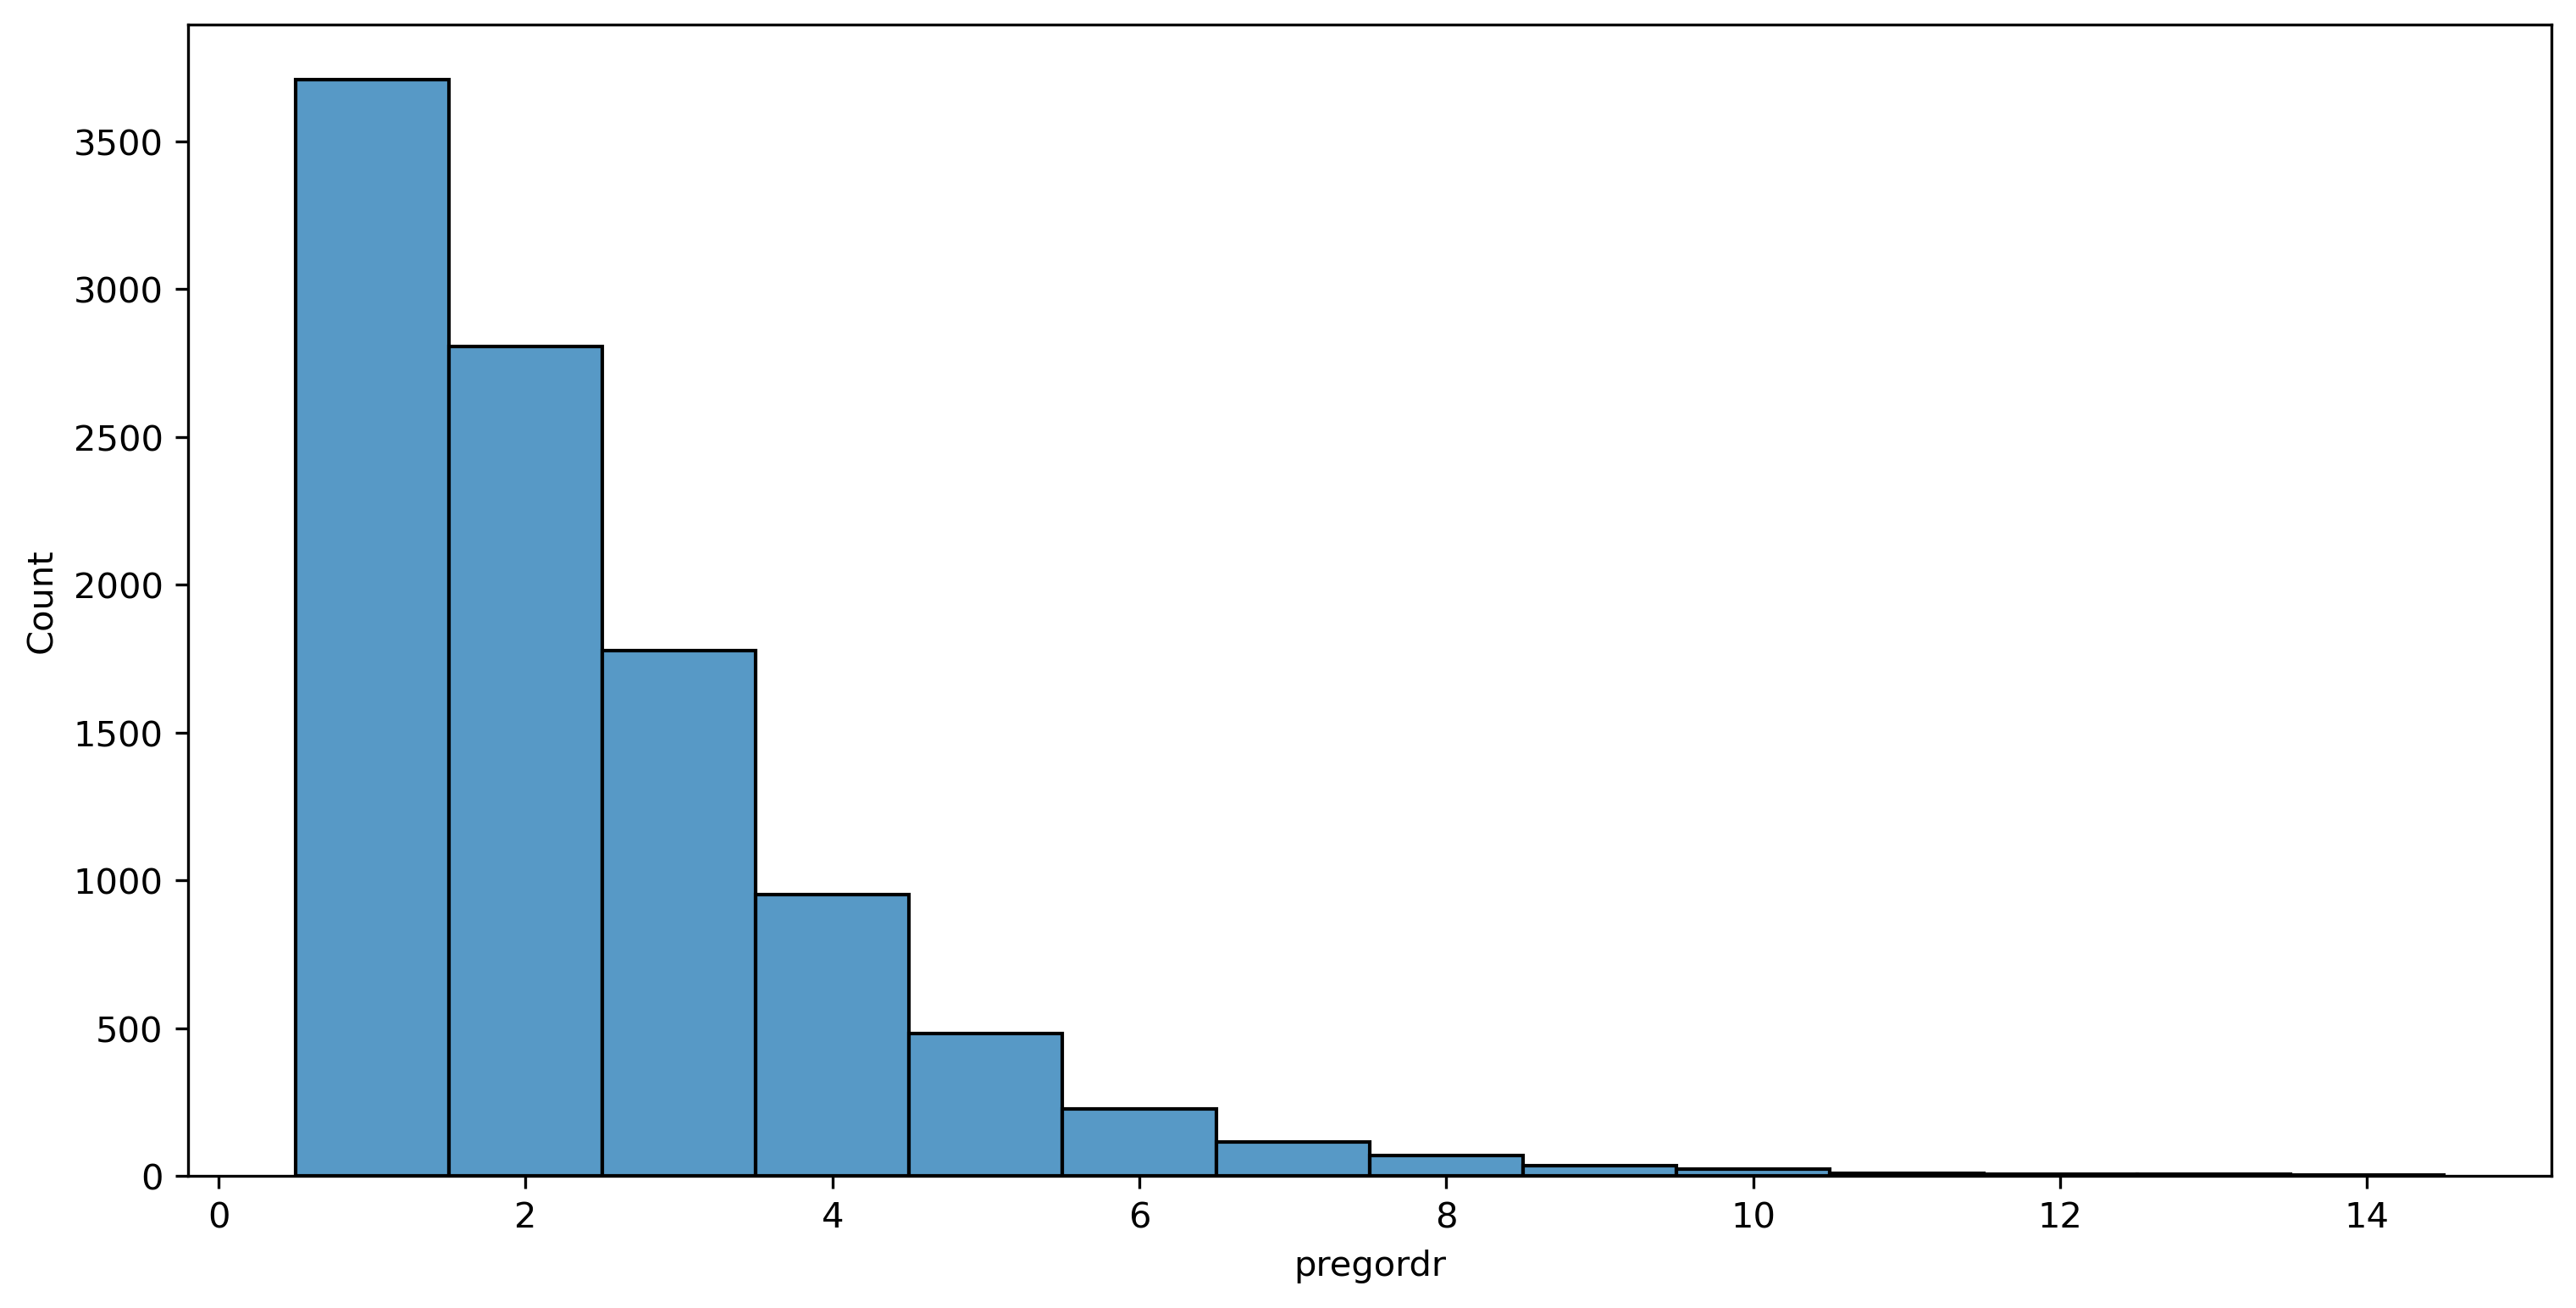

In [12]:
graphing.create_figure
graphing.hist(x=features[0], discrete=True, kde=False)
graphing.show

- ### hpagelb
Father's age (categorical) at pregnancy's end date<br><br>
most of the husband's age lie between 20 and 34. nearly normal distribution not exactly.

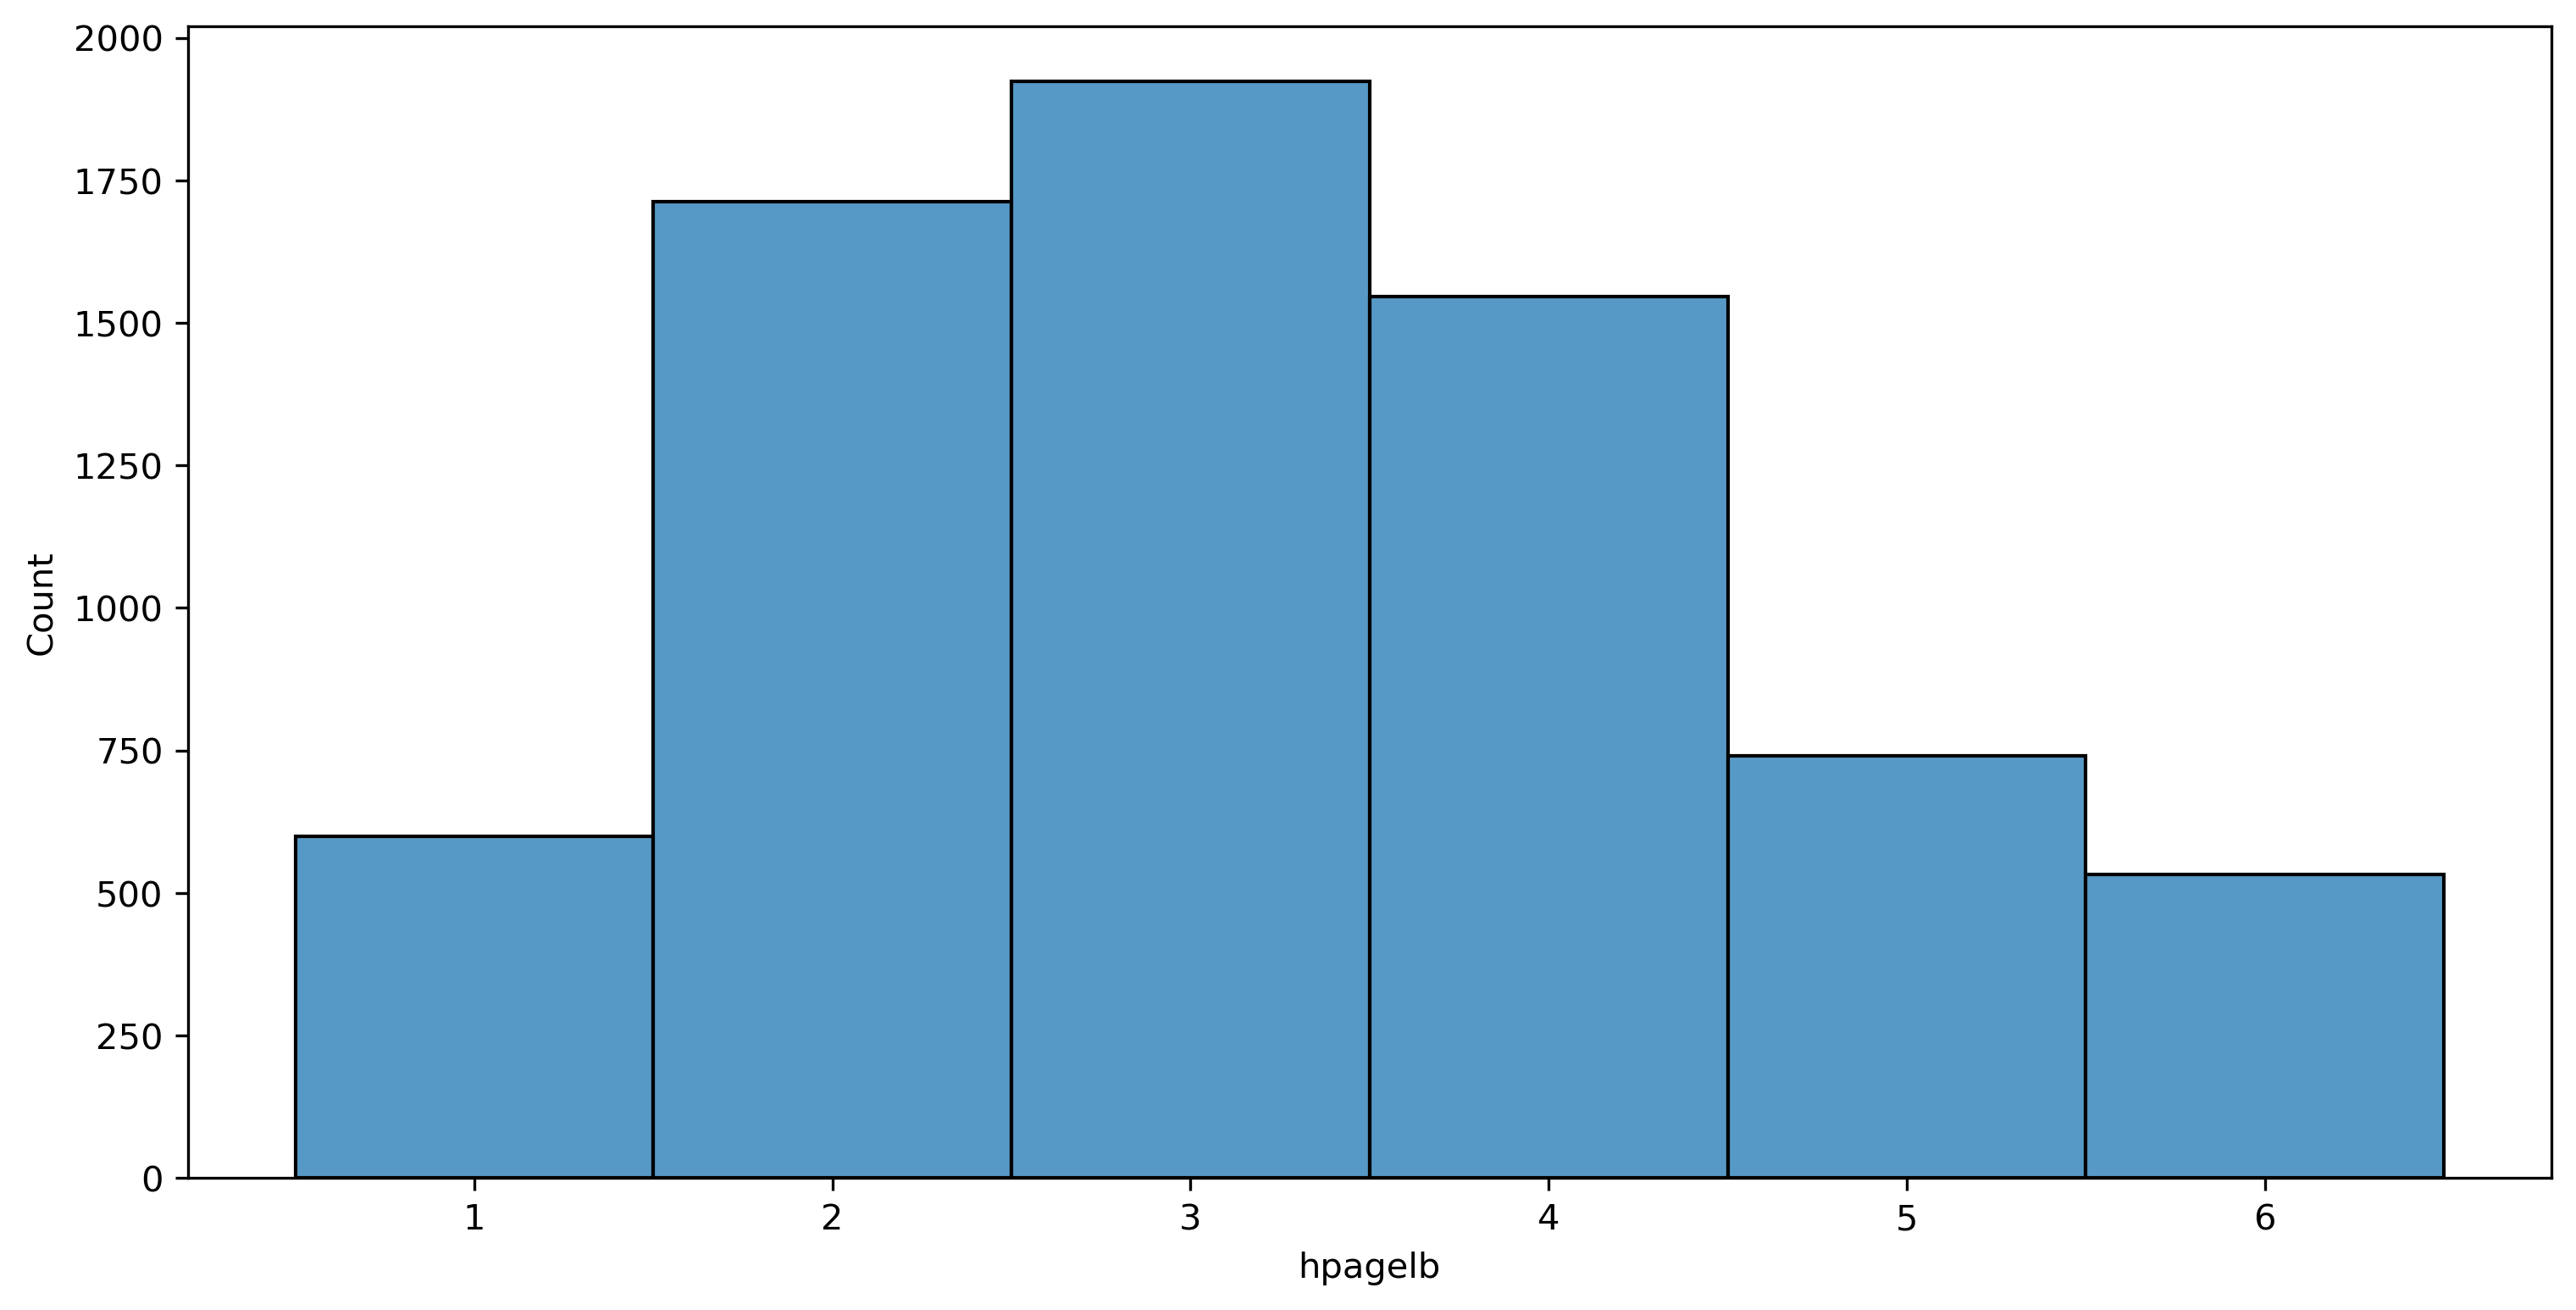

In [13]:
graphing.create_figure
graphing.hist(x=features[1], discrete=True, kde=False)
graphing.show

- ### csecprim
Is this R's first c-section? (cicerone)<br>

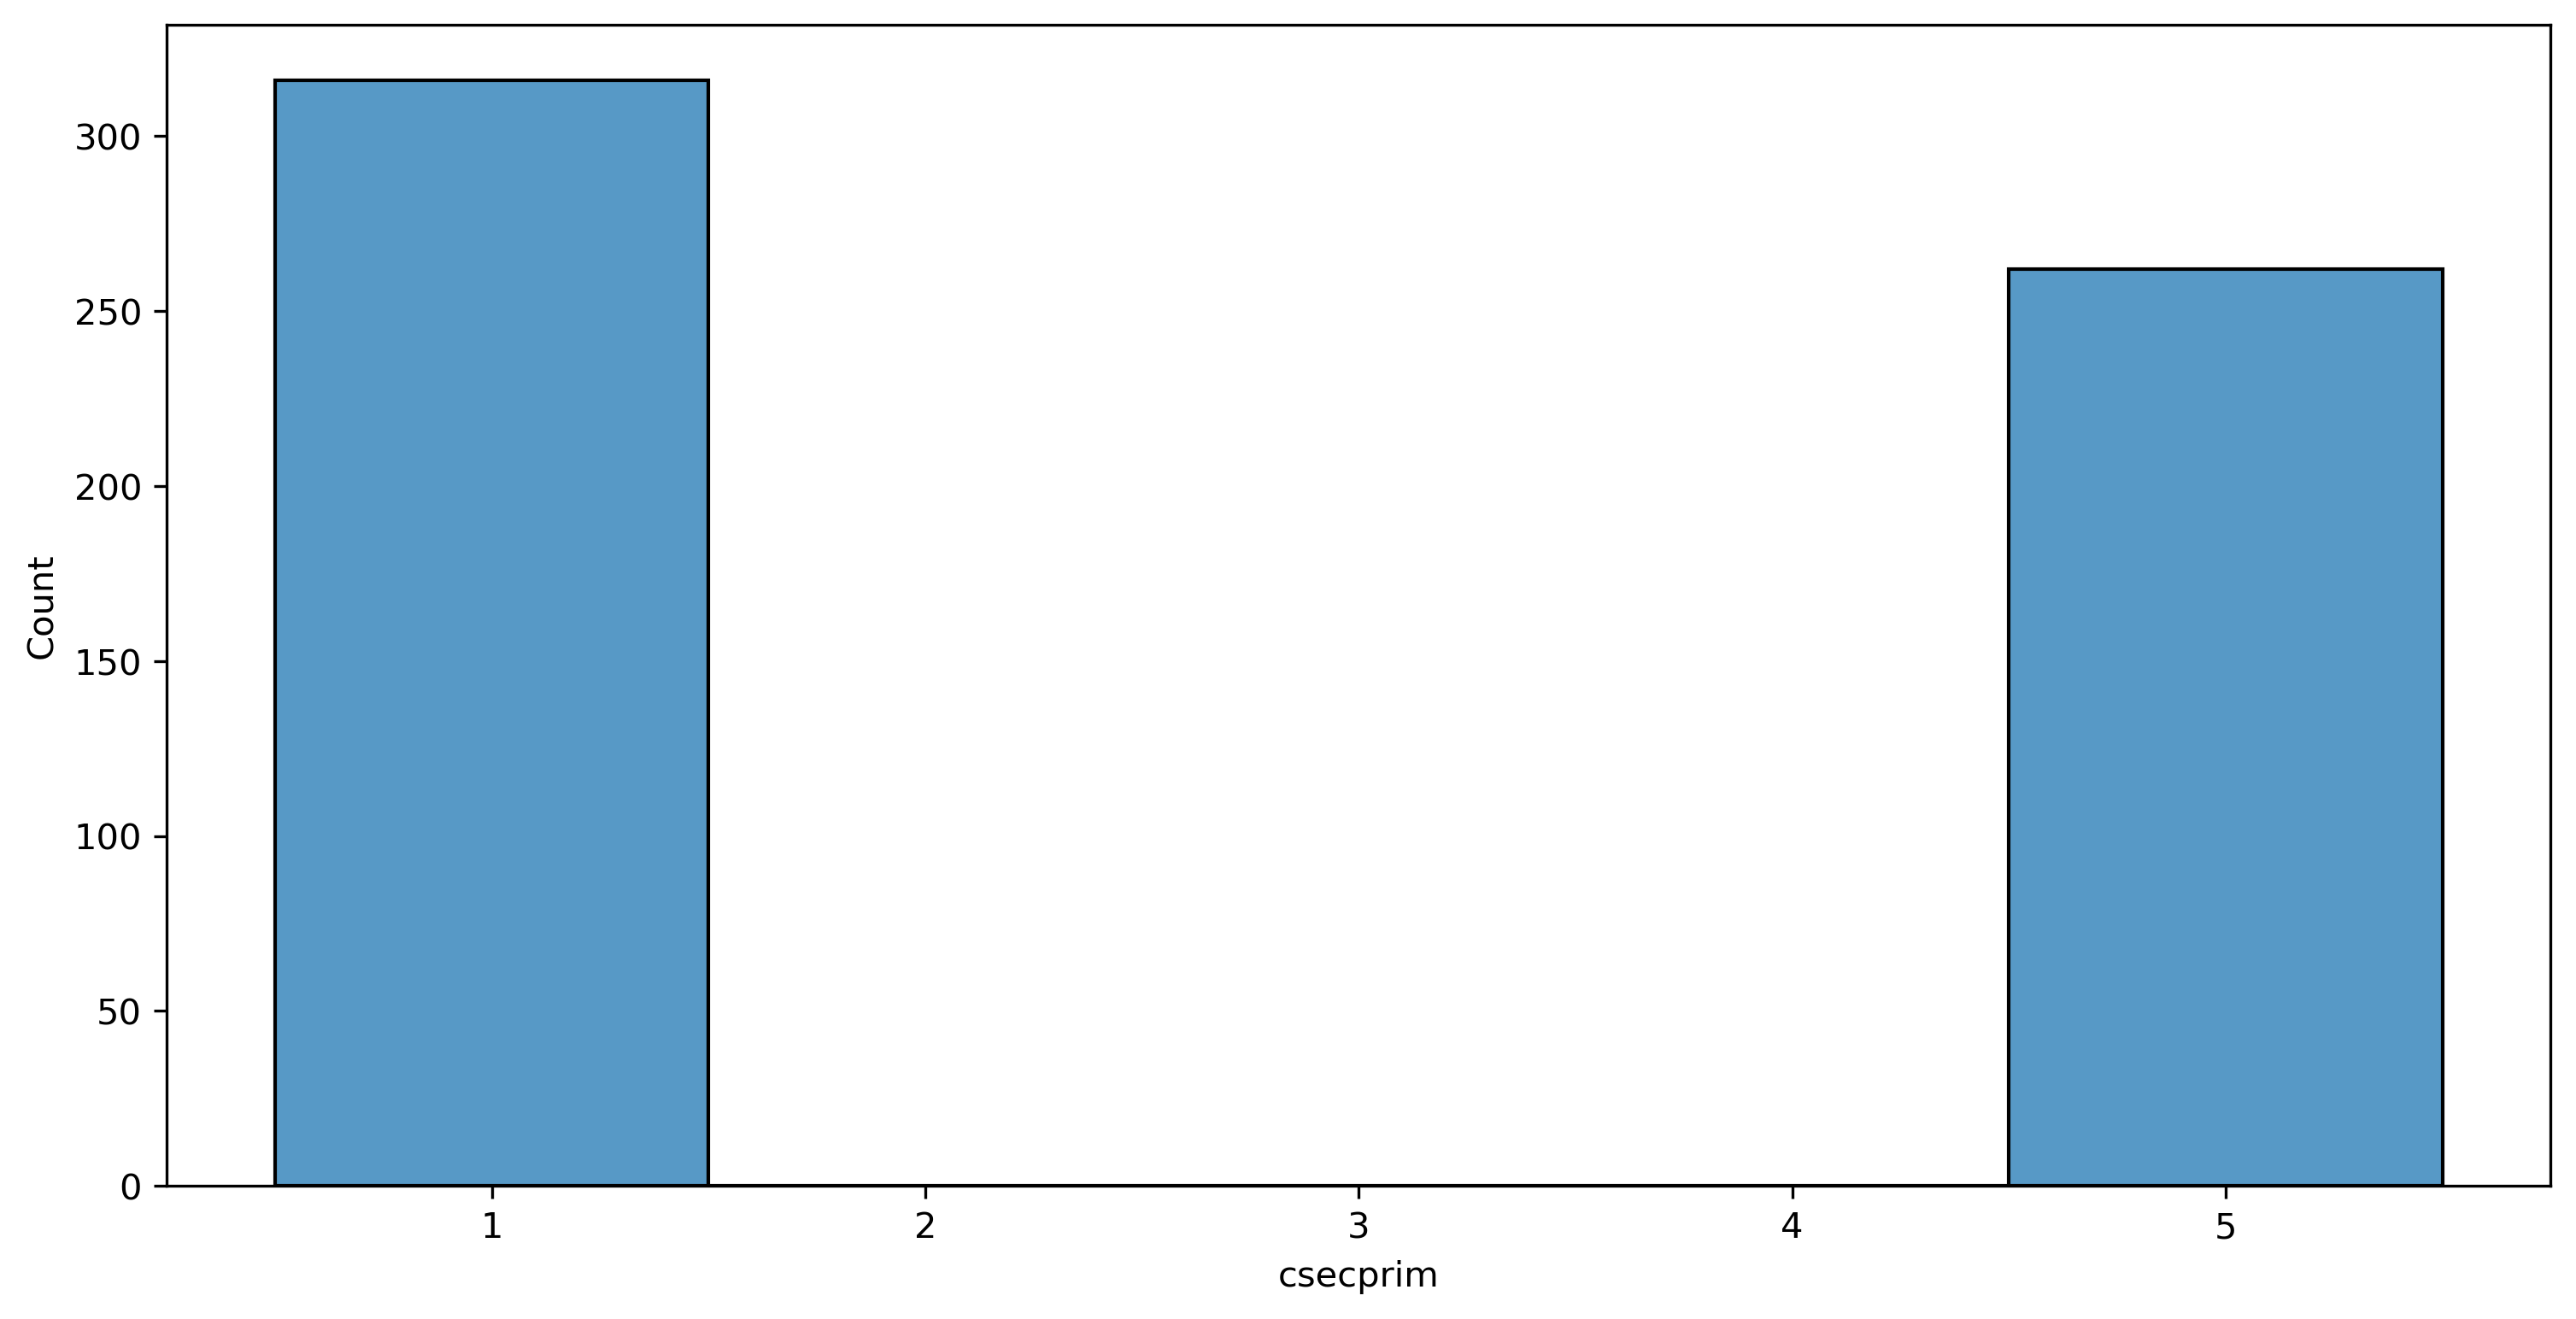

In [14]:
graphing.create_figure
graphing.hist(x=features[2], discrete=True, kde=False)
graphing.show

- ### priorsmk
Amount R smoked in 6 mos before R knew she was pregnant<br><br>
right skewed distribution, lower values are more possible.

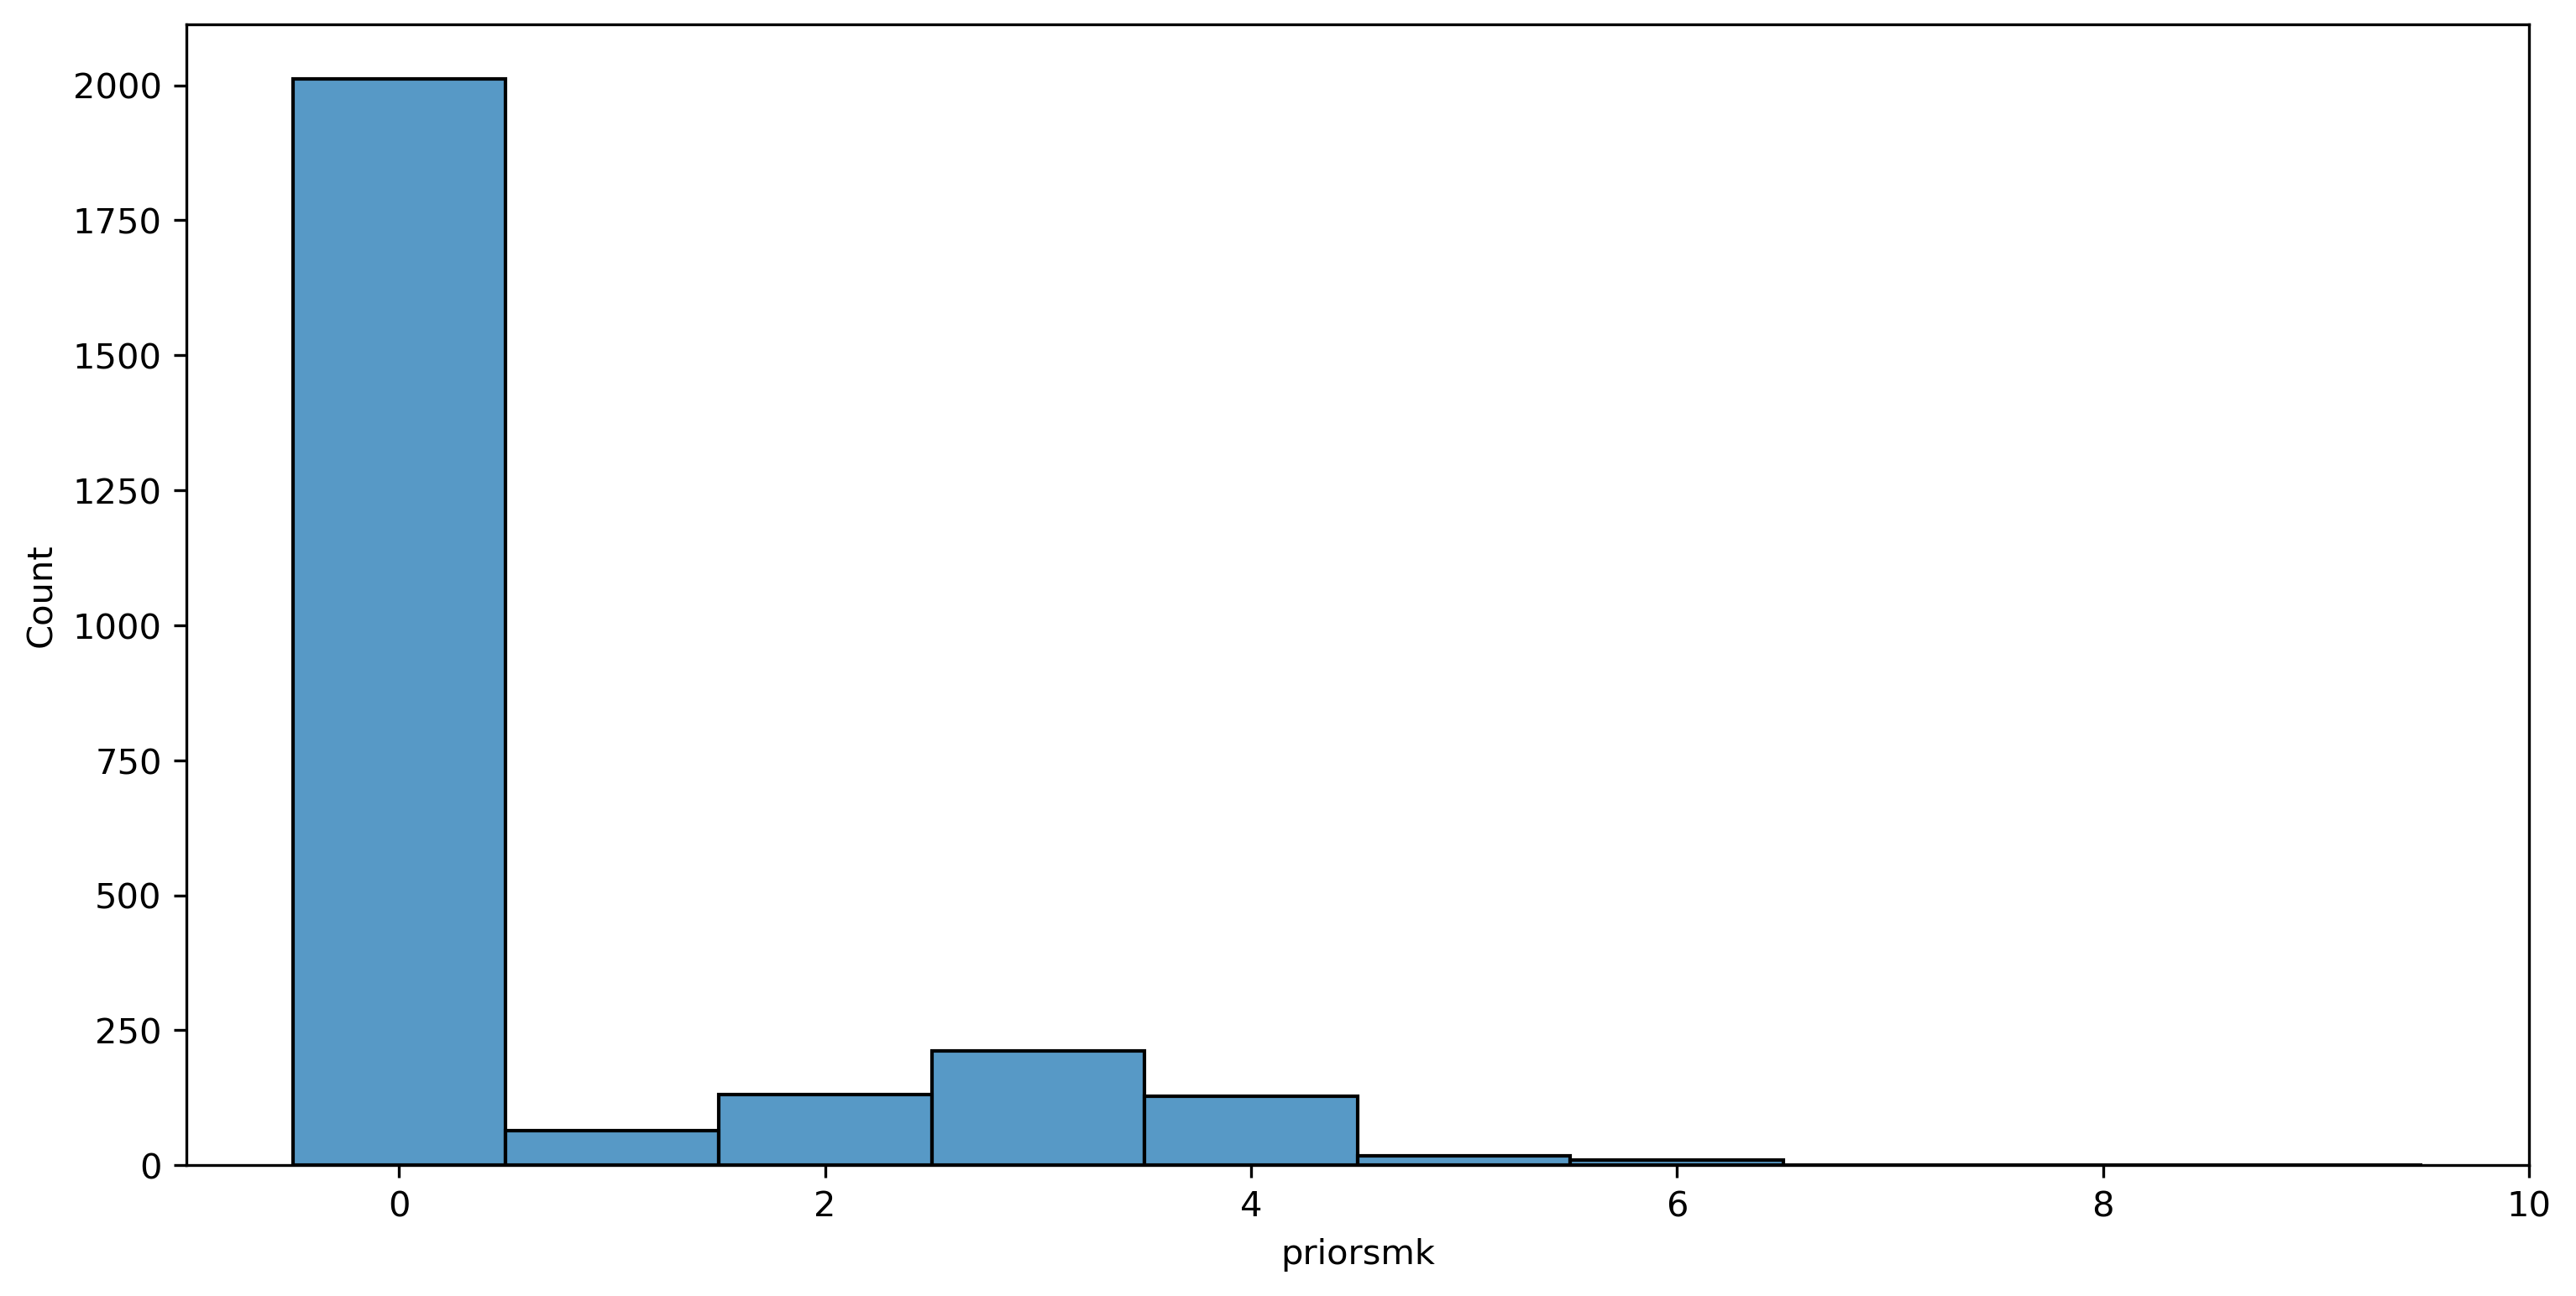

In [15]:
graphing.create_figure
graphing.hist(x=features[3], discrete=True, kde=False)
graphing.show

- ### outcome
Pregnancy outcome<br><br>
right skewed, live births are more commen

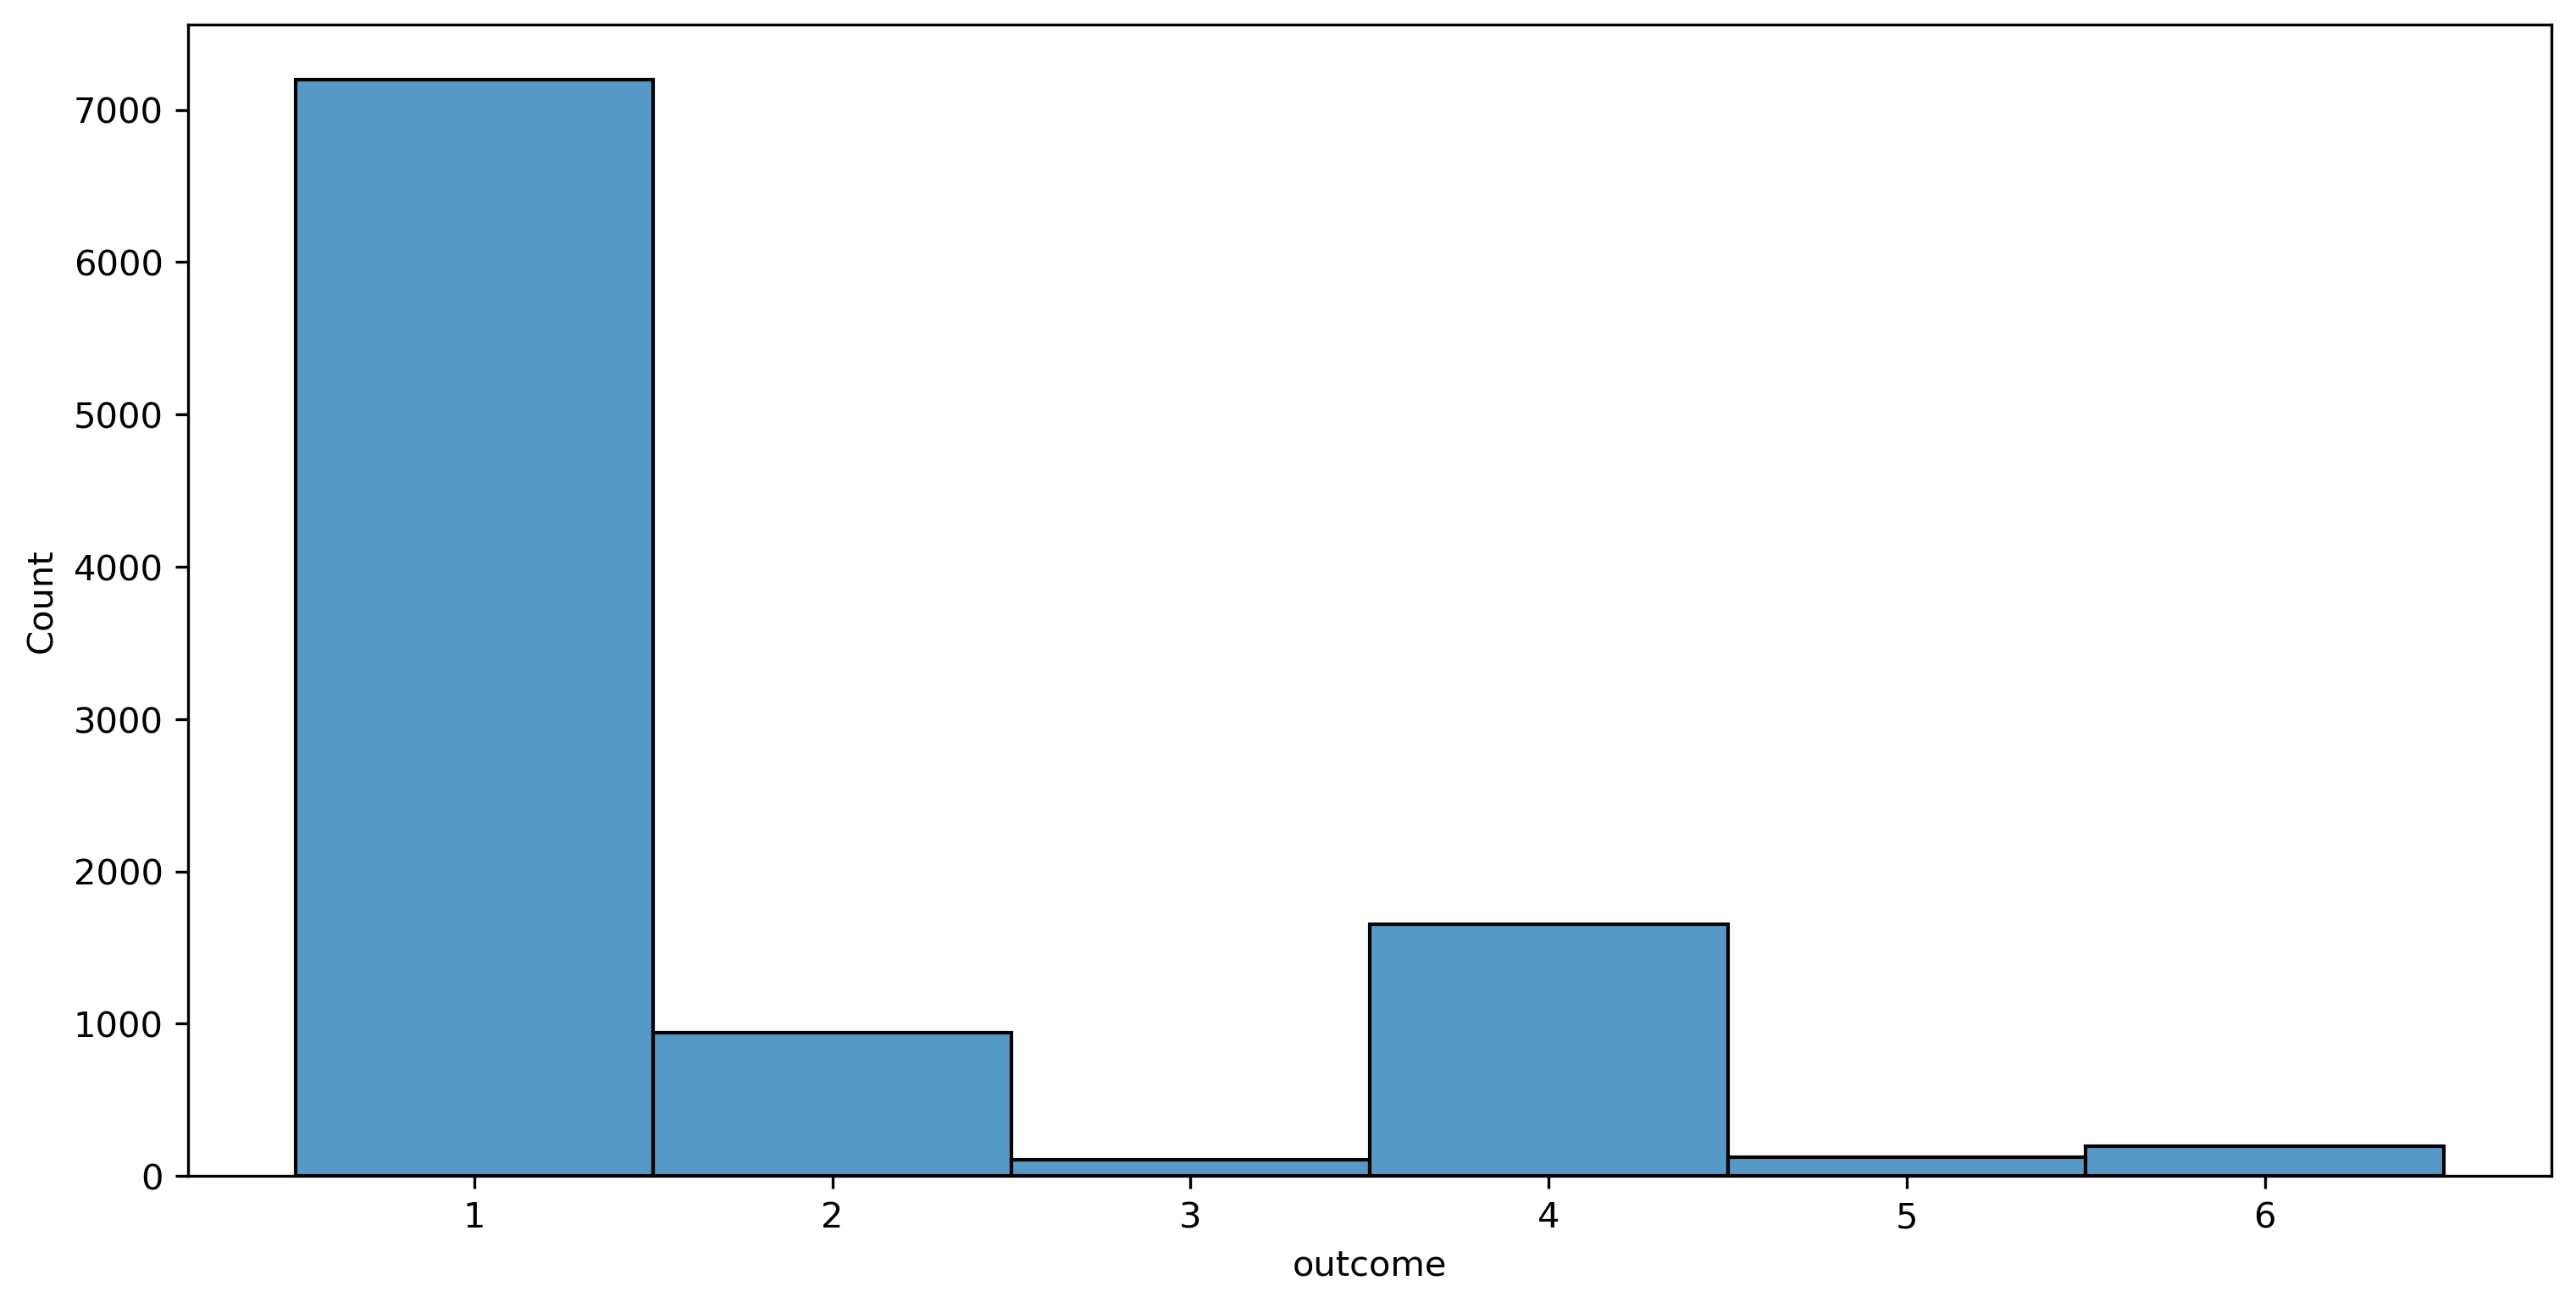

In [16]:
graphing.create_figure
graphing.hist(x=features[4], discrete=True, kde=False)
graphing.show

- ### agecon
Age at time of conception<br><br>
very close to normal distribution, most of the mothers are in their 20's

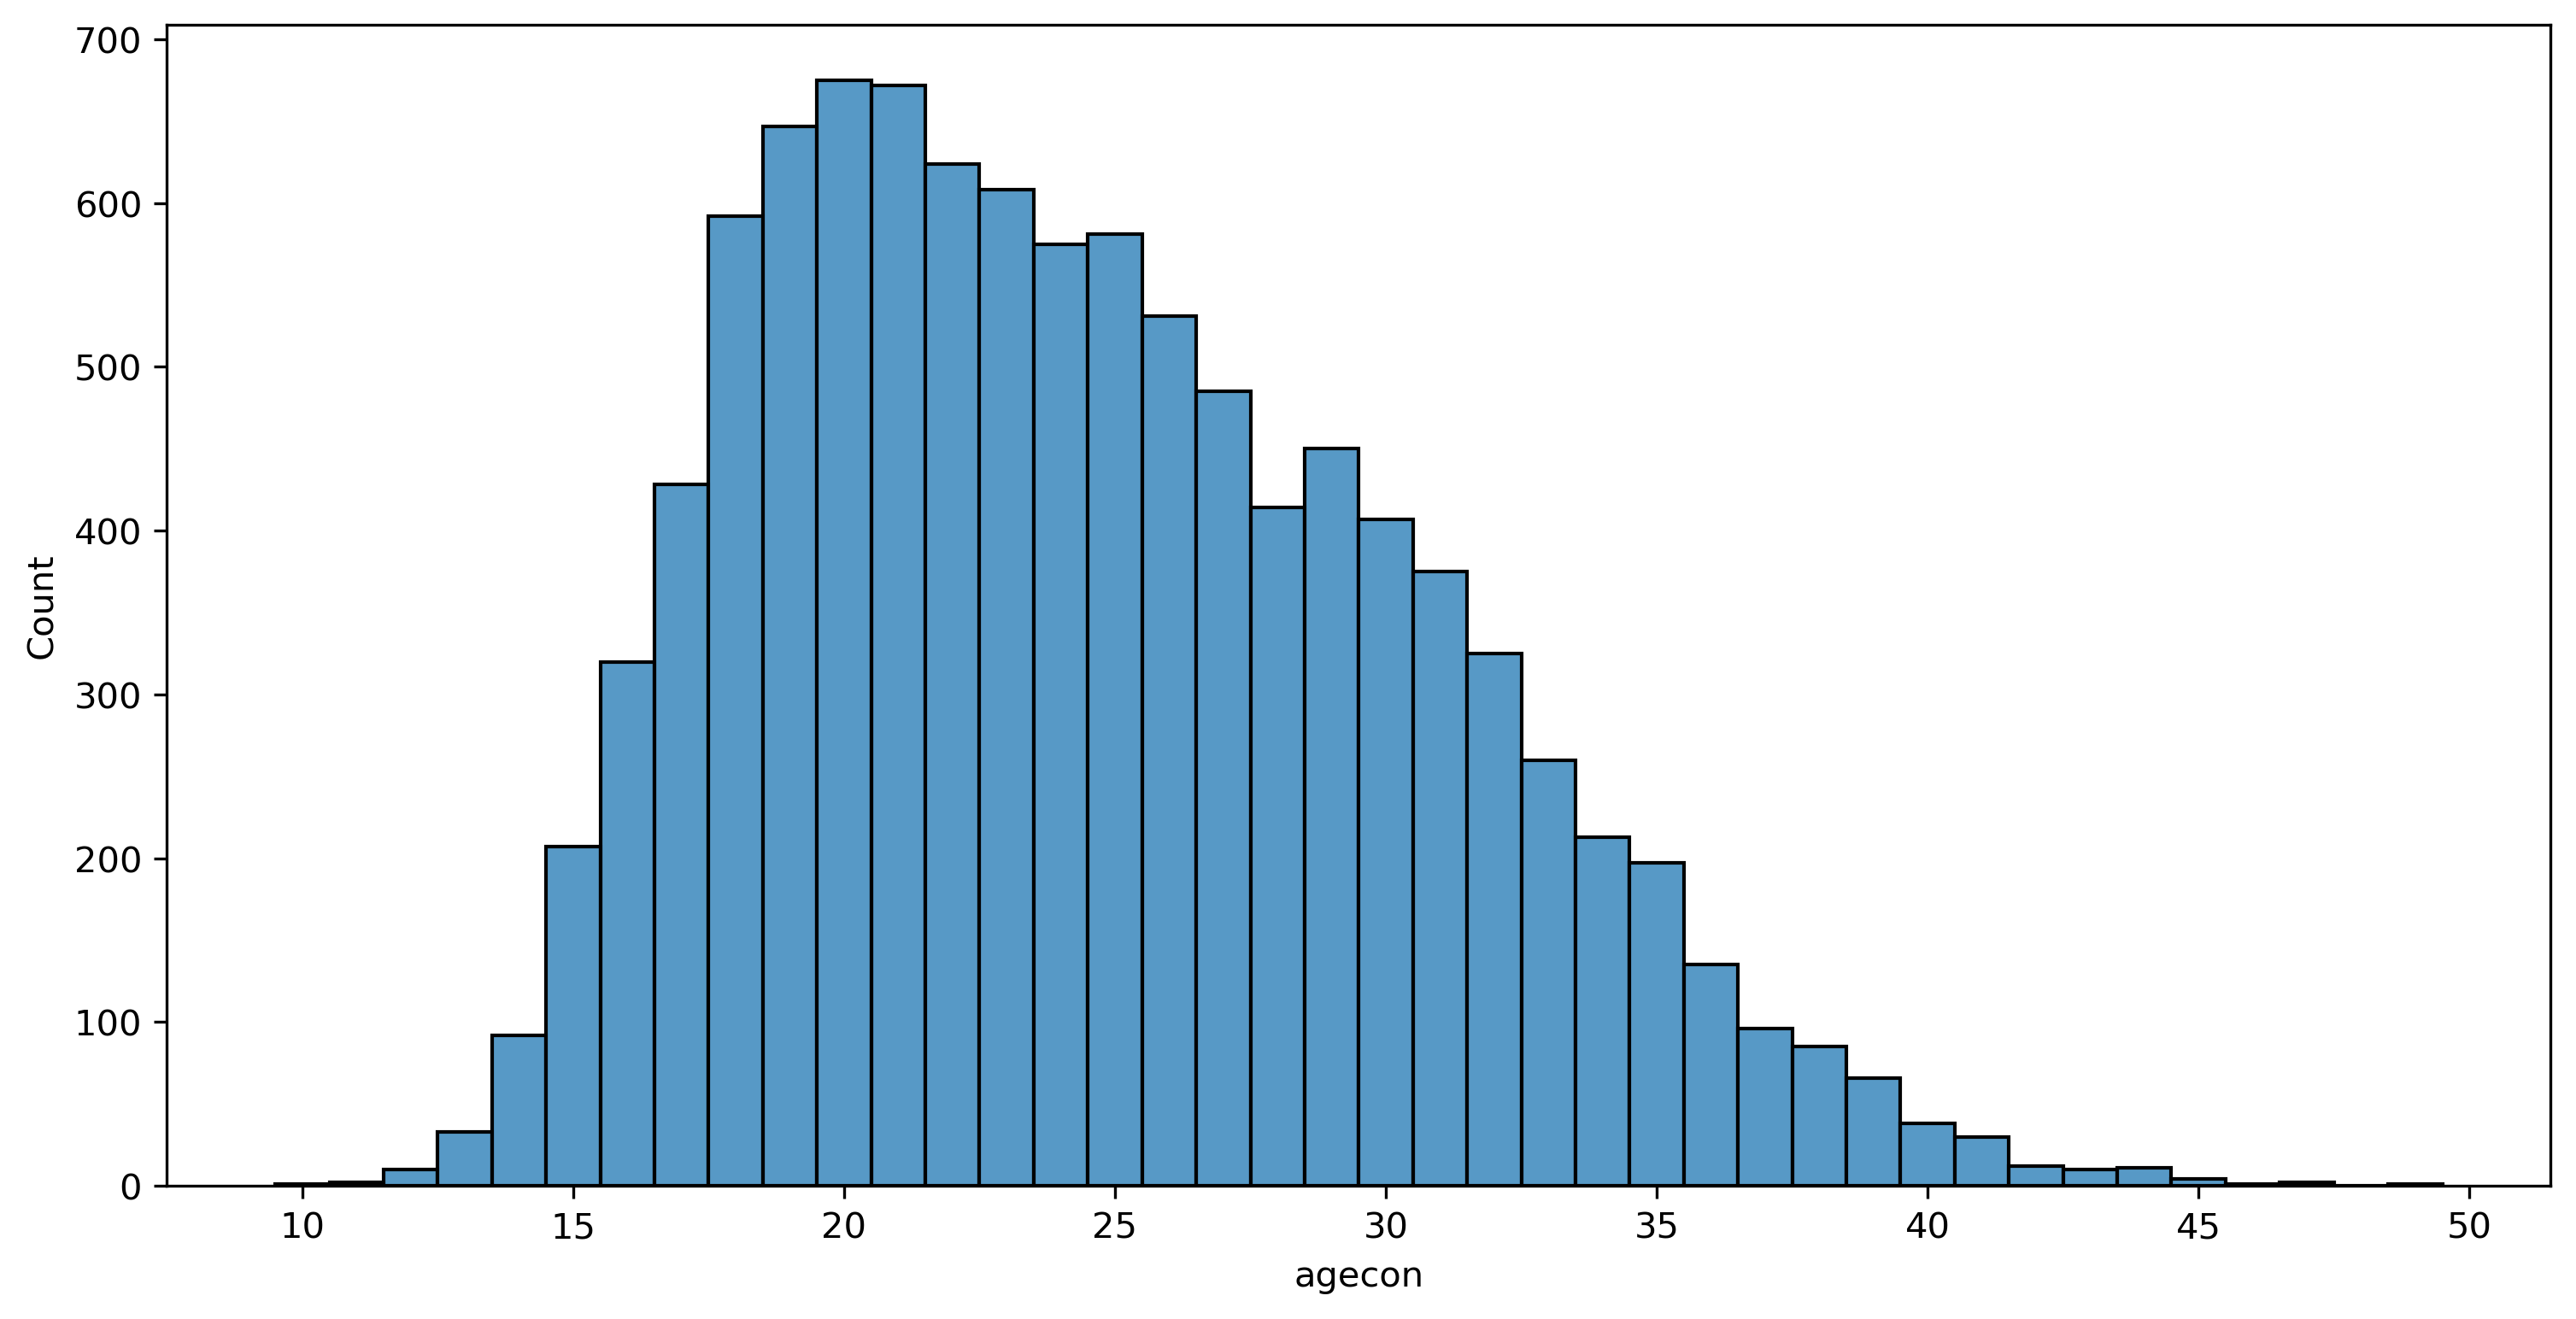

In [17]:
graphing.create_figure
graphing.hist(x=features[5], discrete=True, kde=False)
graphing.show

- ### learnprg
Number of weeks pregnant when R learned she was pregnant

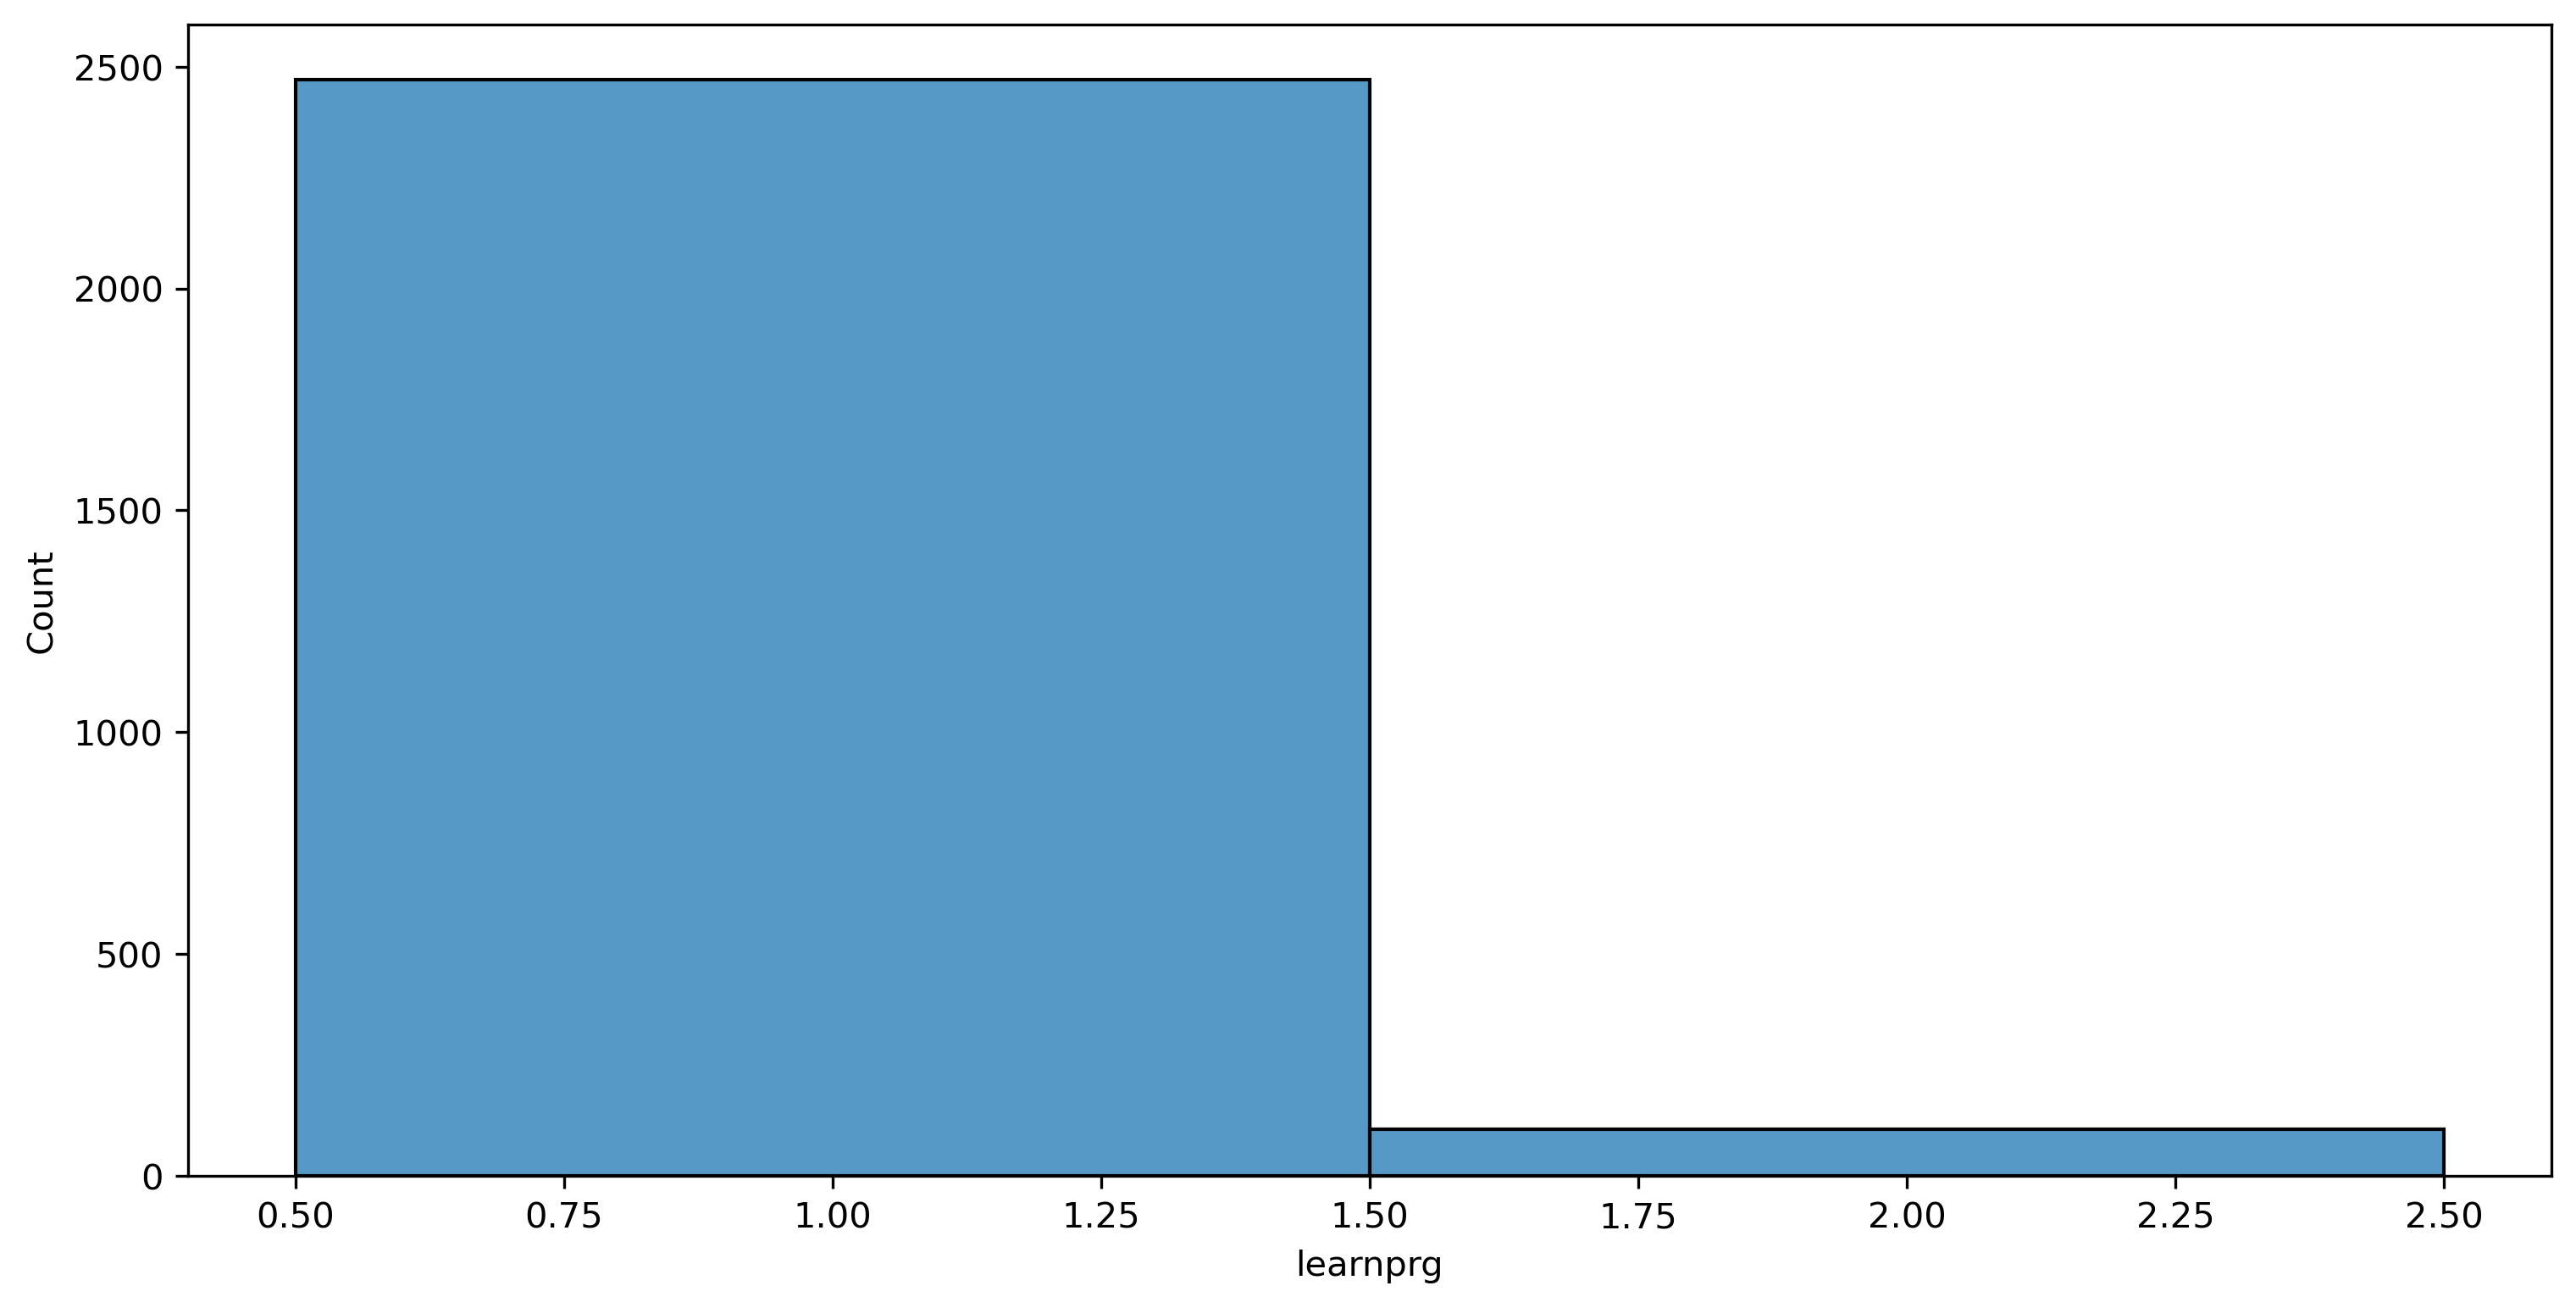

In [18]:
graphing.create_figure
graphing.hist(x=features[6], discrete=True, kde=False)
graphing.show

- ### pncarewk
Number of weeks pregnant at first prenatal care<br><br>
right skewed, small values more common. most of them know before 13 weeks or early.

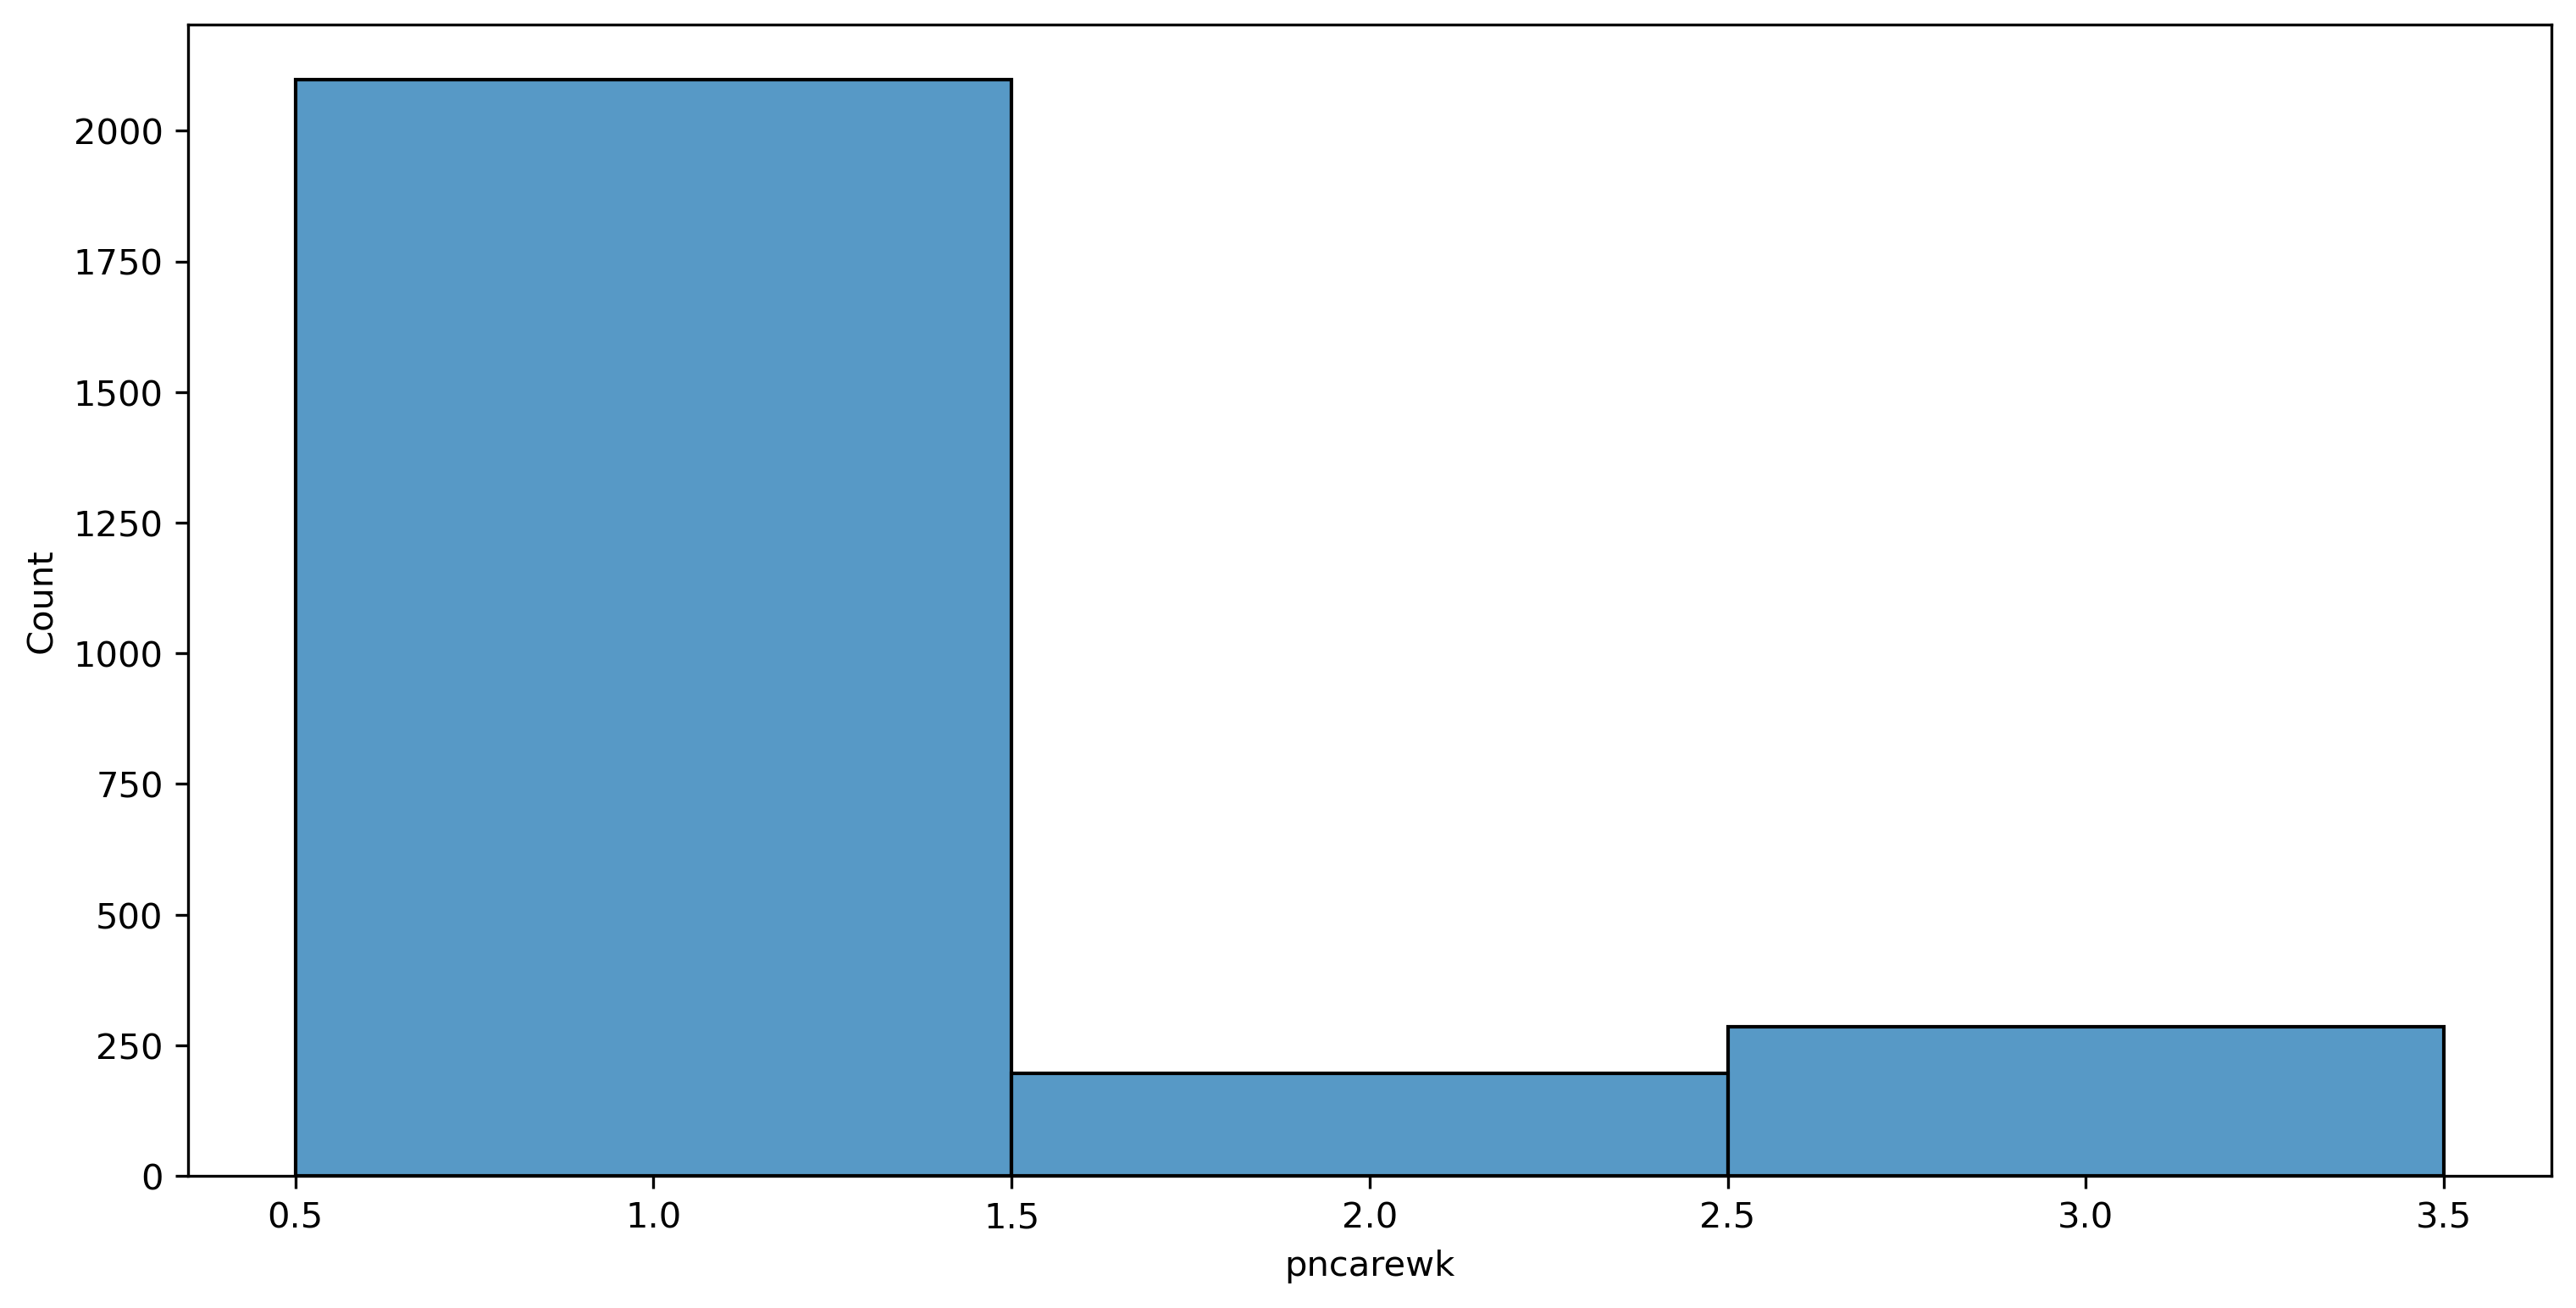

In [19]:
graphing.create_figure
graphing.hist(x=features[7], discrete=True, kde=False)
graphing.show

- ### lbw1
Low birthweight - 1st baby from this preg

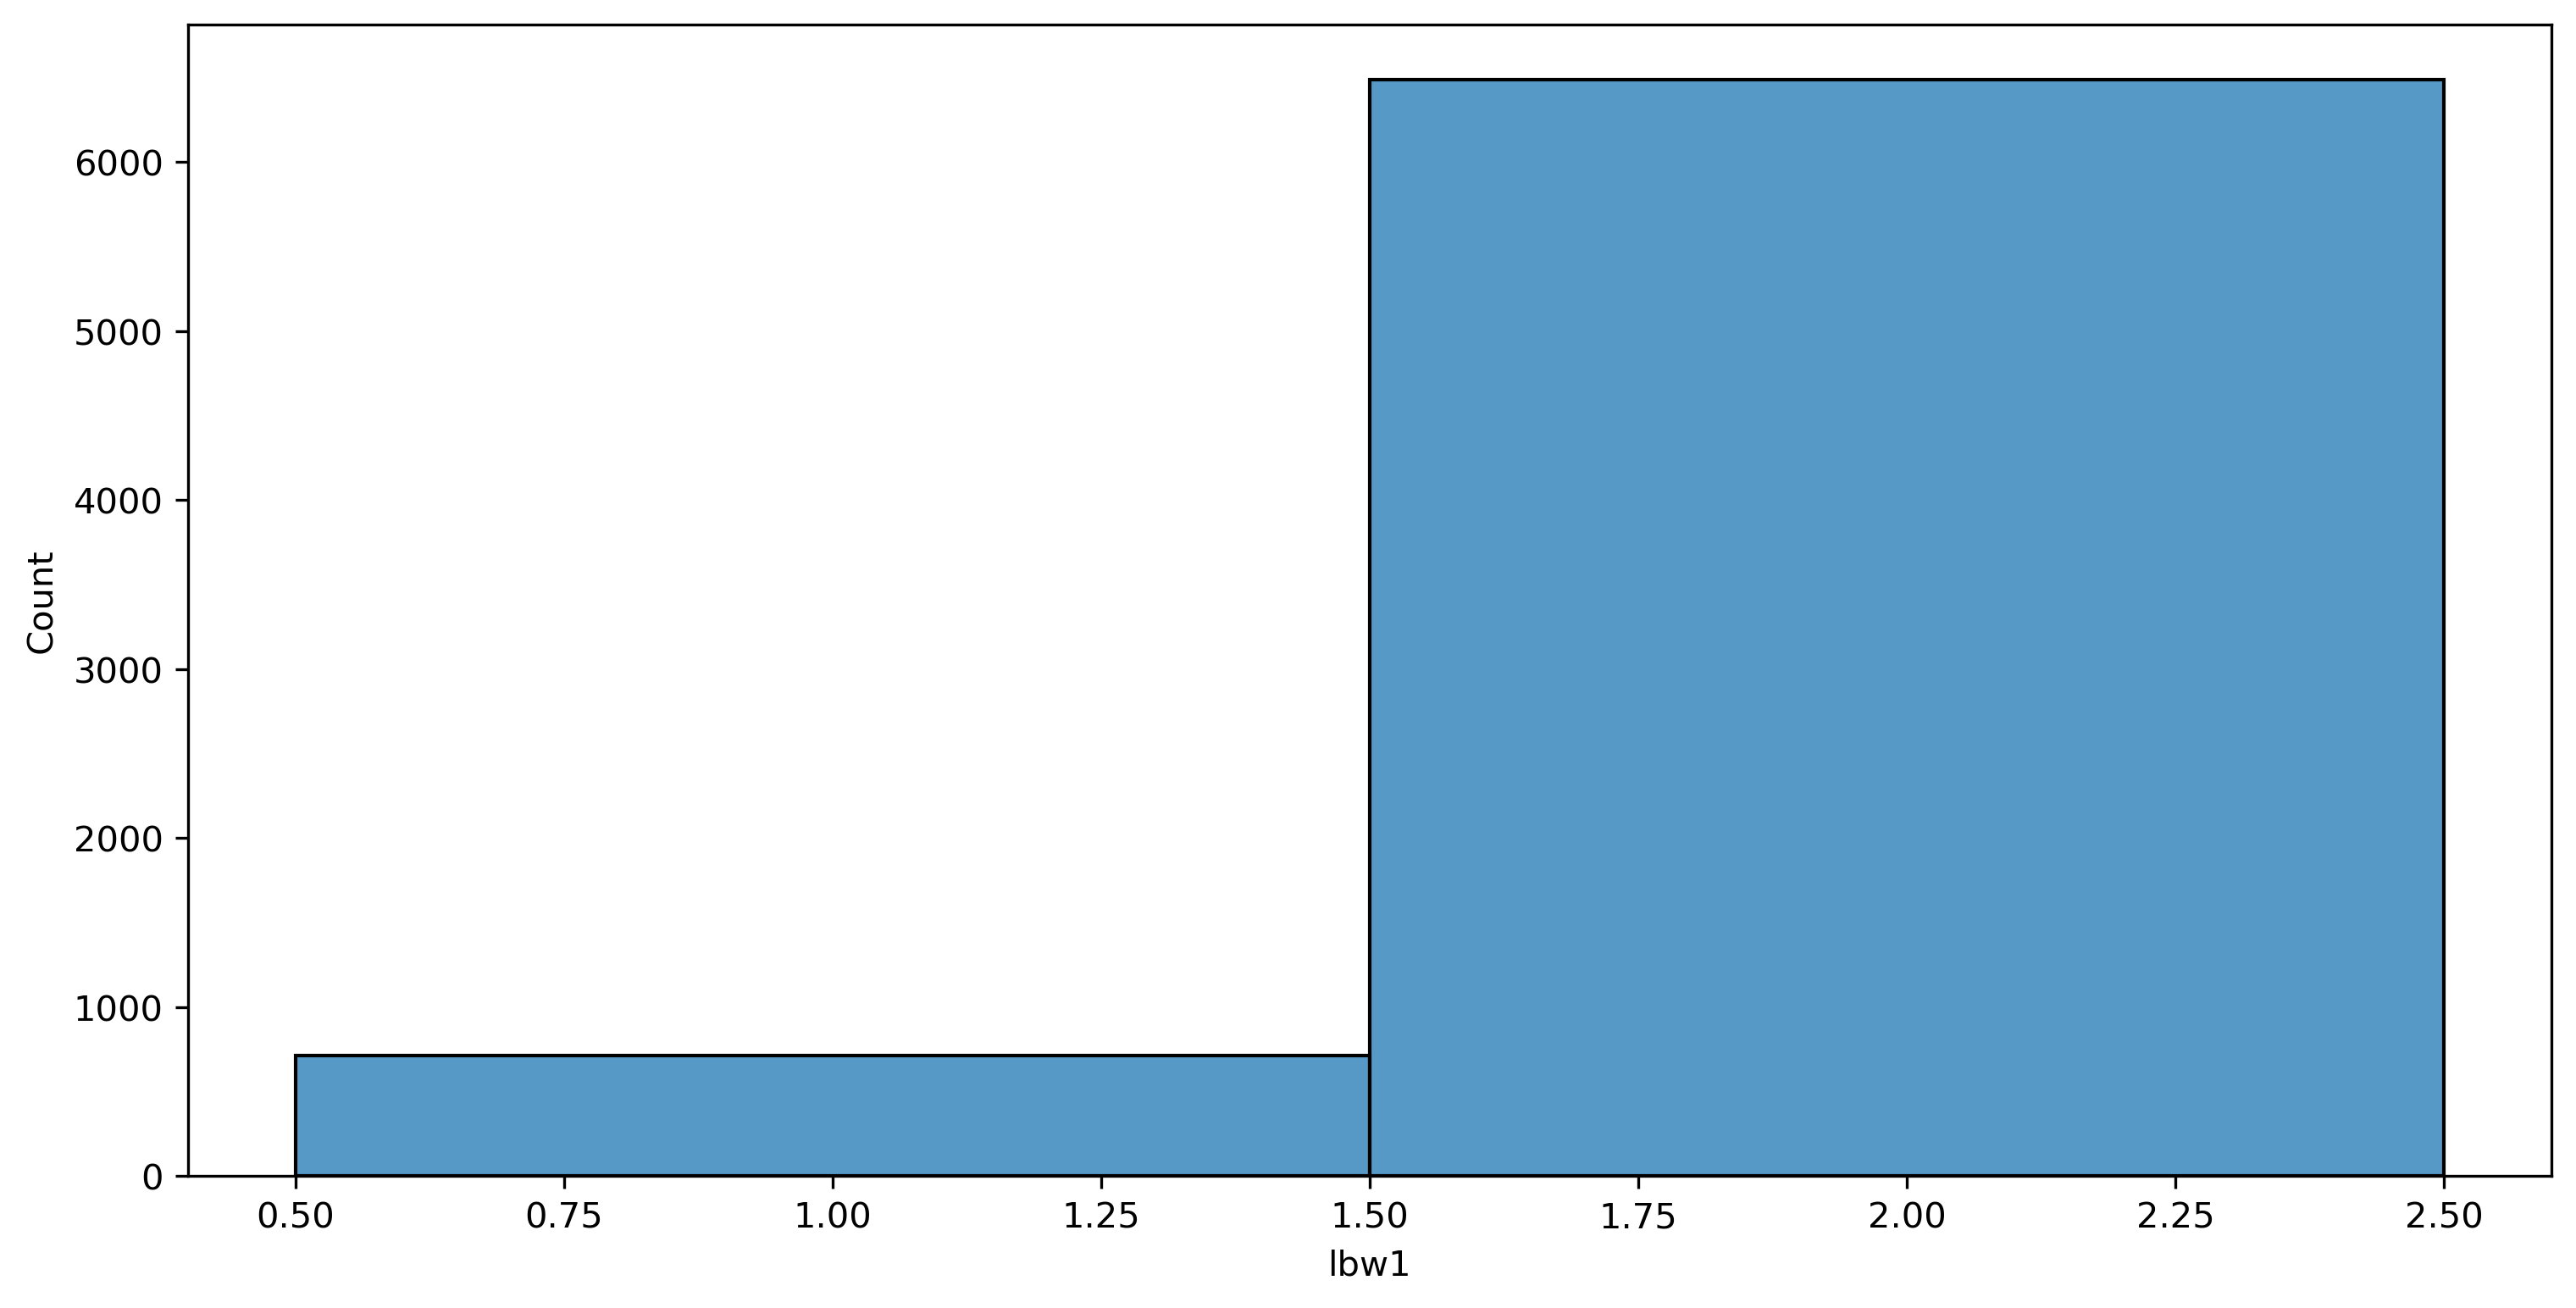

In [20]:
graphing.create_figure
graphing.hist(x=features[8], discrete=True, kde=False)
graphing.show

- ### postsmks
R smoked at all after R knew she was pregnant

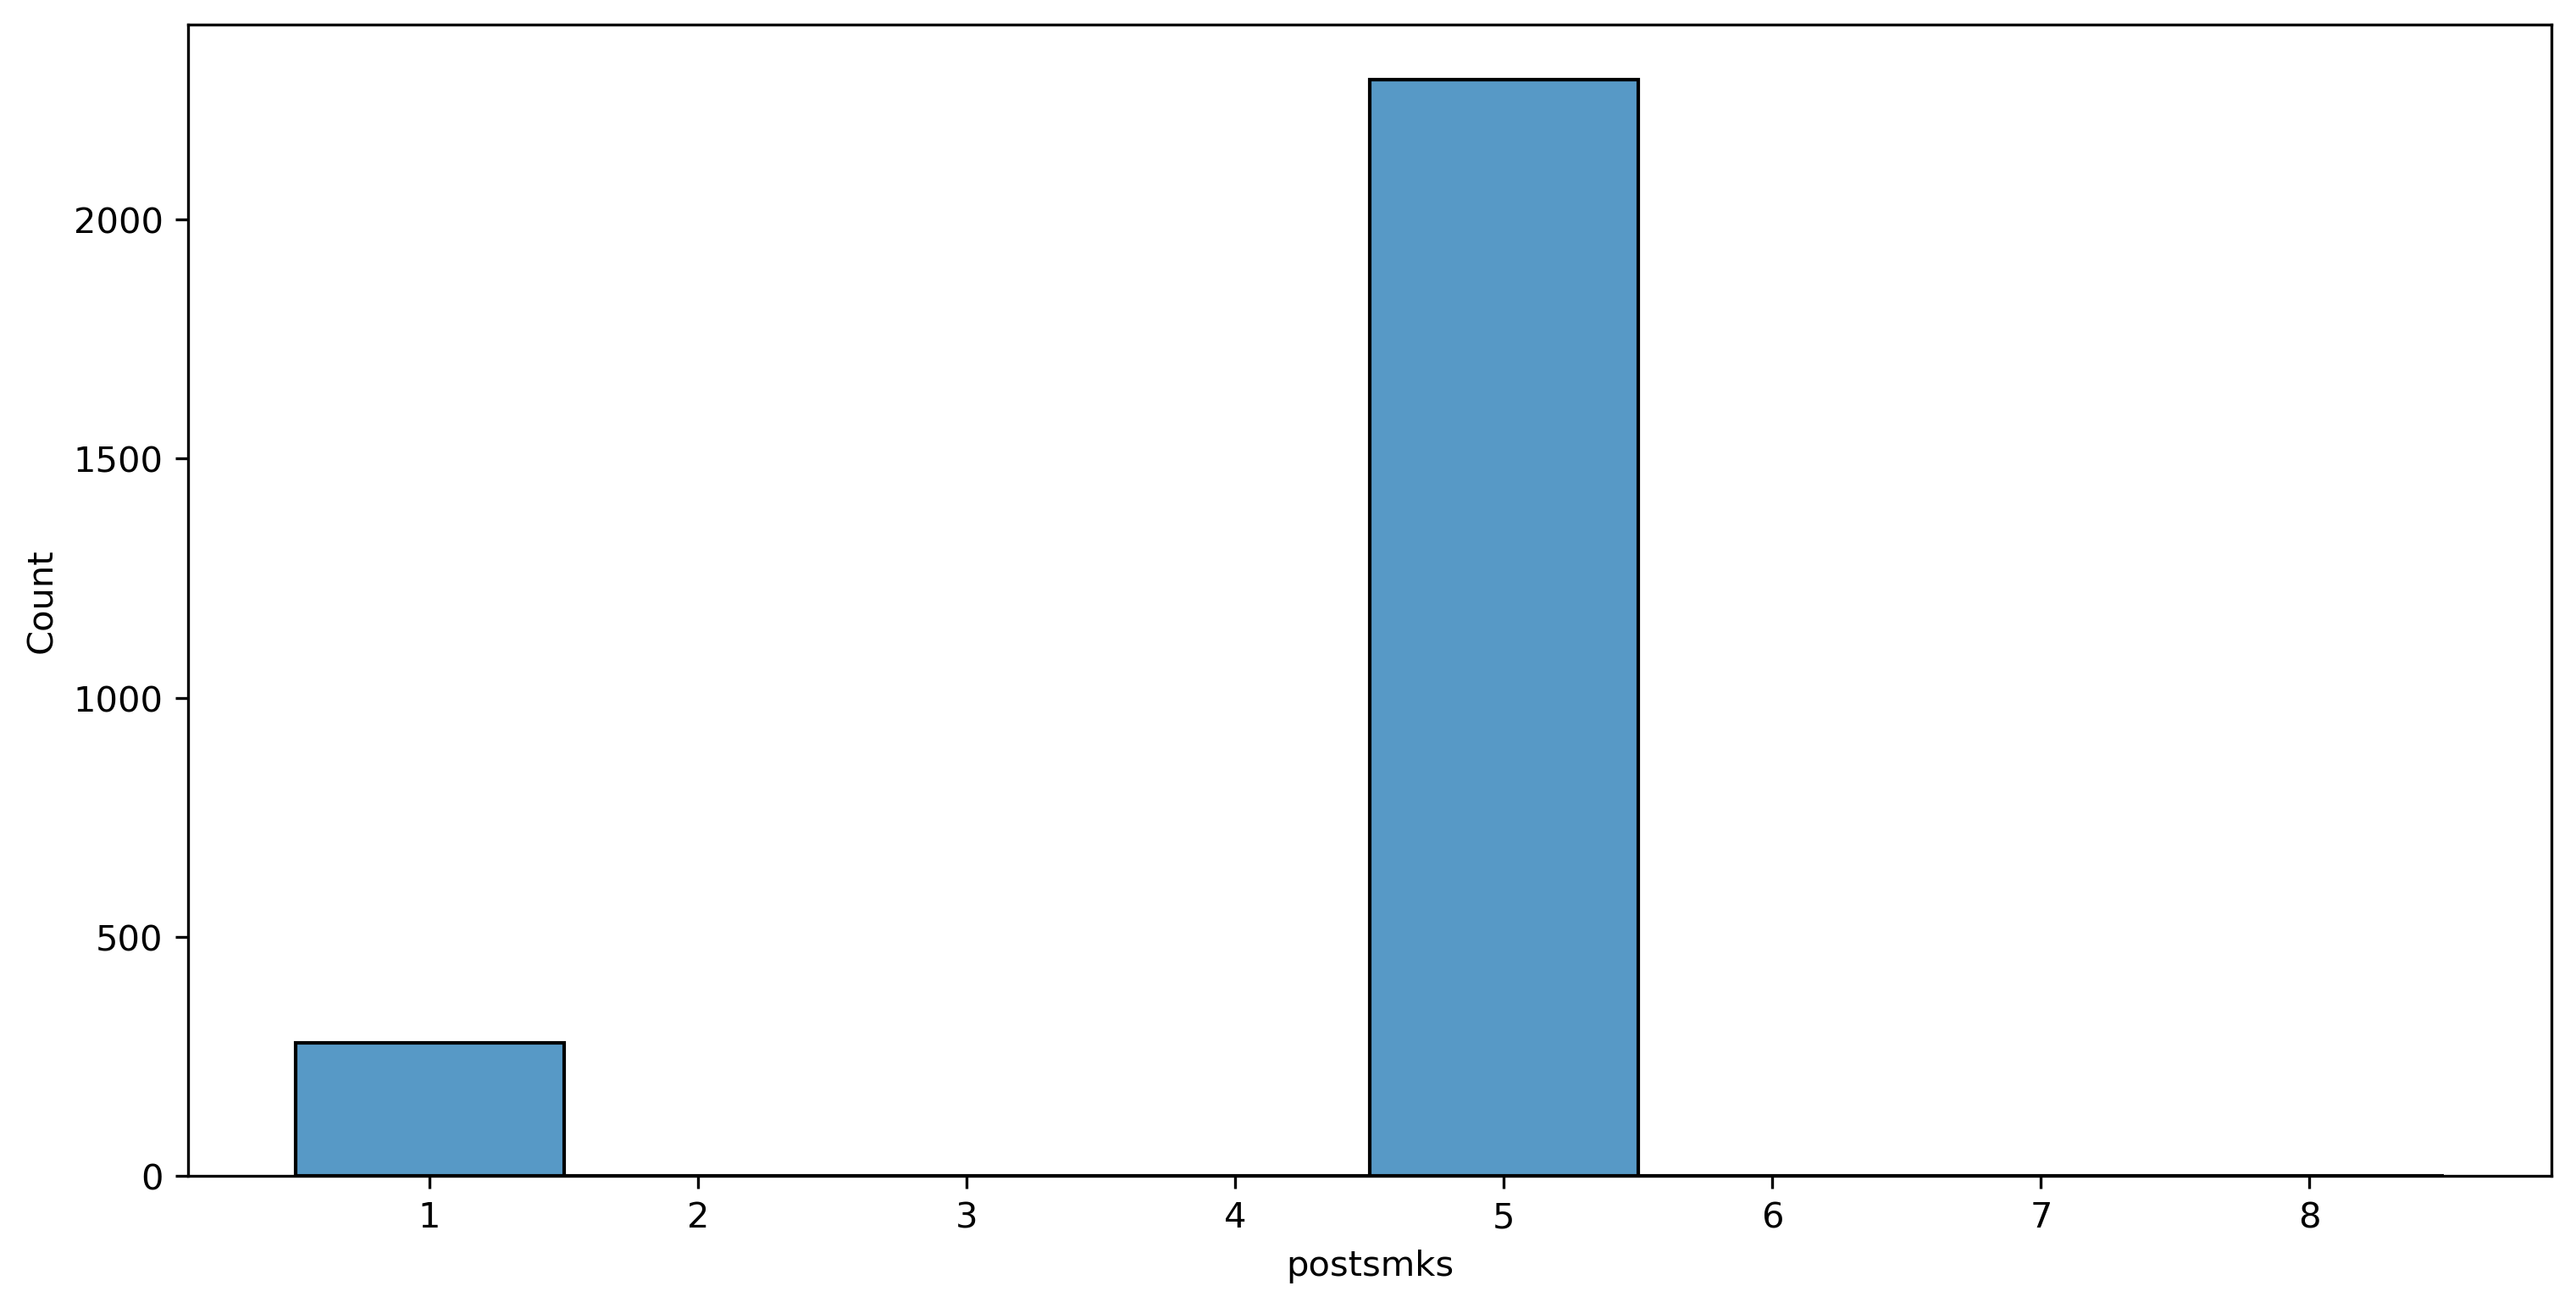

In [21]:
graphing.create_figure
graphing.hist(x=features[9], discrete=True, kde=False)
graphing.show

- ### npostsmk
Amount R smoked during pregnancy after R knew she was preg<br><br>
right skewed

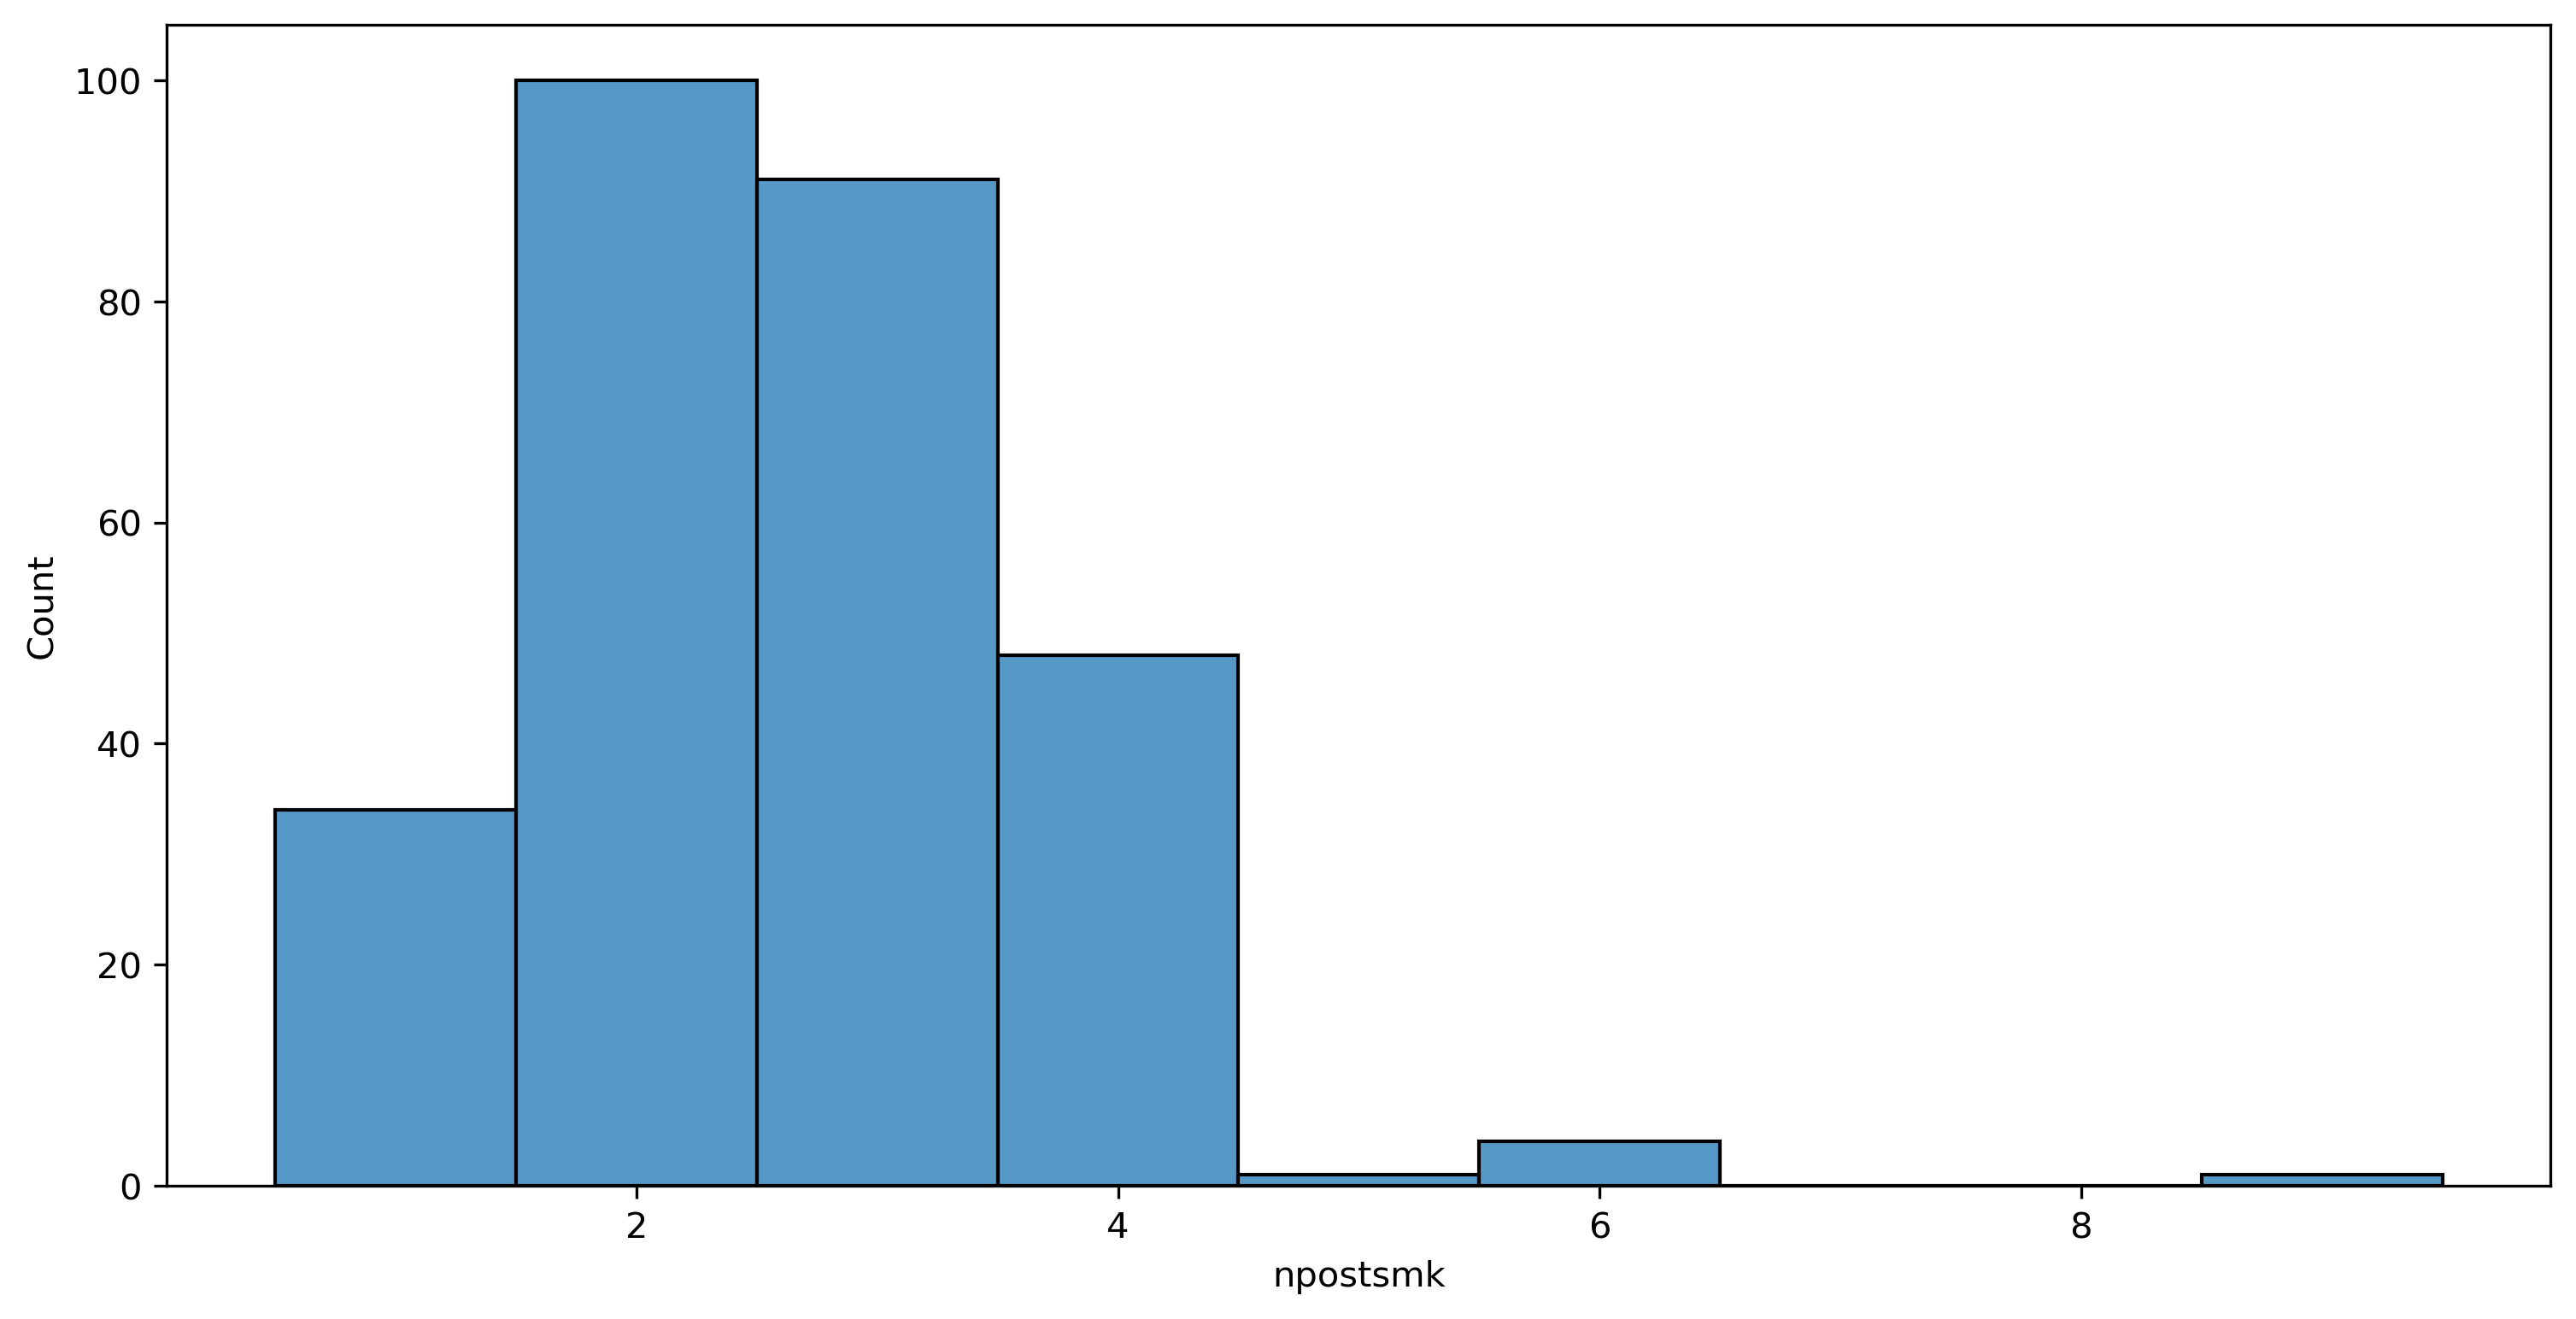

In [22]:
graphing.create_figure
graphing.hist(x=features[10], discrete=True, kde=False)
graphing.show

- ### feelinpg
How happy to be preg. scale (0-10)<br><br>
left skewed, higher values are more common

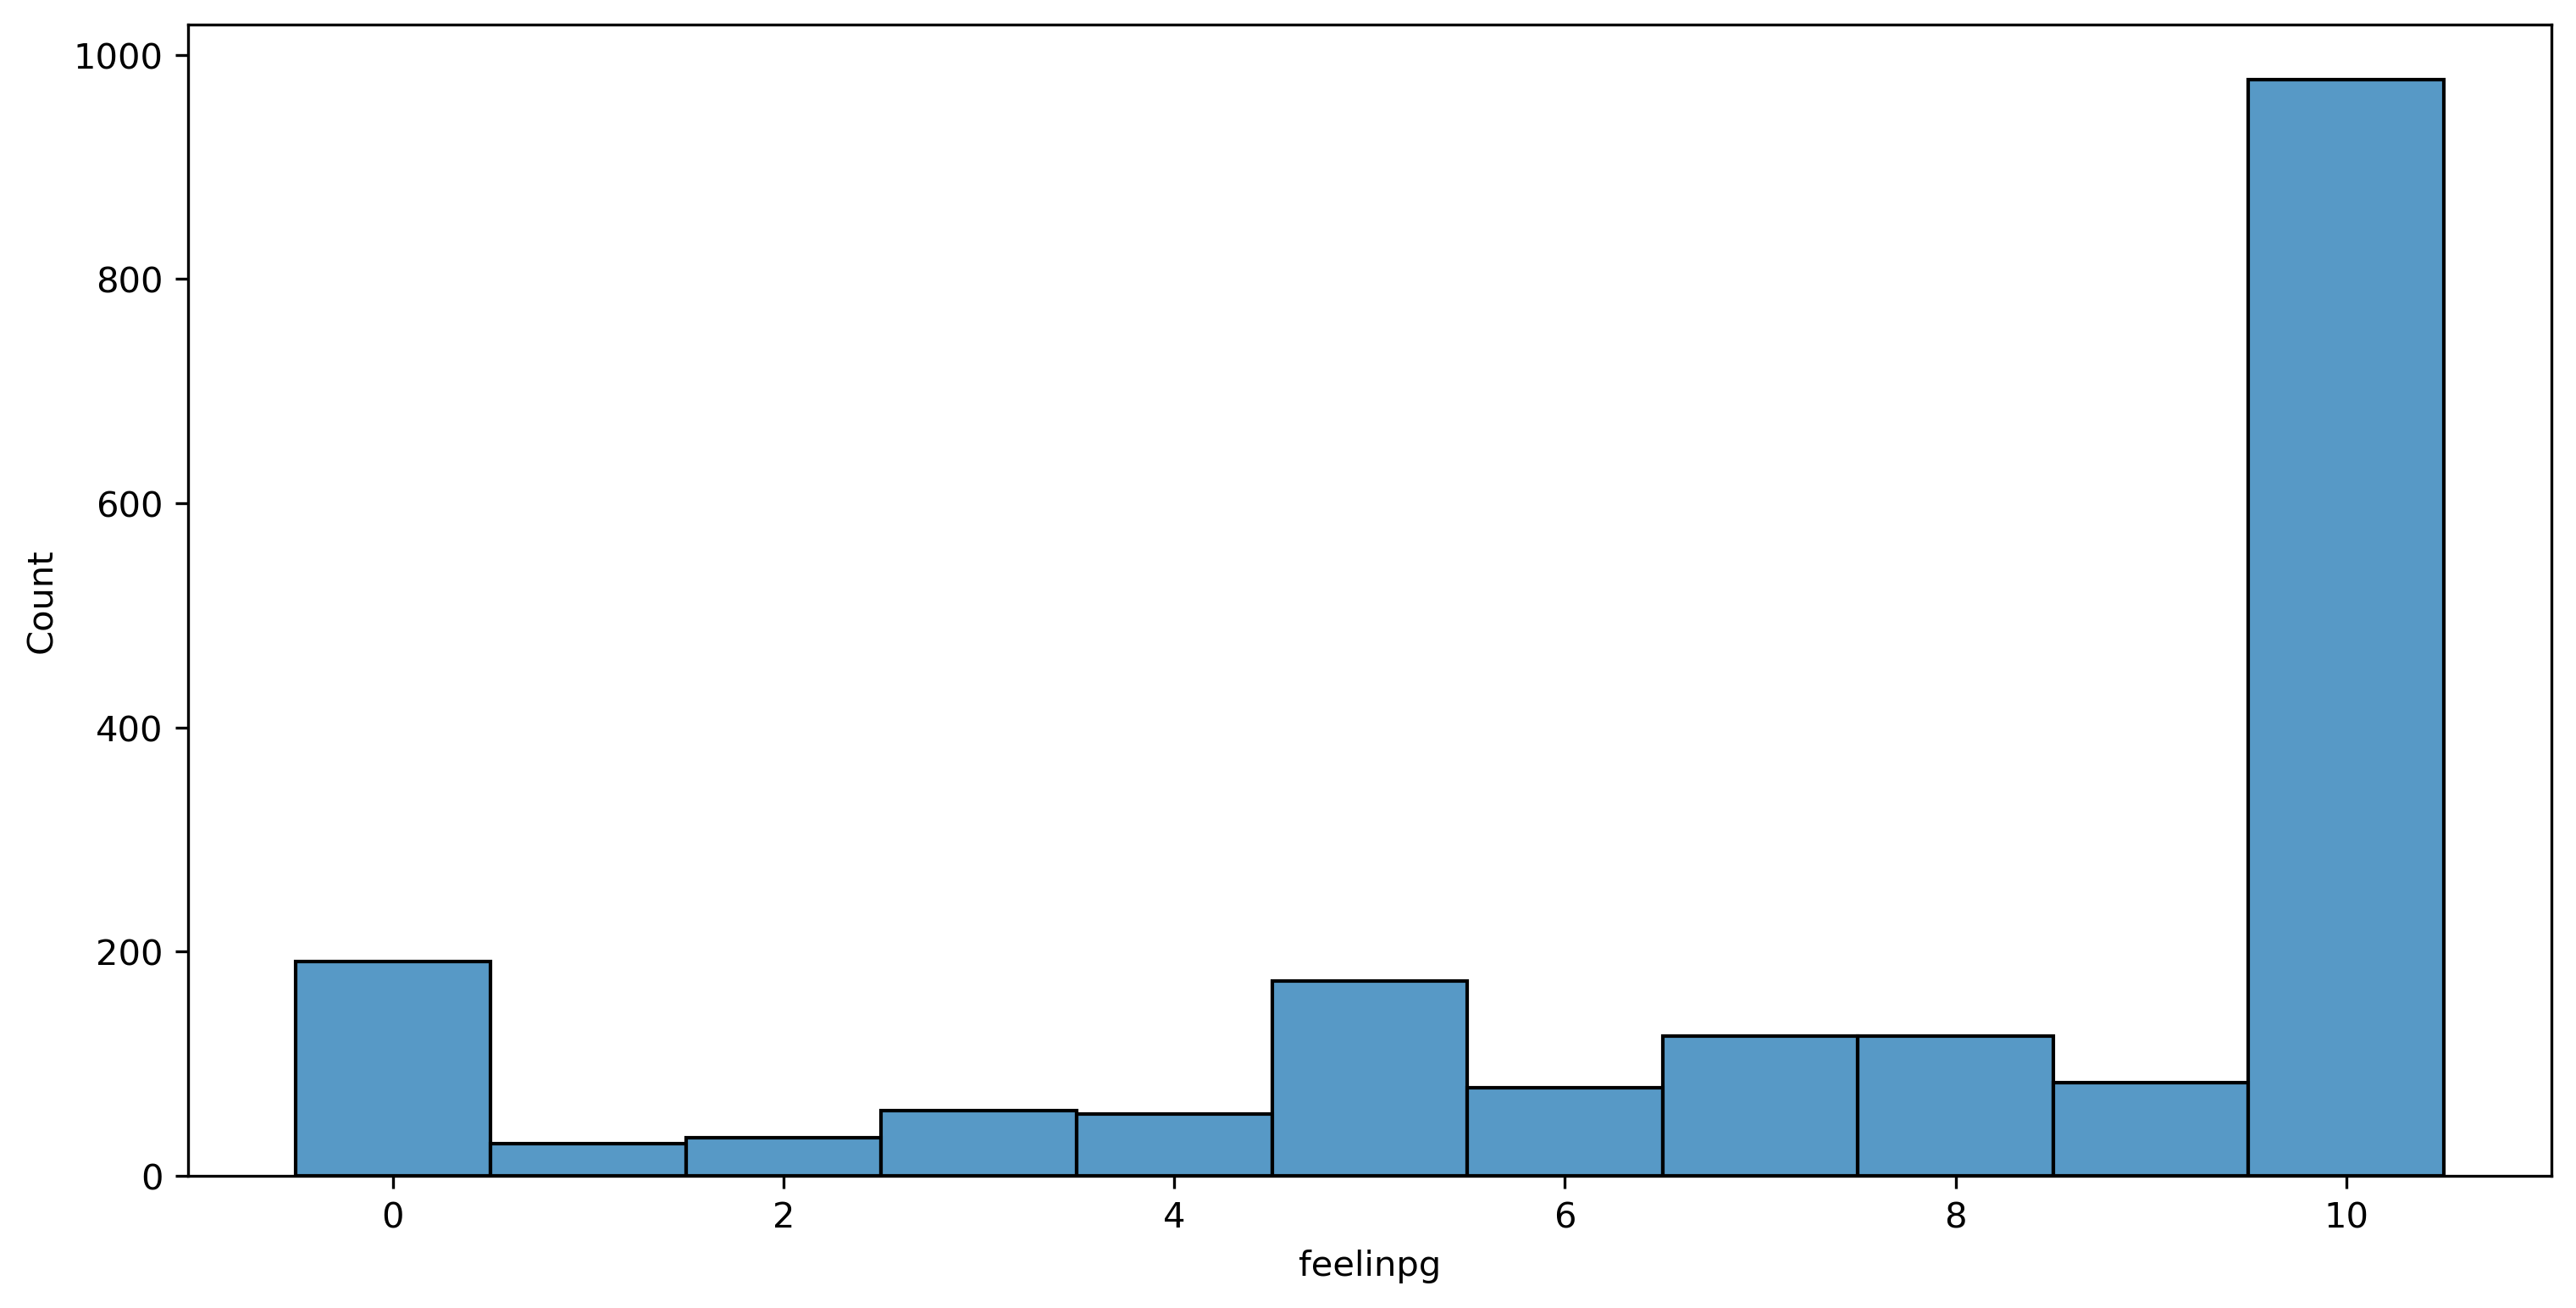

In [23]:
graphing.create_figure
graphing.hist(x=features[11], discrete=True, kde=False)
graphing.show

- ### gest_lb
Gestational length (if live birth)

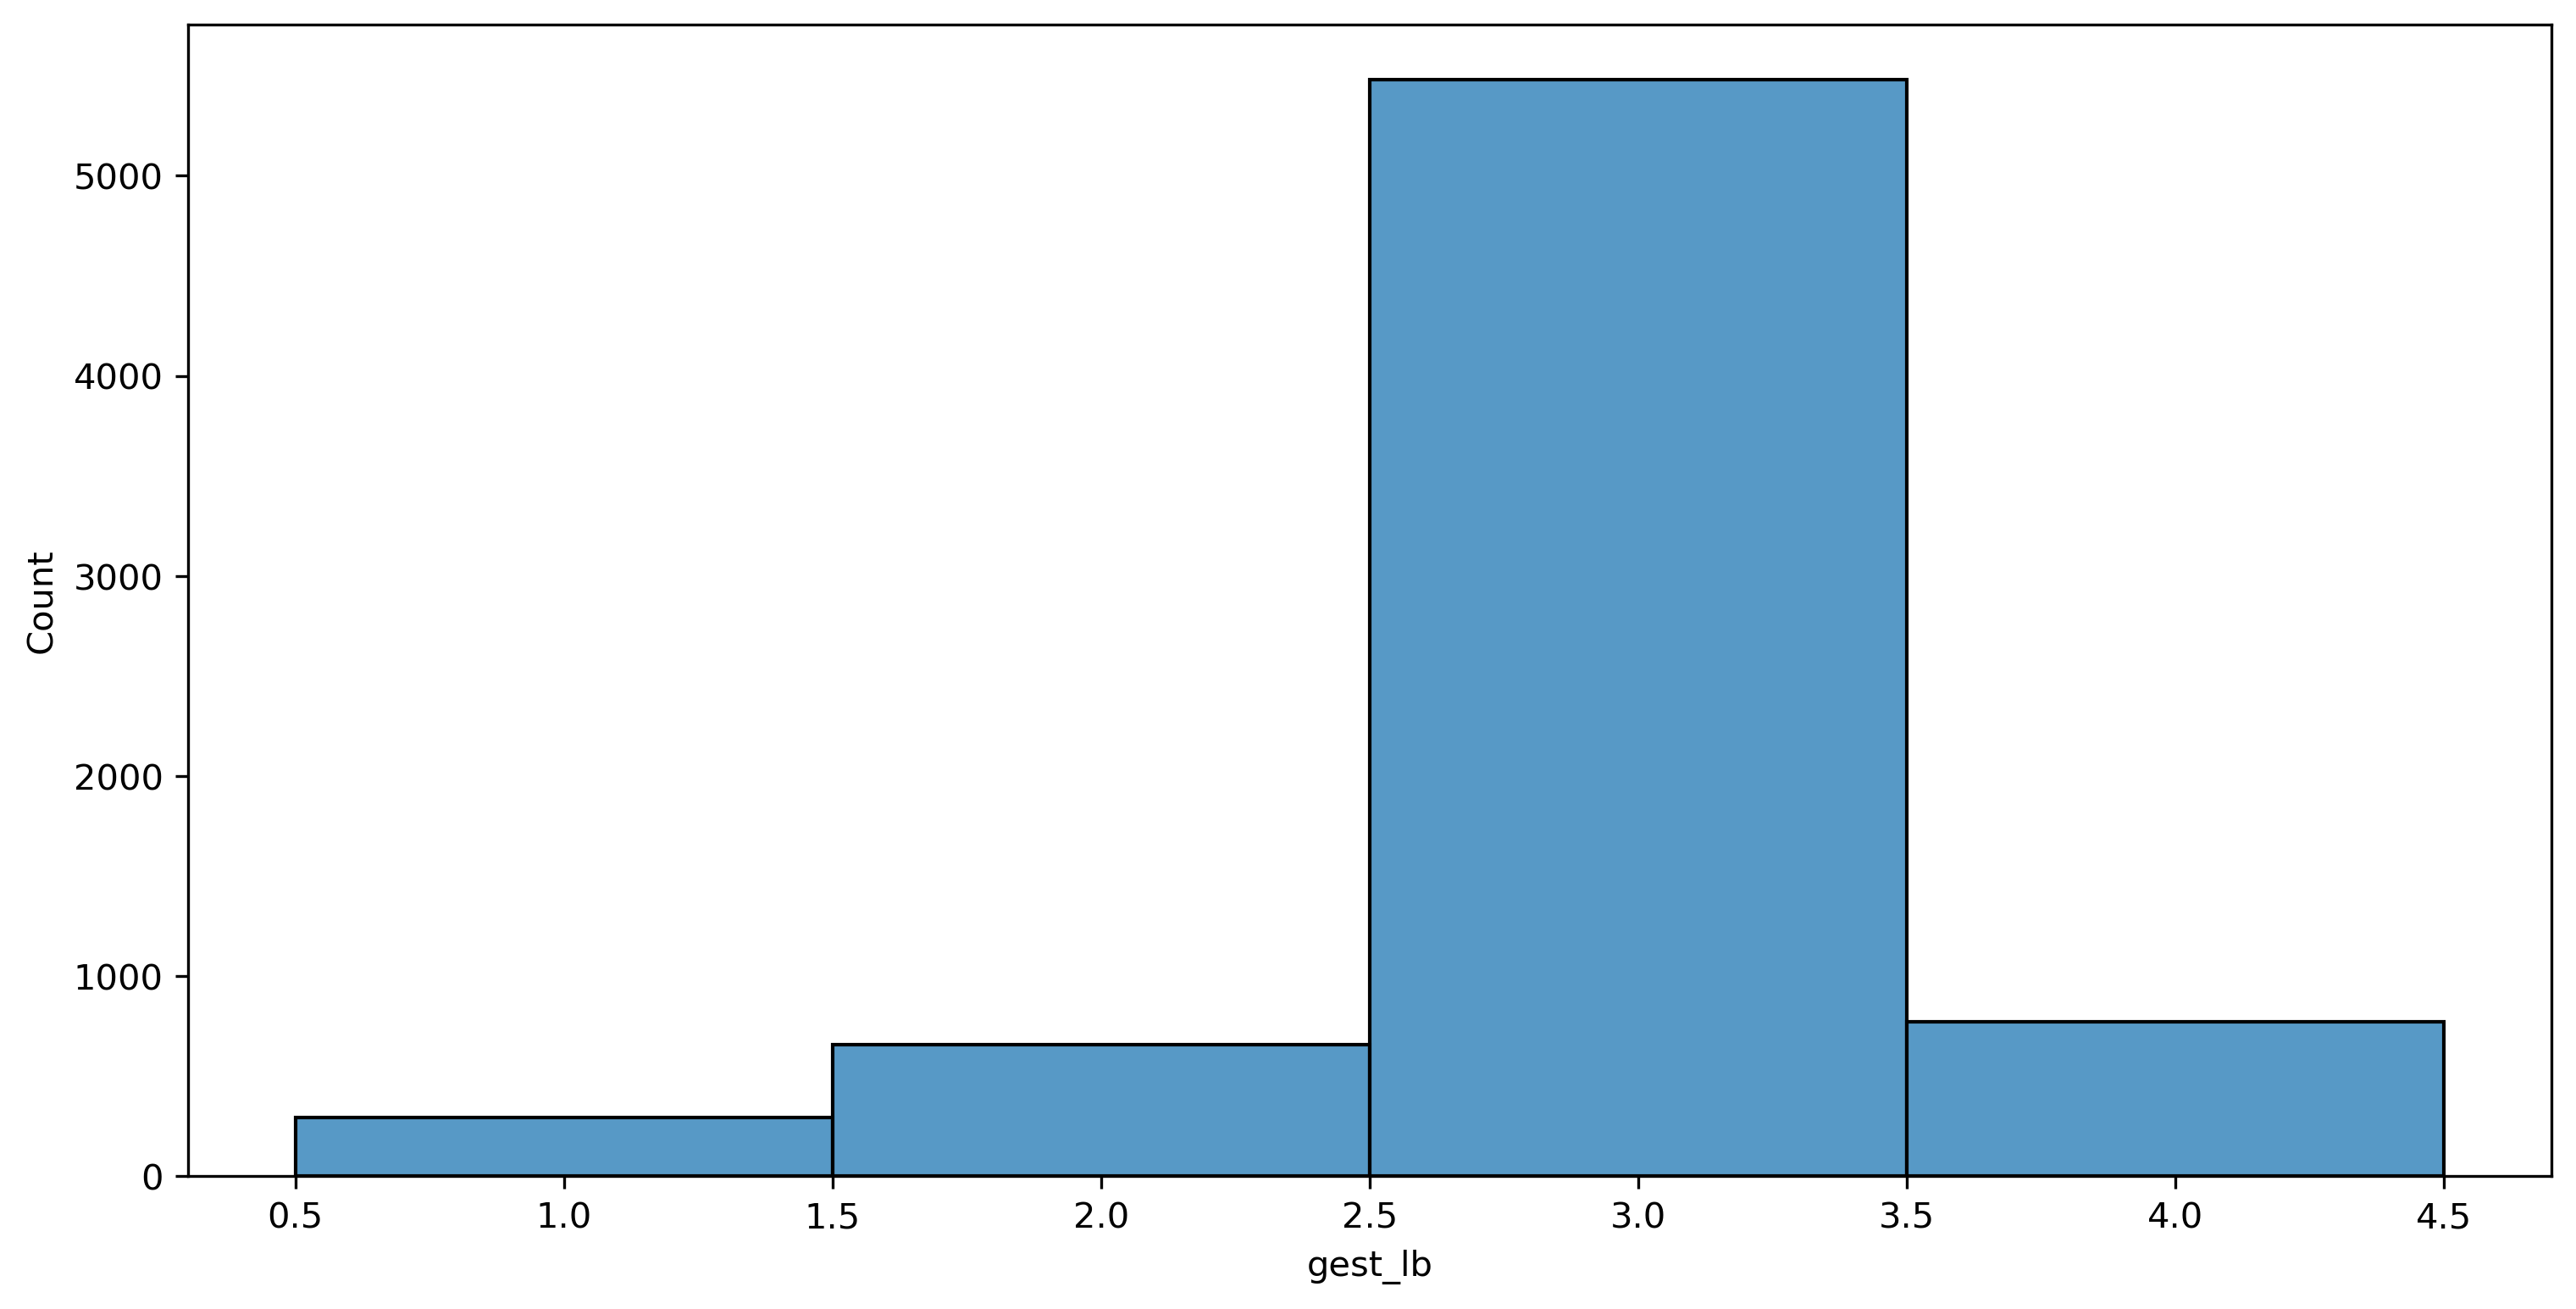

In [24]:
graphing.create_figure
graphing.hist(x=features[12], discrete=True, kde=False)
graphing.show

- ### gest_othr
Gestational length (if not live birth or current preg)

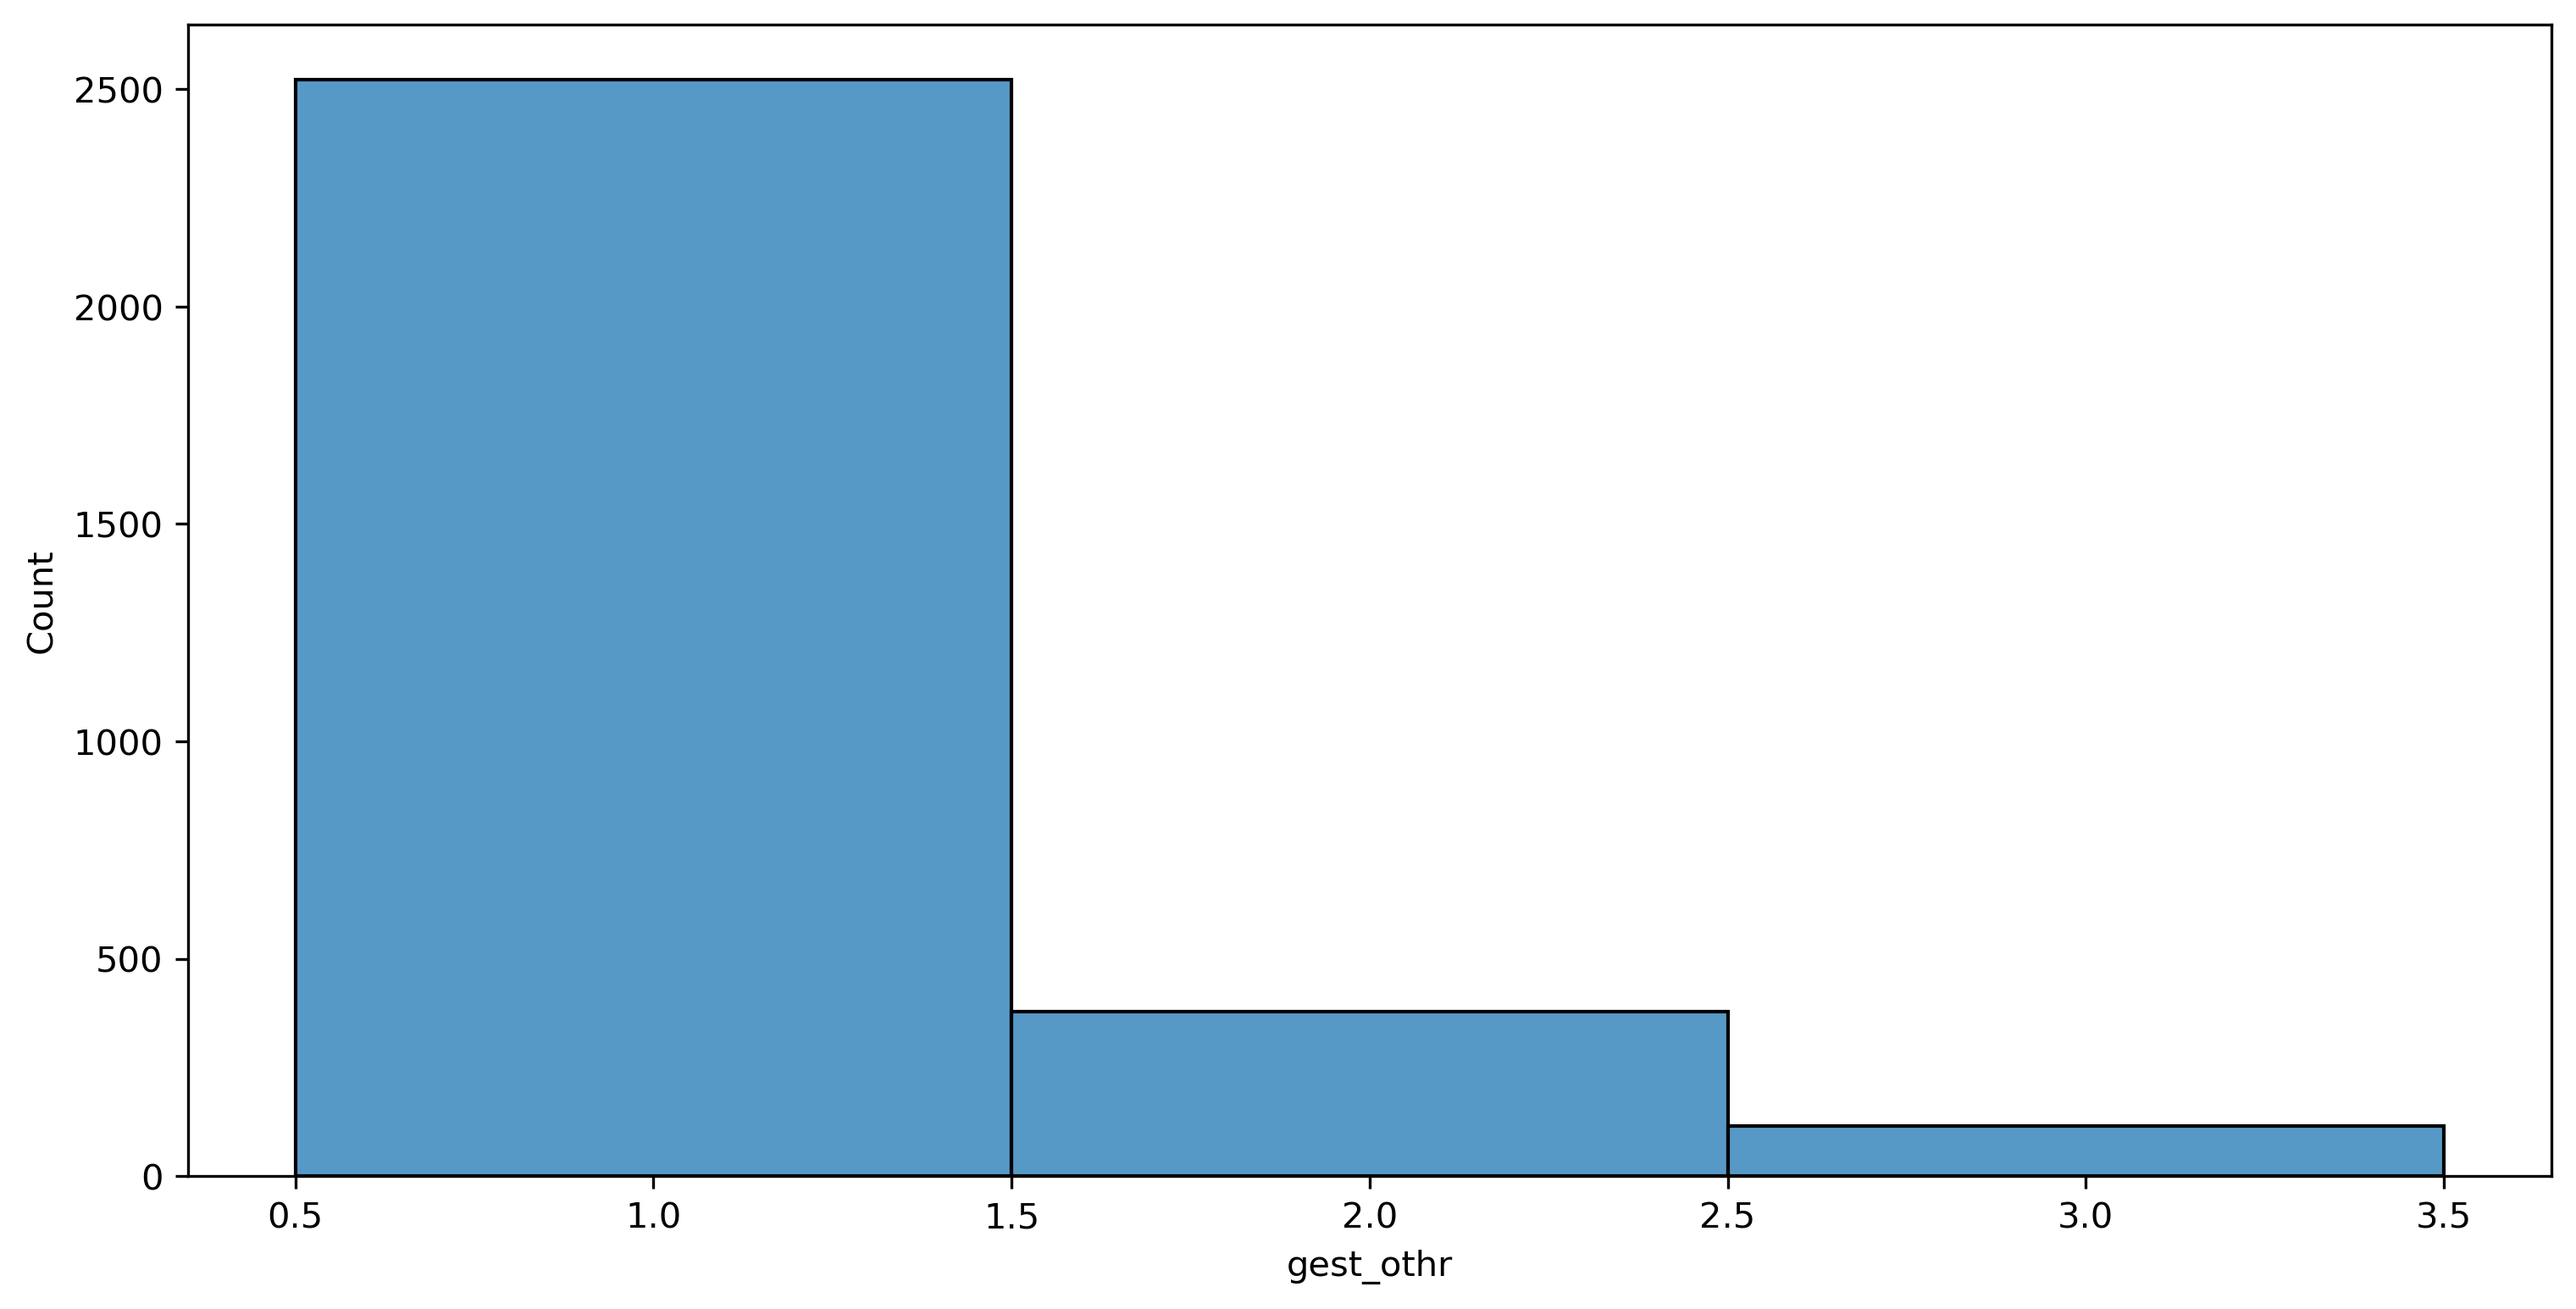

In [25]:
graphing.create_figure
graphing.hist(x=features[13], discrete=True, kde=False)
graphing.show

- ### agepreg
Age at pregnancy outcome<br><br>
nearly normally distributed.

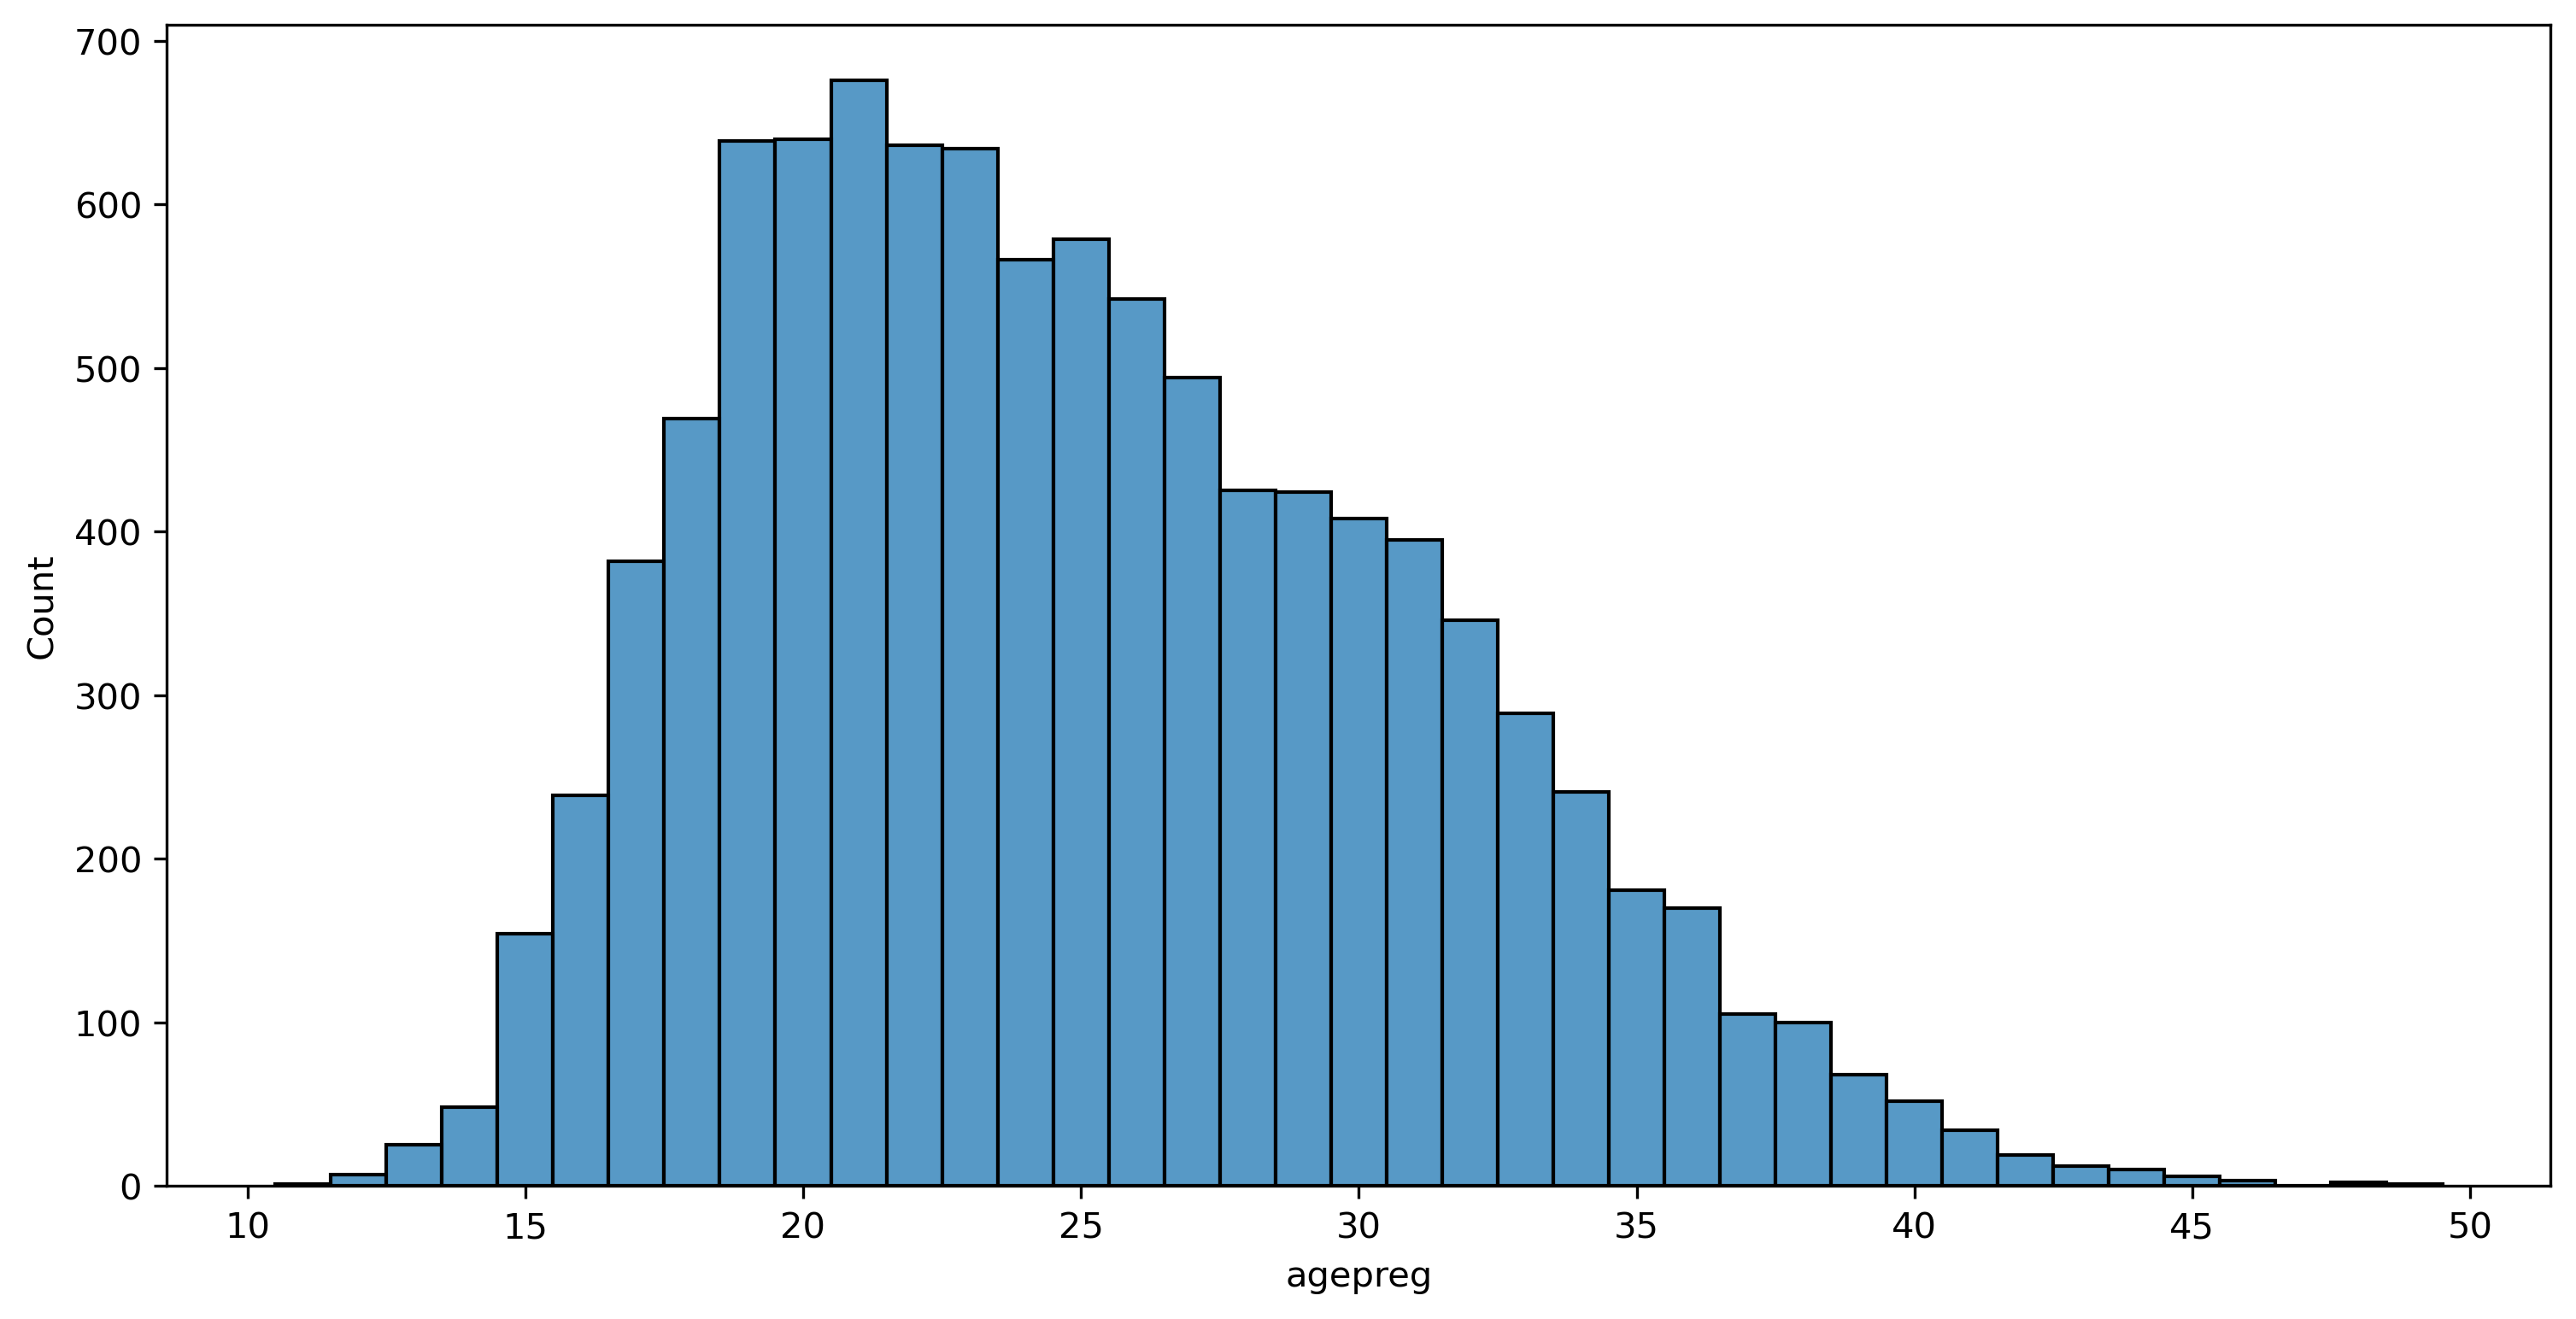

In [26]:
graphing.create_figure
graphing.hist(x=features[14], discrete=True, kde=False)
graphing.show

- ### ager
Age at interview

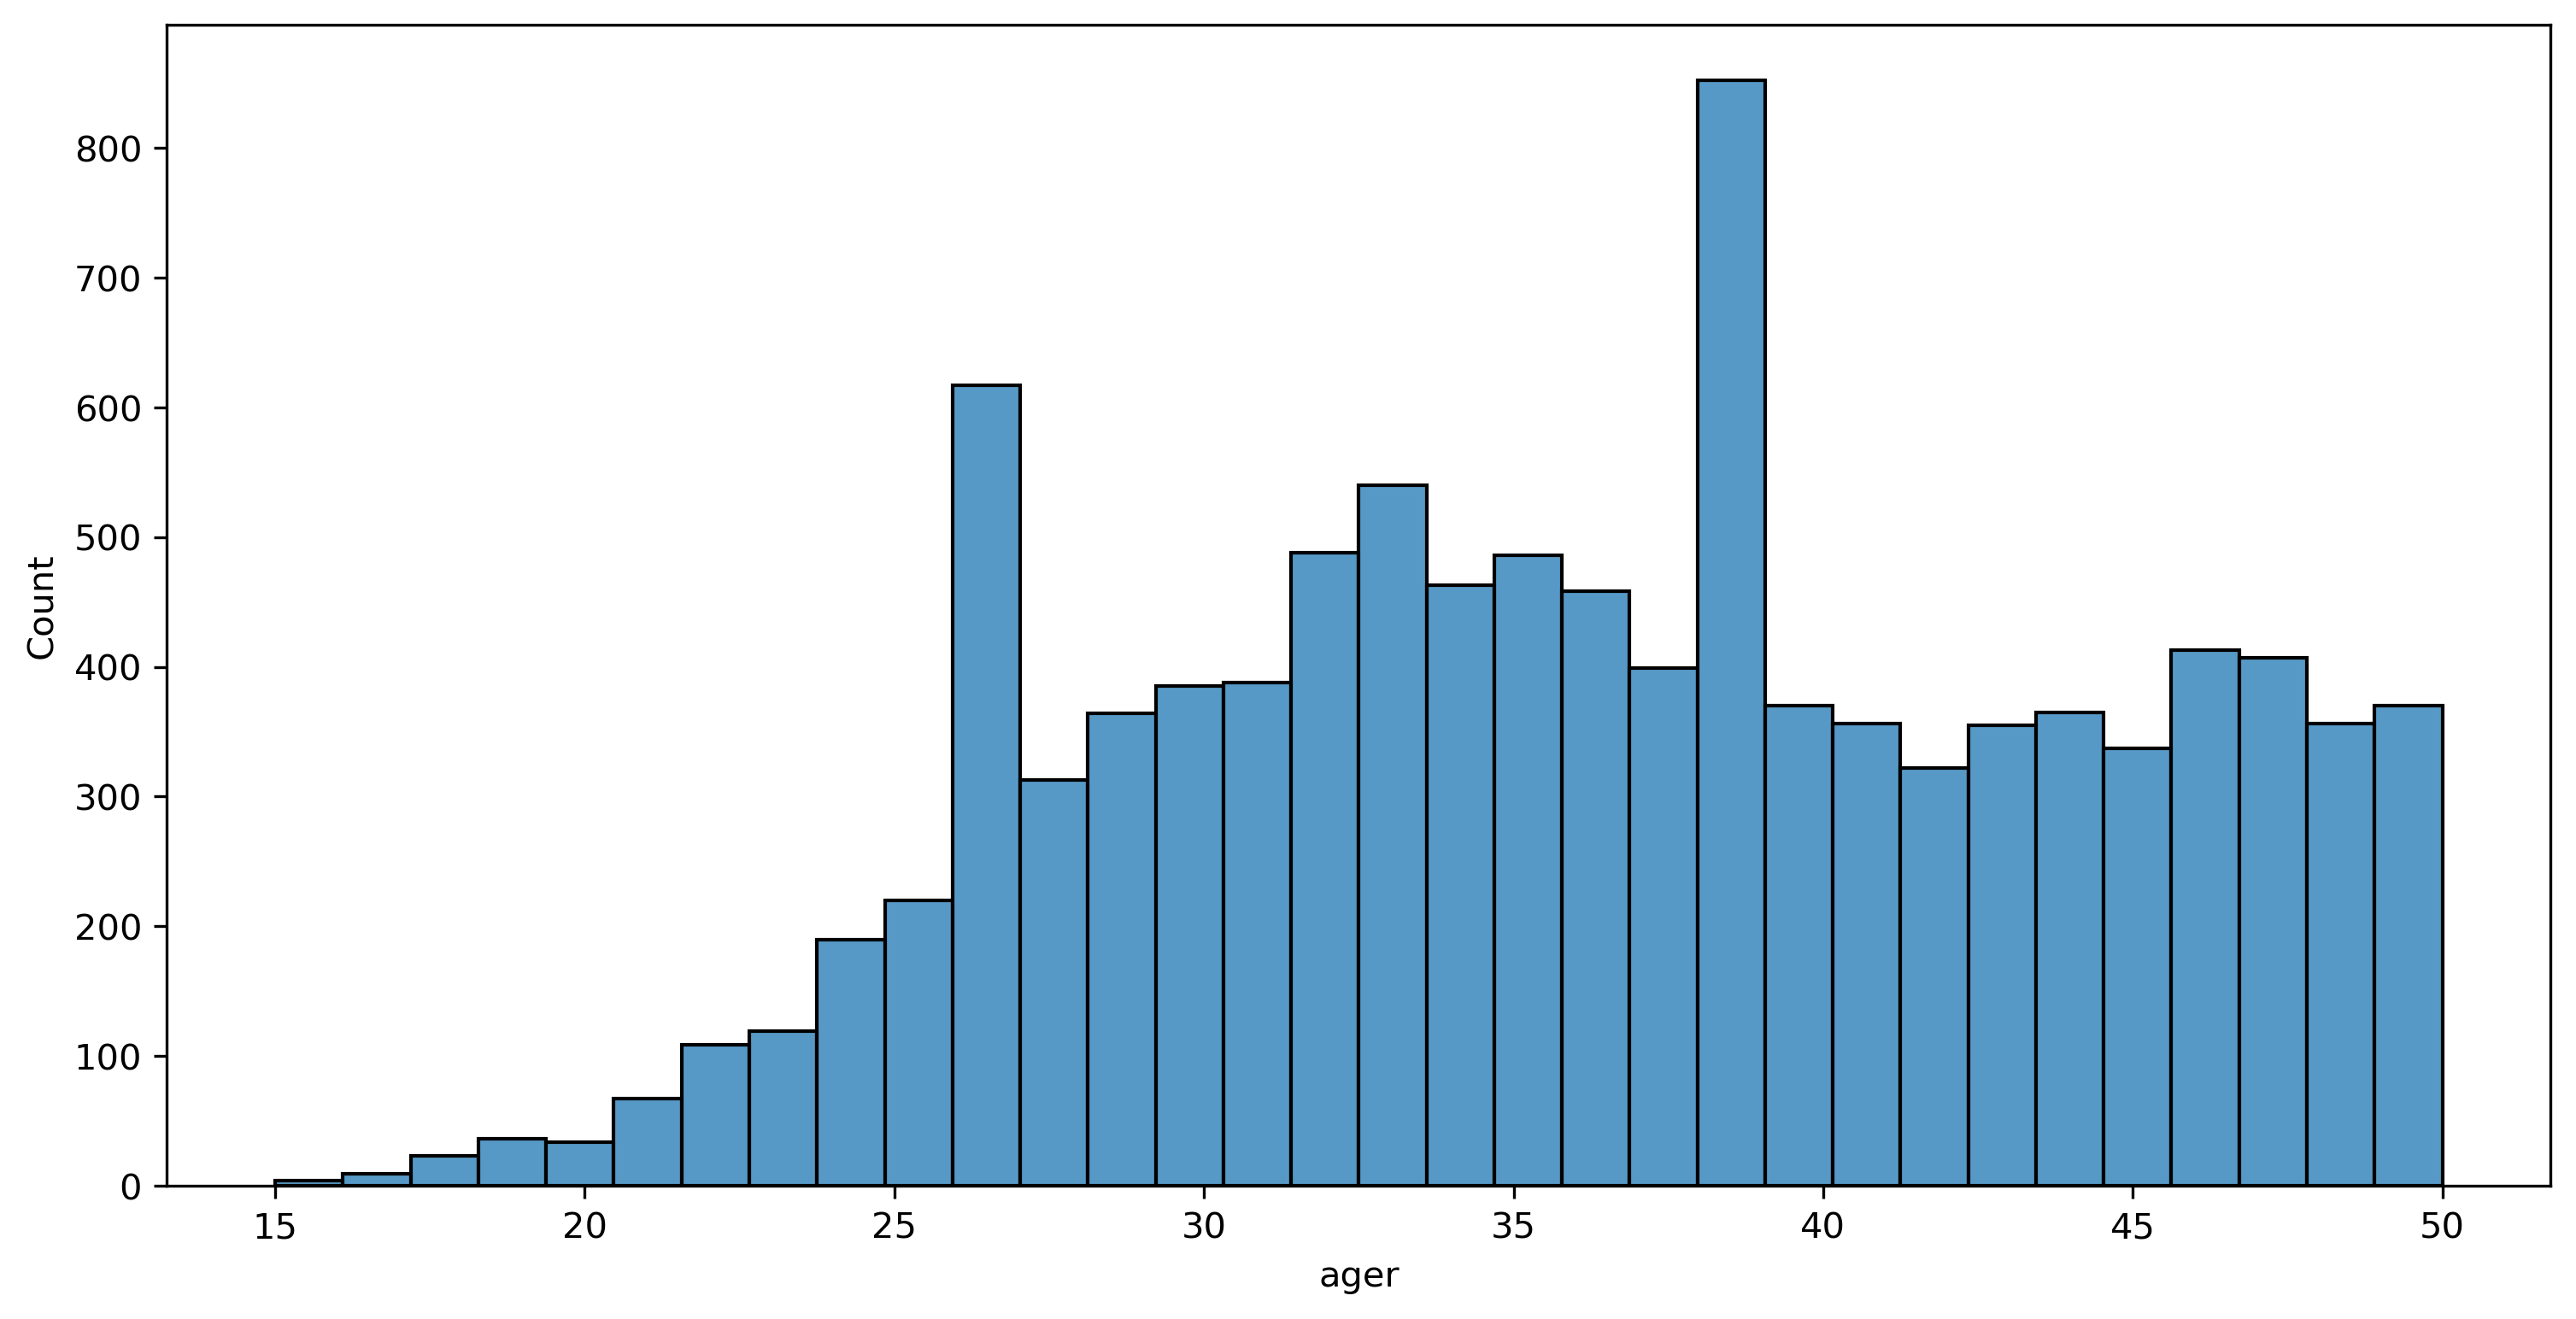

In [27]:
graphing.create_figure
graphing.hist(x=features[15], discrete=False, kde=False)
graphing.show

- ### educat
Education (completed years of schooling)

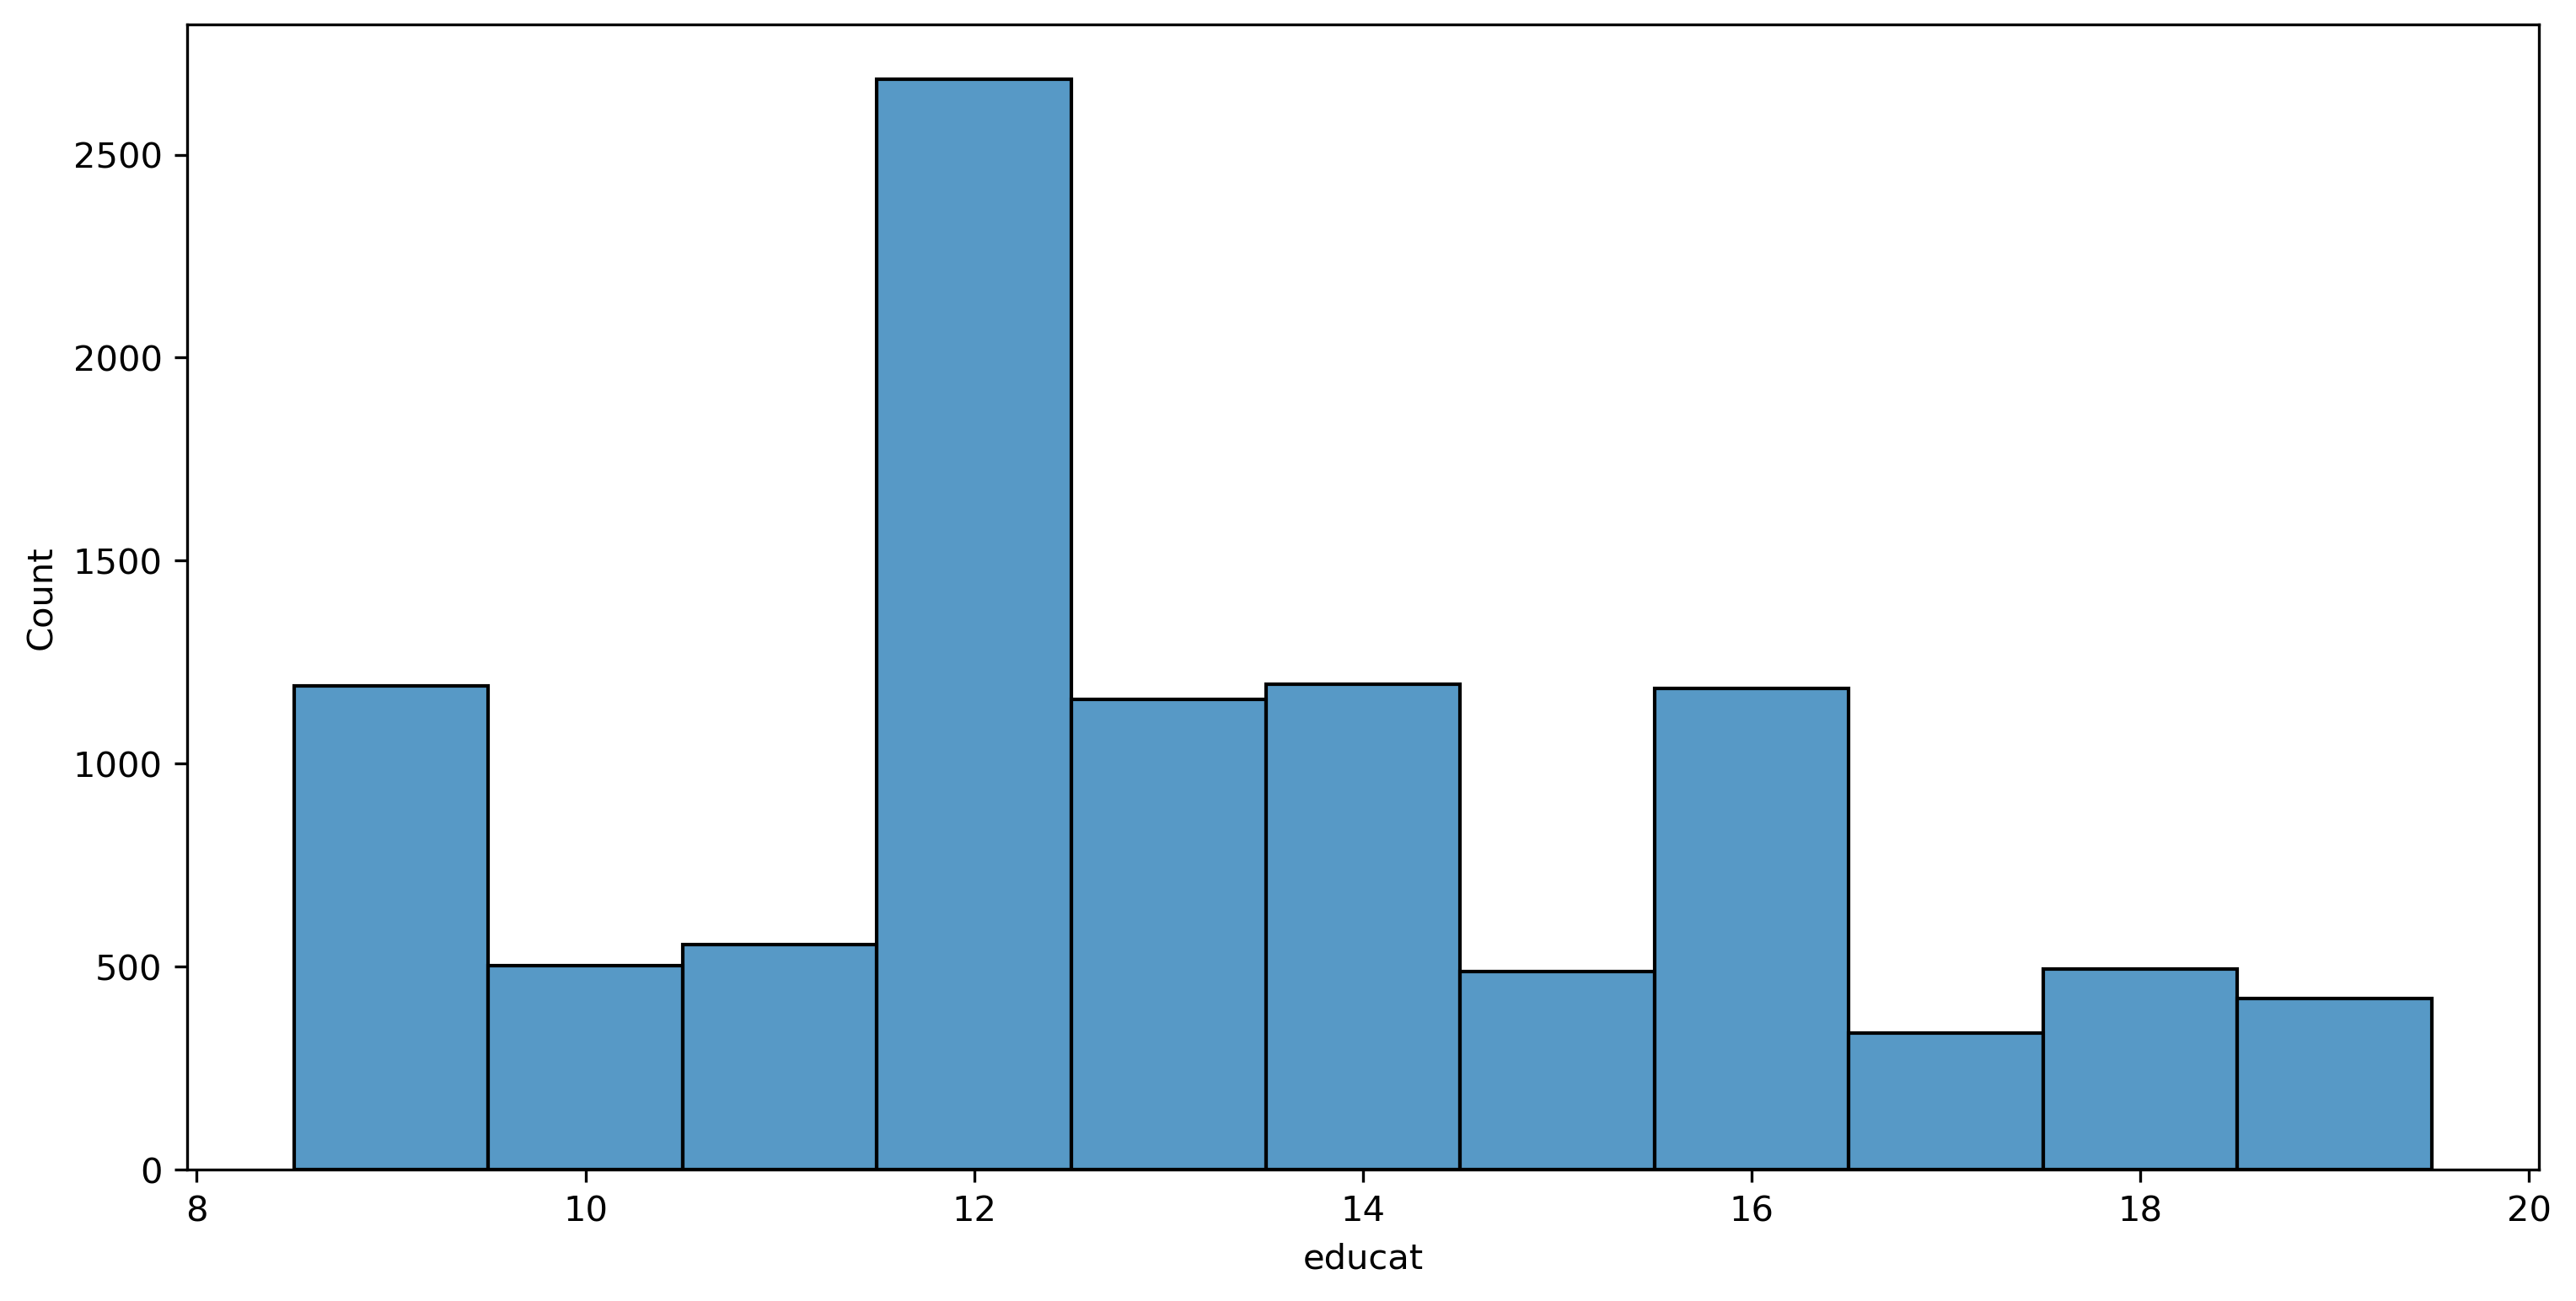

In [28]:
graphing.create_figure
graphing.hist(x=features[16], discrete=True, kde=False)
graphing.show

- ### hieduc
Highest completed year of school or degree

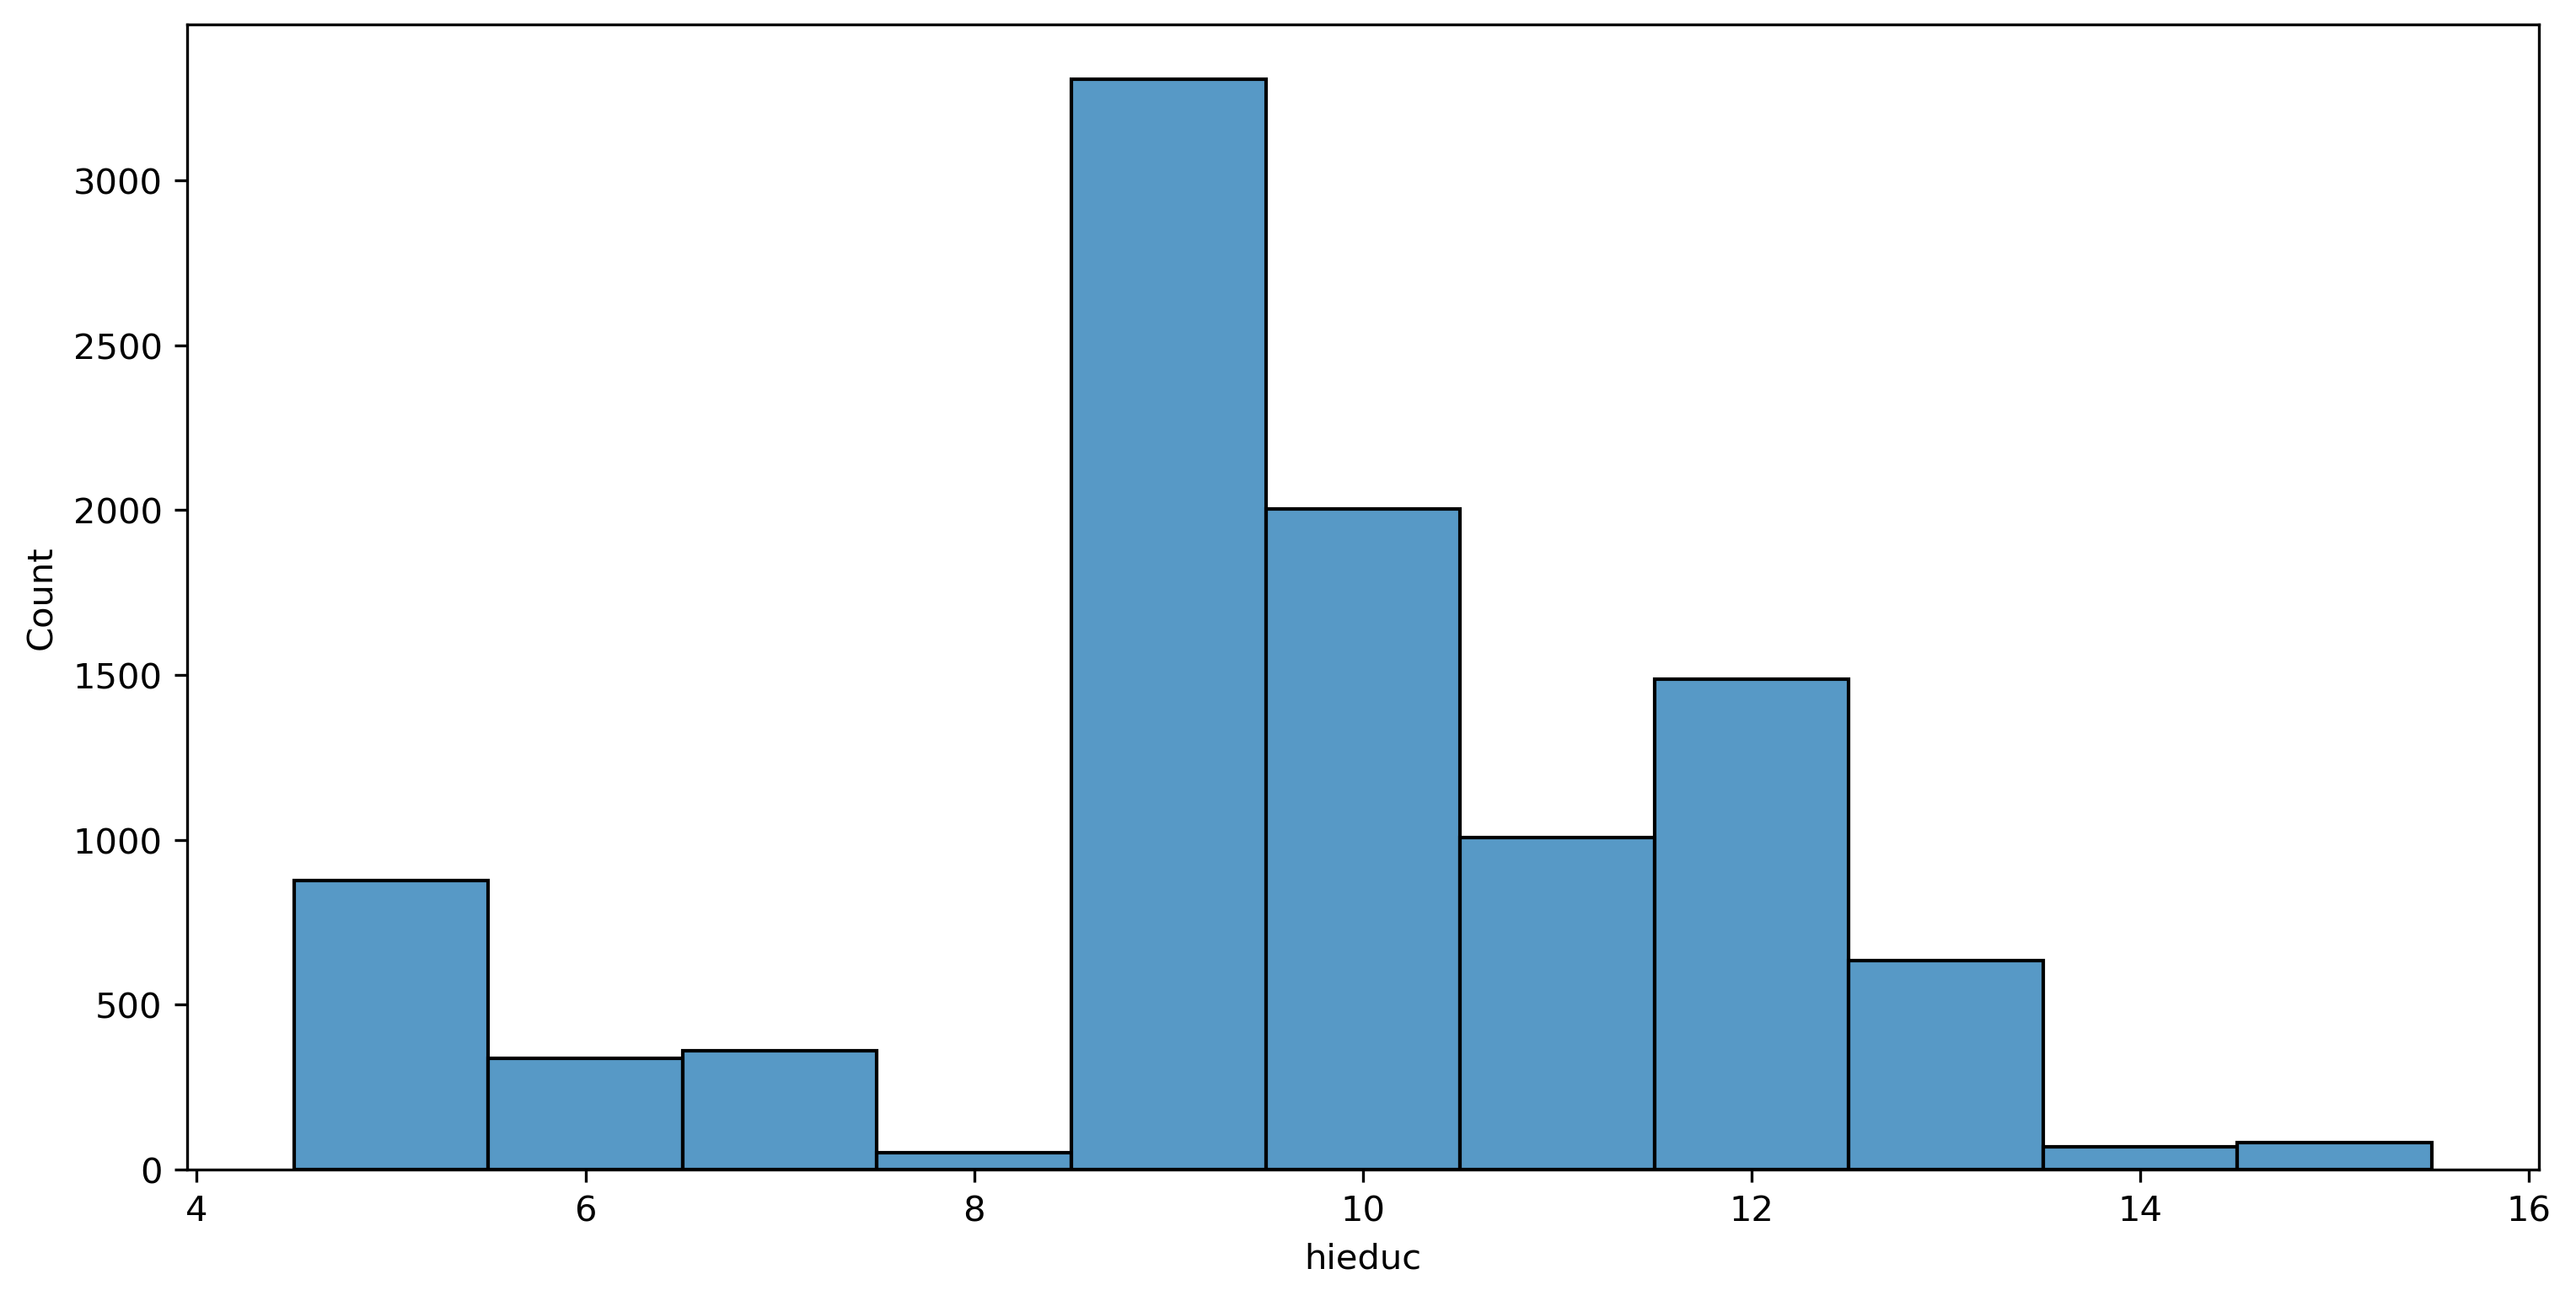

In [29]:
graphing.create_figure
graphing.hist(x=features[17], discrete=True, kde=False)
graphing.show

- ### race
Race

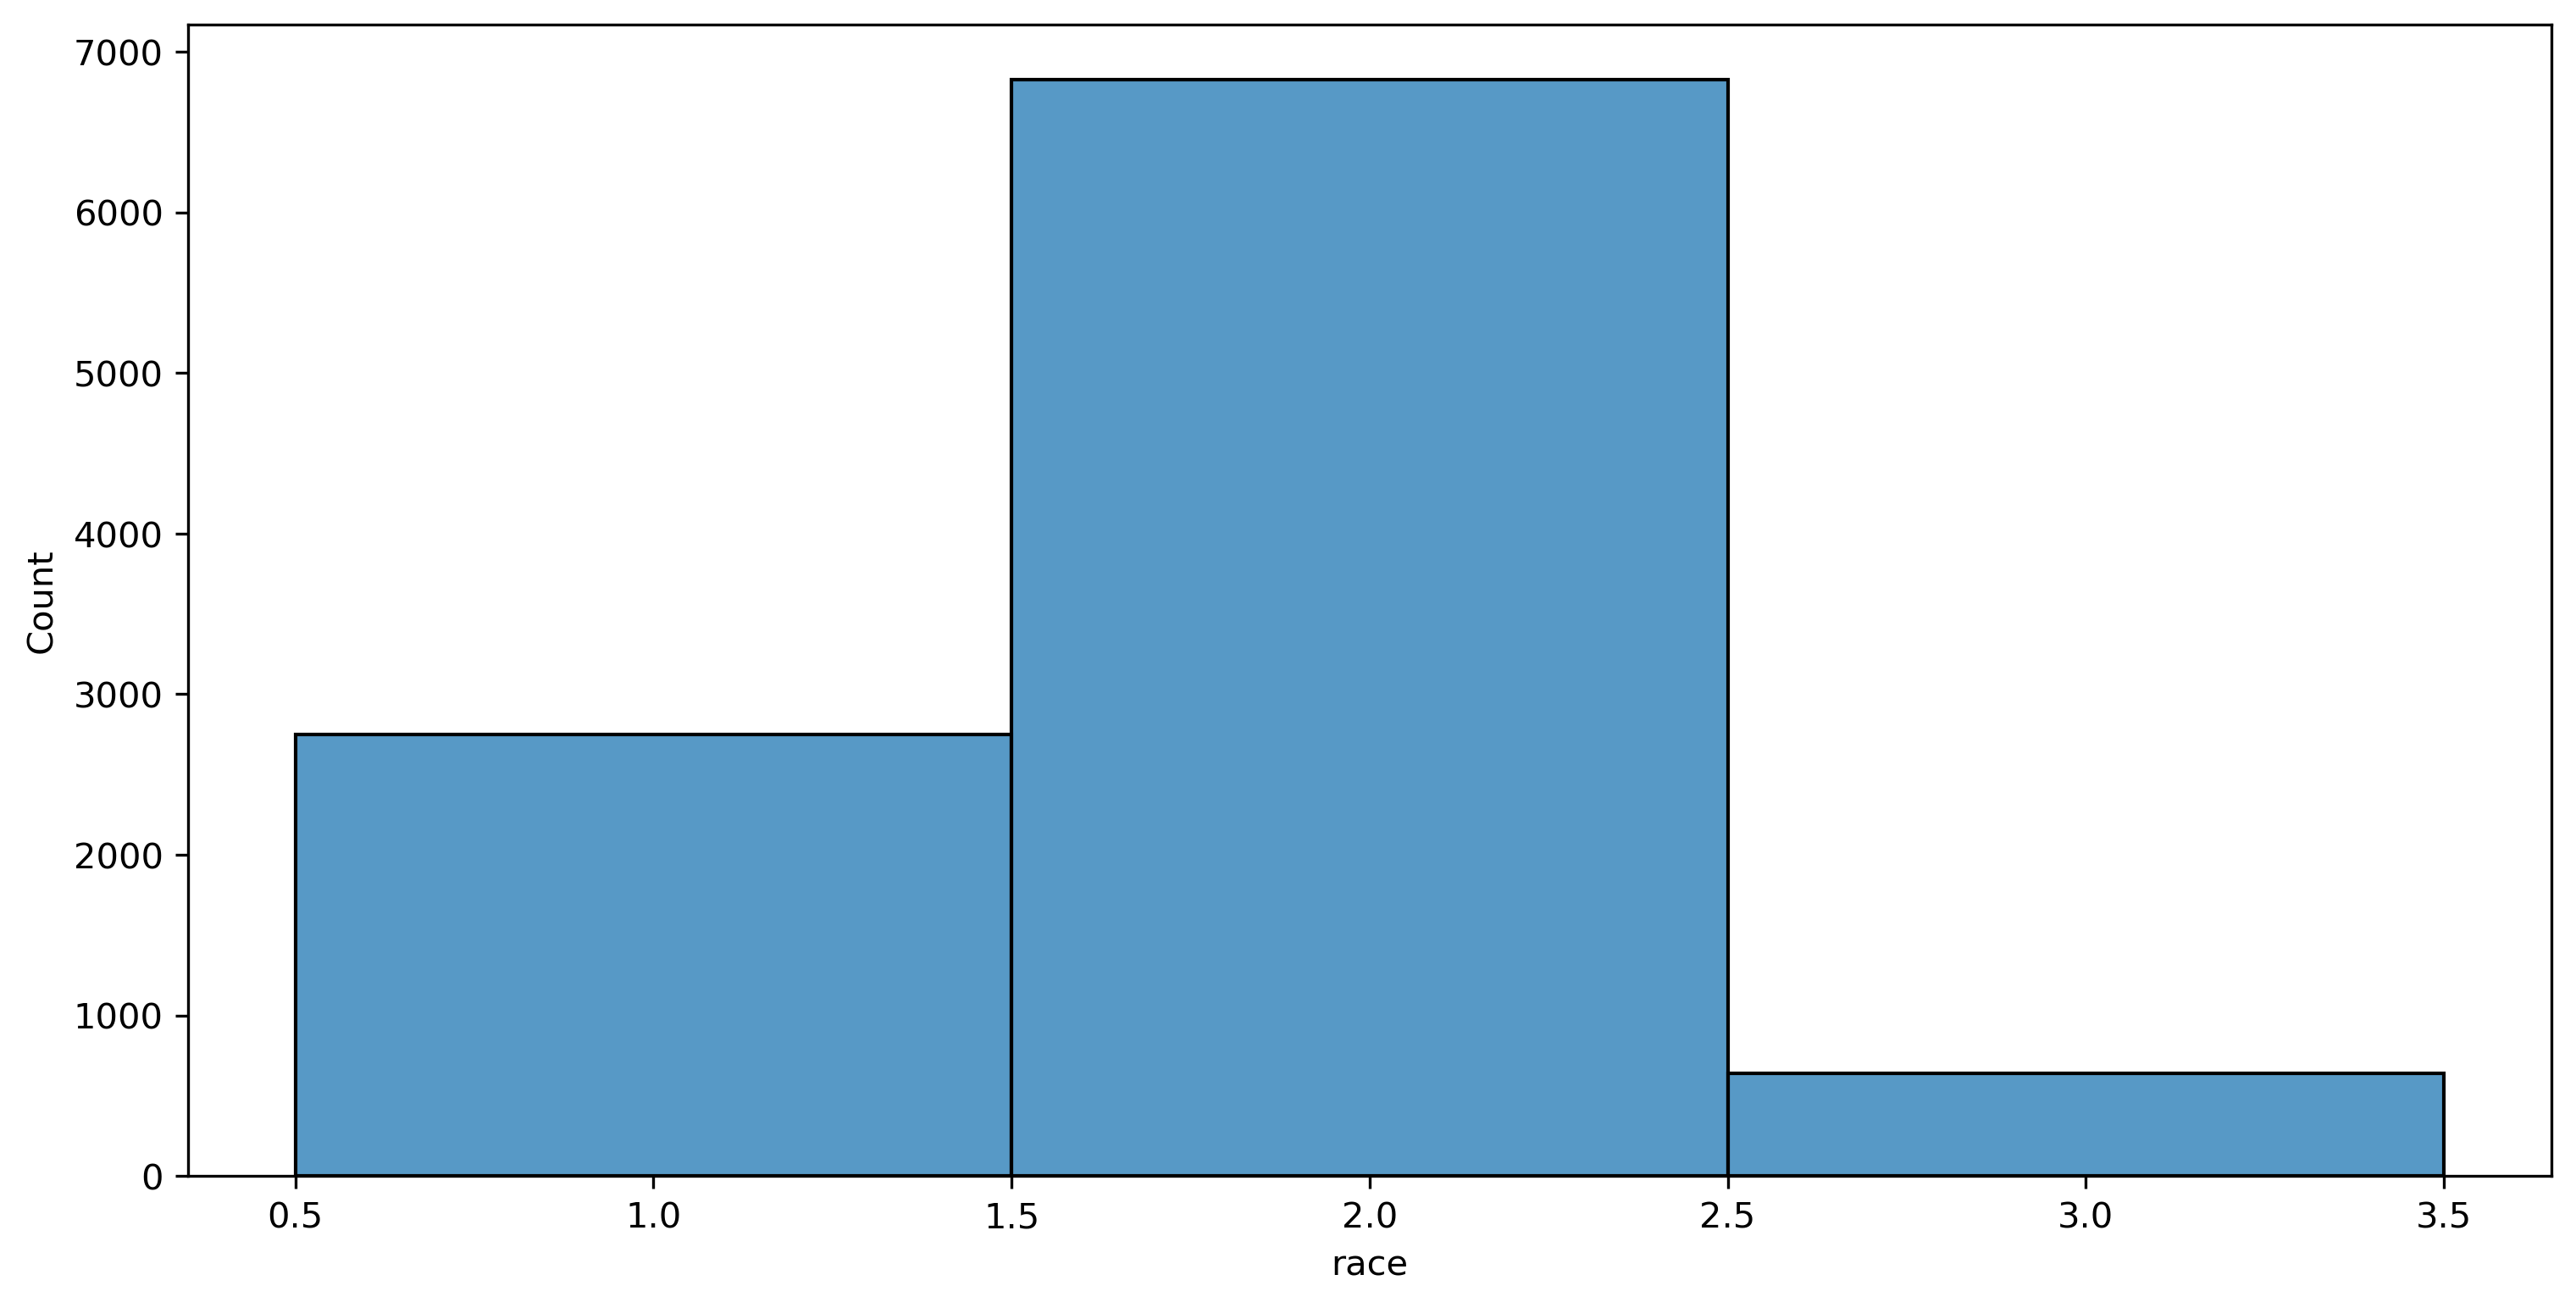

In [30]:
graphing.create_figure
graphing.hist(x=features[18], discrete=True, kde=False)
graphing.show

- ### pregnum
CAPI-based total number of pregnancies<br><br>
right skewed.

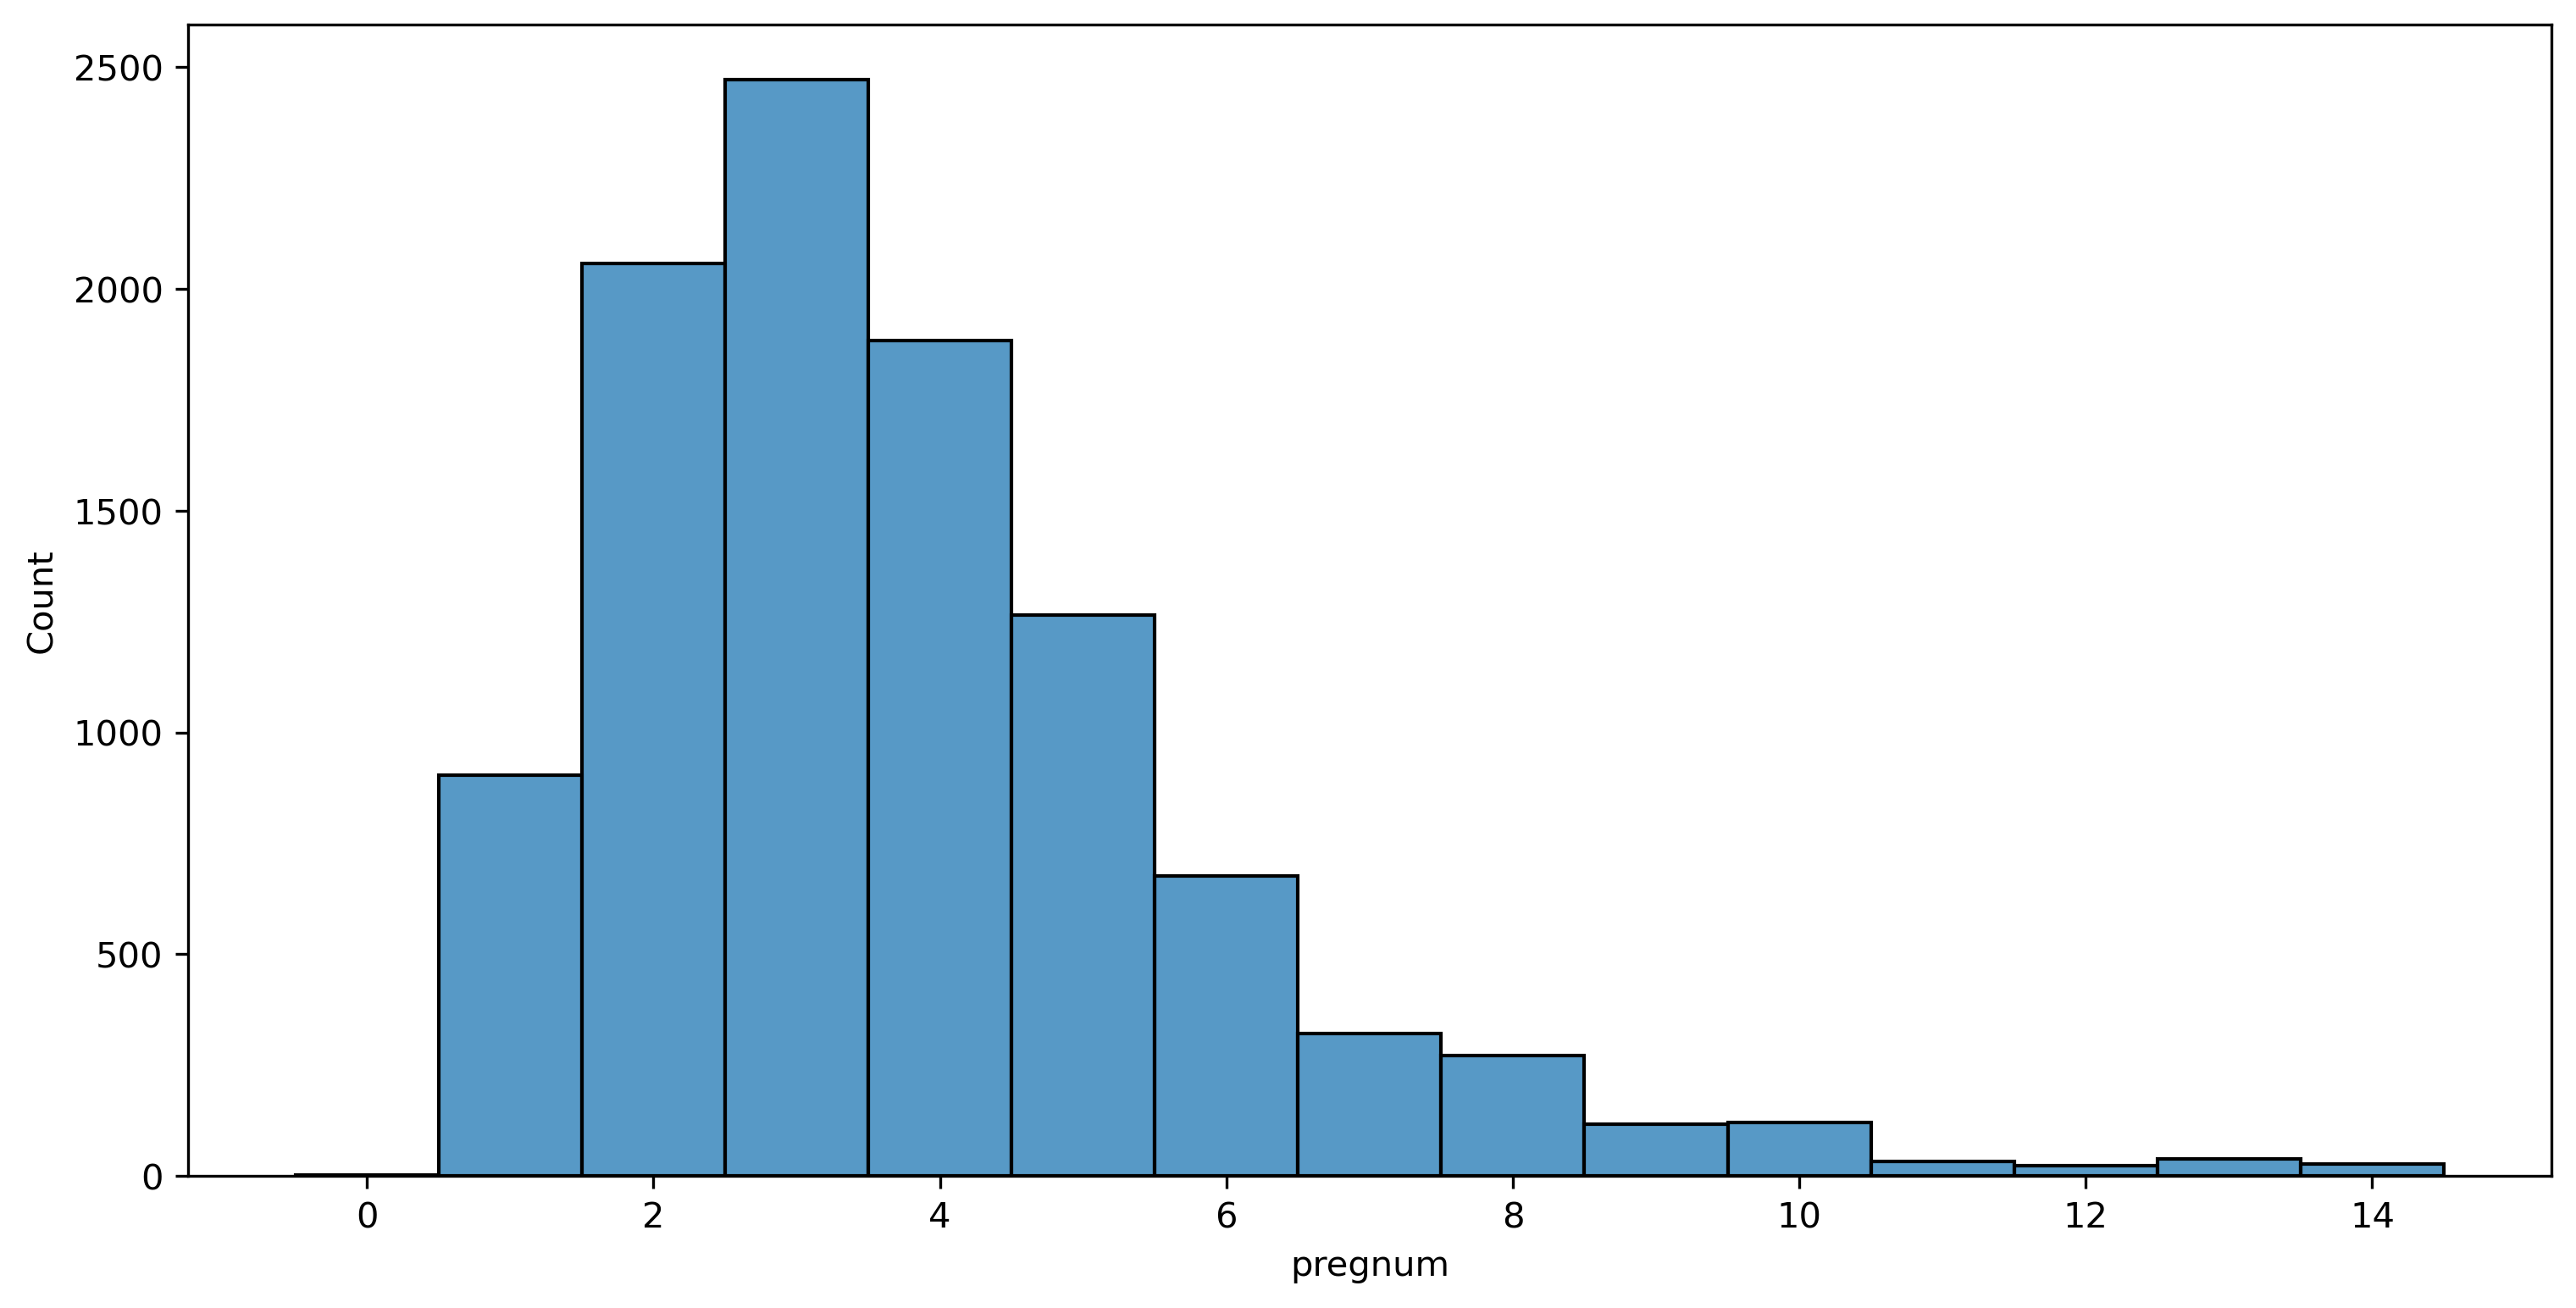

In [31]:
graphing.create_figure
graphing.hist(x=features[19], discrete=True, kde=False)
graphing.show

- ### parity
Total number of live births<br><br>
right skewed.

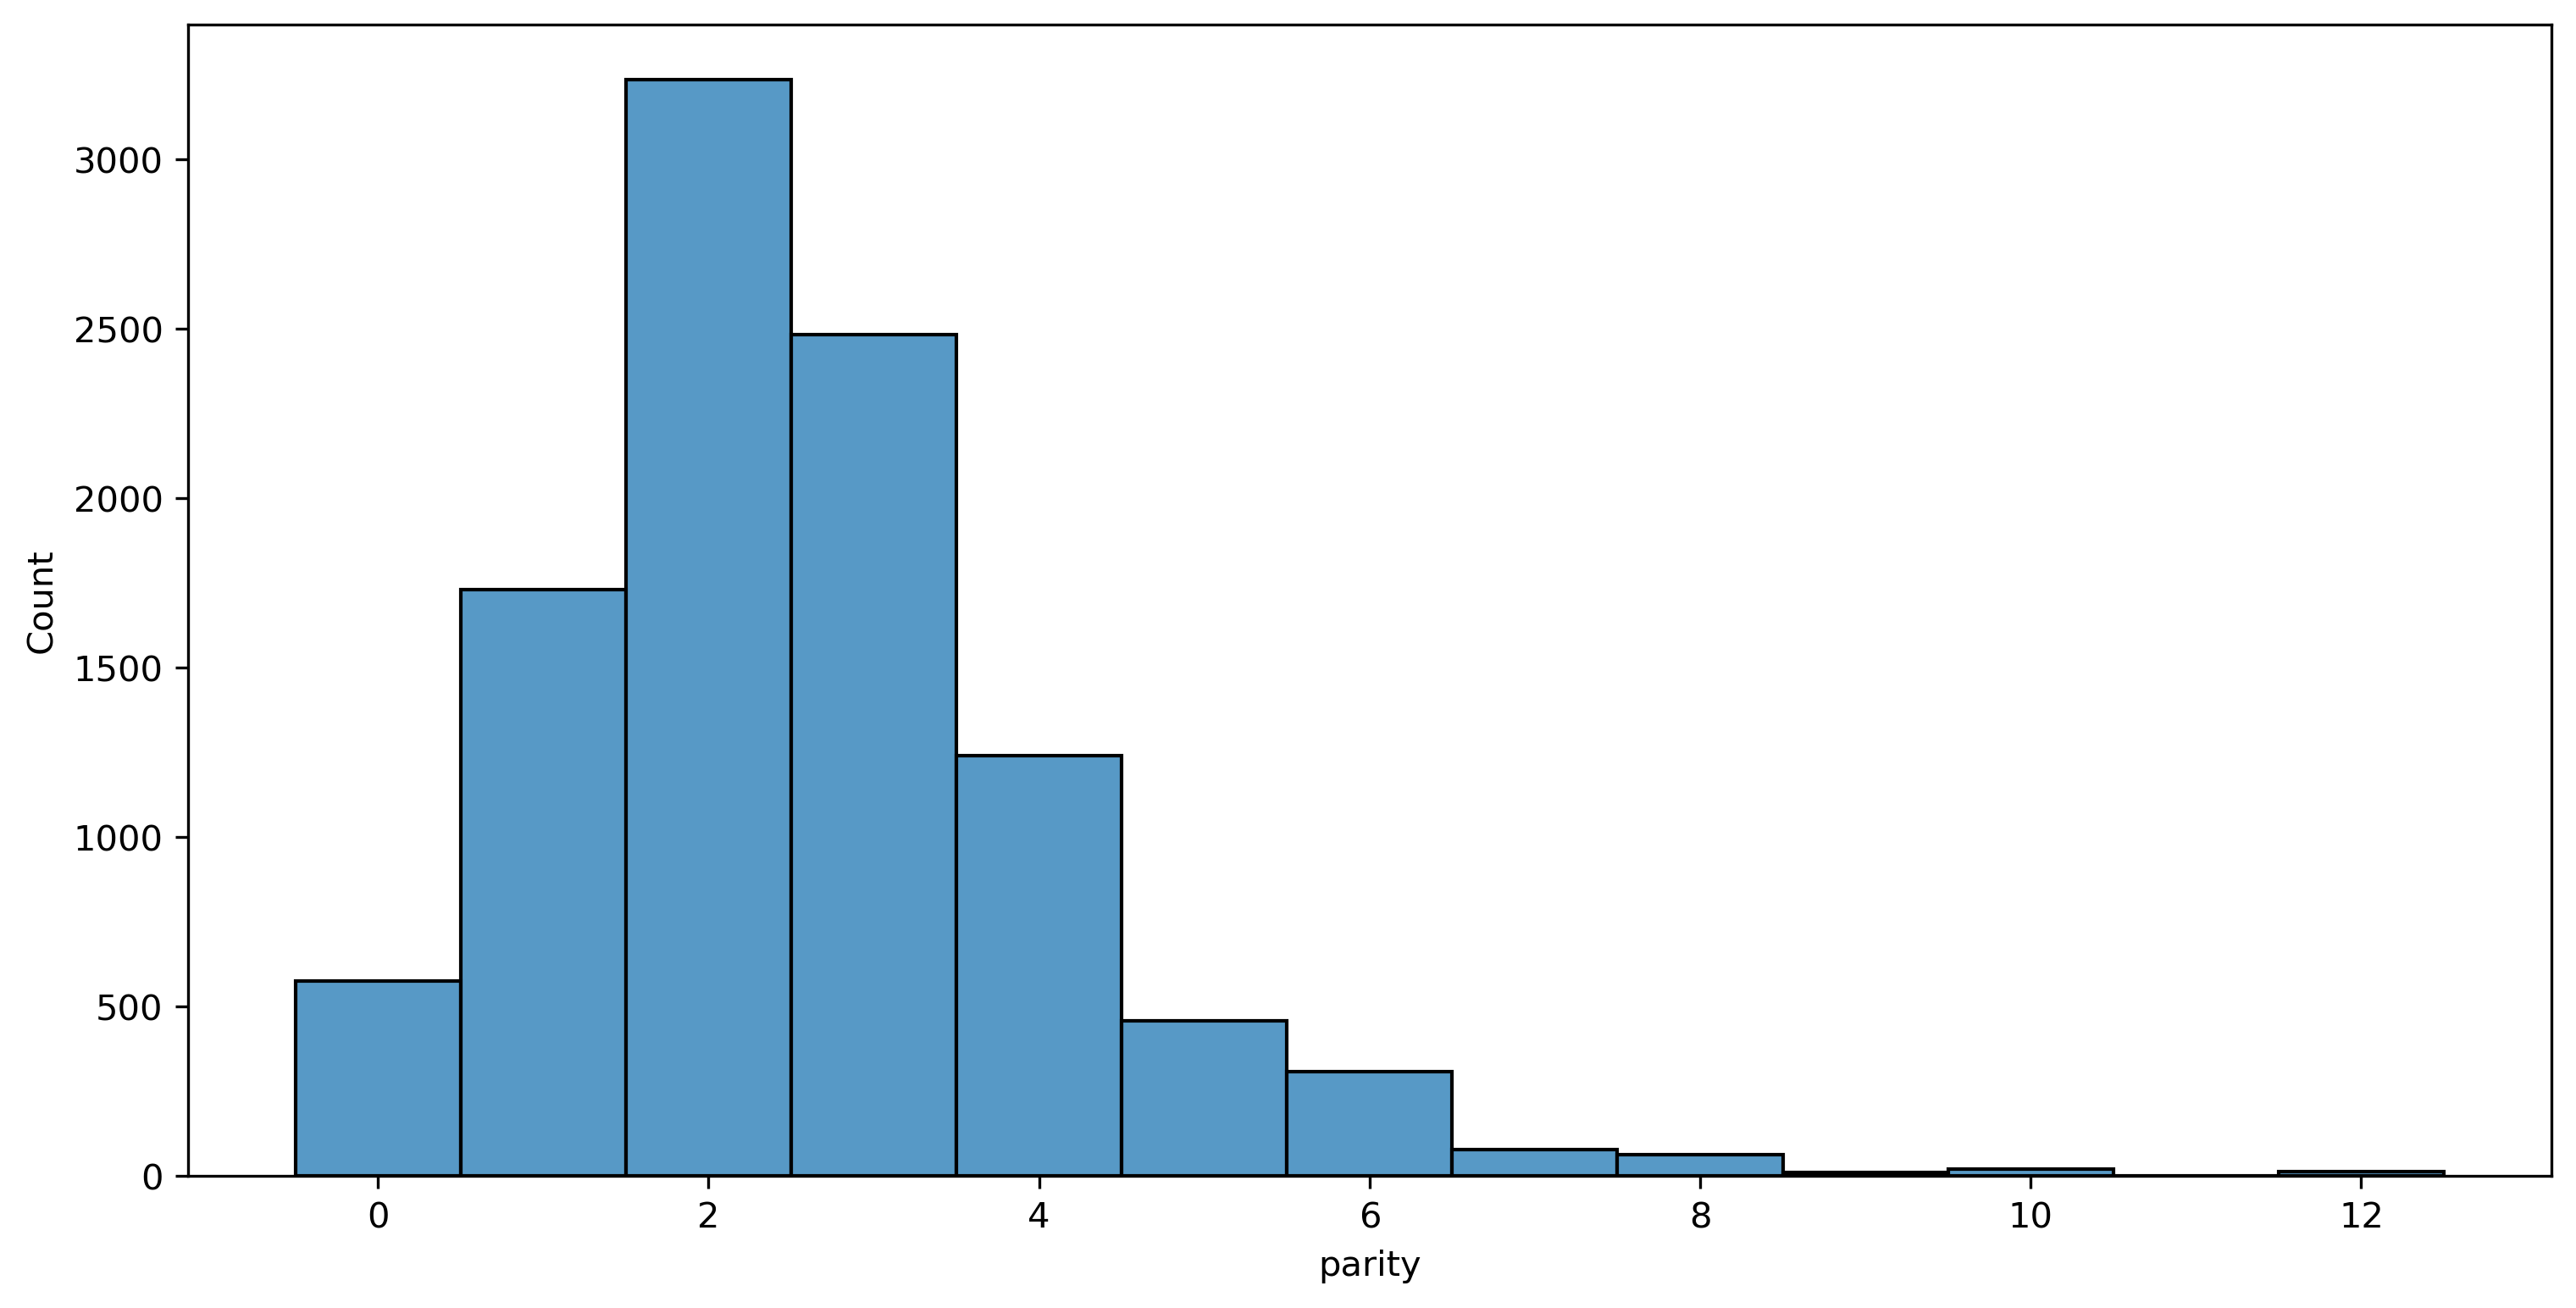

In [32]:
graphing.create_figure
graphing.hist(x=features[20], discrete=True, kde=False)
graphing.show

- ### poverty
Poverty level income<br><br>
right skewed.

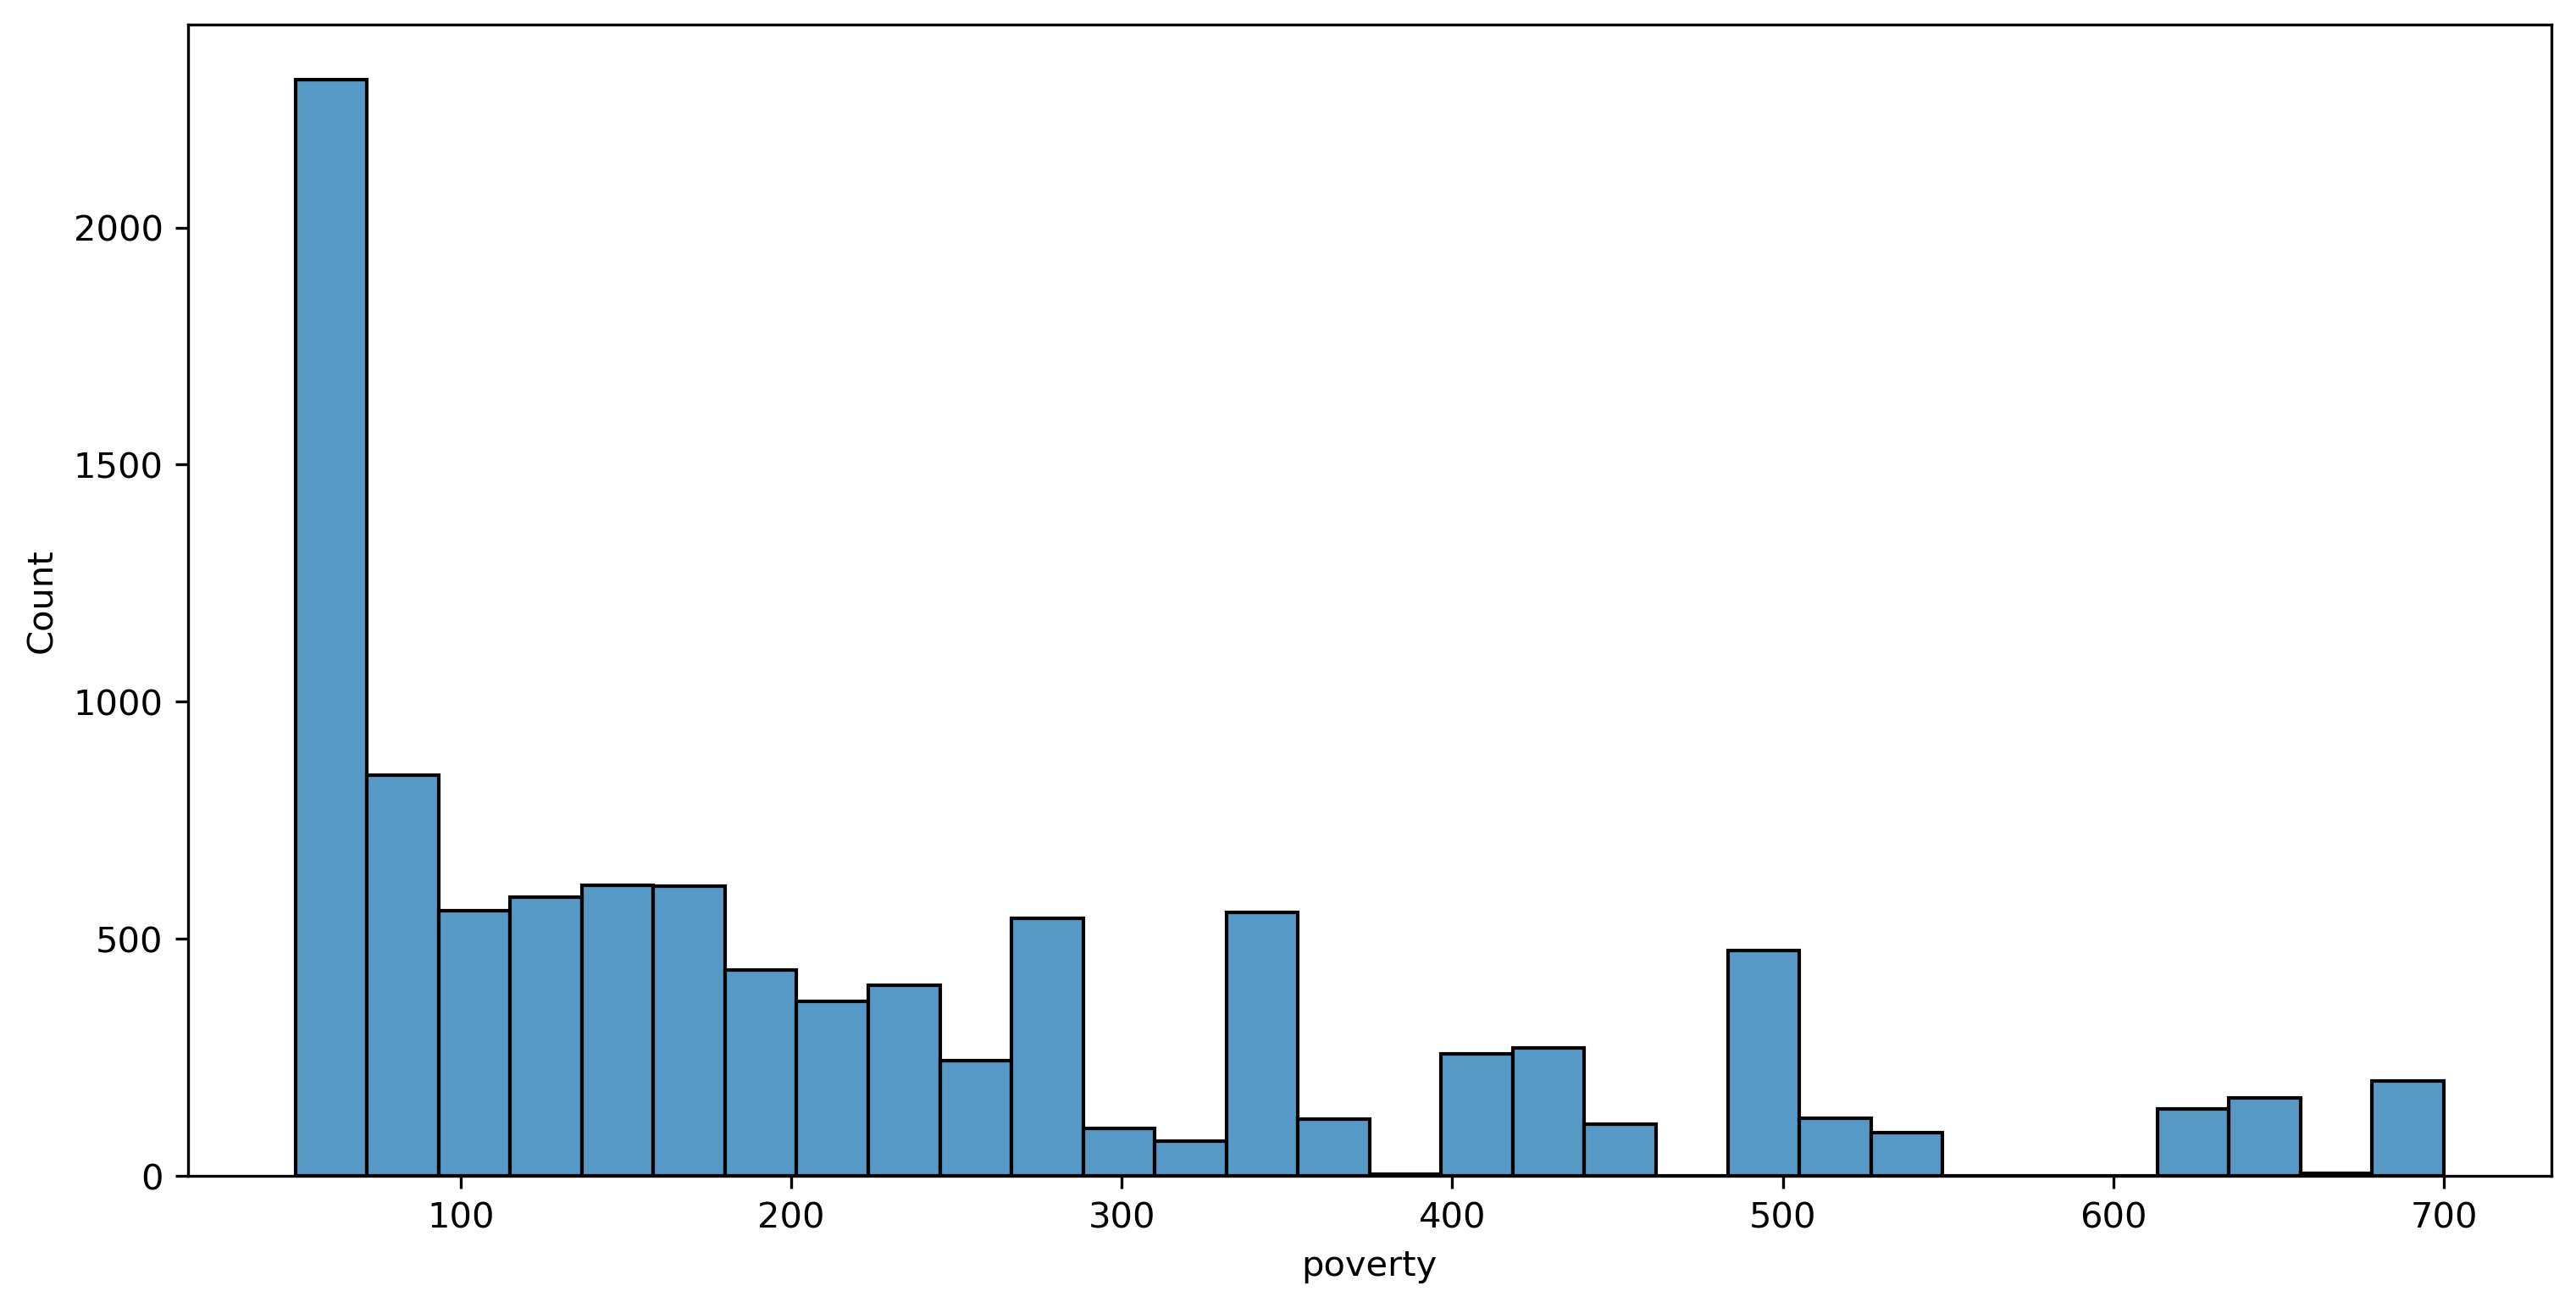

In [33]:
graphing.create_figure
graphing.hist(x=features[21], discrete=False, kde=False)
graphing.show

- ### laborfor
Labor force status

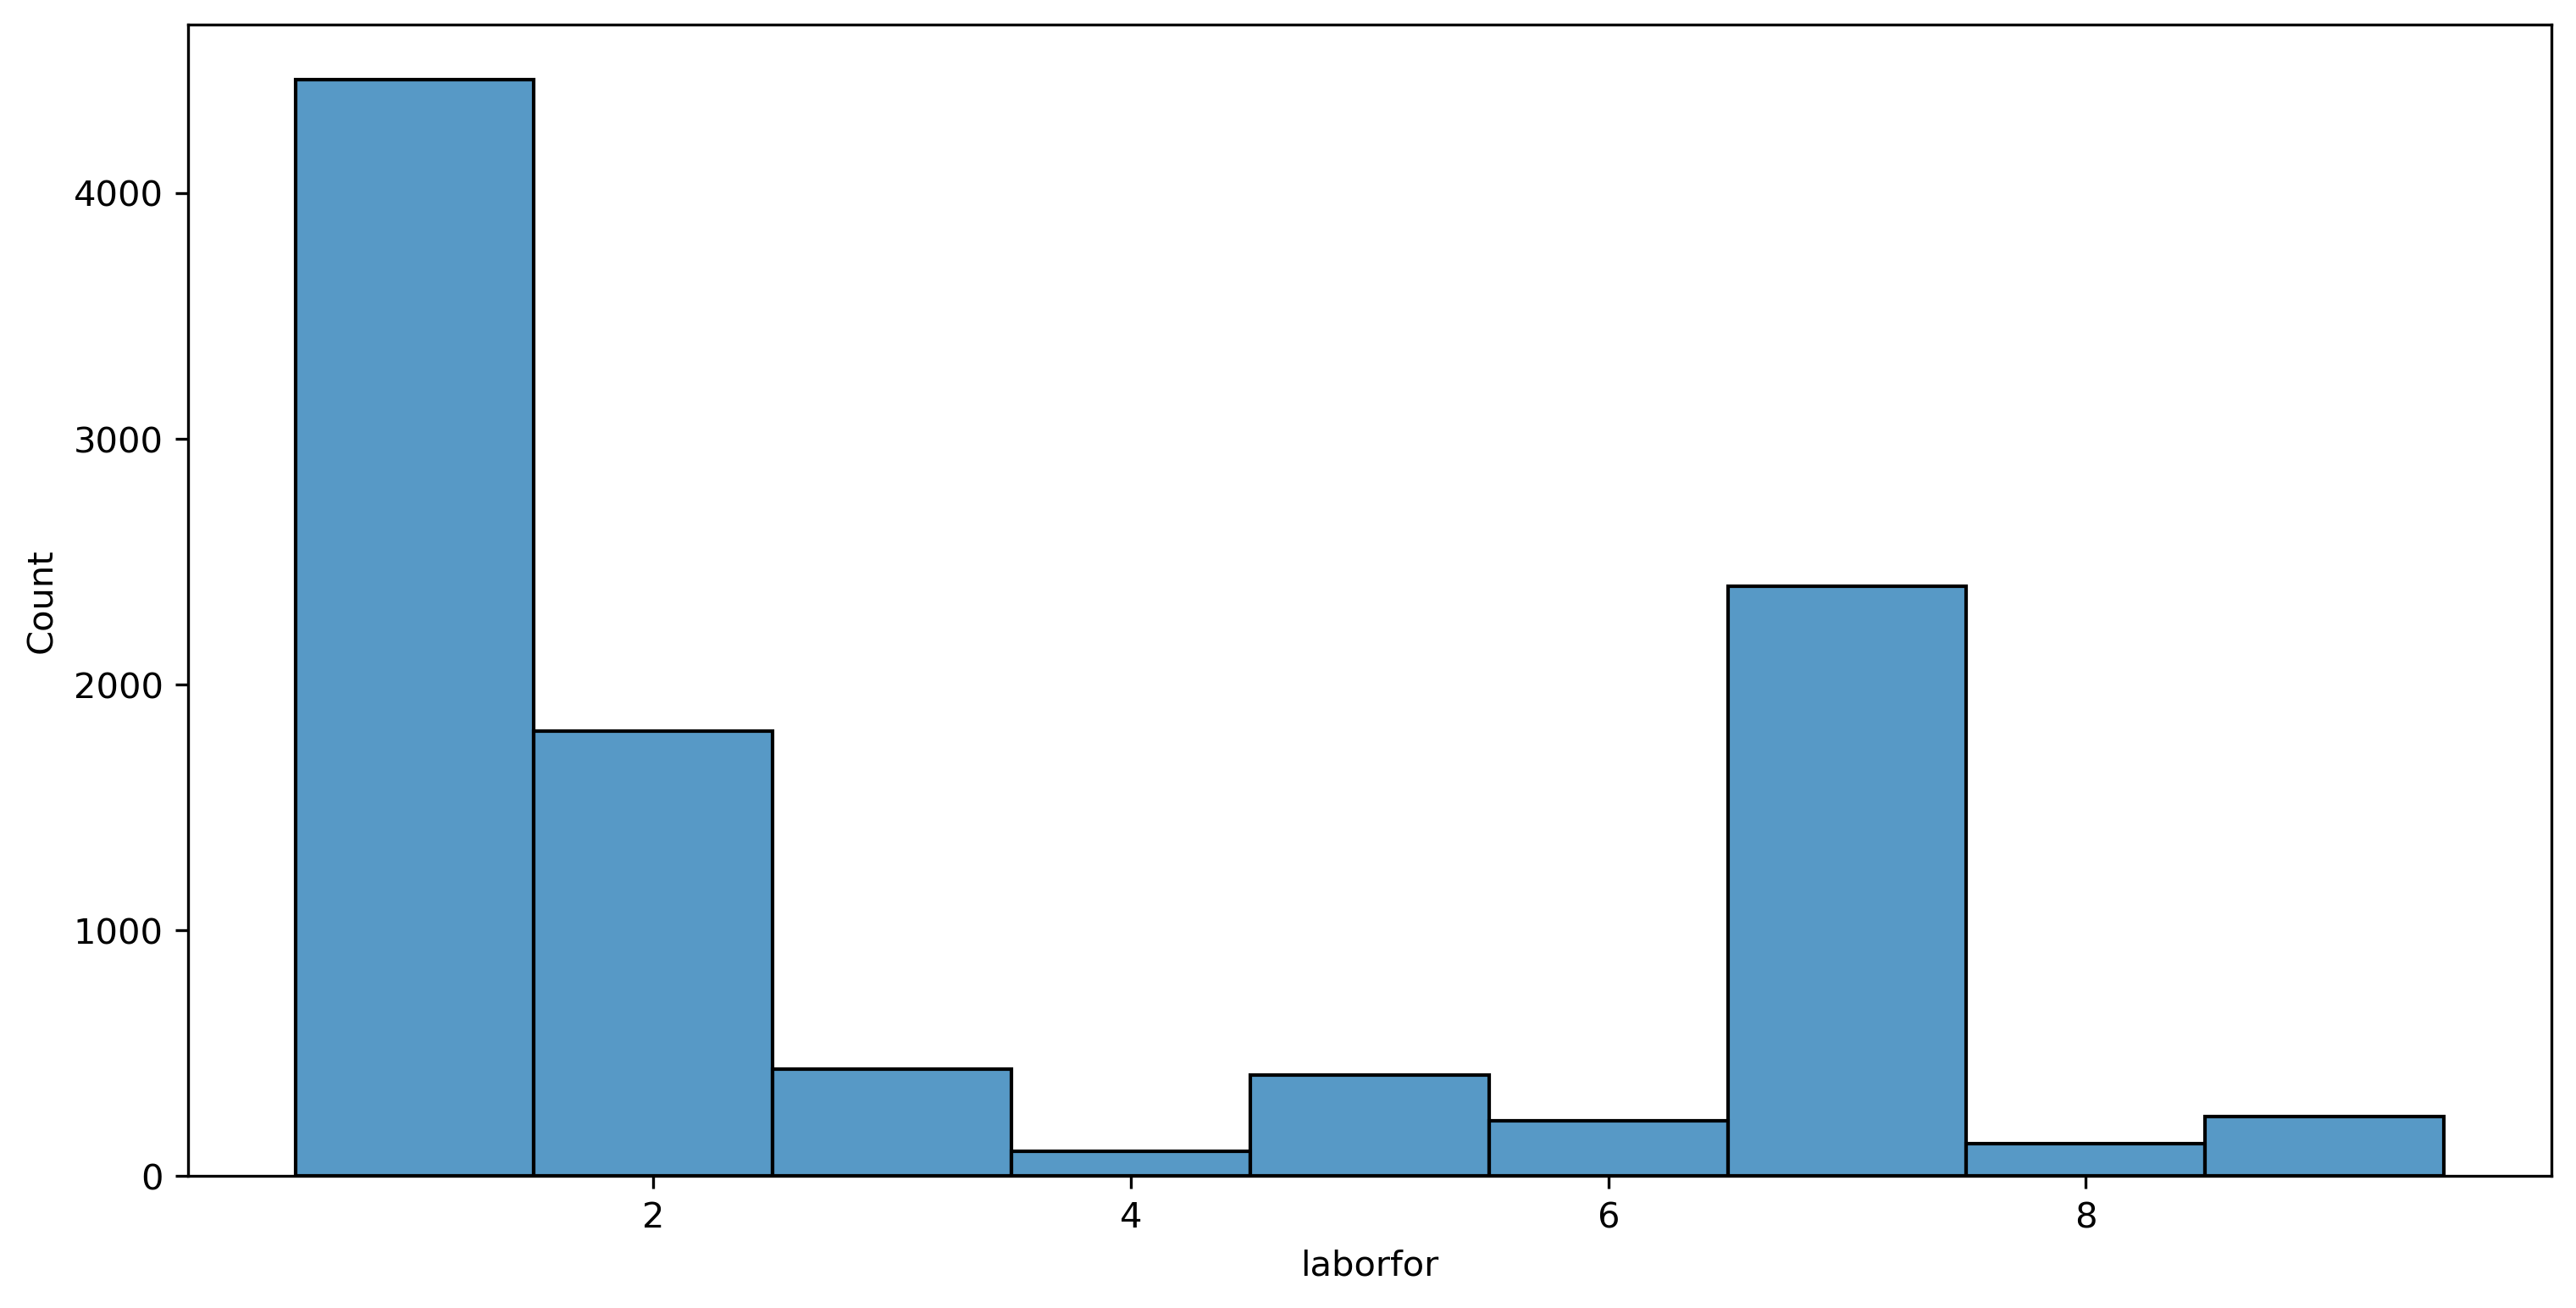

In [34]:
graphing.create_figure
graphing.hist(x=features[22], discrete=True, kde=False)
graphing.show

- ### religion
Current religious affiliation

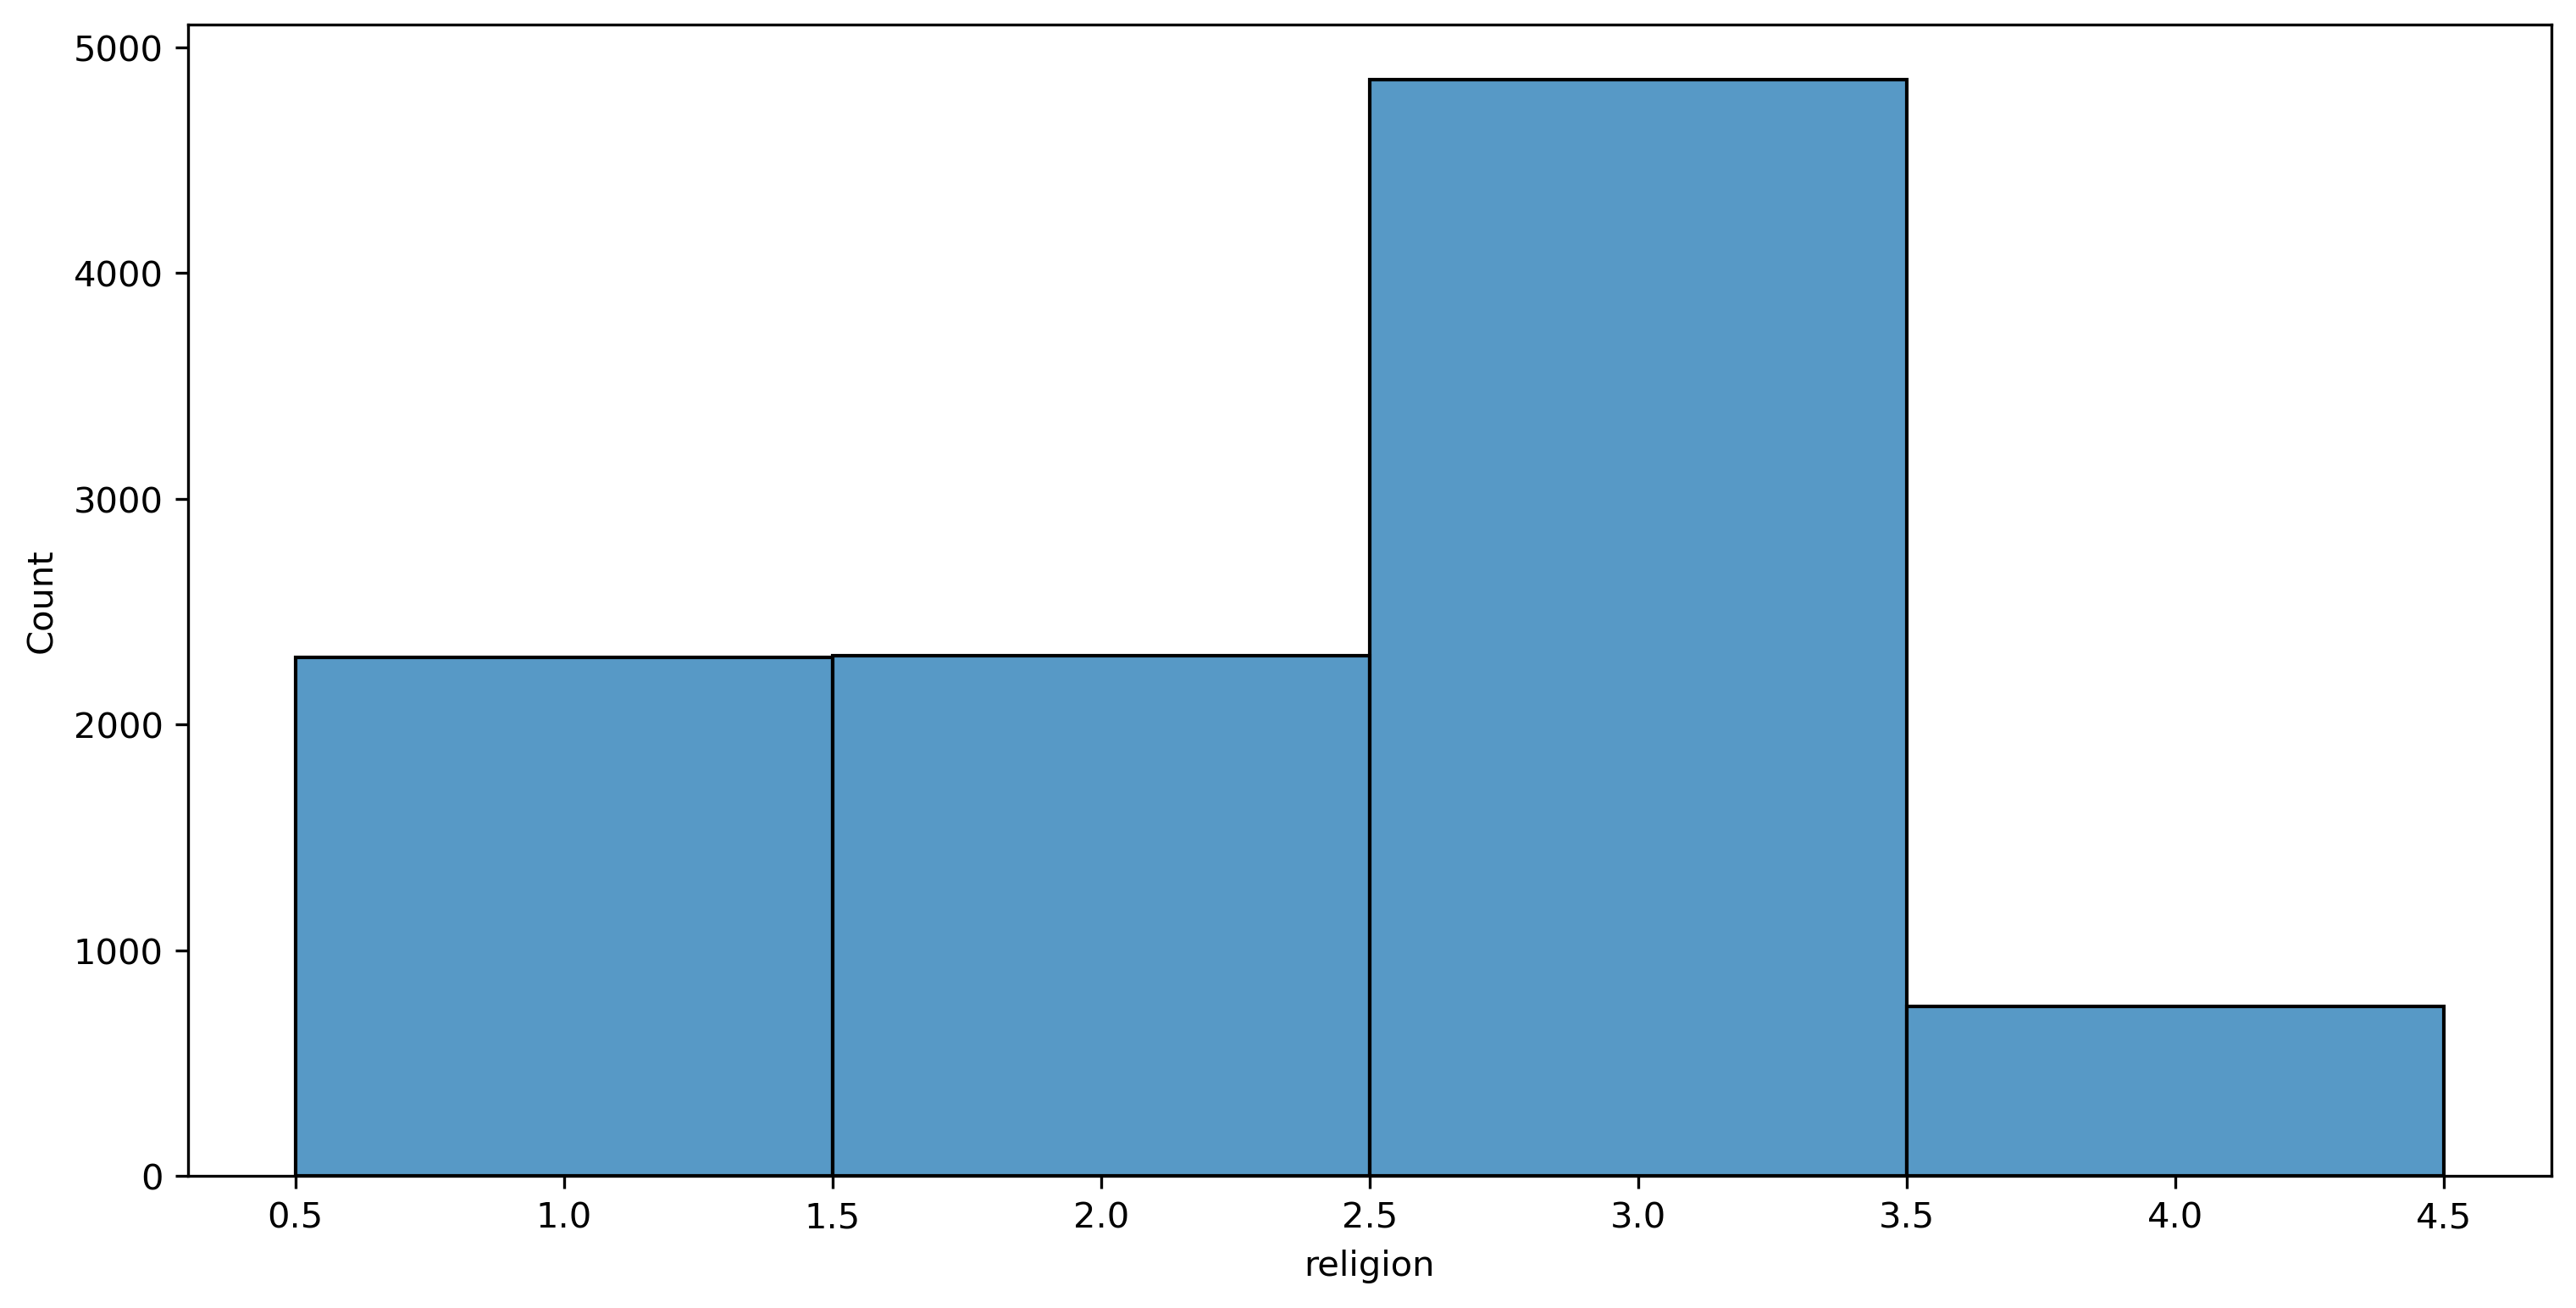

In [35]:
graphing.create_figure
graphing.hist(x=features[23], discrete=True, kde=False)
graphing.show

- ### metro
Place of residence (Metropolitan / Non-metropolitan)

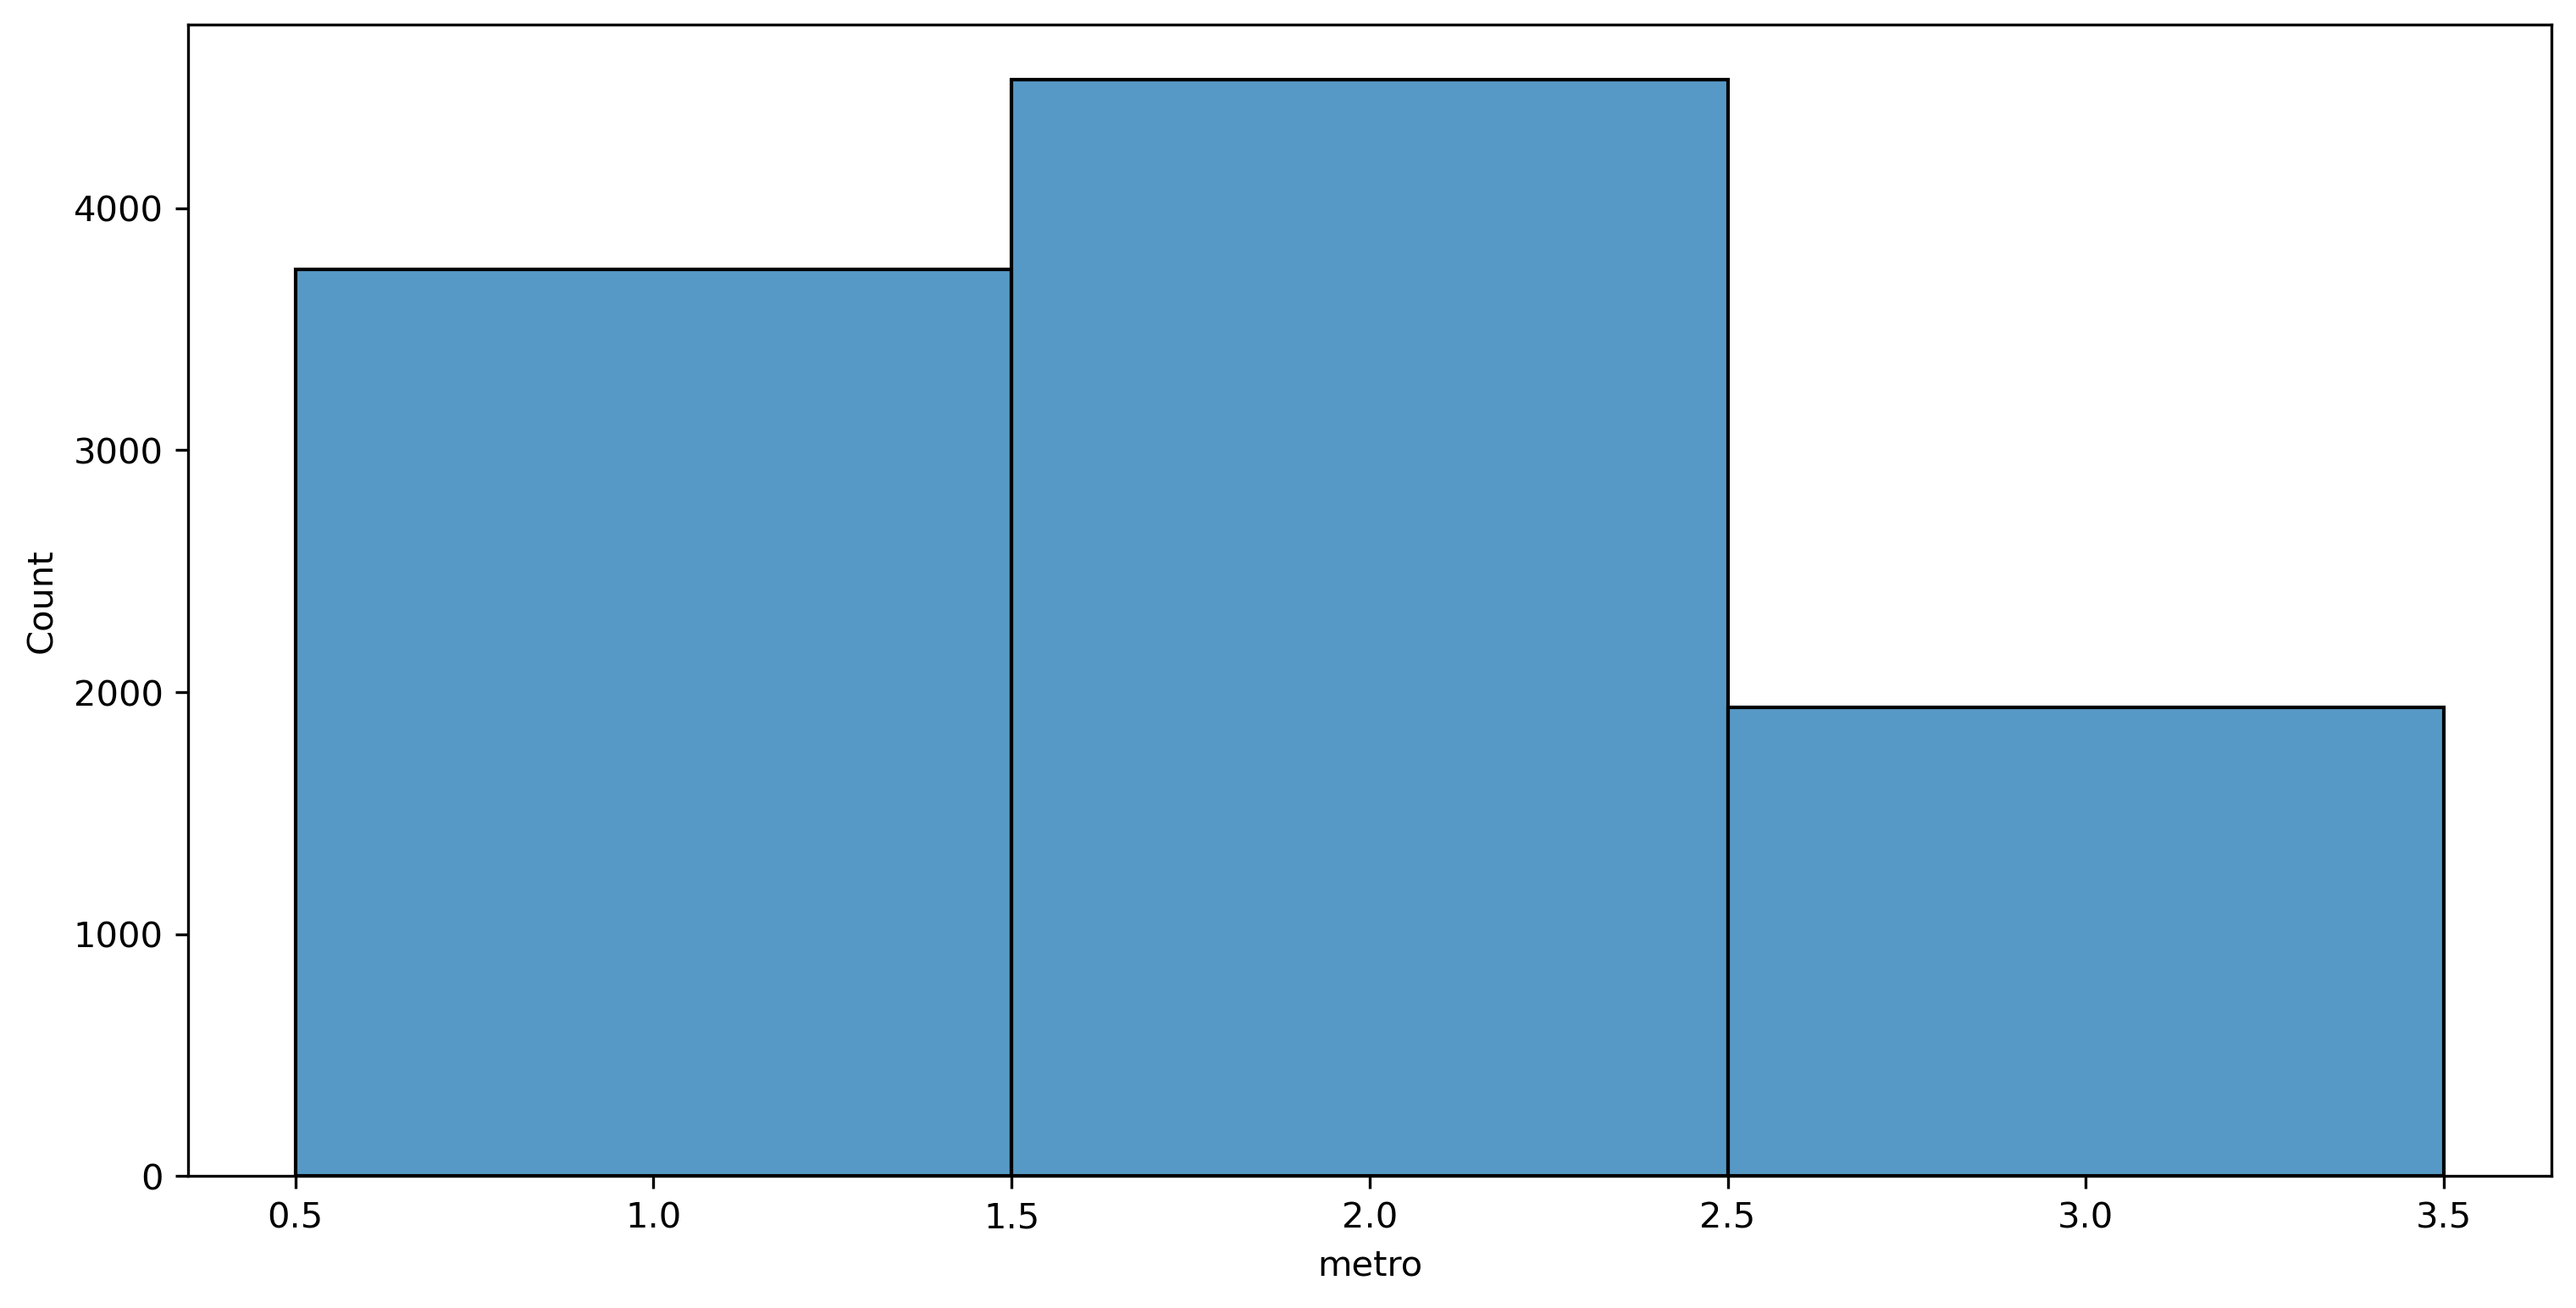

In [36]:
graphing.create_figure
graphing.hist(x=features[24], discrete=True, kde=False)
graphing.show

- ## Is first babies comes earlier than other babies

In [37]:
firstBabies = pregnancy_data[(pregnancy_data['pregordr'] == 1) & (pregnancy_data['outcome'] == 1)]
otherbabies = pregnancy_data[(pregnancy_data['pregordr'] != 1) & (pregnancy_data['outcome'] == 1)]

compare live first delivery and live other deliveries' pregnancy duration. less likely to
early preterm and preterm deliveries for fist babies and more likely to post term diliveries
than other babies(not first baby). term deliveries also less likely than other babies.<br><br>
1 **EARLY PRETERM** (< 34 WEEKS)<br> 2 **PRETERM** (34-36 WEEKS)<br> 3 **TERM** (37-40 WEEKS)<br> 4 **POST-TERM** (> 40 WEEKS)

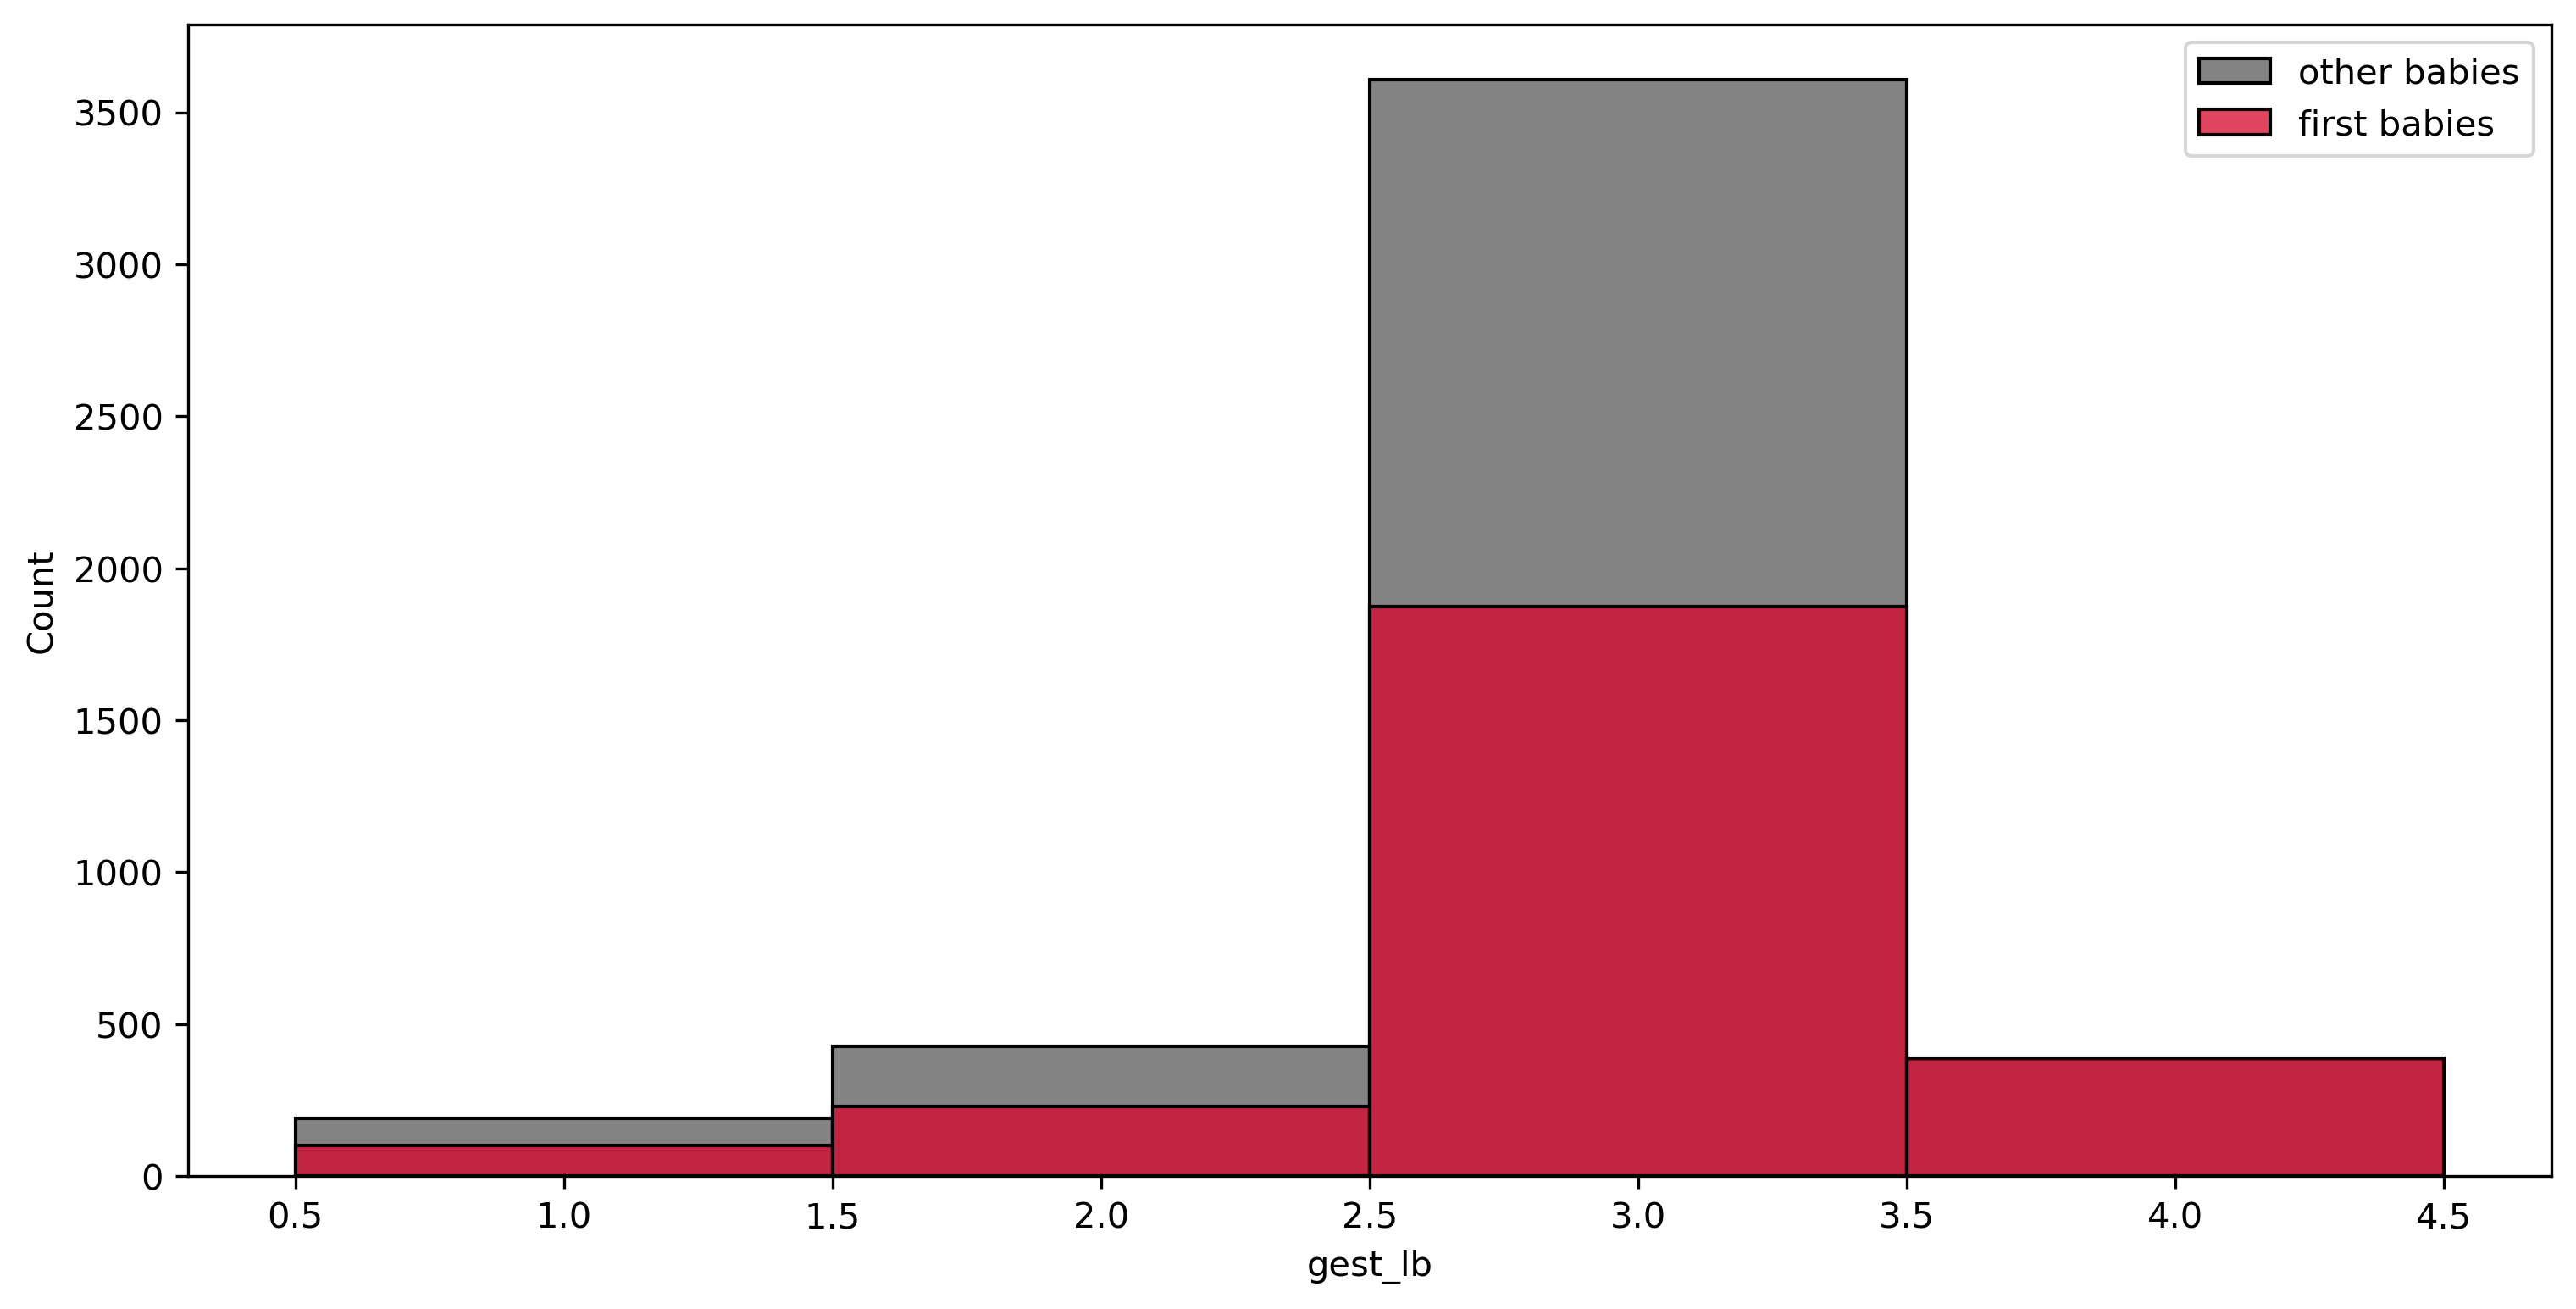

In [38]:
firstBabies_graph = DrawGraph(firstBabies, figsize=[12, 6], dpi=300)
otherBabies_graph = DrawGraph(otherbabies, figsize=[12, 6], dpi=300)

firstBabies_graph.create_figure
otherBabies_graph.hist(x='gest_lb',
                       discrete=True,
                       kde=False,
                       label='other babies',
                       color='#595959')
firstBabies_graph.hist(x='gest_lb',
                       discrete=True,
                       kde=False,
                       label='first babies',
                       color='#D9042B')
plt.legend()
otherBabies_graph.show

- PMF (probability mass function)<br>
compare probability of each pregnancy lenght of first babies and other babies.

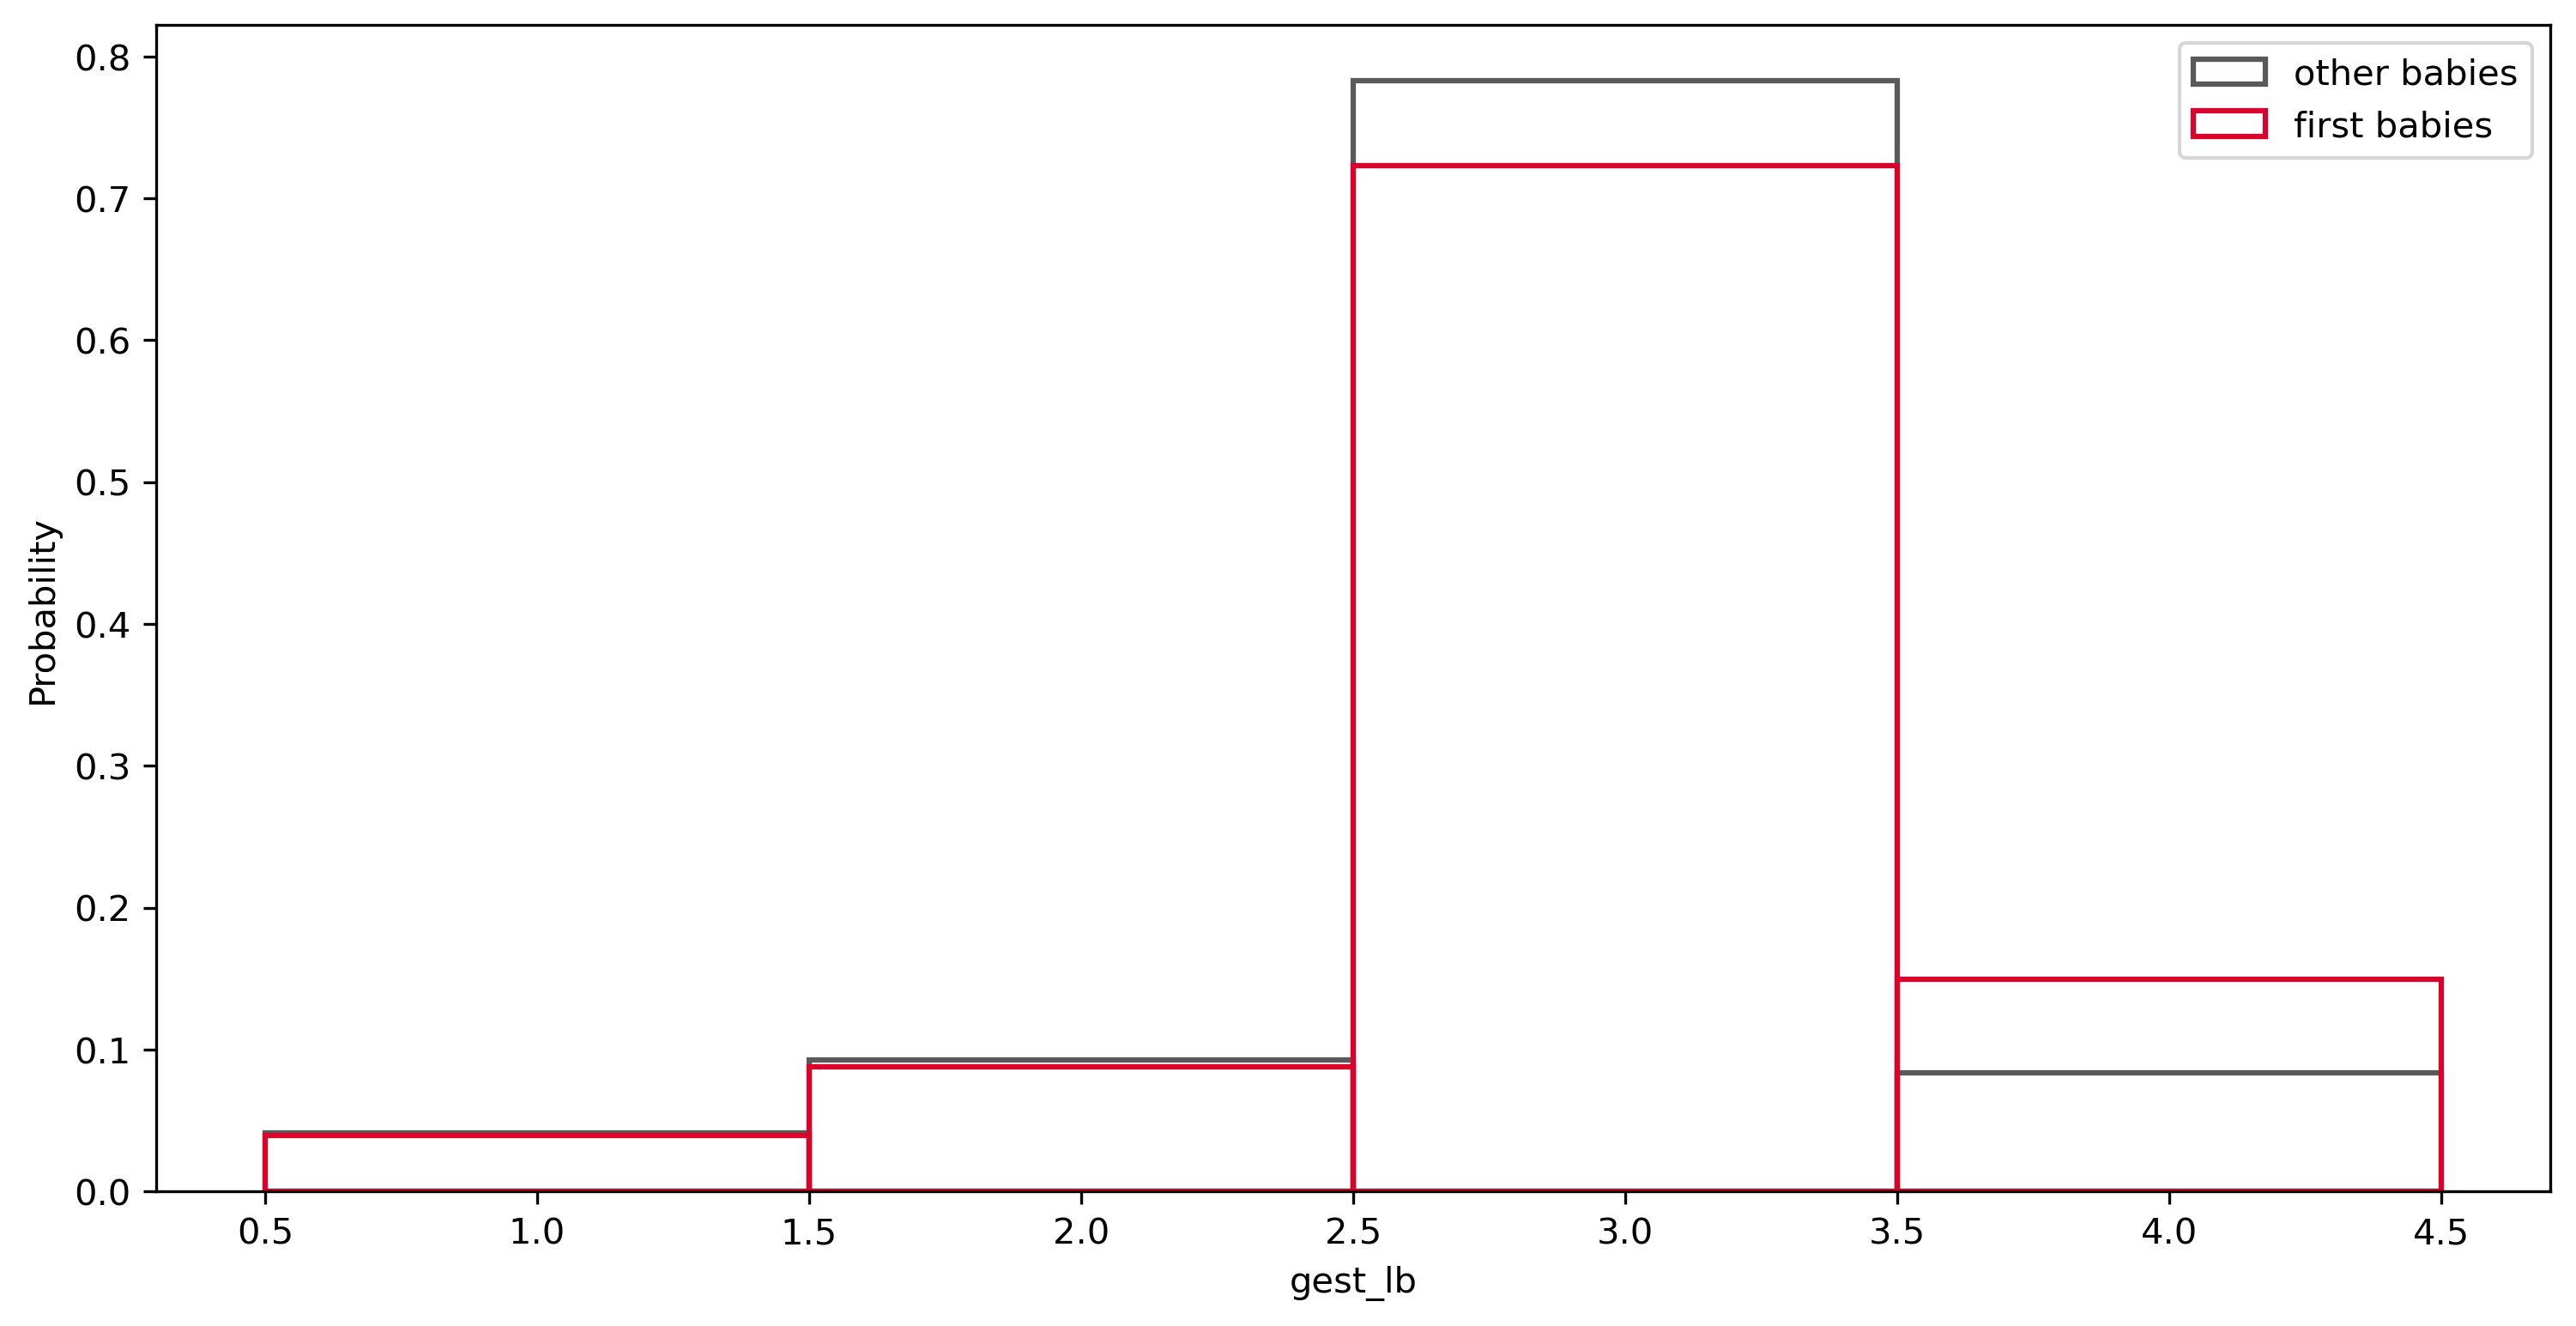

In [39]:
firstBabies_graph.create_figure
otherBabies_graph.hist(x='gest_lb',
                       discrete=True,
                       stat='probability',
                       element='bars',
                       fill=False,
                       kde=False,
                       label='other babies',
                       color='#595959')
firstBabies_graph.hist(x='gest_lb',
                       discrete=True,
                       stat='probability',
                       element='bars',
                       fill=False,
                       kde=False,
                       label='first babies',
                       color='#D9042B')
plt.legend()
otherBabies_graph.show

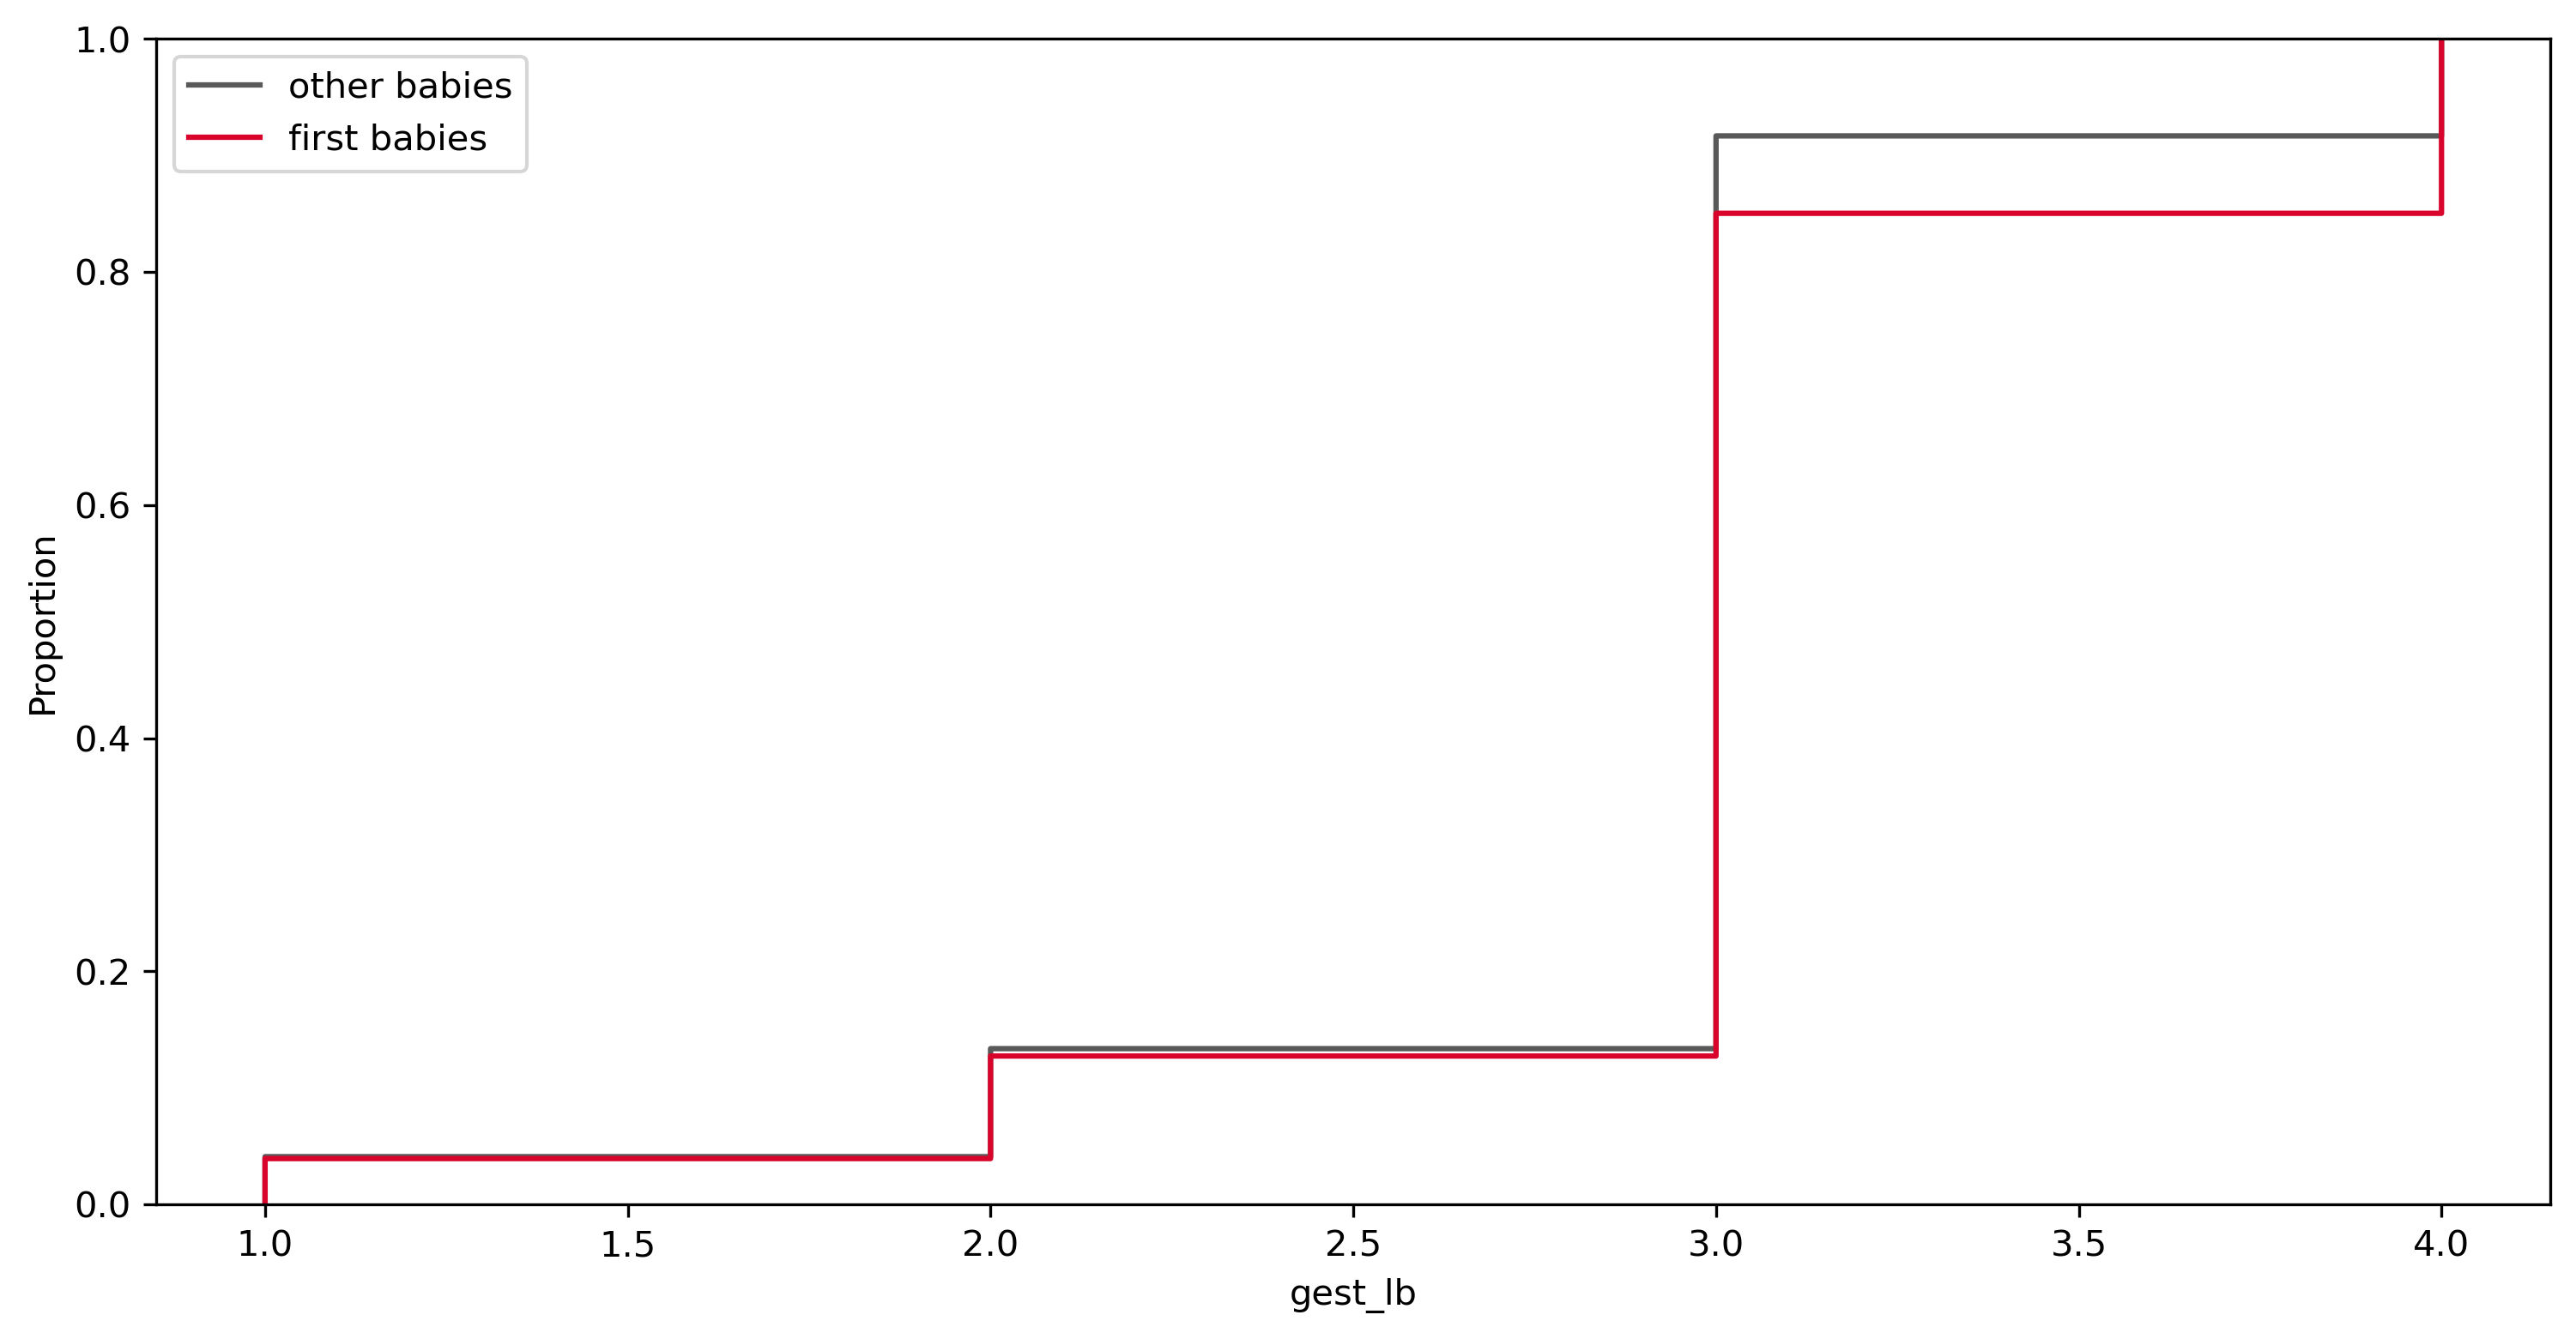

In [40]:
firstBabies_graph.create_figure
otherBabies_graph.cdf(x='gest_lb',
                      label='other babies',
                      color='#595959')
firstBabies_graph.cdf(x='gest_lb',
                      label='first babies',
                      color='#D9042B')
plt.legend()
otherBabies_graph.show

- summery statistics<br>

In [41]:
liveBirth = pregnancy_data[pregnancy_data['outcome'] == 1]

In [42]:
liveBirth_summery = SummeryStat(liveBirth, 'gest_lb')
firstBabies_summery = SummeryStat(firstBabies, 'gest_lb')
otherbabies_summery = SummeryStat(otherbabies, 'gest_lb')

In [43]:
print(f' Mean: {liveBirth_summery.mean()}\r\n',
      f'Median: {liveBirth_summery.median()}\r\n',
      f'Variance: {liveBirth_summery.variance()}\r\n',
      f'StD: {liveBirth_summery.standard_deviation()}')

 Mean: 2.9354076955132657
 Median: 3.0
 Variance: 0.35573893296481013
 StD: 0.5964385408110463


In [44]:
print(f' Mean: {firstBabies_summery.mean()}\r\n',
      f'Median: {firstBabies_summery.median()}\r\n',
      f'Variance: {firstBabies_summery.variance()}\r\n',
      f'StD: {firstBabies_summery.standard_deviation()}')

 Mean: 2.983018139714396
 Median: 3.0
 Variance: 0.39492581943166094
 StD: 0.628431236836347


In [45]:
print(f' Mean: {otherbabies_summery.mean()}\r\n',
      f'Median: {otherbabies_summery.median()}\r\n',
      f'Variance: {otherbabies_summery.variance()}\r\n',
      f'StD: {otherbabies_summery.standard_deviation()}')

 Mean: 2.9086371527777777
 Median: 3.0
 Variance: 0.3317135940363378
 StD: 0.5759458256089177


consider effect size which describe the strength of the relationship between two groups. use d' family
method to calculate difference between two groups wich are first babies and others. **very small** effect size.
no need to consider that.

In [46]:
def cohen_effect_size(a, b):
    diff = np.mean(a) - np.mean(b)
    var_a = np.var(a)
    var_b = np.var(b)
    n_a, n_b = len(a), len(b)
    pooled_var = (n_a * var_a + n_b * var_b) / (n_a + n_b)

    return diff / np.sqrt(pooled_var)

In [47]:
cohen_effect_size(firstBabies['gest_lb'], otherbabies['gest_lb'])

0.12493256008089679

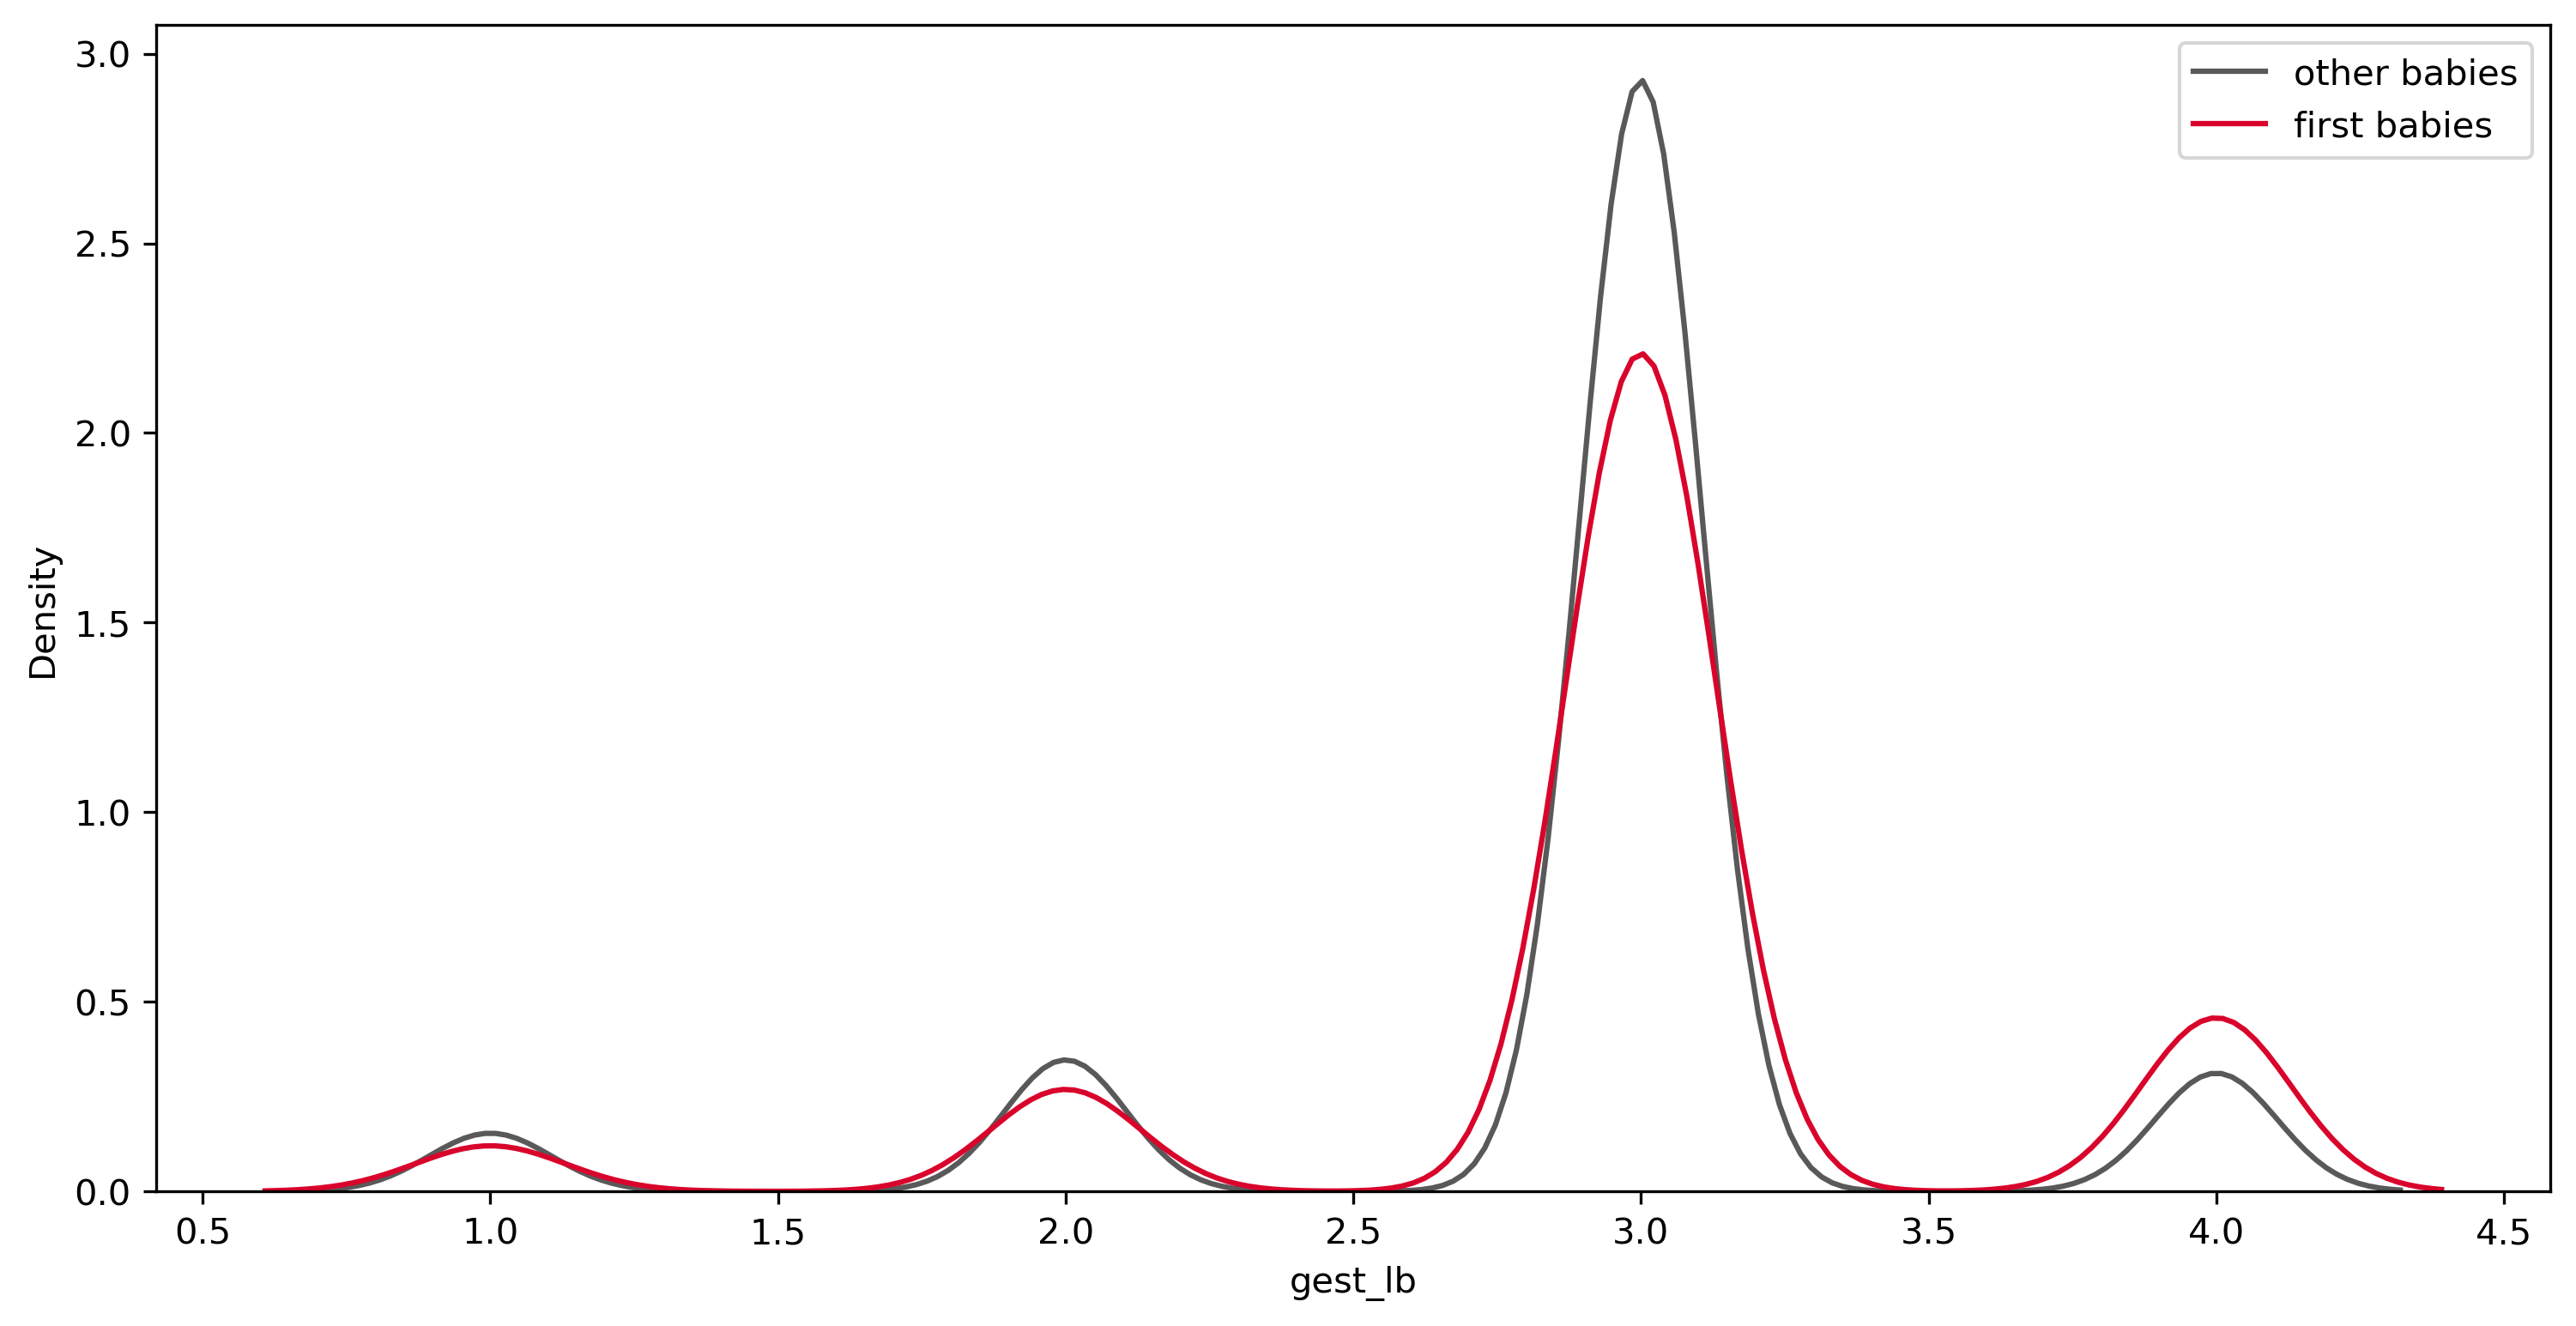

In [48]:
firstBabies_graph.create_figure
otherBabies_graph.kde(x='gest_lb',
                      label='other babies',
                      color='#595959')
firstBabies_graph.kde(x='gest_lb',
                      label='first babies',
                      color='#D9042B')
plt.legend()
otherBabies_graph.show

## Is first babies comes letter for same mother

most likely in all responds for same mother also have high porbability of in-term delivery.
other than all mothers responds same mother has high probability on early delivery
length in first baby. as in all mothers same mother also have low probability to in-term
delivery on first baby other than other babies.

In [49]:
live_outcomes = pregnancy_data[pregnancy_data['outcome'] == 1]['caseid'].value_counts()
p_copy = pregnancy_data.copy()
p_copy = p_copy.set_index('caseid')
p_copy = p_copy.loc[live_outcomes.index[live_outcomes.values > 2]]
p_copy.reset_index(inplace=True)

In [50]:
preg_len = get_preg_lengths(p_copy, 'caseid')
preg_len

,firstBabies,others
82125,3.0,3.0
86184,3.0,3.0
82707,3.0,3.0
88080,3.0,3.0
81763,3.0,3.0
...,...,...
85721,3.0,3.0
88014,3.0,3.0
87550,2.0,3.0
89395,3.0,4.0


In [51]:
preg_len_same_mom = DrawGraph(preg_len, figsize=[12, 6], dpi=300)
preg_len_same_mom_summery = SummeryStat(preg_len, ['firstBabies', 'others'])

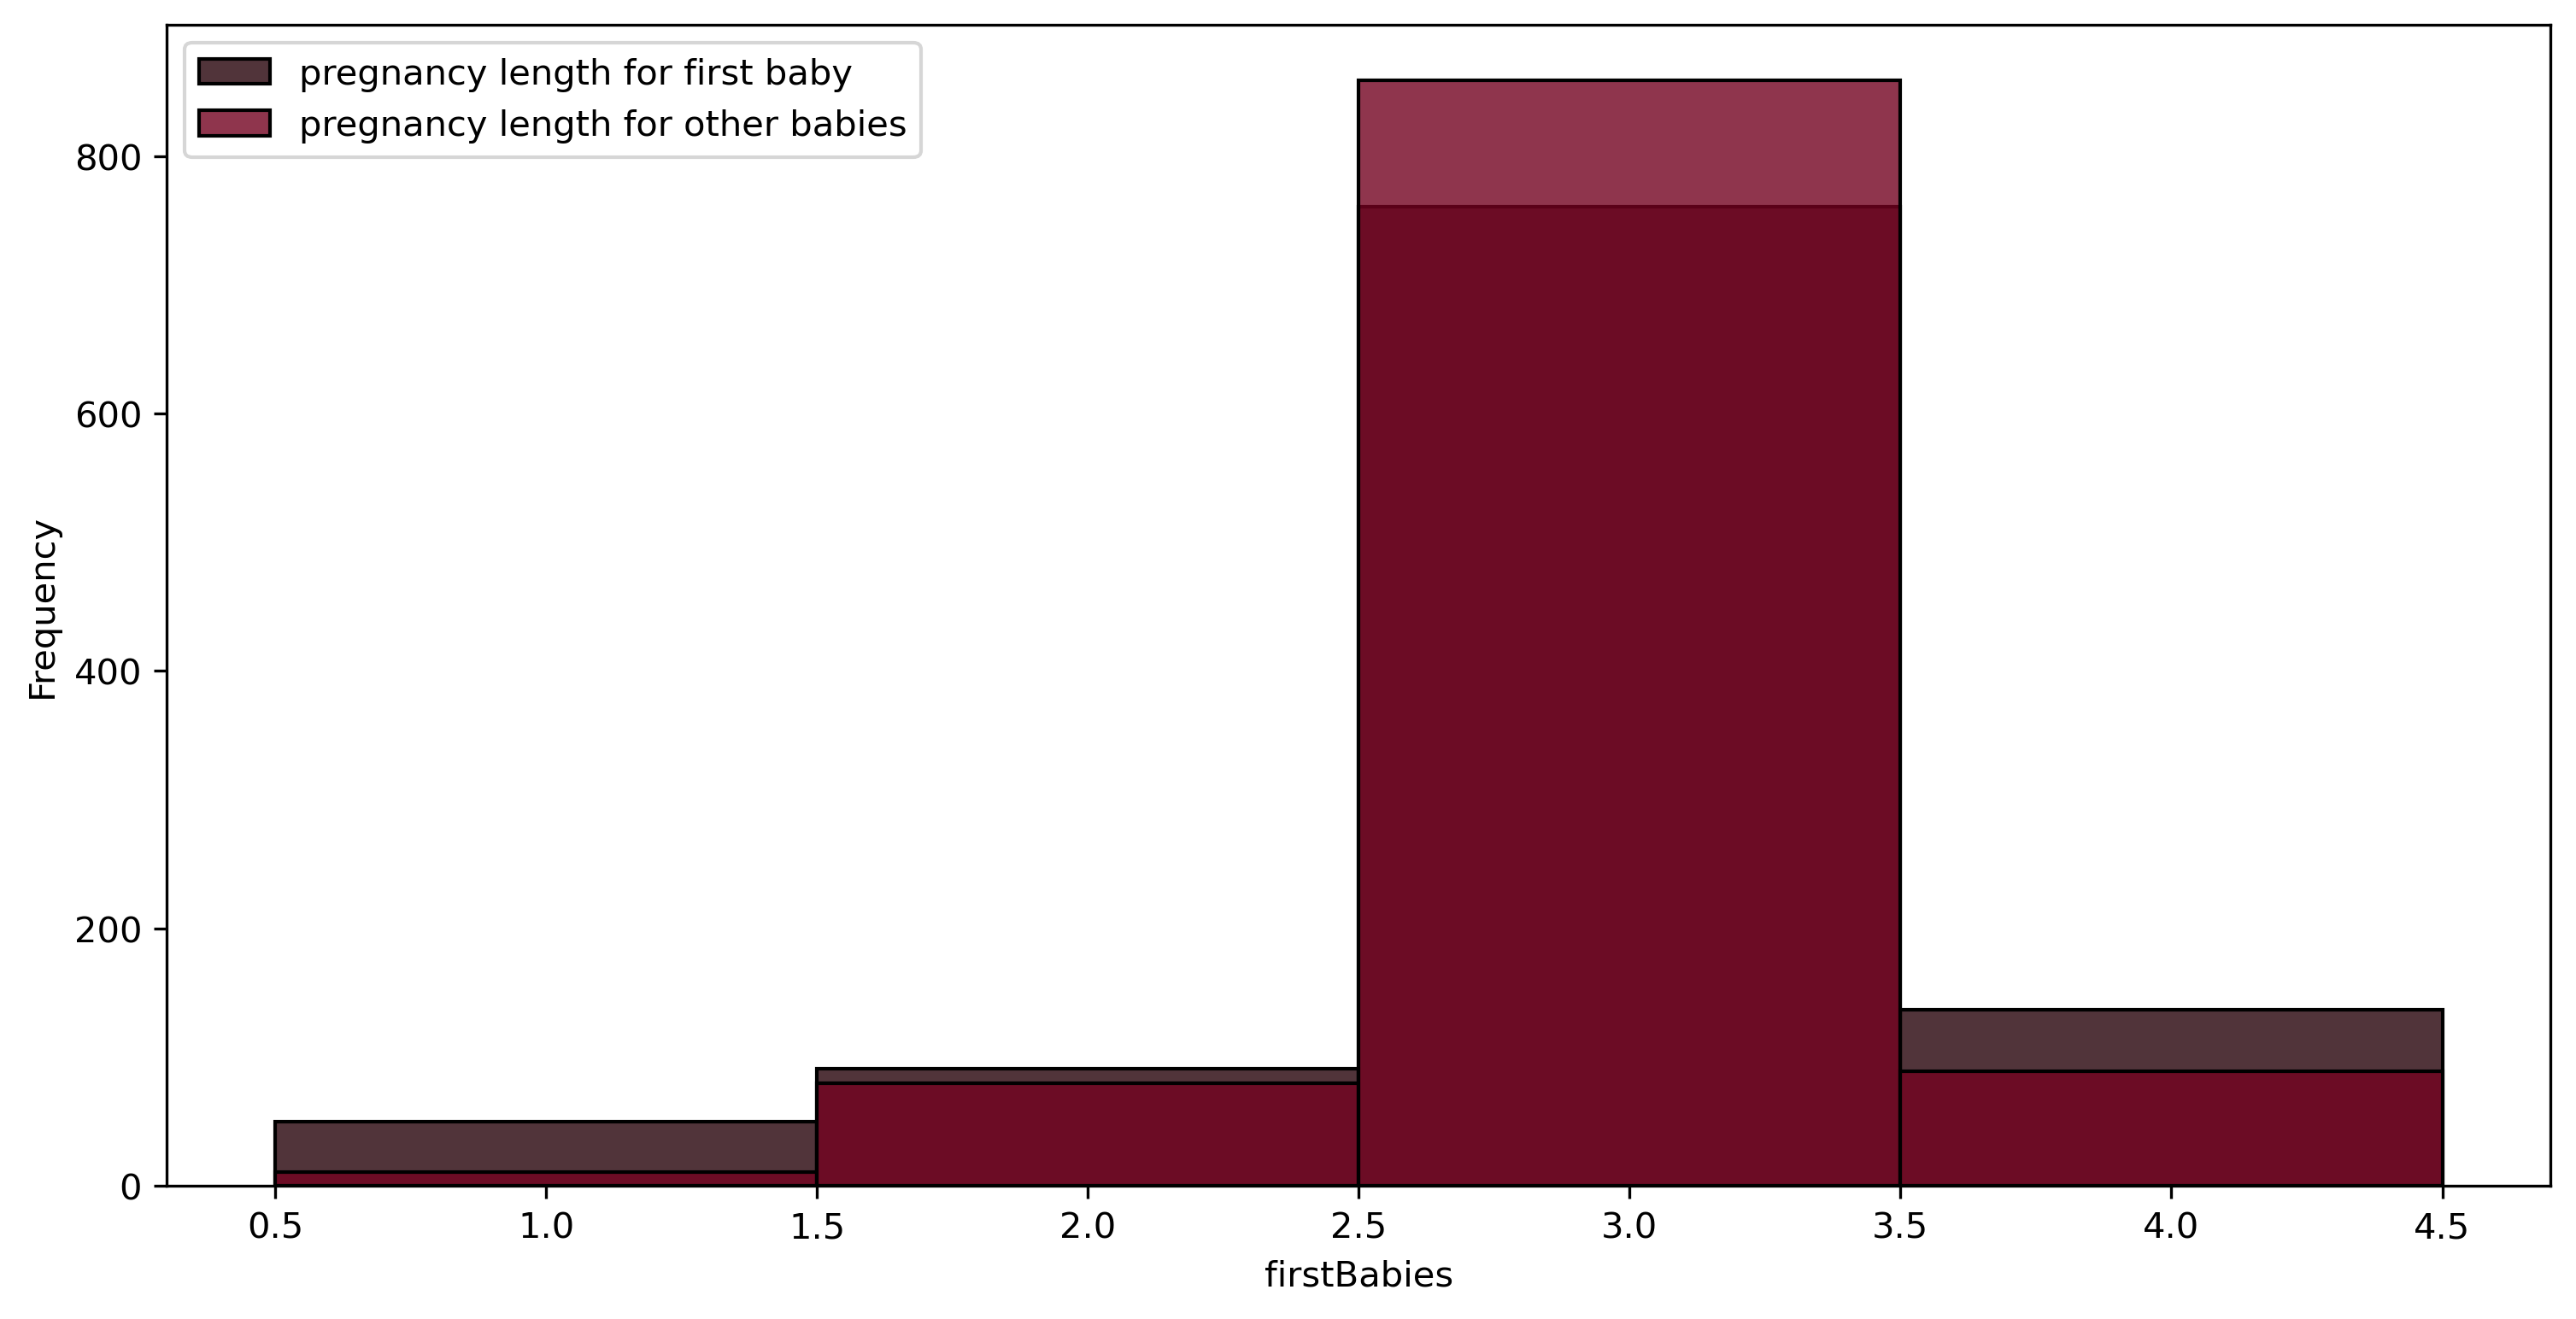

In [52]:
graphing.create_figure
preg_len_same_mom.hist(x='firstBabies',
                       stat='frequency',
                       color='#260108',
                       discrete=True,
                       alpha=0.8,
                       label="pregnancy length for first baby")
preg_len_same_mom.hist(x='others',
                       stat='frequency',
                       color='#730220',
                       discrete=True,
                       alpha=0.8,
                       label="pregnancy length for other babies")
plt.legend()
graphing.show

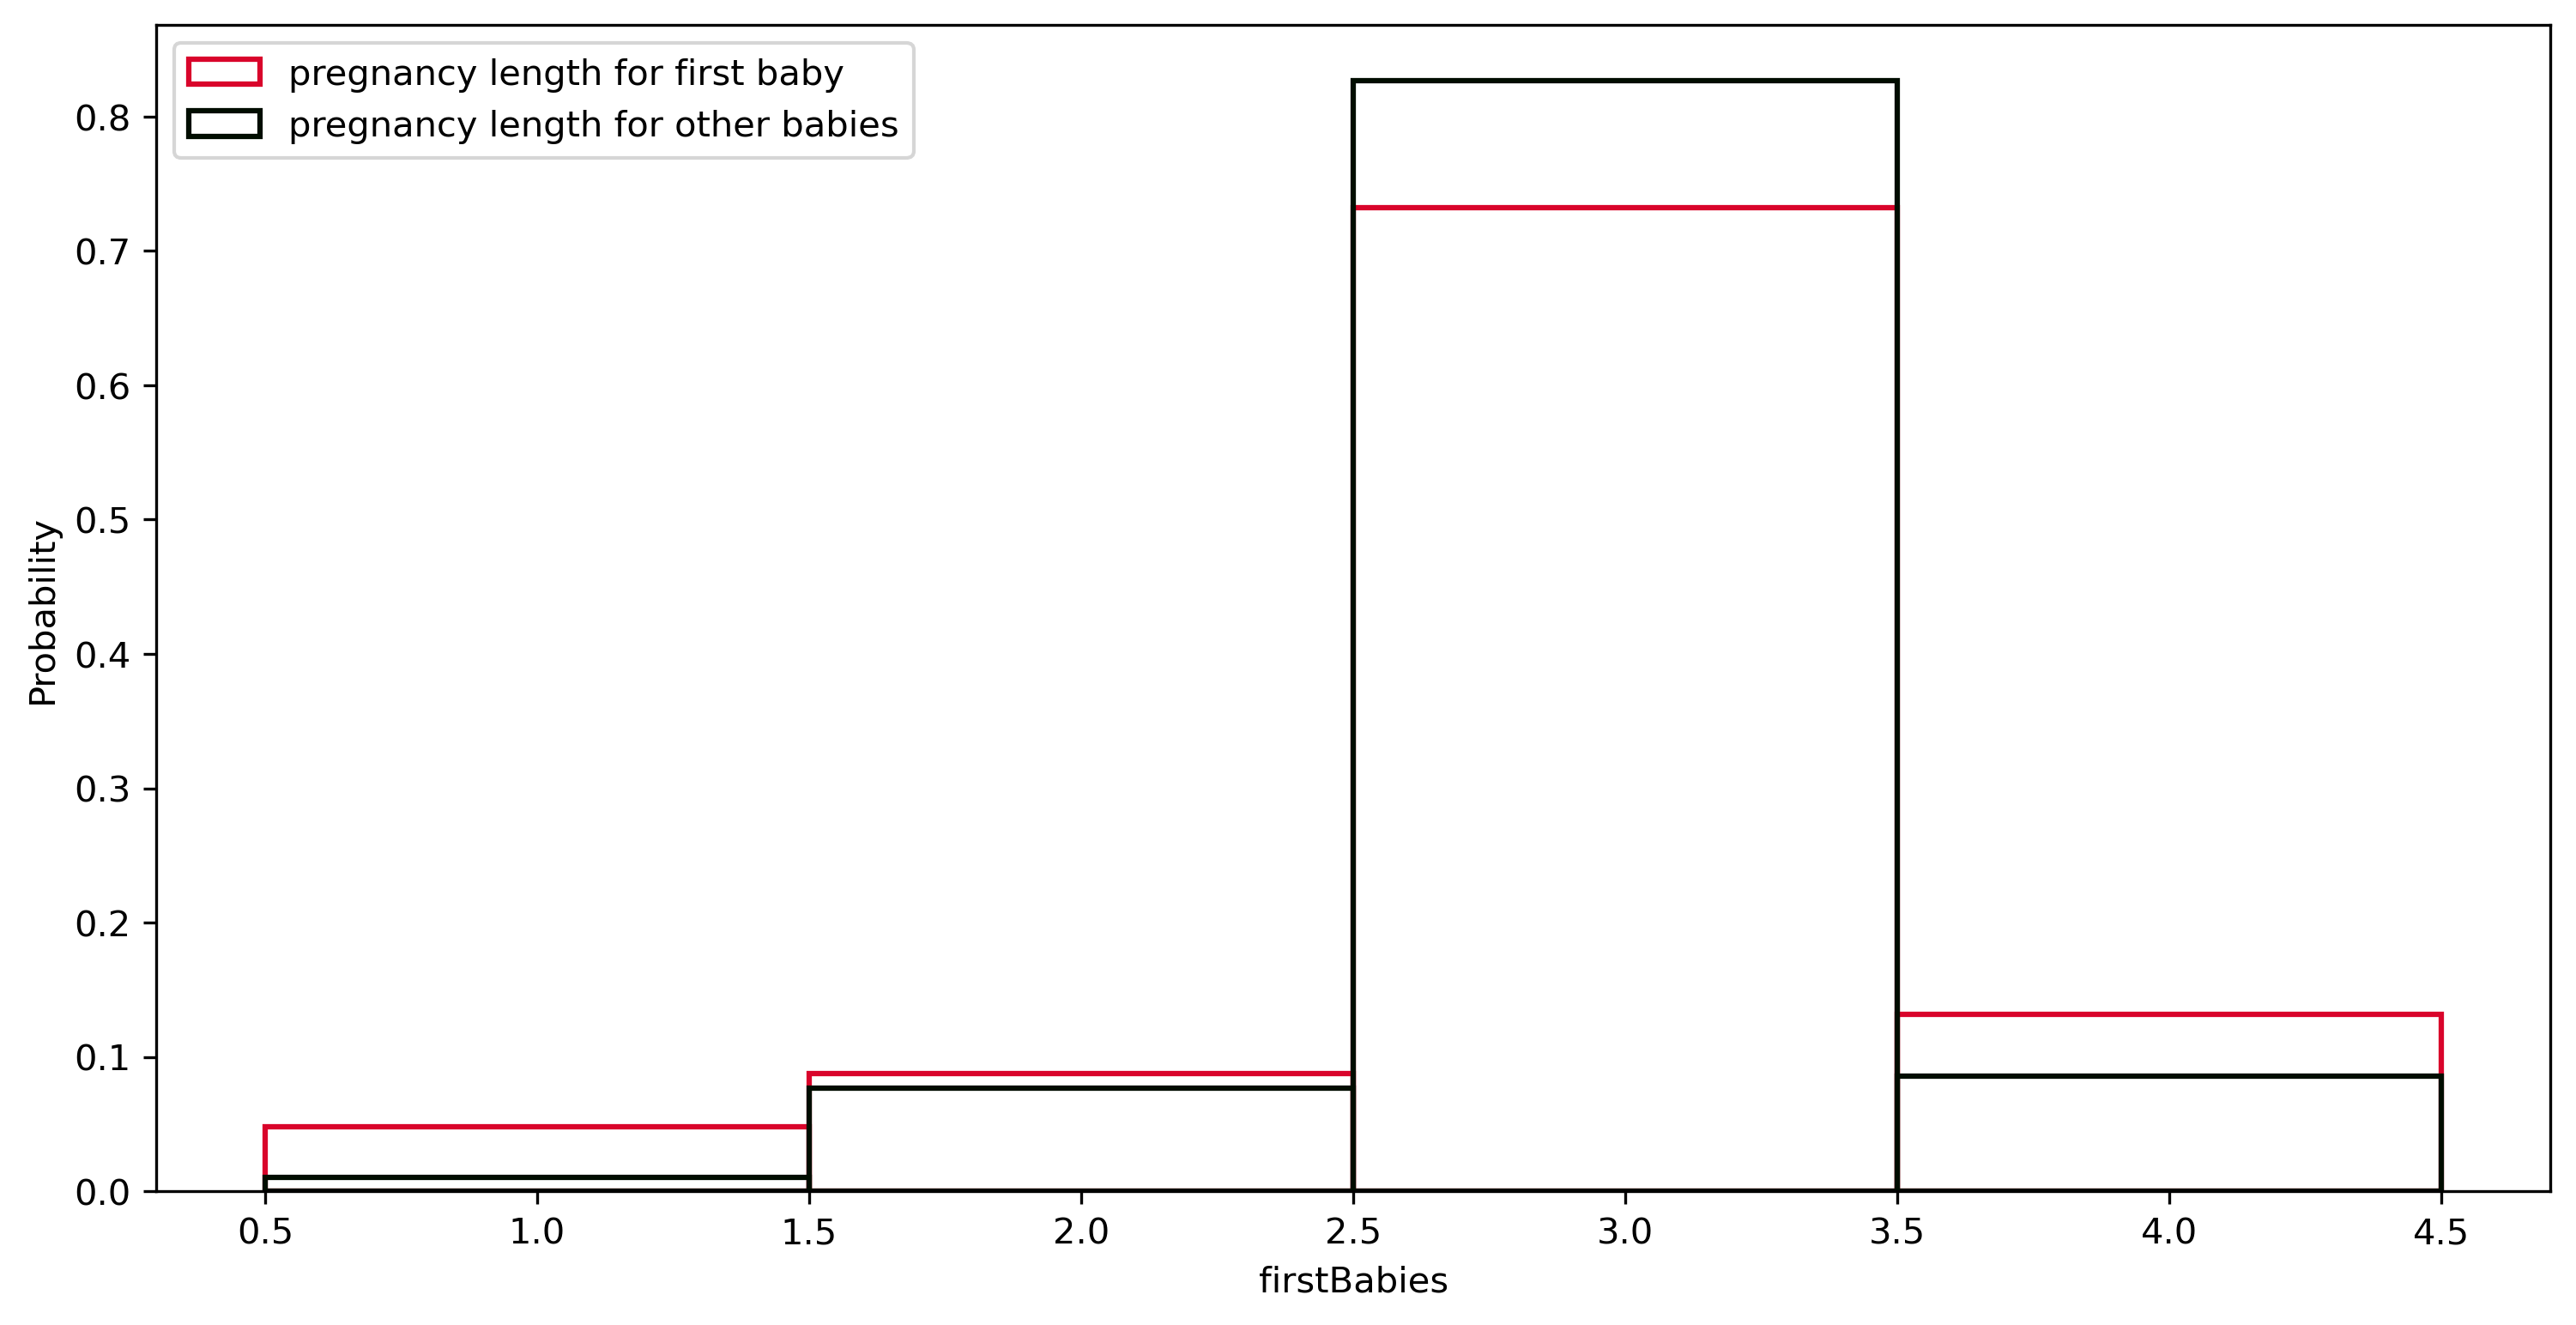

In [53]:
graphing.create_figure
preg_len_same_mom.hist(x='firstBabies',
                       stat='probability',
                       color='#D9042B',
                       discrete=True,
                       fill=False,
                       label="pregnancy length for first baby")
preg_len_same_mom.hist(x='others',
                       stat='probability',
                       color='#010D00',
                       discrete=True,
                       fill=False,
                       label="pregnancy length for other babies")
plt.legend()
graphing.show

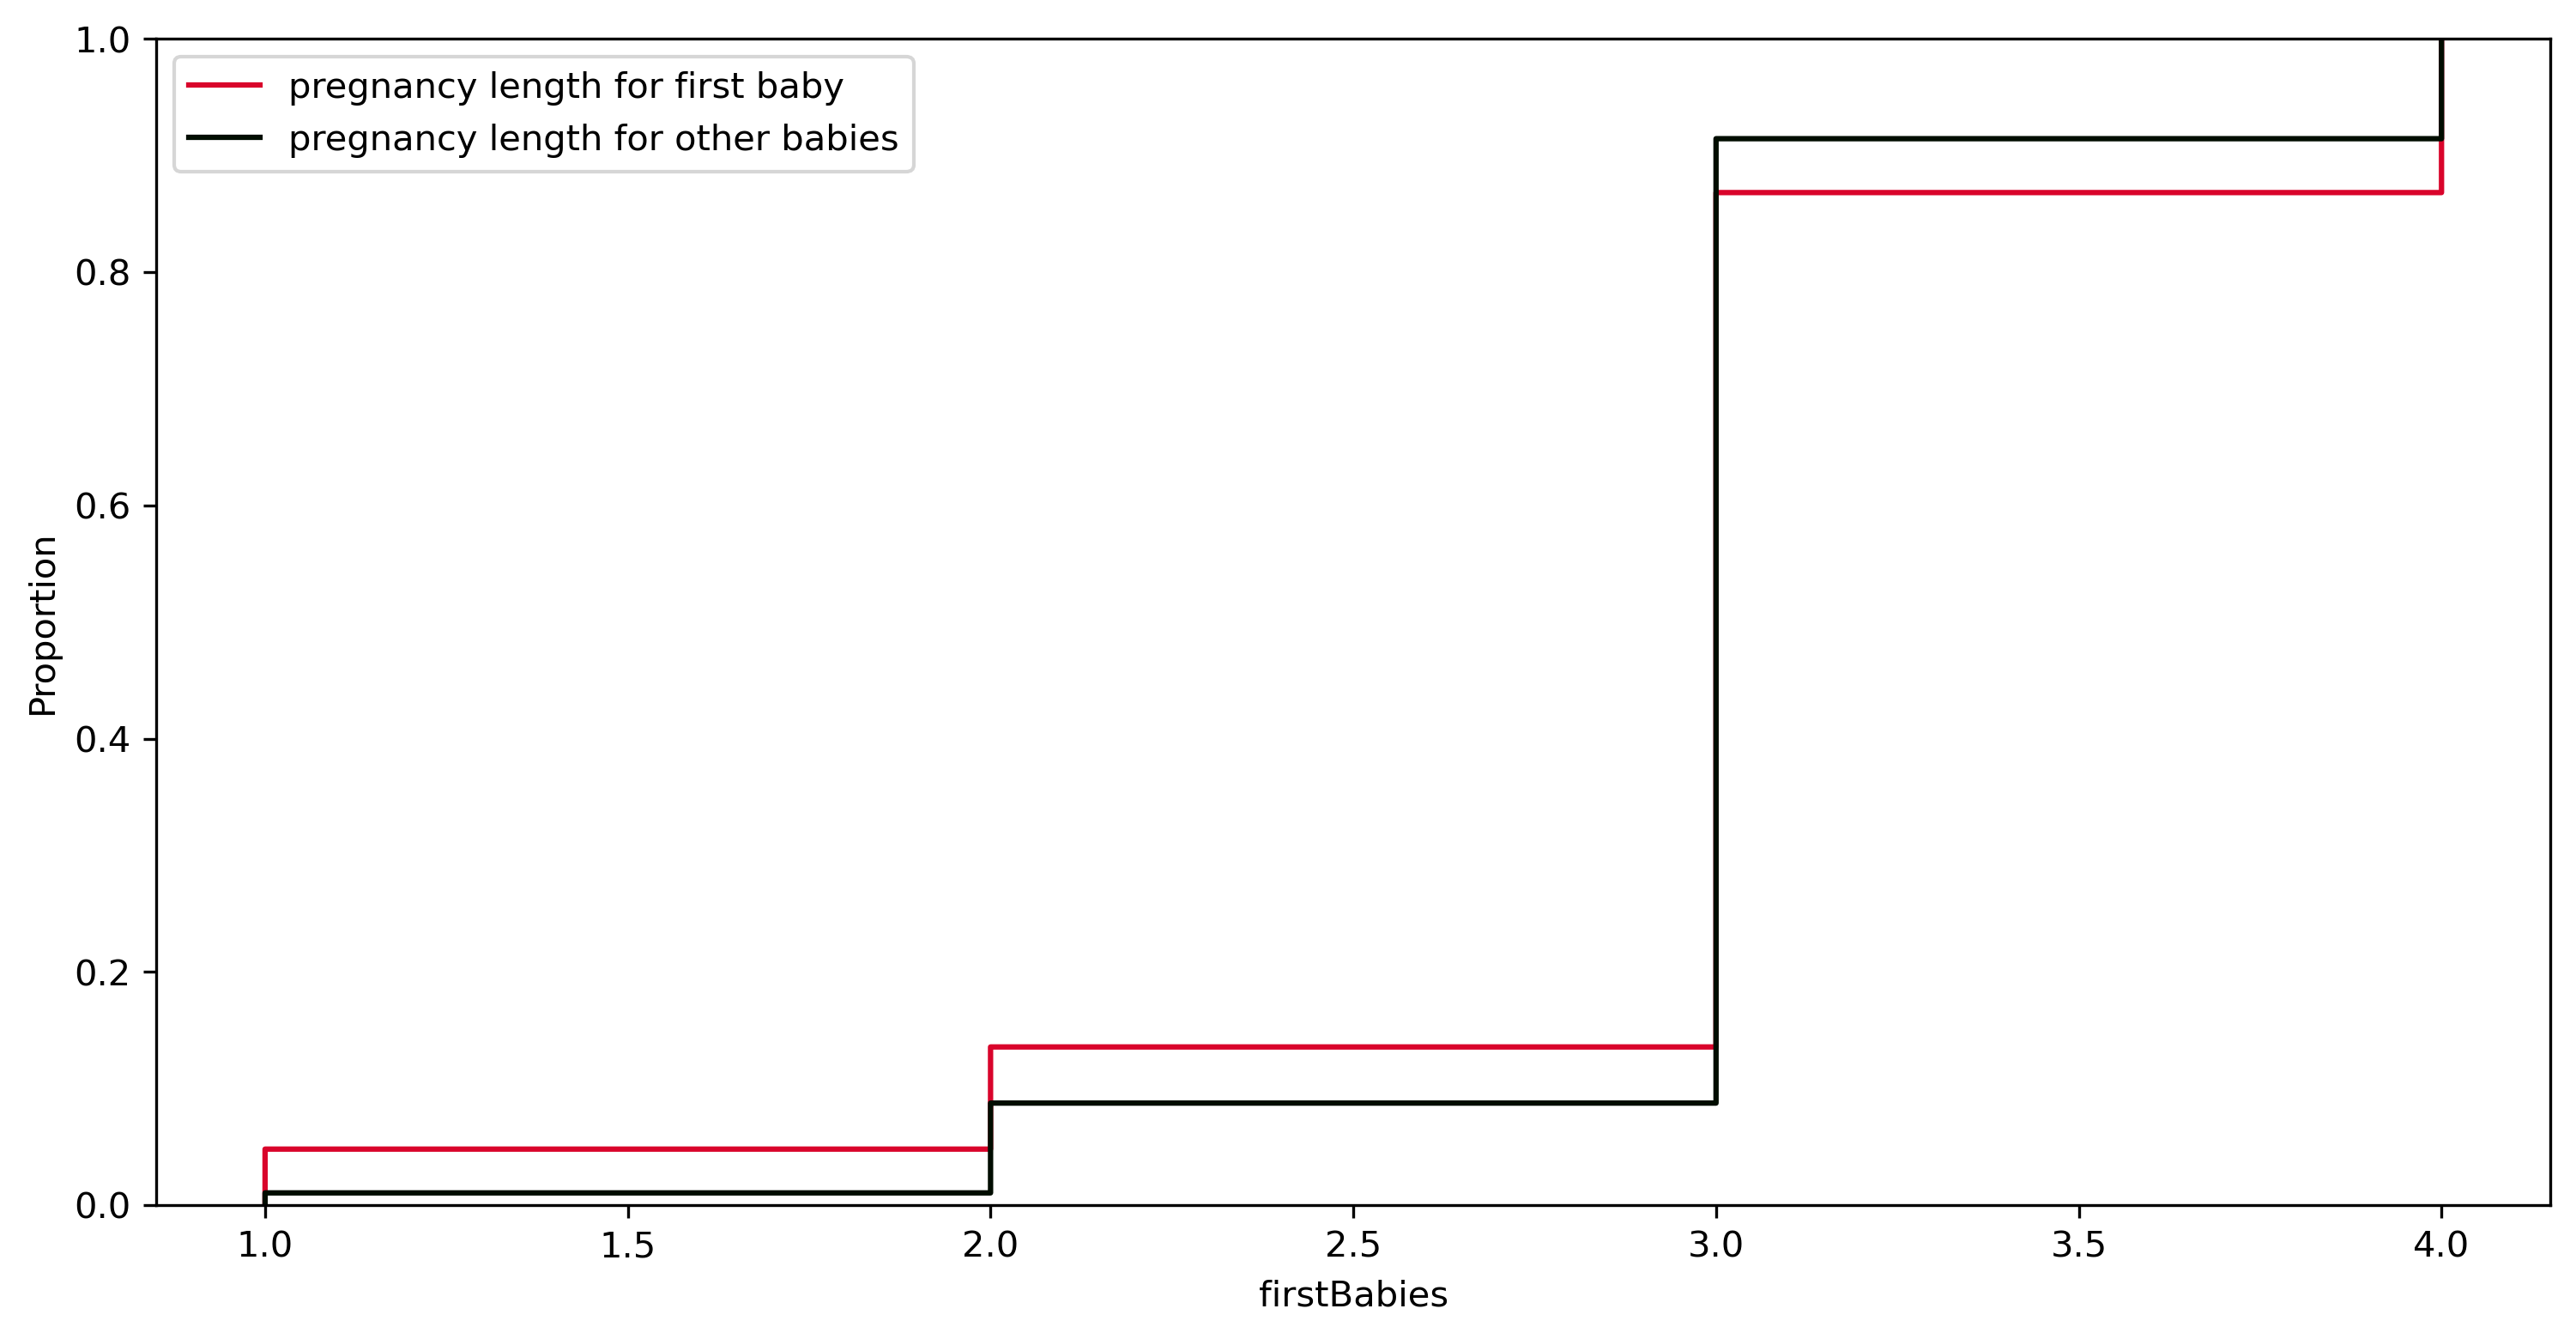

In [54]:
graphing.create_figure
preg_len_same_mom.cdf(x='firstBabies',
                      color='#D9042B',
                      label="pregnancy length for first baby")
preg_len_same_mom.cdf(x='others',
                      color='#010D00',
                      label="pregnancy length for other babies")
plt.legend()
graphing.show

In [55]:
preg_len_same_mom_summery.mean()

firstBabies    2.948027
others         2.987488
dtype: float64

In [56]:
preg_len_same_mom_summery.mode()

array([[3., 3.]])

In [57]:
preg_len_same_mom_summery.variance()

firstBabies    0.409233
others         0.204848
dtype: float64

In [58]:
preg_len_same_mom_summery.standard_deviation()

firstBabies    0.639713
others         0.452602
dtype: float64

## Is higher income families has higher live births

* majority of respondents are in between their 20-30 when they conception and delivery.
* majority of respondents are in between their 30-50 when they interviewed. it's good
condition to have because respondents have enough time to have multiple pregnancy in her life.
* non alive births are more likely high in high income rate groups than other income rate
group.
* only one live birth is more probable in high income groups.

In [59]:
ages = get_res_ages(pregnancy_data[pregnancy_data['outcome'] == 1], 'caseid')
age_graph = DrawGraph(ages, figsize=[12, 6], dpi=300)

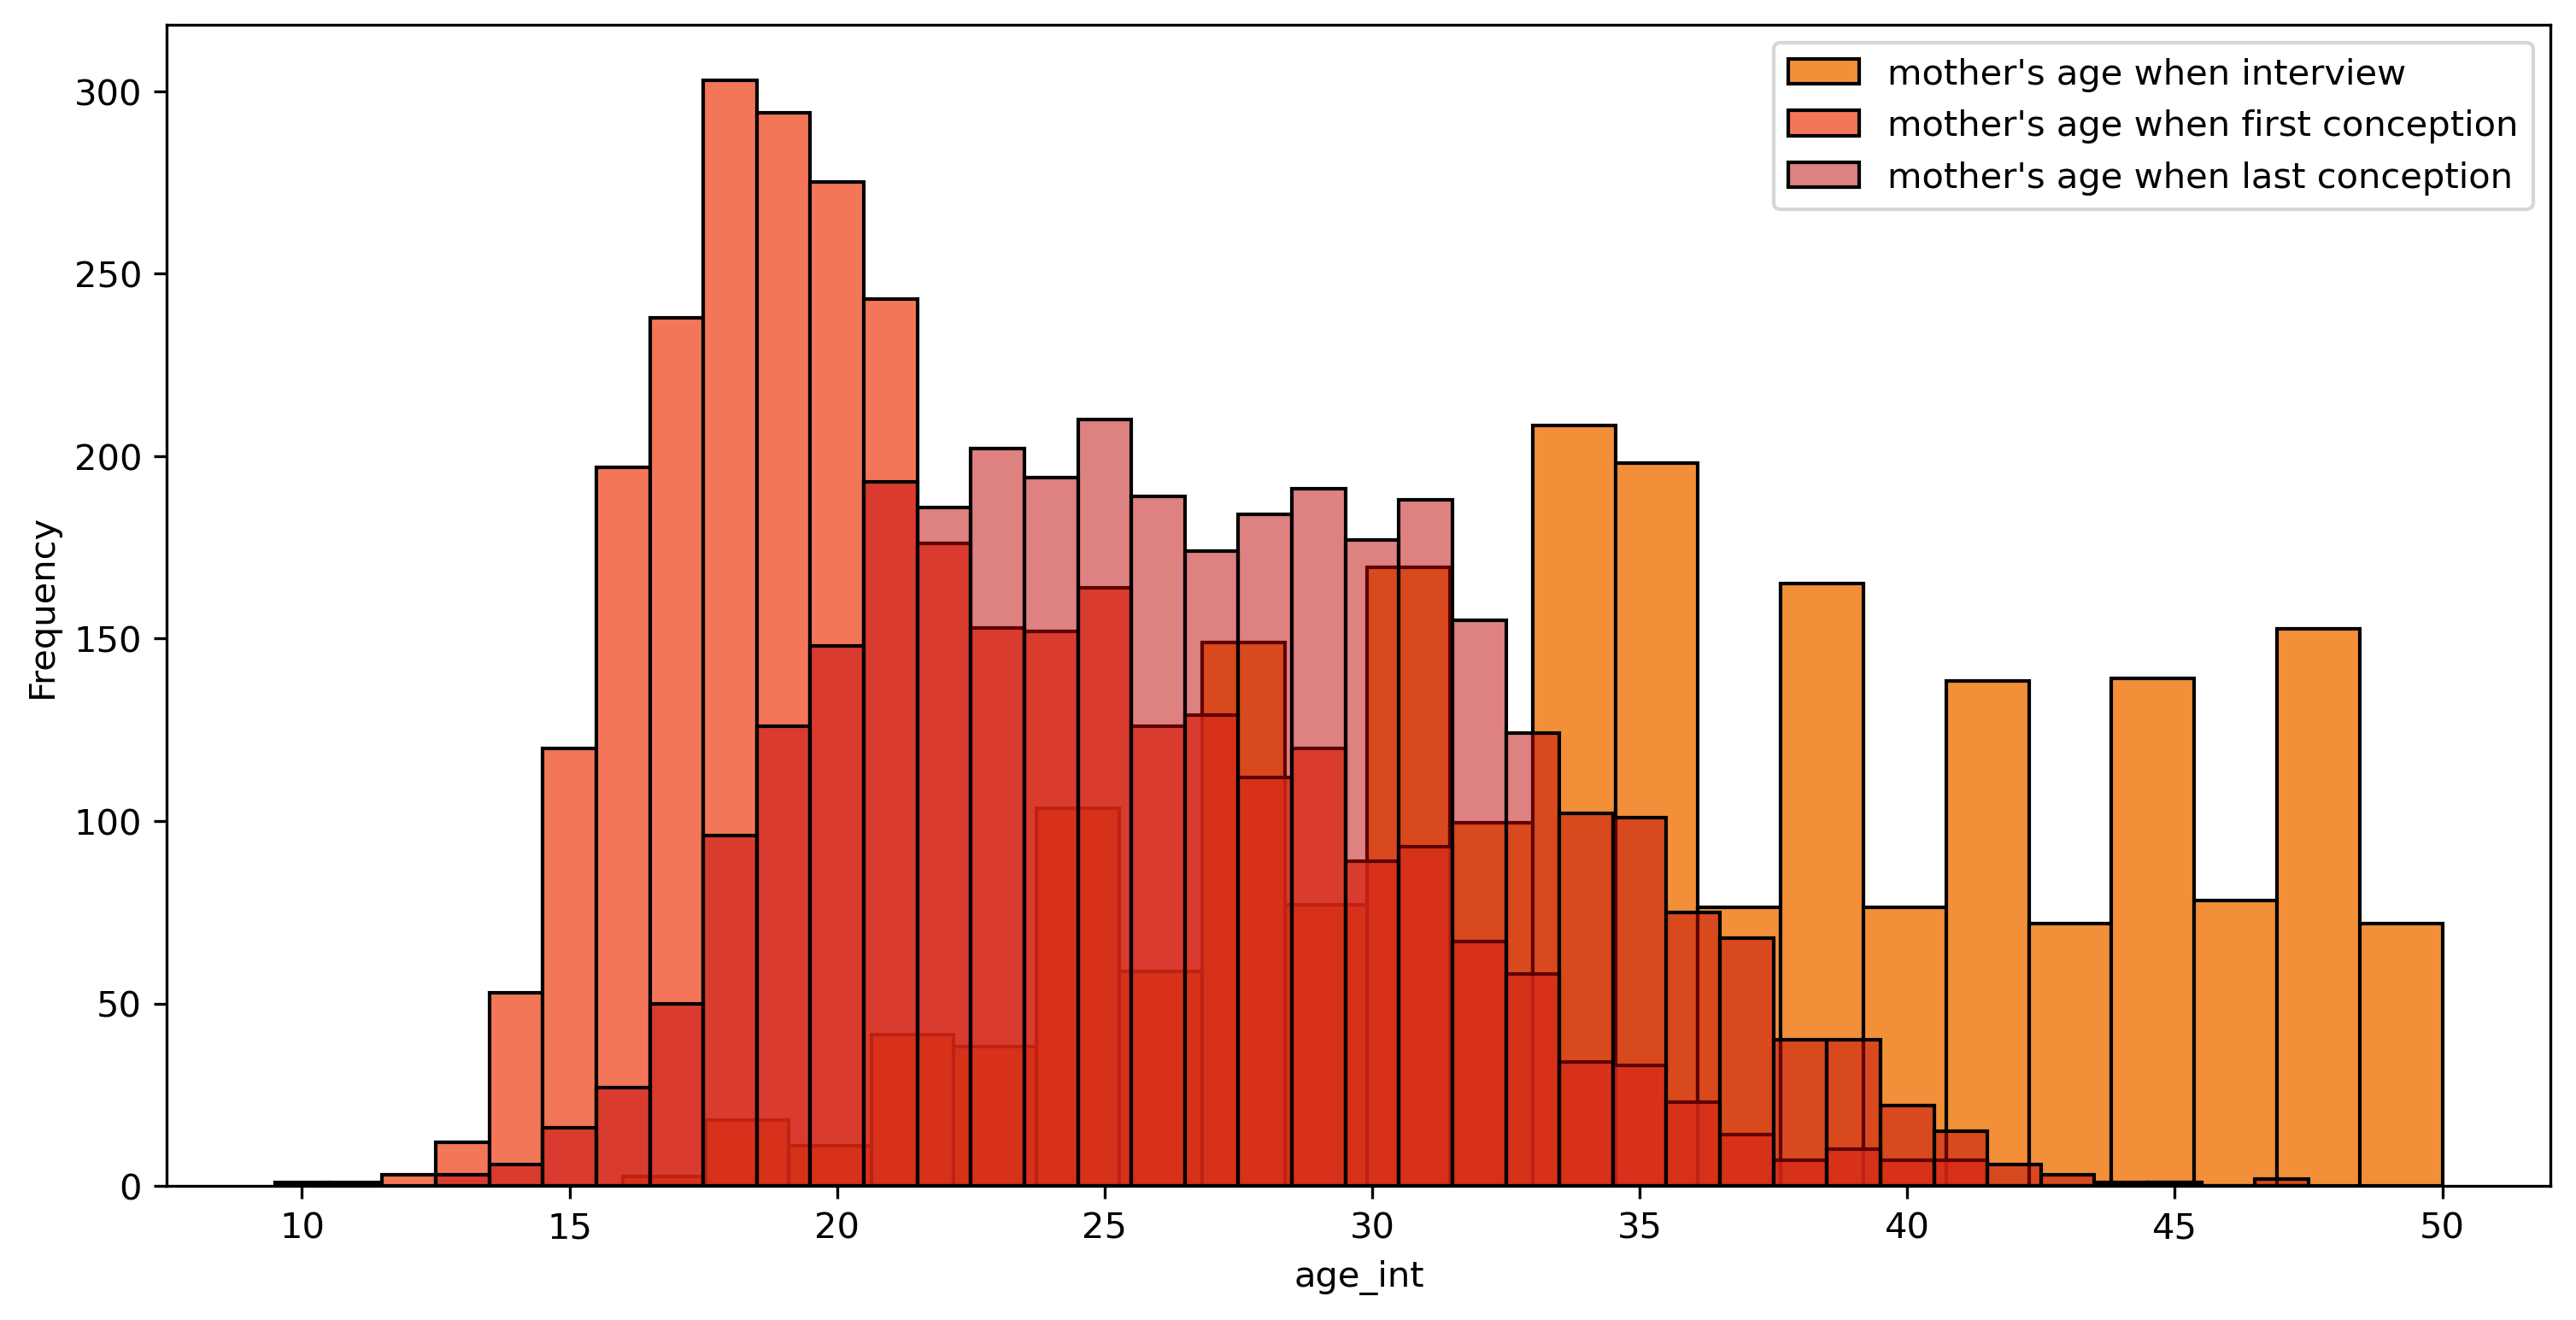

In [60]:
graphing.create_figure
age_graph.hist(x='age_int',
               stat='frequency',
               color='#F28F38',
               alpha=1,
               bins='fd',
               label="mother's age when interview")
age_graph.hist(x='agecon_fst',
               stat='frequency',
               color='#F25430',
               discrete=True,
               alpha=0.8,
               bins='fd',
               label="mother's age when first conception")
age_graph.hist(x='agecon_lst',
               stat='frequency',
               color='#BF0404',
               discrete=True,
               alpha=0.5,
               bins='fd',
               label="mother's age when last conception")
plt.legend()
graphing.show

<Figure size 3600x1800 with 0 Axes>

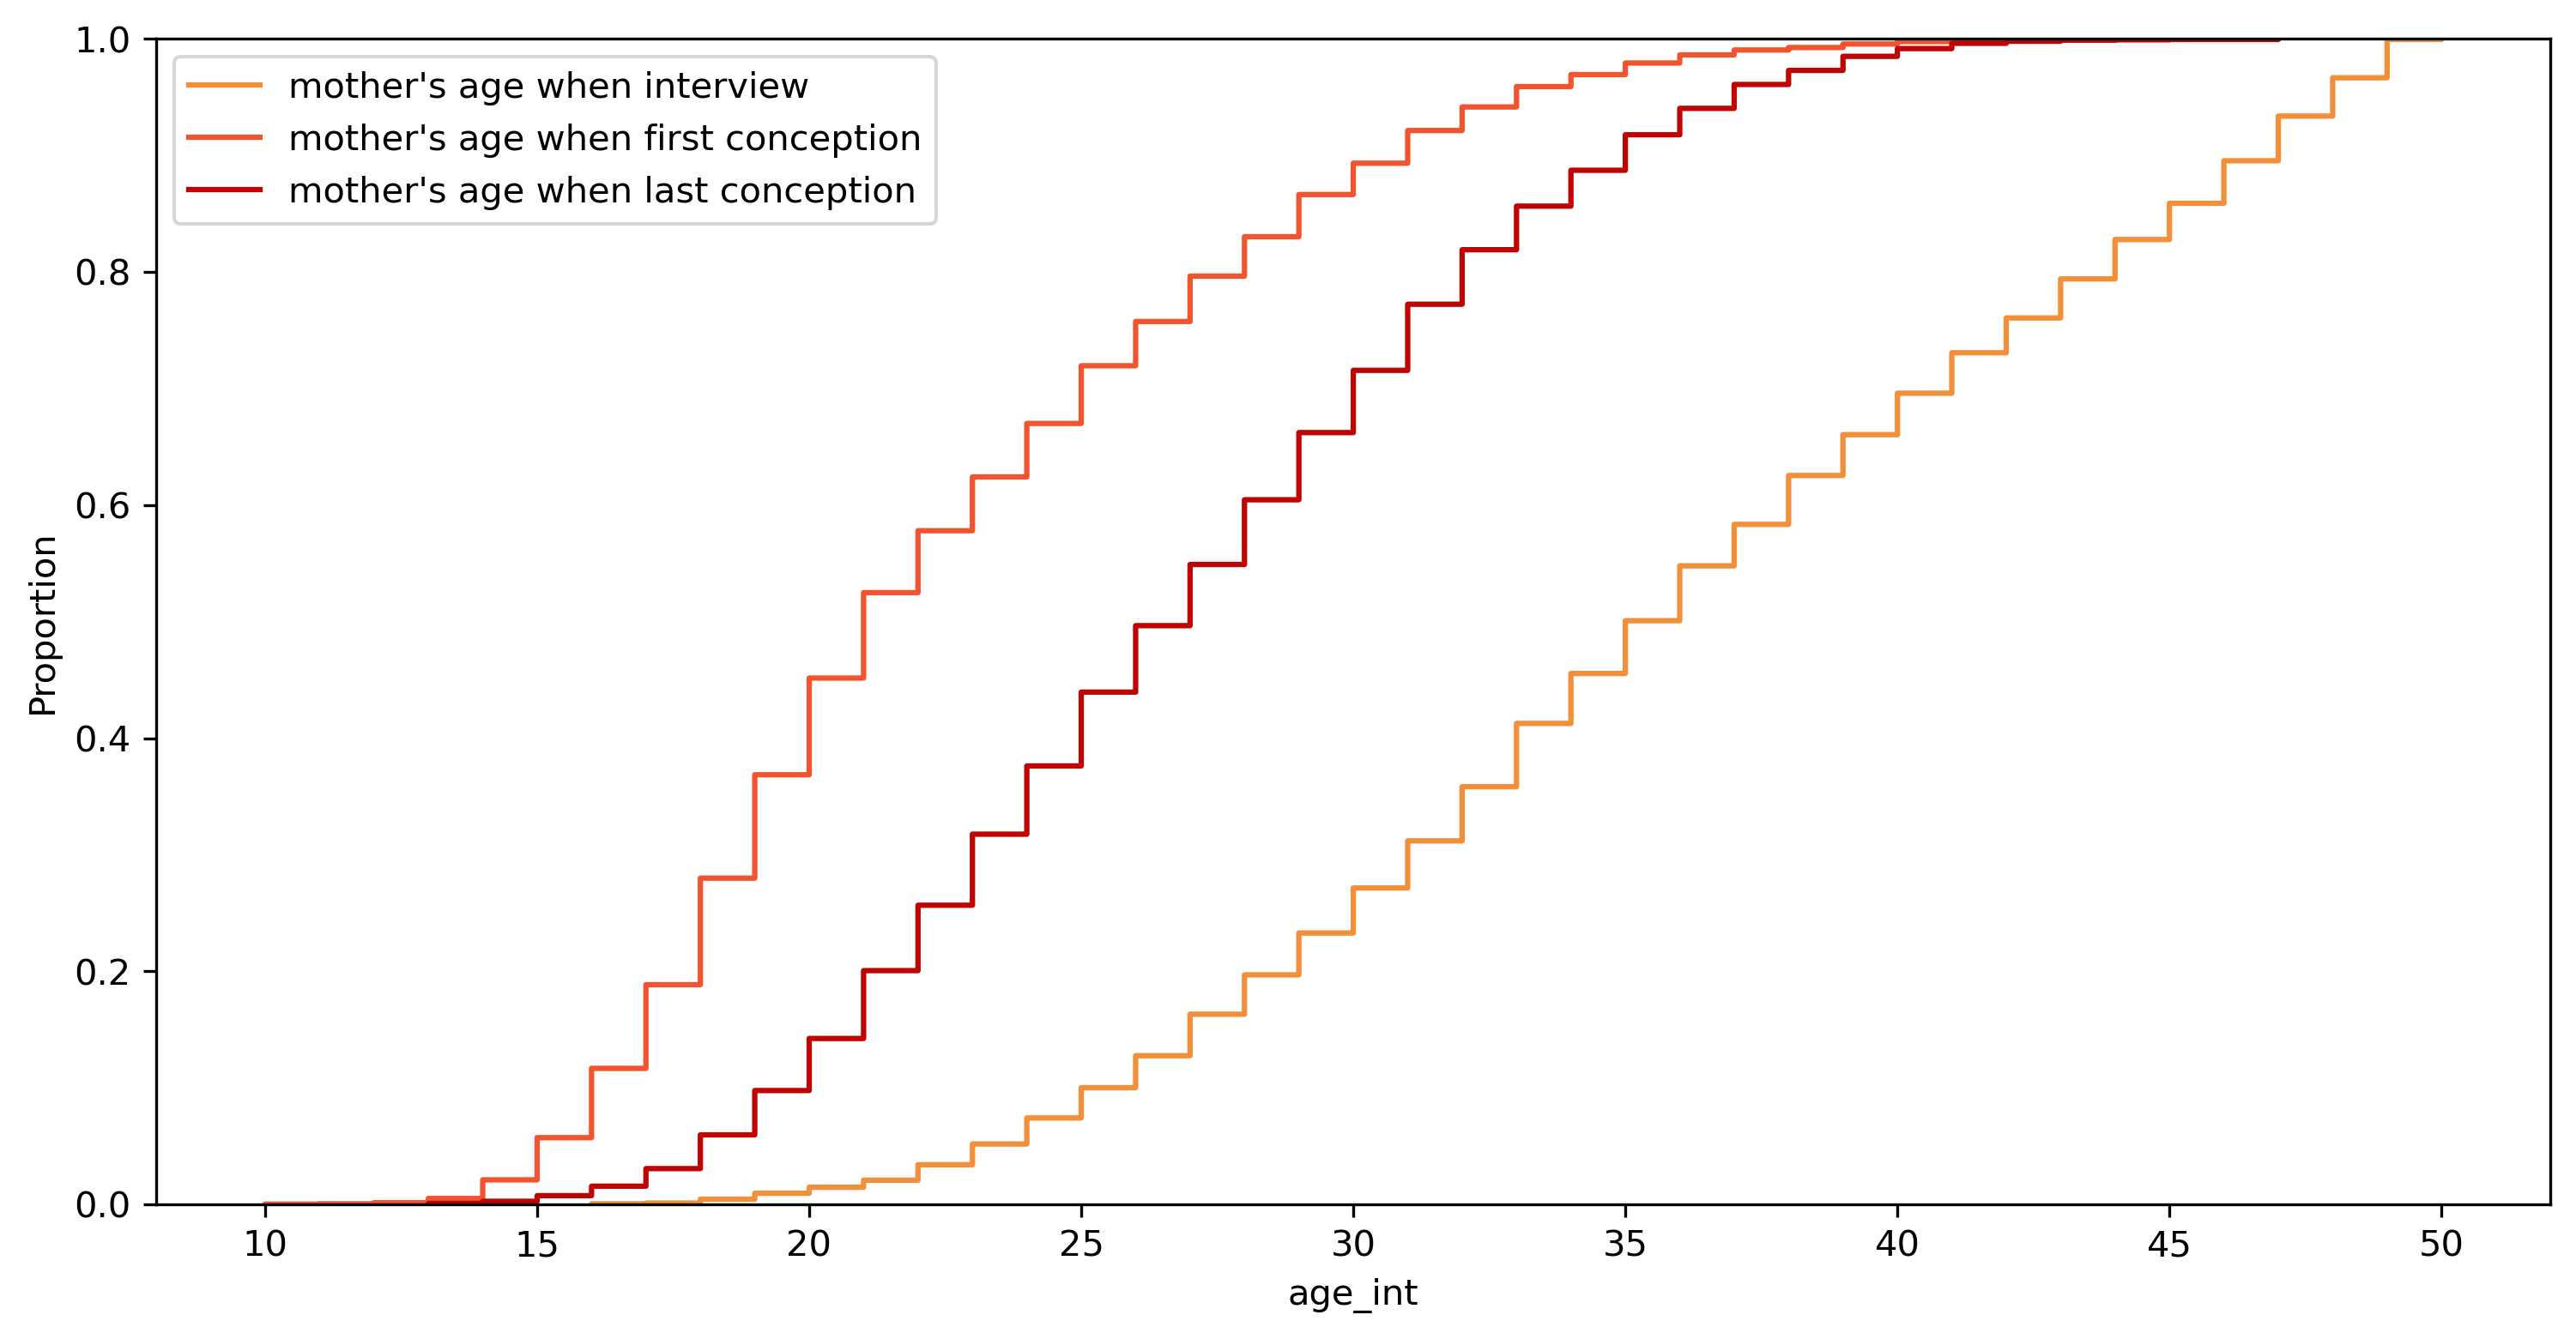

In [79]:
graphing.create_figure
age_graph.cdf(x='age_int',
              color='#F28F38',
              label="mother's age when interview")
age_graph.cdf(x='agecon_fst',
              color='#F25430',
              label="mother's age when first conception")
age_graph.cdf(x='agecon_lst',
              color='#BF0404',
              label="mother's age when last conception")
plt.legend()
graphing.show

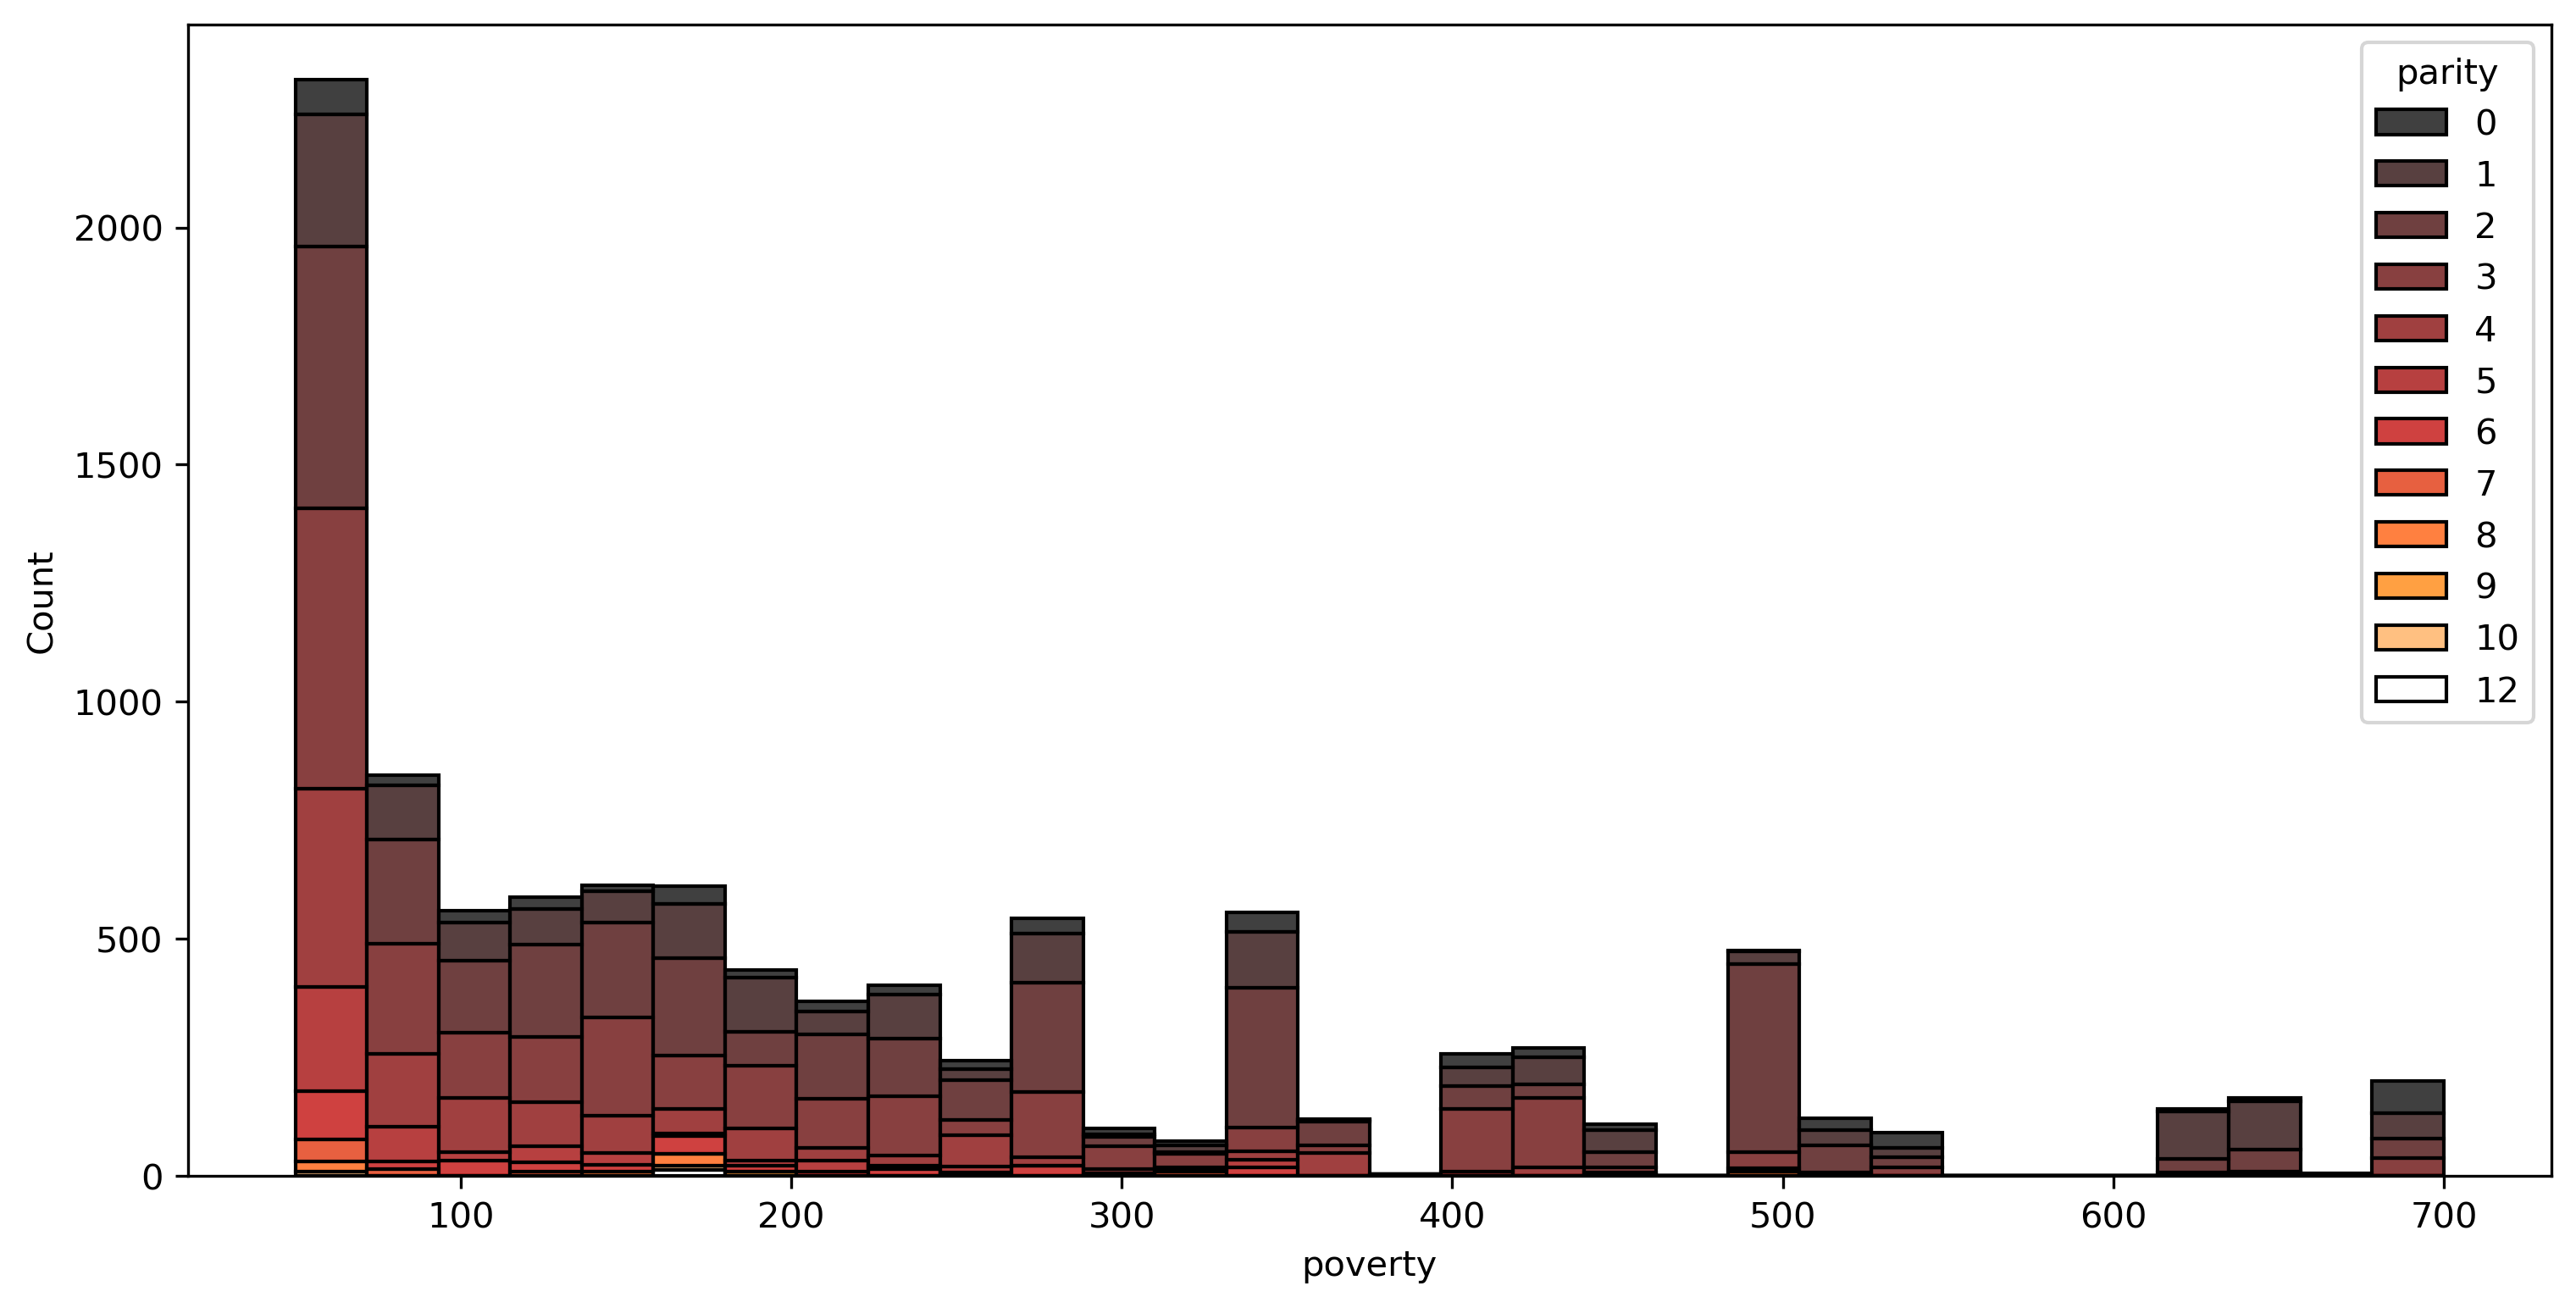

In [62]:
graphing.create_figure
graphing.hist(x='poverty',
              hue='parity',
              palette='gist_heat',
              multiple='stack')
graphing.show

In [63]:
zero_live_births = pregnancy_data[(pregnancy_data['parity'] == 0) & (pregnancy_data['pregnum'] > 0)]
live_births = pregnancy_data[(pregnancy_data['parity'] > 0) & (pregnancy_data['pregnum'] > 0)]
highest_inc_resp = pregnancy_data[pregnancy_data['poverty'] > 600]
other_income_resp = pregnancy_data[pregnancy_data['poverty'] < 600]

no_live = DrawGraph(zero_live_births, figsize=[12, 6], dpi=300)
live = DrawGraph(live_births, figsize=[12, 6], dpi=300)
high_income = DrawGraph(highest_inc_resp, figsize=[12, 6], dpi=300)
all_other_income = DrawGraph(other_income_resp, figsize=[12, 6], dpi=300)

In [64]:
cdf = CDF(other_income_resp, 'parity')
prob = cdf.prob()

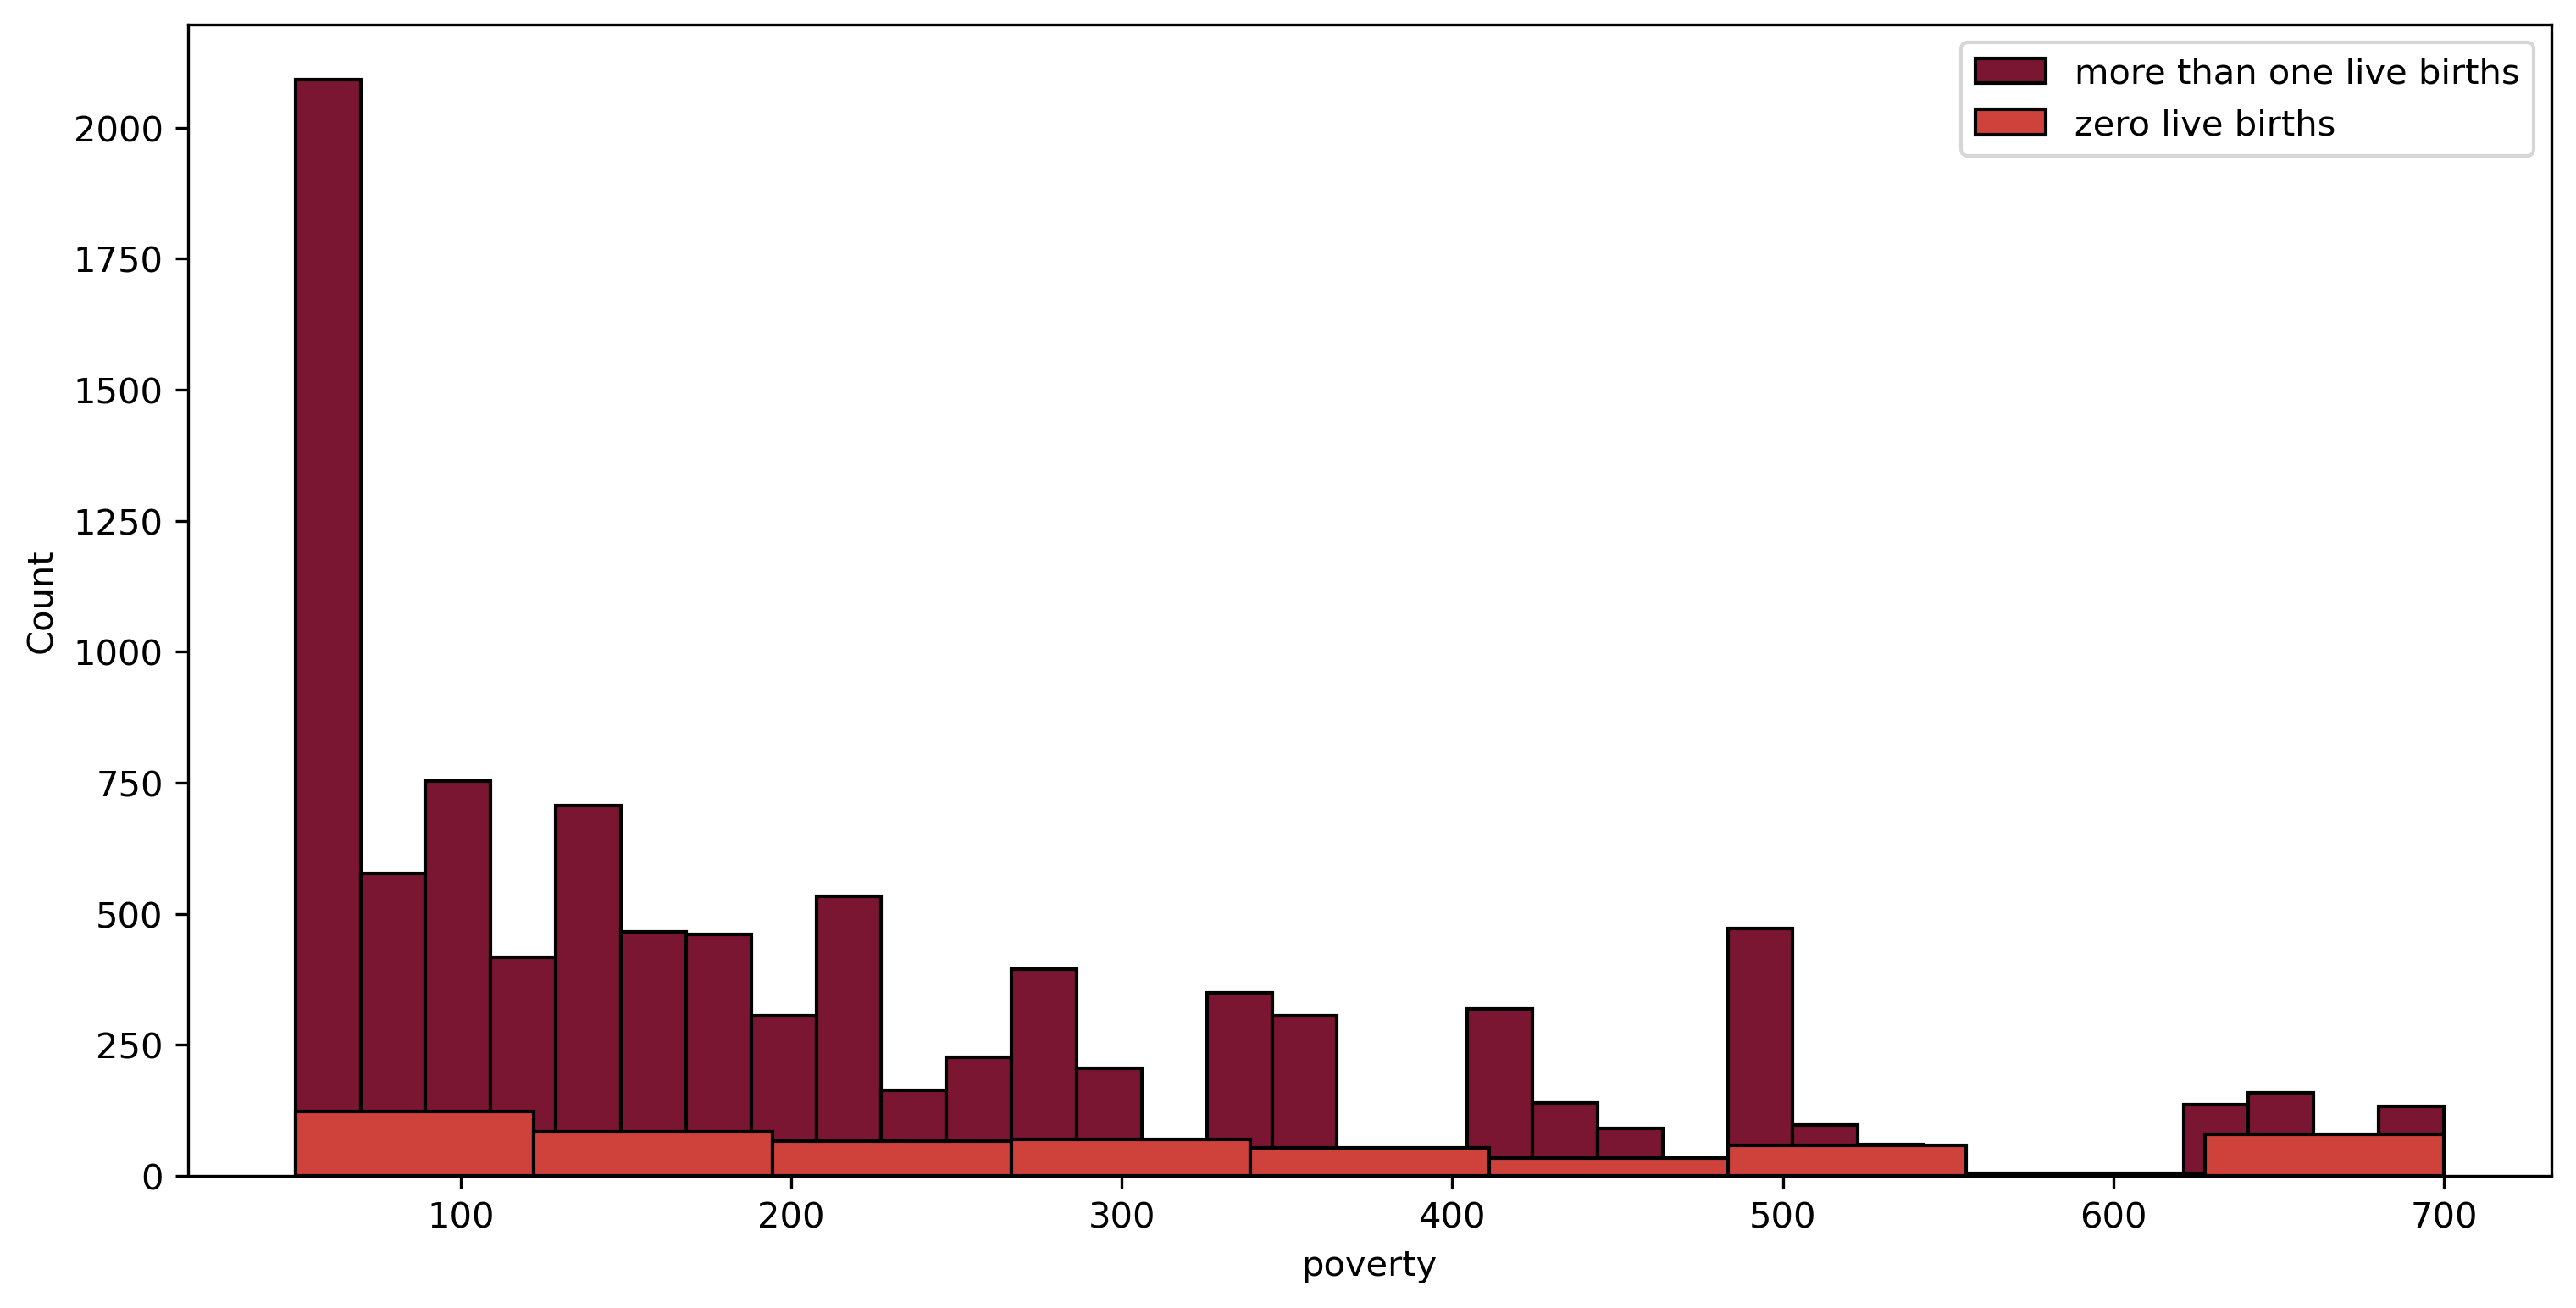

In [65]:
graphing.create_figure
live.hist(x='poverty',
          color='#7A1631',
          alpha=1,
          bins='fd',
          label='more than one live births')
no_live.hist(x='poverty',
             color='#CF423C',
             alpha=1,
             bins='fd',
             label='zero live births')
plt.legend()
graphing.show

In [66]:
prob_of_non_alive_high = len(highest_inc_resp[highest_inc_resp['parity'] == 0]) / len(highest_inc_resp)
prob_of_non_alive_low = len(other_income_resp[other_income_resp['parity'] == 0]) / len(other_income_resp)
prob_of_non_alive_high * 100, prob_of_non_alive_low * 100

(16.40625, 5.070596722663094)

In [67]:
print(f'relative_risk: {prob_of_non_alive_high / prob_of_non_alive_low}')

relative_risk: 3.2355659298780486


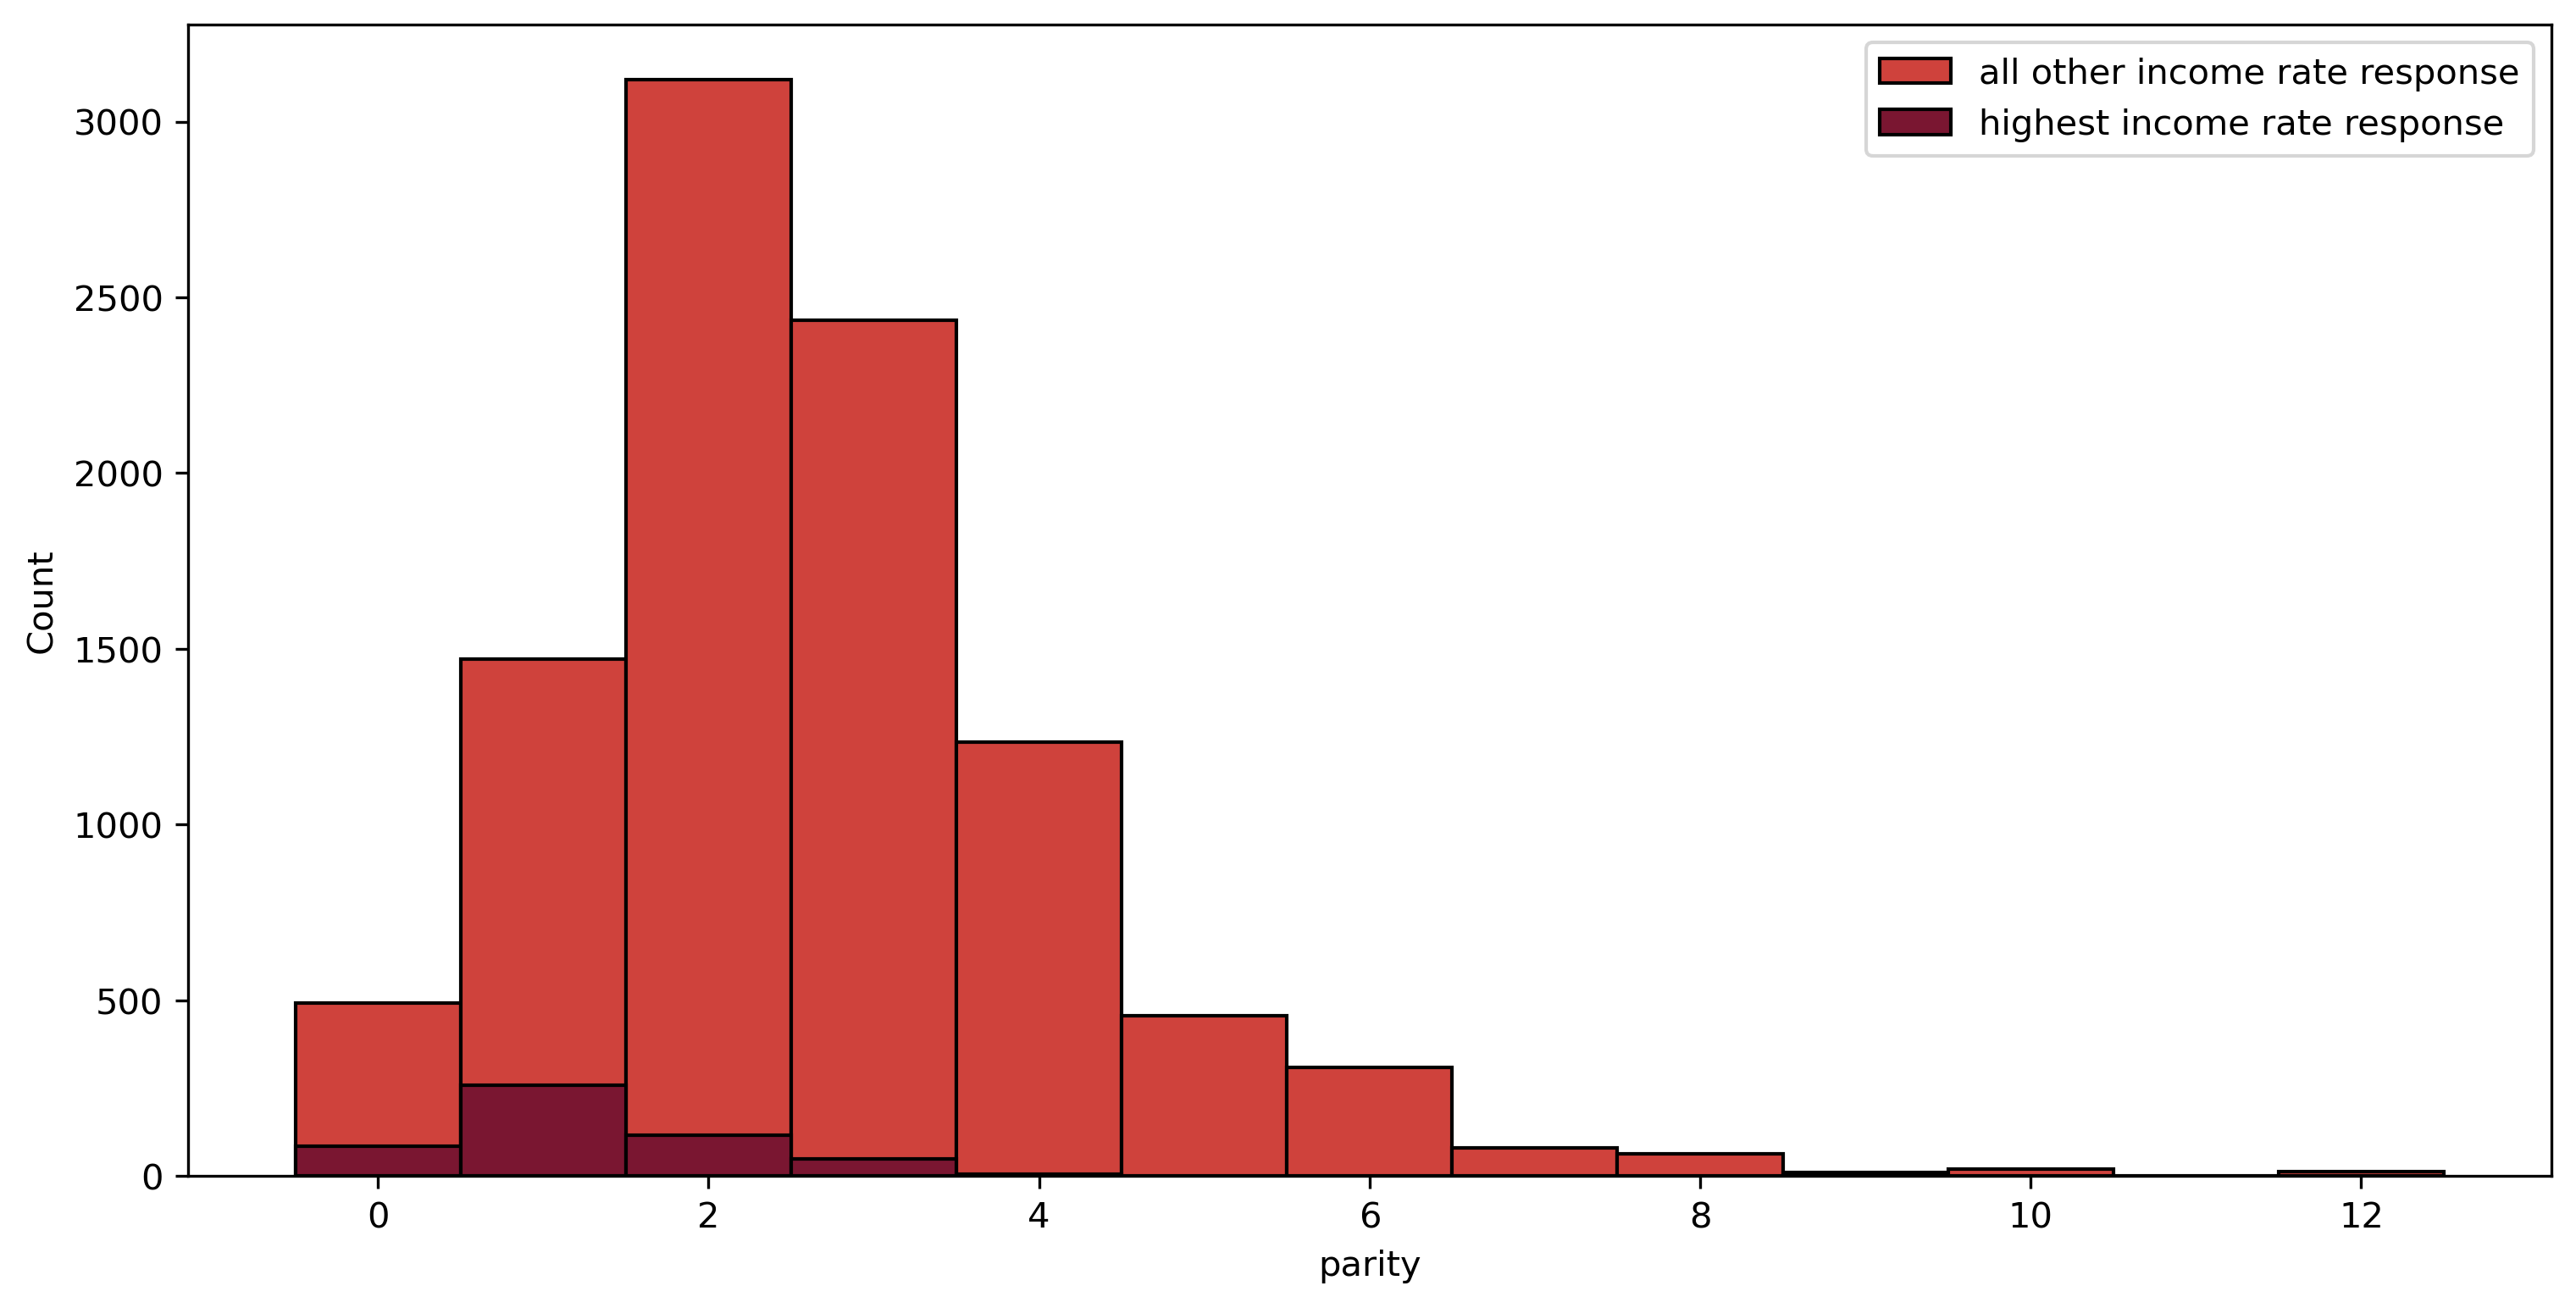

In [68]:
graphing.create_figure
all_other_income.hist(x='parity',
                      color='#CF423C',
                      alpha=1,
                      bins='fd',
                      discrete=True,
                      label='all other income rate response')
high_income.hist(x='parity',
                 color='#7A1631',
                 alpha=1,
                 bins='fd',
                 discrete=True,
                 label='highest income rate response')
plt.legend()
graphing.show

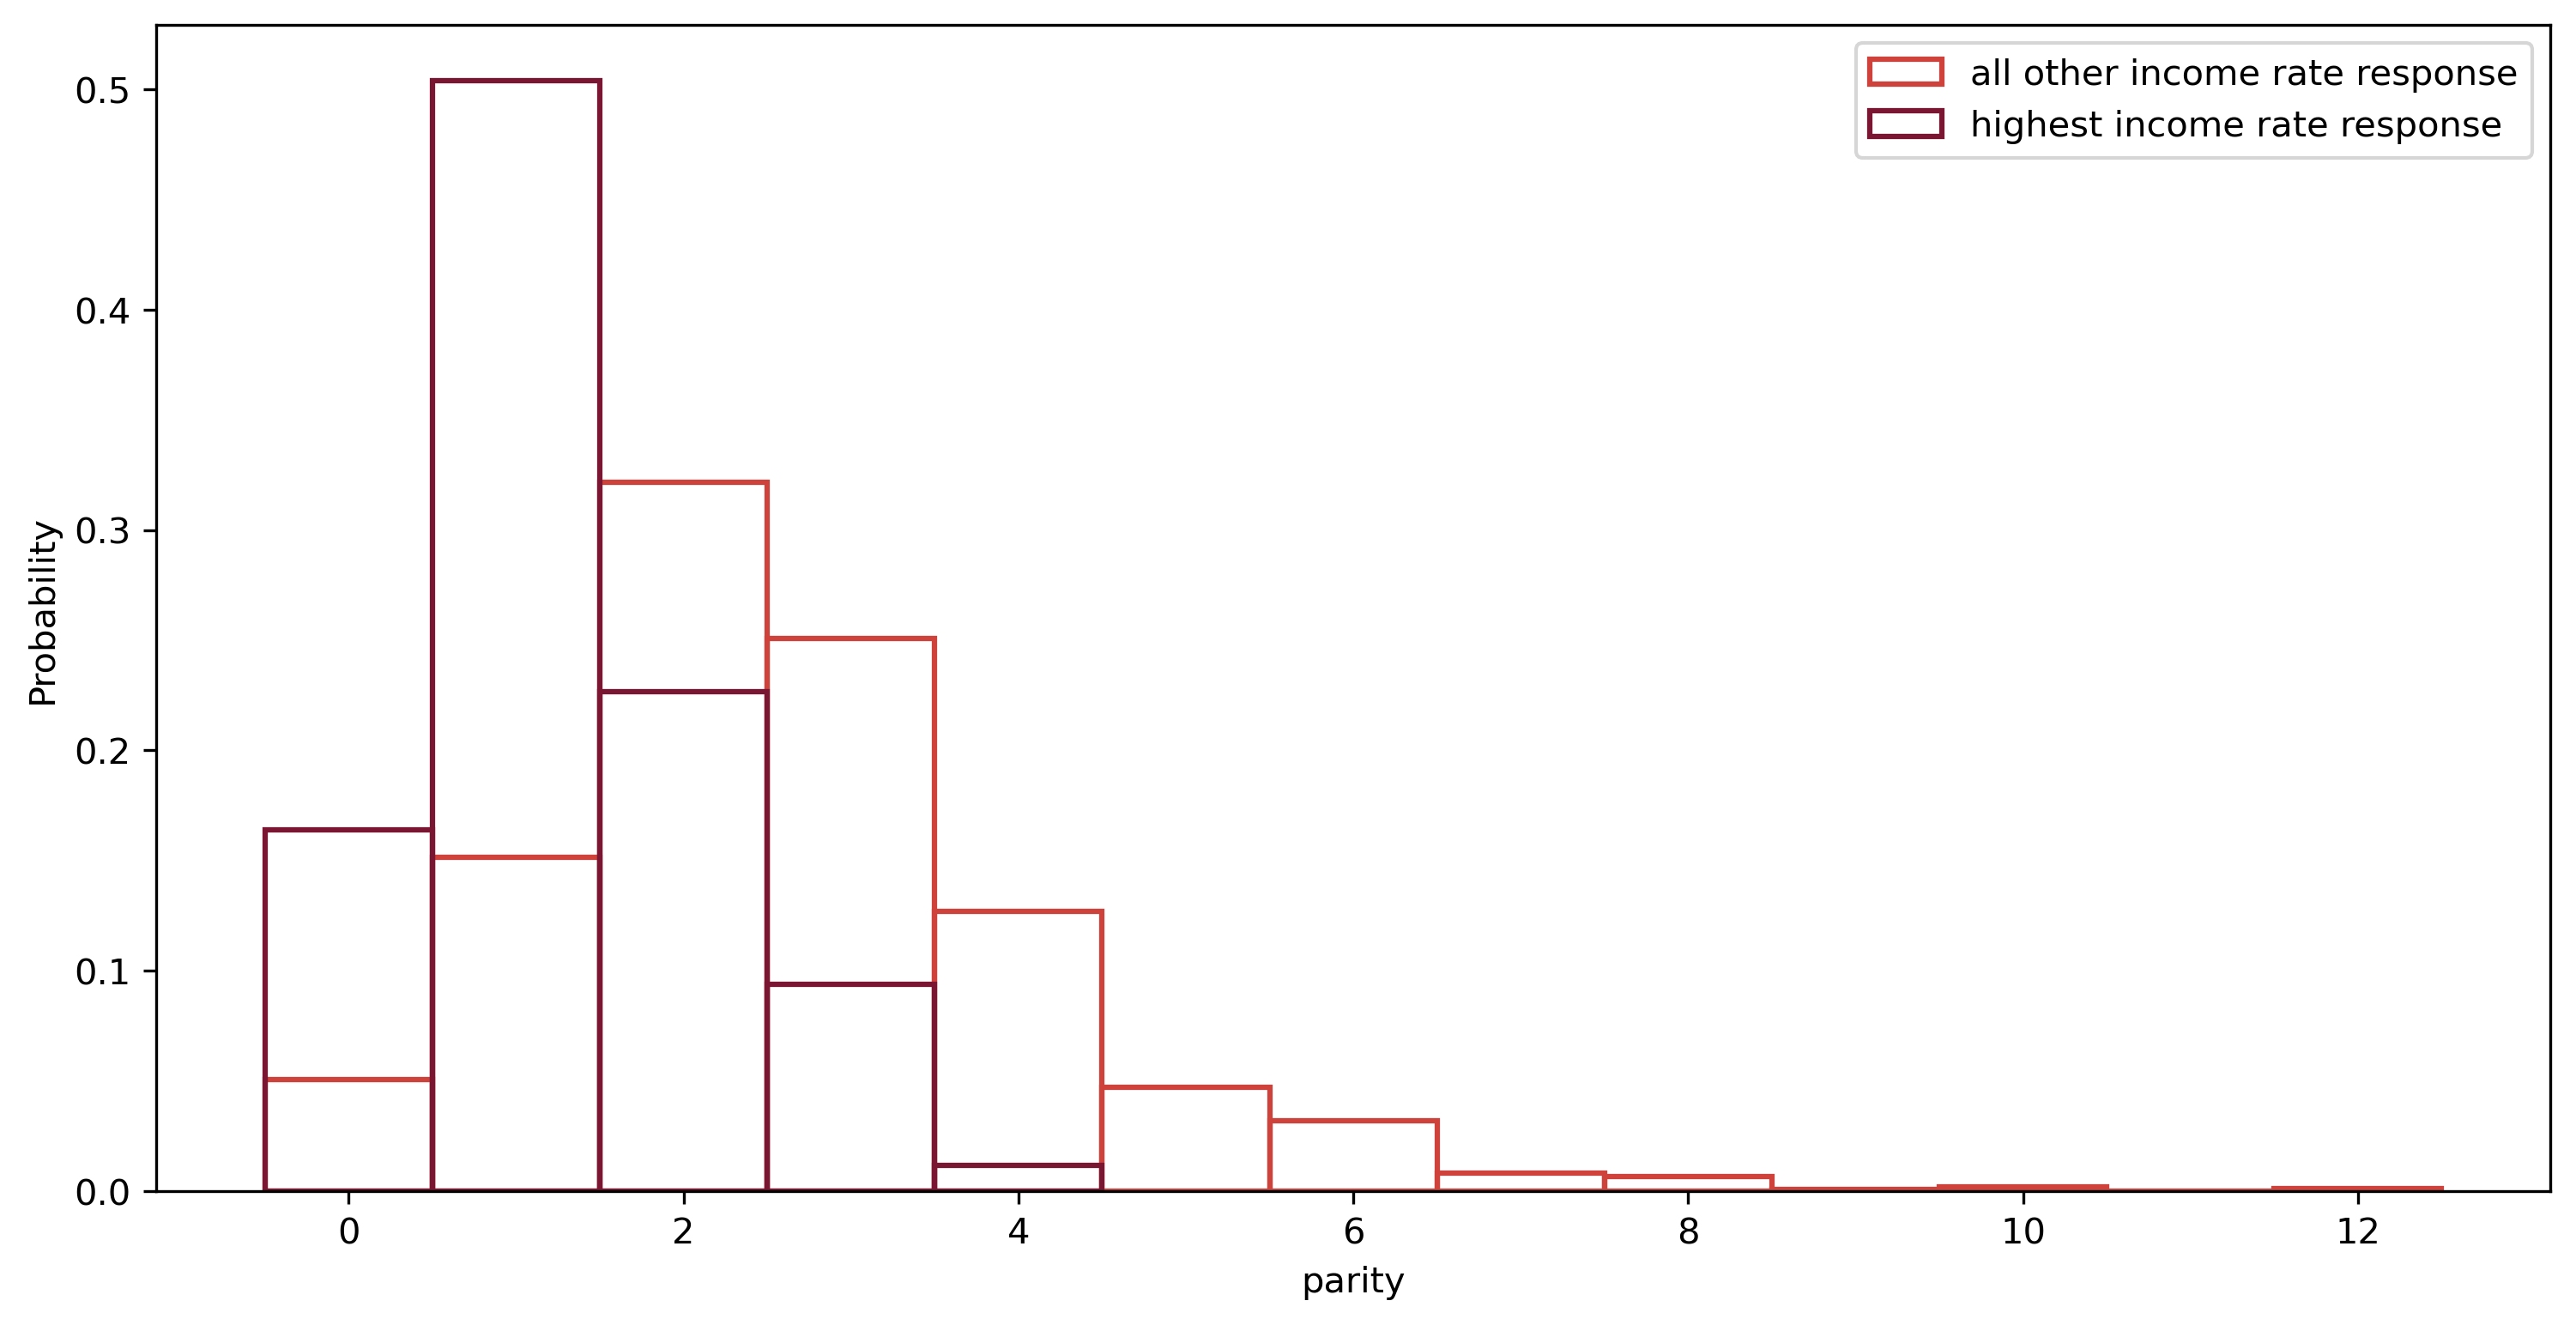

In [69]:
graphing.create_figure
all_other_income.hist(x='parity',
                      color='#CF423C',
                      fill=False,
                      stat='probability',
                      bins='fd',
                      discrete=True,
                      label='all other income rate response')
high_income.hist(x='parity',
                 color='#7A1631',
                 fill=False,
                 stat='probability',
                 bins='fd',
                 discrete=True,
                 label='highest income rate response')
plt.legend()
graphing.show

<Figure size 3600x1800 with 0 Axes>

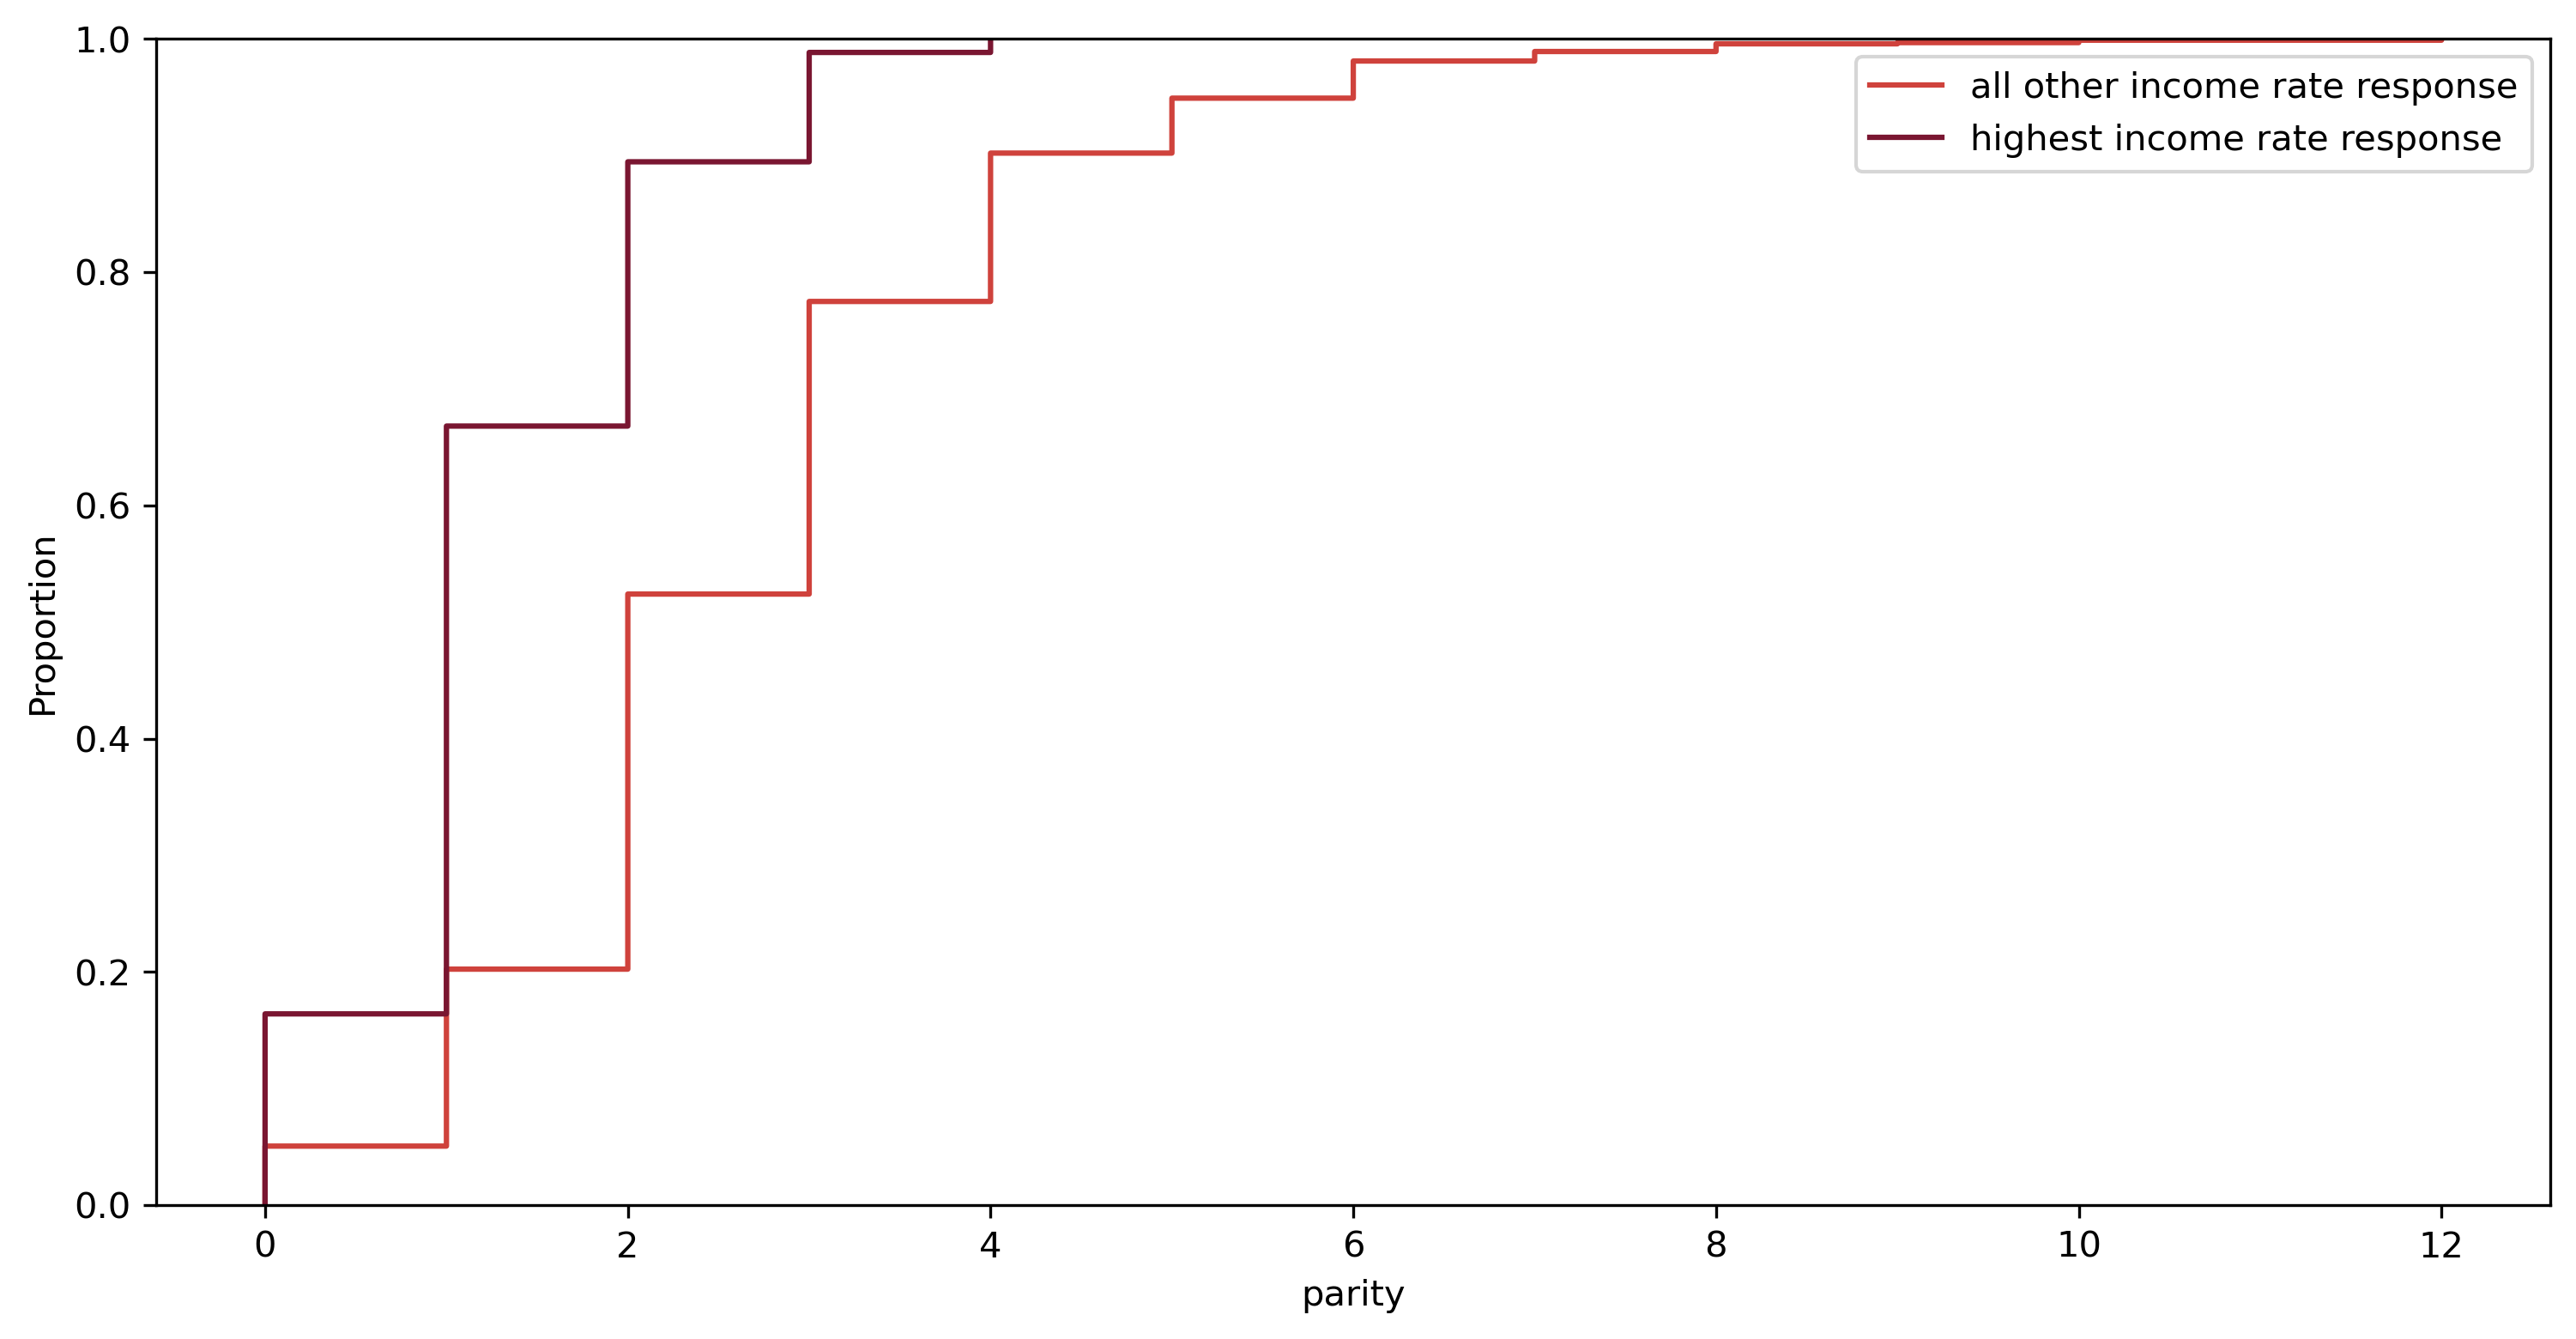

In [78]:
graphing.create_figure
all_other_income.cdf(x='parity',
                     color='#CF423C',
                     label='all other income rate response')
high_income.cdf(x='parity',
                color='#7A1631',
                label='highest income rate response')
plt.legend()
graphing.show

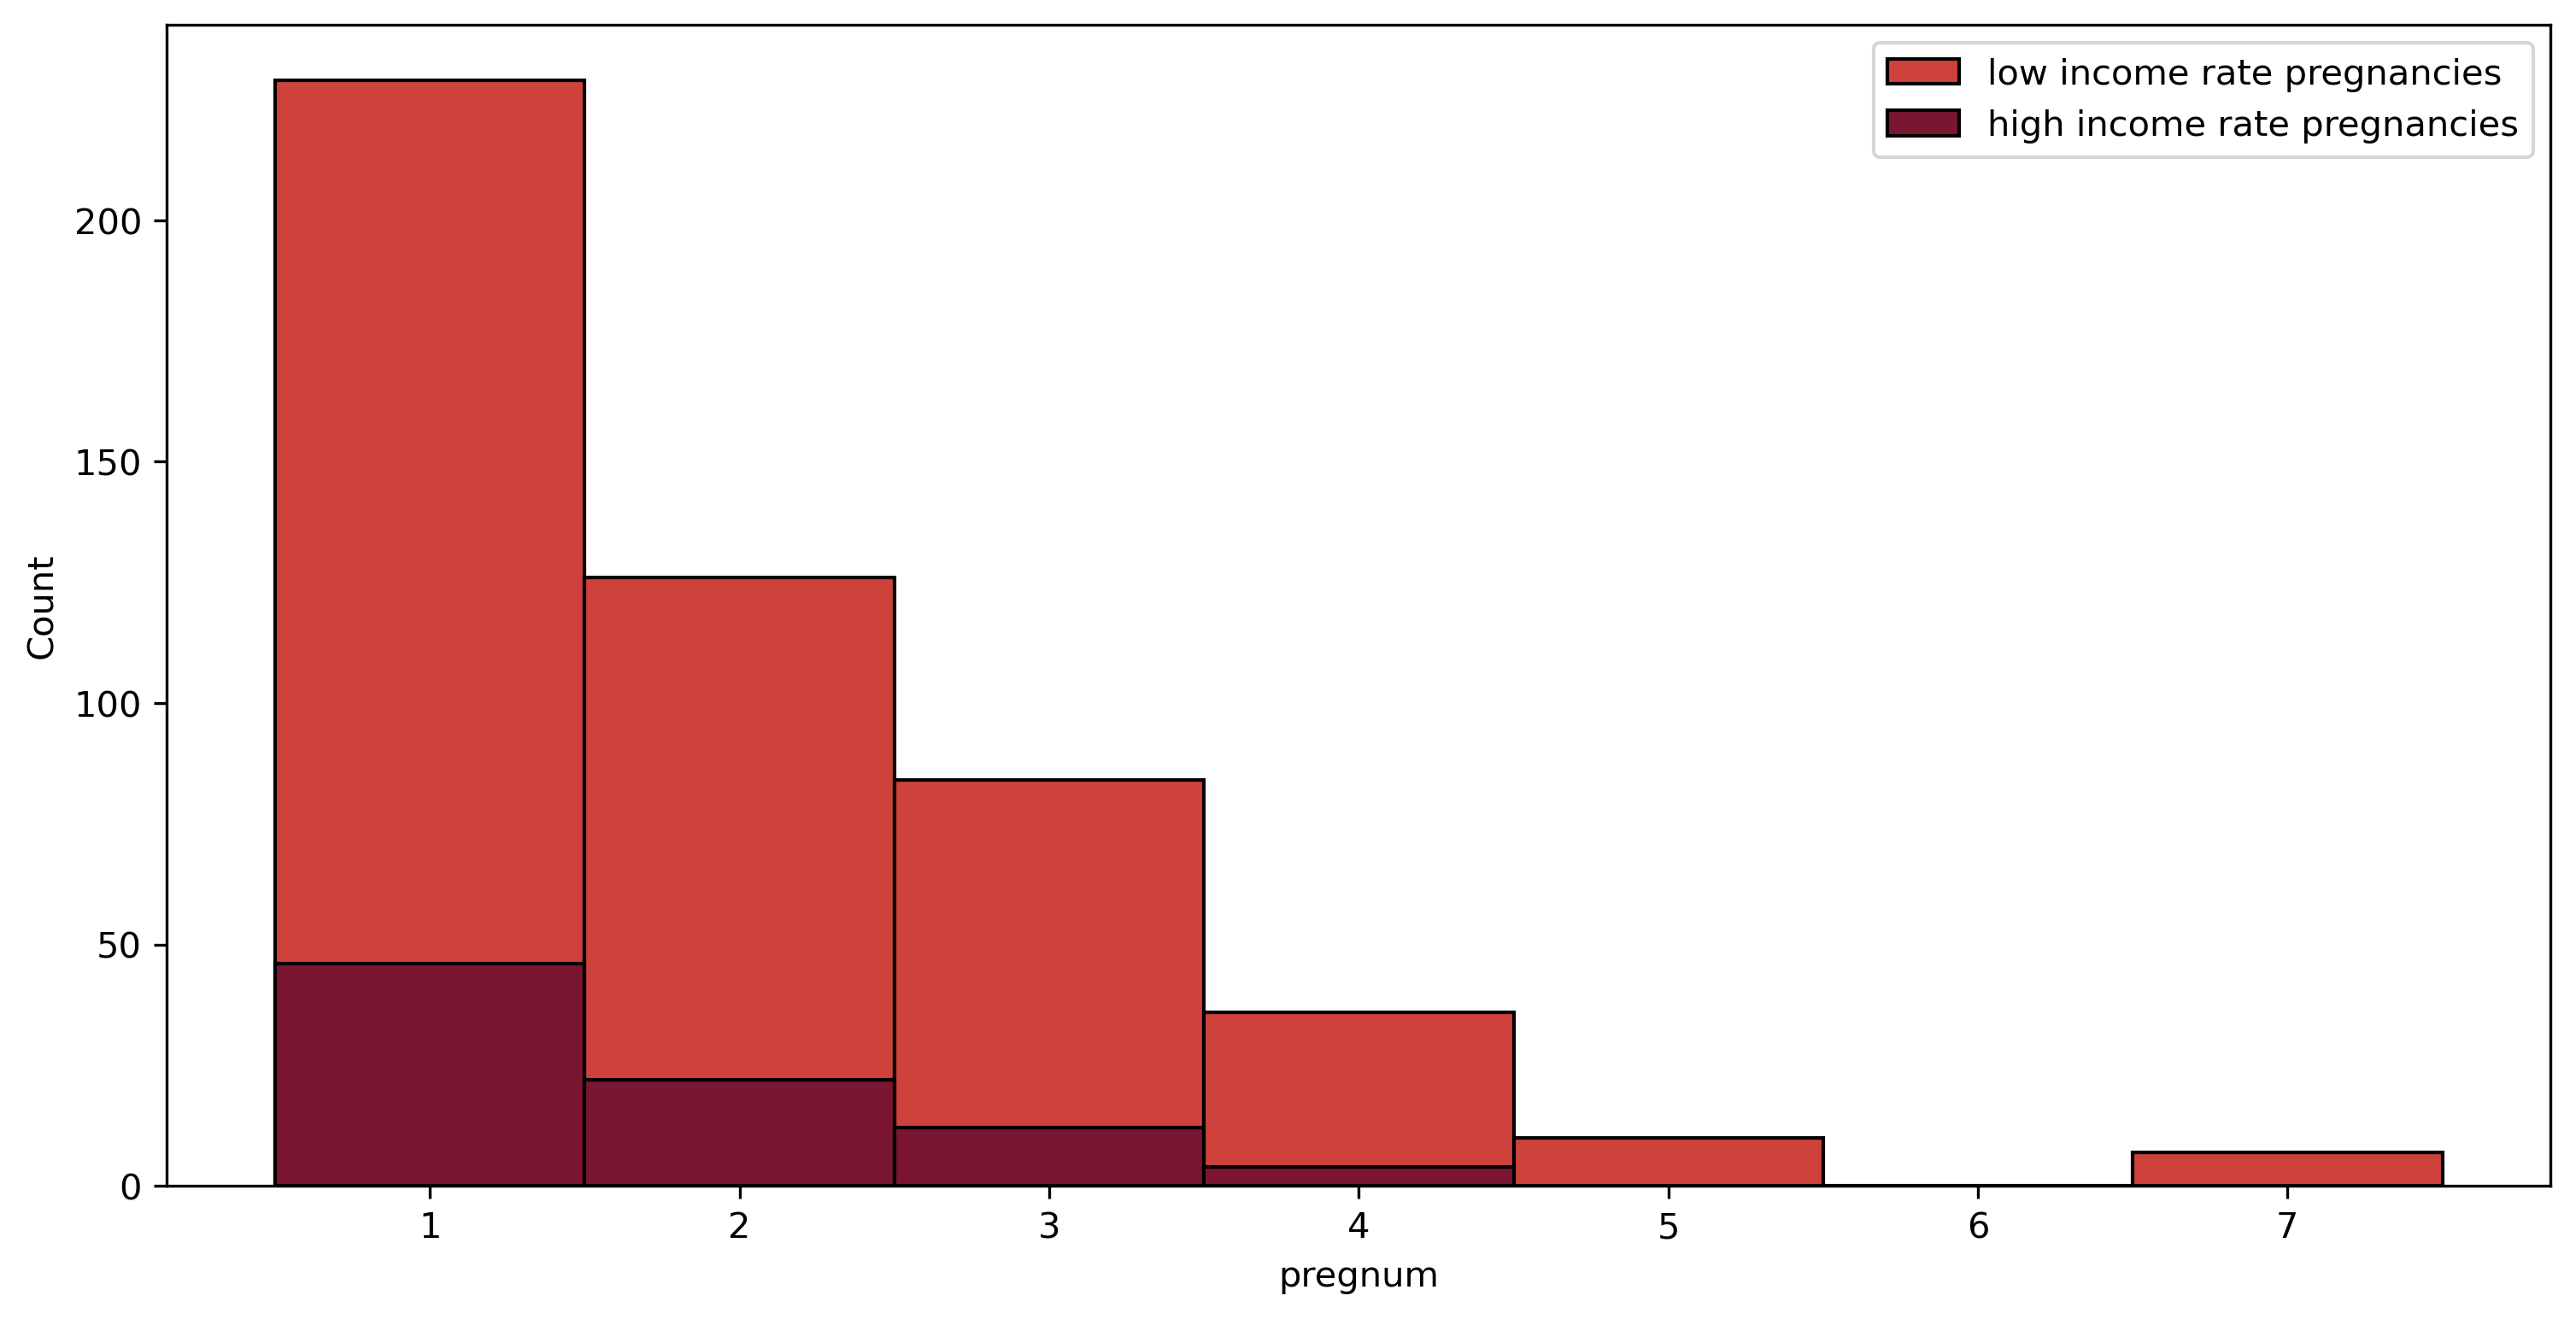

In [71]:
non_live_births_high_income = zero_live_births[zero_live_births['poverty'] > 600]
non_live_births_low_income = zero_live_births[zero_live_births['poverty'] < 600]
nlb_high = DrawGraph(non_live_births_high_income, figsize=[12, 6], dpi=300)
nlb_low = DrawGraph(non_live_births_low_income, figsize=[12, 6], dpi=300)

graphing.create_figure
nlb_low.hist(x='pregnum',
             color='#CF423C',
             alpha=1,
             discrete=True,
             label='low income rate pregnancies')
nlb_high.hist(x='pregnum',
              color='#7A1631',
              alpha=1,
              discrete=True,
              label='high income rate pregnancies')
plt.legend()
graphing.show

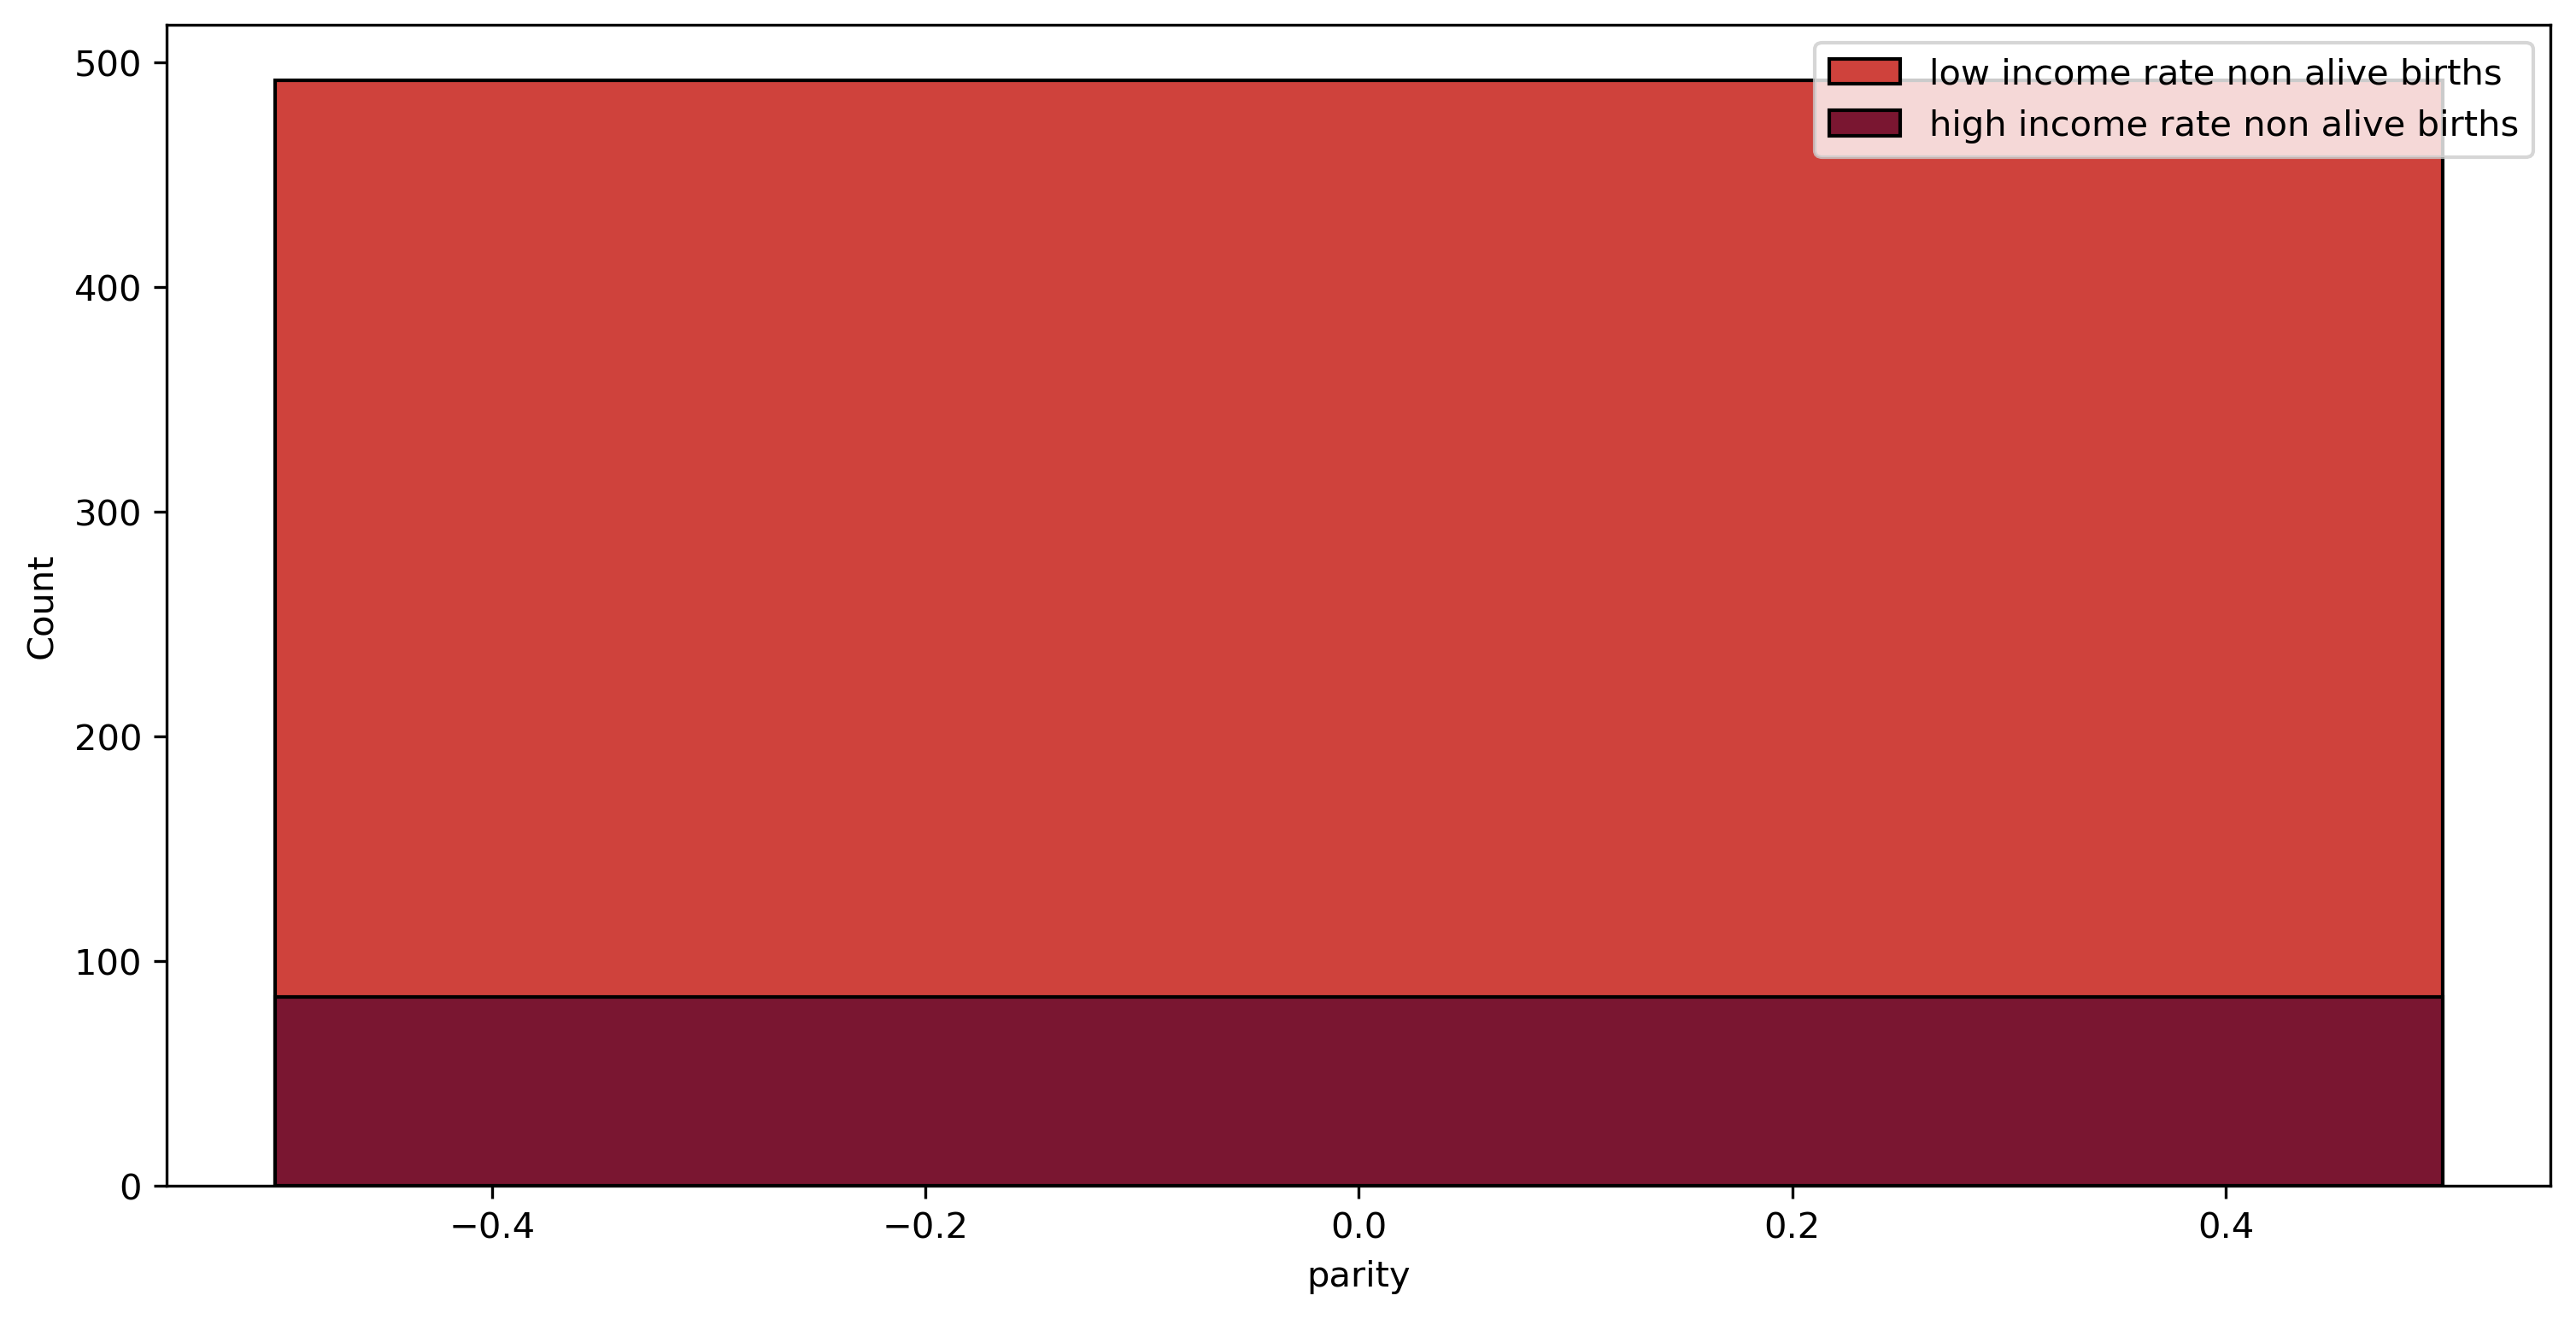

In [72]:
graphing.create_figure
nlb_low.hist(x='parity',
             color='#CF423C',
             alpha=1,
             discrete=True,
             label='low income rate non alive births')
nlb_high.hist(x='parity',
              color='#7A1631',
              alpha=1,
              discrete=True,
              label='high income rate non alive births')
plt.legend()
graphing.show

In [73]:
low_income_summery = SummeryStat(other_income_resp, 'parity')
high_income_summery = SummeryStat(highest_inc_resp, 'parity')

In [74]:
low_income_summery.mean(), low_income_summery.median(), low_income_summery.variance(), low_income_summery.standard_deviation()

(2.6371225394207976, 2.0, 2.38867447813054, 1.5455337195061583)

In [75]:
high_income_summery.mean(), high_income_summery.median(), high_income_summery.variance(), high_income_summery.standard_deviation()

(1.28515625, 1.0, 0.7897796630859375, 0.8886954838896941)

In [76]:
cohen_effect_size(other_income_resp['parity'], highest_inc_resp['parity'])

0.8898108918924976

## How pregnancy ended?

In [143]:
live_outcome = pregnancy_data[pregnancy_data['outcome'] == 1]
dead_outcome = pregnancy_data[(pregnancy_data['outcome'] > 1) & (pregnancy_data['outcome'] < 6)]

In [144]:
outcome = DrawGraph(pregnancy_data[features], [14, 6], 300)
live_graph = DrawGraph(live_outcome[features], [14, 6], 300)
dead_graph = DrawGraph(dead_outcome[features], [14, 6], 300)

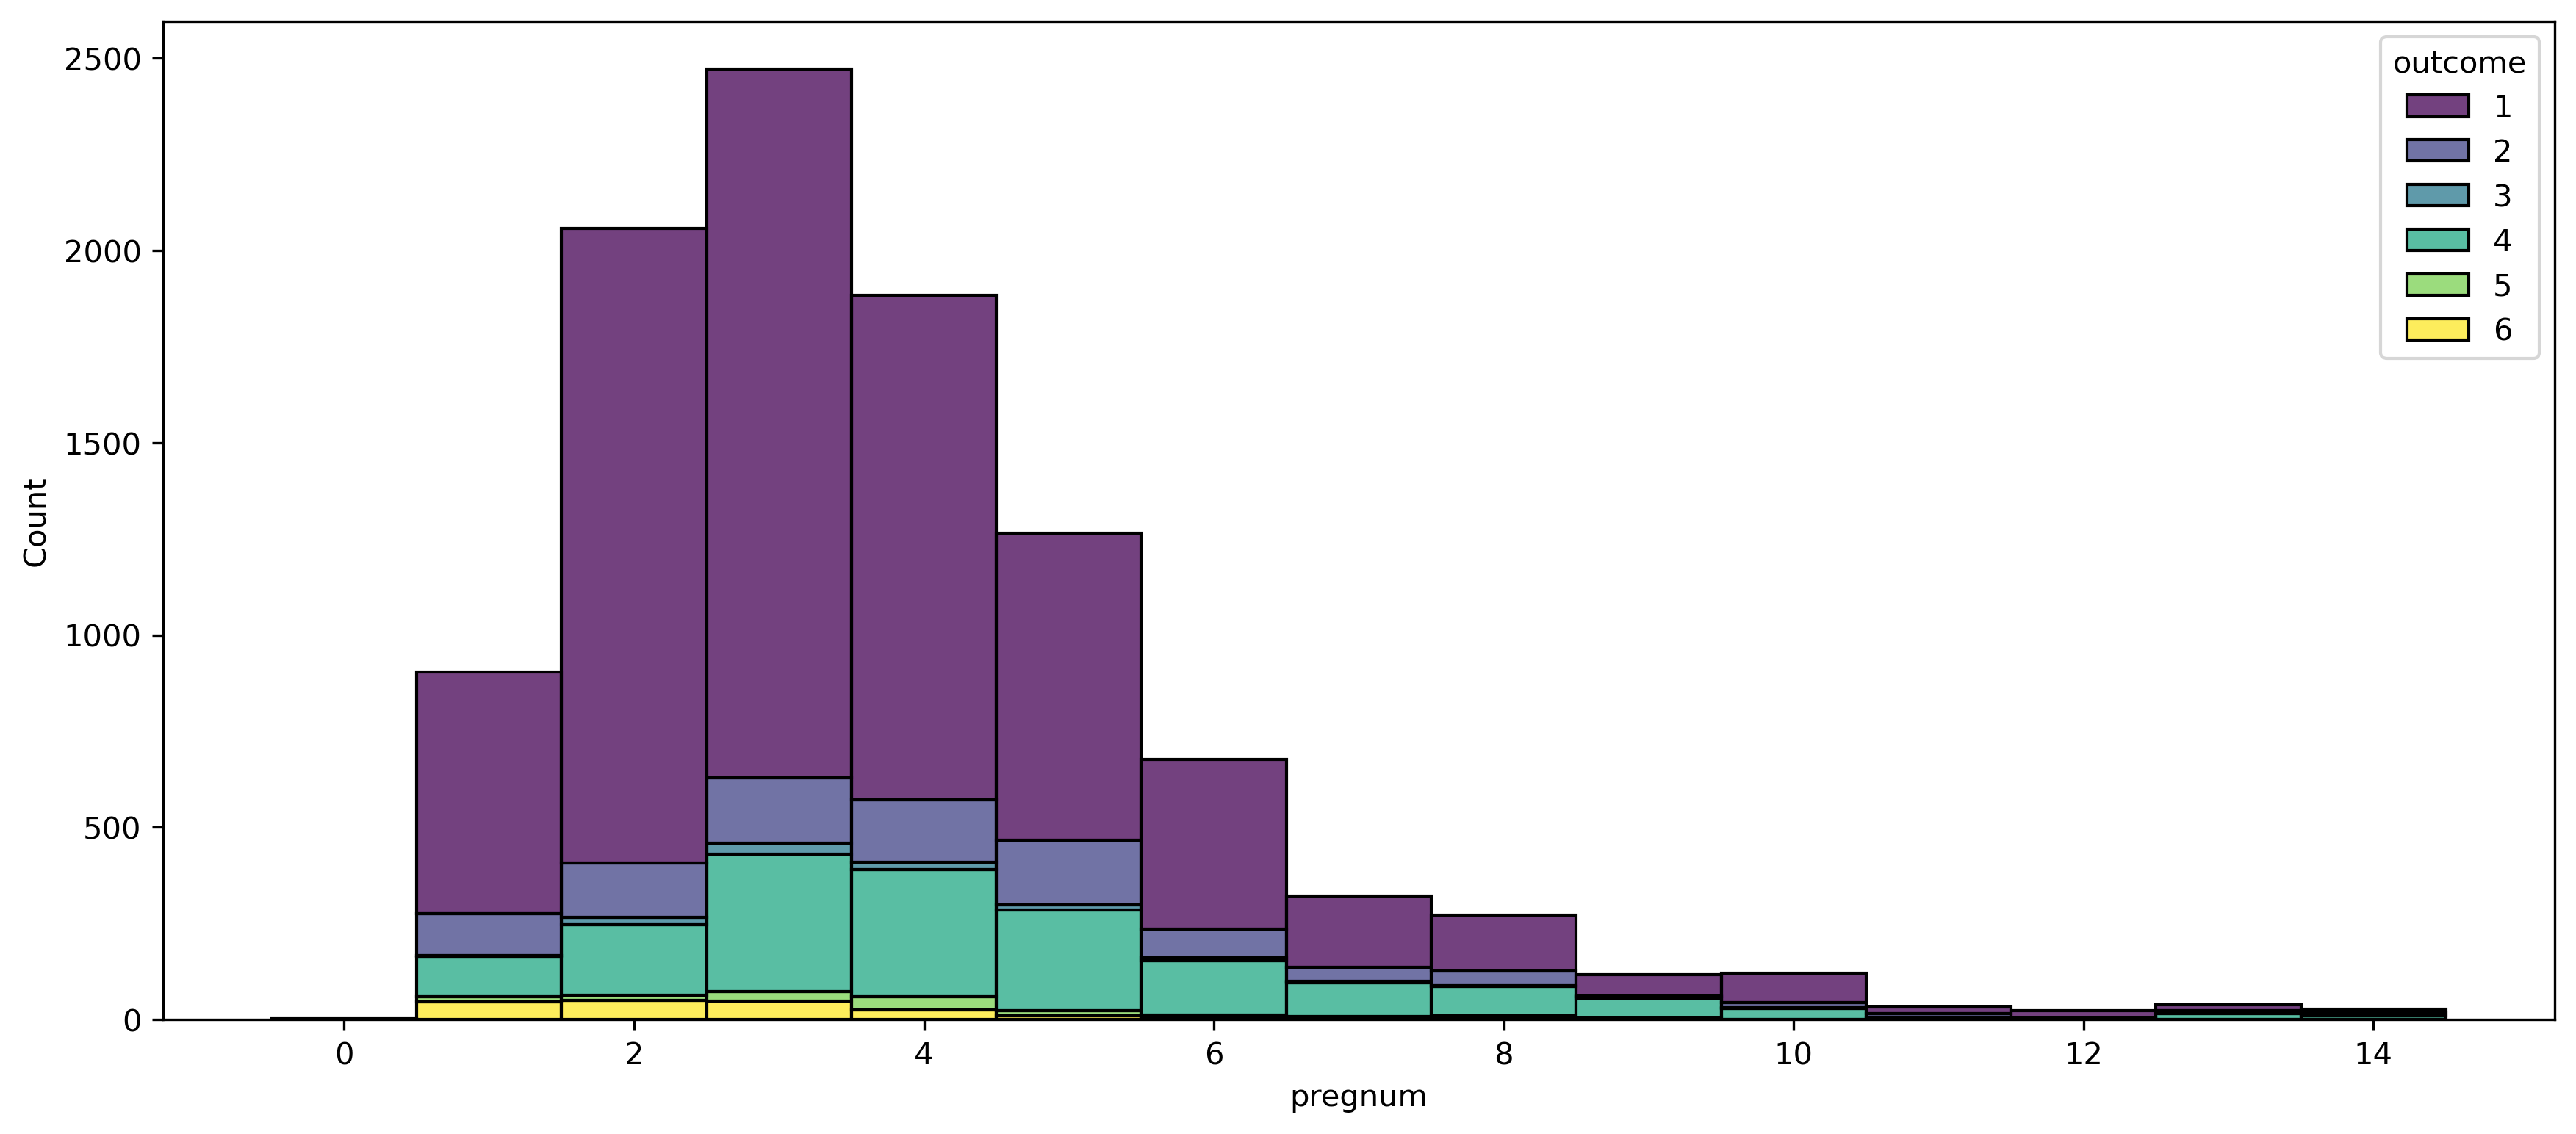

In [141]:
outcome.create_figure
outcome.hist(x='pregnum',
             hue='outcome',
             palette='viridis',
             multiple='stack',
             stat='count',
             discrete=True
             )
outcome.show

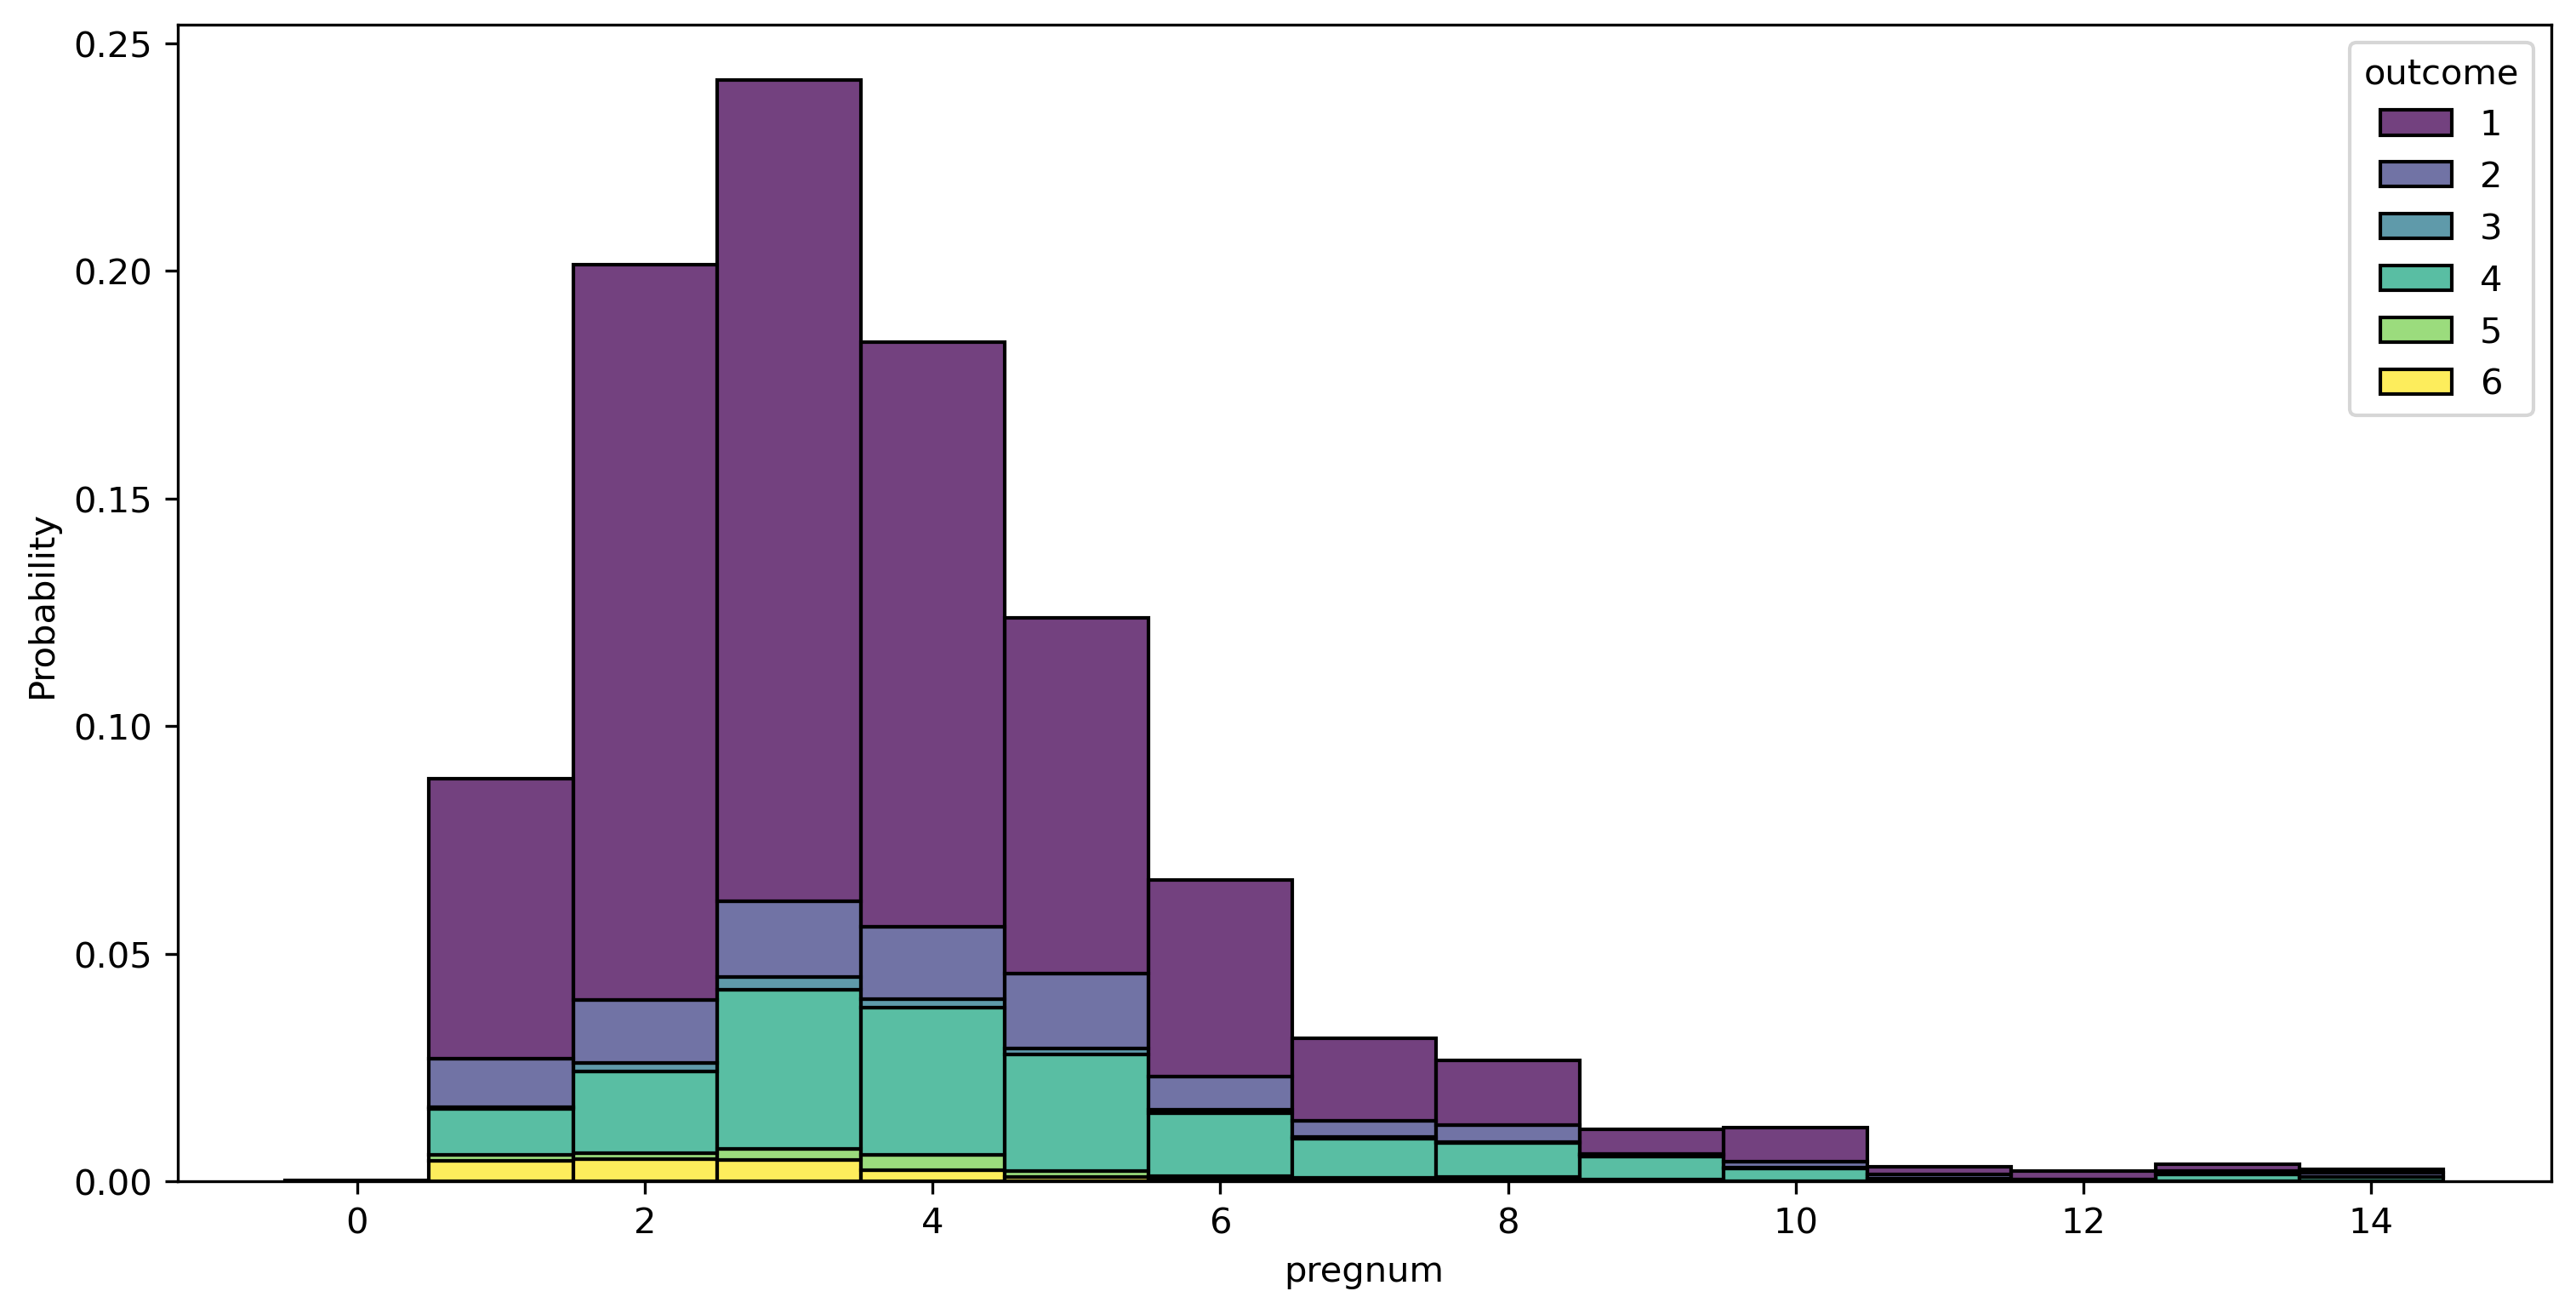

In [138]:
outcome.create_figure
outcome.hist(x='pregnum',
             hue='outcome',
             palette='viridis',
             multiple='stack',
             stat='probability',
             discrete=True,
             )
outcome.show

In [ ]:
live_graph.create_figure
live_graph.hist()
live_graph.show

## Modeling distribution

## Are parents happy?

In [90]:
feeling_fet = ['wantbold', 'timingok', 'toosoon_n', 'toosoon_p', 'laternum', 'latermy', 'wthpart1',
               'feelinpg', 'hpwnold', 'timokhp', 'cohpbeg', 'cohpend', 'tellfath', 'whentell', 'tryscale',
               'wantscal', 'outcome', 'fmarout5', 'fmarcon5', 'whystopd']
feels = pregnancy_data[feeling_fet]

In [91]:
wantd = feels[feels['whystopd'] == 5][['wantbold']]
feels_graph = DrawGraph(wantd, figsize=[12, 6], dpi=300)